# Part I: Data analysis, ML models & PyTorch [40 points]






###**Problem Statement** - To classify Clean Alternative Fuel Vehicle (CAFV) Eligibility of various electric vehicle in Washington State (United States of America)

### **Step 1: Data analysis & Pre-processing [10 points]**

In [472]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objs as go
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

**1. Select a real-world dataset from the source listed below. Requirements for the dataset:**

**● Represent the real-world data**

**● Contain at least 20k entries**

**● Should be different from the one used in class**

In [473]:
df=pd.read_csv(r'Electric_Vehicle_Population_Data.csv')
df.head()

VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     Model                   Electric Vehicle Type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle Eligible             200   
2              Not eligible due to low battery range              20   
3  Eligibility unknown as battery range has not b...               0   
4            Clean Alternative Fuel Vehicle Eligible             322   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  14.0         1593721   
1          0                   2.0       257167501   
2          0                  11.0       224071816   
3          0                  21.0       260084653   
4          0                  33.0       253771913   

                  Vehicle Location  \
0   POINT (-120.524012 46.5973939)   
1     POINT (-122.817545 46.98876)   
2  POINT (-122.1298876 47.4451257)   
3      POINT (-122.1873 47.820245)   
4  POINT (-122.2012521 47.3931814)   

                                Electric Utility  2020 Census Tract  
0                                     PACIFICORP       5.307700e+10  
1                         PUGET SOUND ENERGY INC       5.306701e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.306105e+10  
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10

**2. Provide main statistic about the dataset (e.g. number of entries, features)**

In [474]:
df.shape

(166800, 17)

In [475]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [476]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [478]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  166795.000000  166800.000000   166800.000000  166800.000000   
mean    98173.713750    2020.341793       61.508993    1152.723171   
std      2442.584415       3.001465       93.271747    8661.081091   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000        0.000000       0.000000   
75%     98371.000000    2023.000000       84.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         166440.000000    1.668000e+05       1.667950e+05  
mean              29.178941    2.172420e+08       5.297709e+10  
std               14.853534    7.727458e+07       1.569754e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.000000    1.790741e+08       5.303301e+10  
50%               33.000000    2.244045e+08       5.303303e+10  
75%               42.000000    2.513421e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

A. Handle missing entries, if any. Possible solutions:

• Drop rows with missing entries. If you have a large dataset and only a few missing
features, it may be acceptable to drop the rows containing missing values.

• Impute missing data. Replace the missing entries with the mean/median/mode of the
feature. You can use K-Nearest Neighbor algorithm to find the matching sample.



----------------------------------------------------





B. The columns with missing data are: Applicant, Fees,Census Block, Census Block Group, Census Tract, Census Tract, Police District, Location, Longitude, Latitude, Description of Work, Inspector, Expiration Date, Address, Contractor License Number, License Type, Fees, Value of Work, SBL, Land Use,Inspector, Expiration Date, and Description of Work

Convert features with string datatype to categorical. Possible ways:

• One-hot encoding, creating binary columns for each category, denoting their presence or absence. E.g., in the "Species" feature, "Adelie," "Chinstrap," and "Gentoo" become binary columns with "1" for presence and "0" for absence.

• Label encoding assigns unique integers to distinct feature values, useful for ordinal relationships among categories. E.g., "Small" as 0, "Medium" as 1, and "Large" as 2 can represent a "Size" feature. However, it may introduce unintended patterns.



----------------------------------------------------






C. Handle mismatched string formats, if any.
For example, in the penguins dataset "Species" feature might appear as "Adelie" or
"adelie," both of which refer to the same penguin species. These variations should be
standardized to a consistent format such as "Adelie" or "adelie" to ensure consistency.



----------------------------------------------------

D. Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 5
visualization graphs related to your dataset. You can utilize any columns or a
combination of columns in your dataset to generate graphs. E.g. correlation matrix,
features vs. the target, counts of categorical features vs. the target.


--------------------------------------------------

E. Identify uncorrelated or unrelated features.
Unrelated or uncorrelated features can introduce confusion to your model and
negatively impact its performance. You can compute the correlation matrix between the
features and the target variable. Features with a low correlation coefficient should be
identified and subsequently dropped from the dataset to enhance model performance.


-----------------------------------------------------


In [479]:
df.drop_duplicates()

VIN (1-10)     County        City State  Postal Code  Model Year  \
0       3C3CFFGE4E     Yakima      Yakima    WA      98902.0        2014   
1       5YJXCBE40H   Thurston     Olympia    WA      98513.0        2017   
2       3MW39FS03P       King      Renton    WA      98058.0        2023   
3       7PDSGABA8P  Snohomish     Bothell    WA      98012.0        2023   
4       5YJ3E1EB8L       King        Kent    WA      98031.0        2020   
...            ...        ...         ...   ...          ...         ...   
166795  3FA6P0SU4D    Spokane     Spokane    WA      99223.0        2013   
166796  5YJYGDEE5M       King   Sammamish    WA      98074.0        2021   
166797  7SAYGDEE5N  Snohomish    Mukilteo    WA      98275.0        2022   
166798  1G1RH6E43D      Lewis   Mossyrock    WA      98564.0        2013   
166799  5YJSA1E27H     Pierce  Gig Harbor    WA      98332.0        2017   

             Make    Model                   Electric Vehicle Type  \
0            FIAT      500          Battery Electric Vehicle (BEV)   
1           TESLA  MODEL X          Battery Electric Vehicle (BEV)   
2             BMW     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3          RIVIAN      R1S          Battery Electric Vehicle (BEV)   
4           TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
...           ...      ...                                     ...   
166795       FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
166796      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
166797      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
166798  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
166799      TESLA  MODEL S          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              87   
1                 Clean Alternative Fuel Vehicle Eligible             200   
2                   Not eligible due to low battery range              20   
3       Eligibility unknown as battery range has not b...               0   
4                 Clean Alternative Fuel Vehicle Eligible             322   
...                                                   ...             ...   
166795              Not eligible due to low battery range              19   
166796  Eligibility unknown as battery range has not b...               0   
166797  Eligibility unknown as battery range has not b...               0   
166798            Clean Alternative Fuel Vehicle Eligible              38   
166799            Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0         1593721   
1               0                   2.0       257167501   
2               0                  11.0       224071816   
3               0                  21.0       260084653   
4               0                  33.0       253771913   
...           ...                   ...             ...   
166795          0                   6.0       239527123   
166796          0                  45.0       148715479   
166797          0                  21.0       220504406   
166798          0                  20.0       156418475   
166799          0                  26.0       169045789   

                       Vehicle Location  \
0        POINT (-120.524012 46.5973939)   
1          POINT (-122.817545 46.98876)   
2       POINT (-122.1298876 47.4451257)   
3           POINT (-122.1873 47.820245)   
4       POINT (-122.2012521 47.3931814)   
...                                 ...   
166795     POINT (-117.369705 47.62637)   
166796  POINT (-122.0313266 47.6285782)   
166797     POINT (-122.299965 47.94171)   
166798   POINT (-122.487535 46.5290135)   
166799    POINT (-122.589645 47.342345)   

                                         Electric Utility  2020 Census Tract  
0                       

**Number of unique element in the columns**

In [480]:
for i in df:
  print(f"The no of unique elements for {i} column in the Permit_20240129 dataset is {df[i].nunique()}.")

The no of unique elements for VIN (1-10) column in the Permit_20240129 dataset is 10316.
The no of unique elements for County column in the Permit_20240129 dataset is 187.
The no of unique elements for City column in the Permit_20240129 dataset is 704.
The no of unique elements for State column in the Permit_20240129 dataset is 44.
The no of unique elements for Postal Code column in the Permit_20240129 dataset is 836.
The no of unique elements for Model Year column in the Permit_20240129 dataset is 22.
The no of unique elements for Make column in the Permit_20240129 dataset is 39.
The no of unique elements for Model column in the Permit_20240129 dataset is 138.
The no of unique elements for Electric Vehicle Type column in the Permit_20240129 dataset is 2.
The no of unique elements for Clean Alternative Fuel Vehicle (CAFV) Eligibility column in the Permit_20240129 dataset is 3.
The no of unique elements for Electric Range column in the Permit_20240129 dataset is 102.
The no of unique el

**Finding out the missing values**

In [481]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [482]:
for i in df:
  percent=round(df[i].isnull().sum()/len(df[i])*100,2)
  print(f"The percent of missing values for {i} column in the Permit_20240129 dataset is {percent} %")

The percent of missing values for VIN (1-10) column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for County column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for City column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for State column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Postal Code column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Model Year column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Make column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Model column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Electric Vehicle Type column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Clean Alternative Fuel Vehicle (CAFV) Eligibility column in the Permit_20240129 dataset is 0.0 %
The percent of missing values for Electric Range column

**Observation** - The column Legislative District has missing values in it

In [483]:
df[df['County'].isnull()]

VIN (1-10) County City State  Postal Code  Model Year    Make  \
98      5YJXCAE24H    NaN  NaN    BC          NaN        2017   TESLA   
100     5YJSA1E21J    NaN  NaN    AE          NaN        2018   TESLA   
132425  5YJ3E1EA5K    NaN  NaN    BC          NaN        2019   TESLA   
140273  5YJRE11B48    NaN  NaN    BC          NaN        2008   TESLA   
154970  1N4AZ0CP1D    NaN  NaN    AP          NaN        2013  NISSAN   

           Model           Electric Vehicle Type  \
98       MODEL X  Battery Electric Vehicle (BEV)   
100      MODEL S  Battery Electric Vehicle (BEV)   
132425   MODEL 3  Battery Electric Vehicle (BEV)   
140273  ROADSTER  Battery Electric Vehicle (BEV)   
154970      LEAF  Battery Electric Vehicle (BEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
98               Clean Alternative Fuel Vehicle Eligible             200   
100              Clean Alternative Fuel Vehicle Eligible             249   
132425           Clean Alternative Fuel Vehicle Eligible             220   
140273           Clean Alternative Fuel Vehicle Eligible             220   
154970           Clean Alternative Fuel Vehicle Eligible              75   

        Base MSRP  Legislative District  DOL Vehicle ID Vehicle Location  \
98              0                   NaN       159850029              NaN   
100             0                   NaN       220643132              NaN   
132425          0                   NaN       475254825              NaN   
140273      98950                   NaN       143609049              NaN   
154970          0                   NaN       112277063              NaN   

       Electric Utility  2020 Census Tract  
98                  NaN                NaN  
100                 NaN                NaN  
132425              NaN                NaN  
140273              NaN                NaN  
154970              NaN                NaN

- We can drop the columns with the state value BC, AP, and AE as BC stands for British Columbia which belongs to Canada as mentioned in the link
https://www.quora.com  and AP stands for Armed Forces Pacific and AE stands for Armed Forces Europe which are military "state" abbreviations used in overseas military addresses.


In [484]:
df.dropna(subset=['County'], inplace=True)

In [485]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 355
DOL Vehicle ID                                         0
Vehicle Location                                       5
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [486]:
df[df['Vehicle Location'].isnull()]

VIN (1-10)   County        City State  Postal Code  Model Year  \
97863   JTDKARFP1H  Pacific  Long Beach    WA      98634.0        2017   
134650  1G1FW6S08N  Pacific  Long Beach    WA      98634.0        2022   
136489  KNDJX3AE8H  Pacific  Long Beach    WA      98634.0        2017   
137458  KMHE54L2XH  Pacific  Long Beach    WA      98634.0        2017   
139217  1C4JJXP69P  Pacific  Long Beach    WA      98634.0        2023   

             Make        Model                   Electric Vehicle Type  \
97863      TOYOTA  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
134650  CHEVROLET      BOLT EV          Battery Electric Vehicle (BEV)   
136489        KIA      SOUL EV          Battery Electric Vehicle (BEV)   
137458    HYUNDAI       SONATA  Plug-in Hybrid Electric Vehicle (PHEV)   
139217       JEEP     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
97863               Not eligible due to low battery range              25   
134650  Eligibility unknown as battery range has not b...               0   
136489            Clean Alternative Fuel Vehicle Eligible              93   
137458              Not eligible due to low battery range              27   
139217              Not eligible due to low battery range              21   

        Base MSRP  Legislative District  DOL Vehicle ID Vehicle Location  \
97863           0                  19.0       171247282              NaN   
134650          0                  19.0       218102209              NaN   
136489      32250                  19.0       106442773              NaN   
137458          0                  19.0       245533578              NaN   
139217          0                  19.0       254934886              NaN   

                                         Electric Utility  2020 Census Tract  
97863   BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...       5.304995e+10  
134650  BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...       5.304995e+10  
136489  BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...       5.304995e+10  
137458  BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...       5.304995e+10  
139217  BONNEVILLE POWER ADMINISTRATION||PUD NO 2 OF P...       5.304995e+10

Observation : There are 5 columns only which have missing values for Vehicle Location, so we can drop those 5 columns as it is less than 5%.

In [487]:
df.dropna(subset=['Vehicle Location'], inplace=True)

In [488]:
df[df['Legislative District'].isnull()]

VIN (1-10)   County           City State  Postal Code  Model Year  \
66611   5YJ3E1EB4N     York       Yorktown    VA      23693.0        2022   
73644   WA1AAAGE3P   Orange     Buena Park    CA      90621.0        2023   
75093   7SAYGDEEXP     Wake  Holly Springs    NC      27540.0        2023   
76641   WA1AAAGE9P     Lake   Libertyville    IL      60048.0        2023   
76853   5YJYGDEF3L   Platte    Platte City    MO      64079.0        2020   
...            ...      ...            ...   ...          ...         ...   
165140  5YJ3E1EB8M  Alameda       Berkeley    CA      94707.0        2021   
165141  5YJ3E1EB6P      Ada          Boise    ID      83702.0        2023   
165470  5YJYGAEE1M   Travis         Austin    TX      78748.0        2021   
165523  JTMFB3FV3N  Fairfax         Vienna    VA      22180.0        2022   
165731  YV4BR0CZ5N   Howard  Ellicott City    MD      21042.0        2022   

          Make       Model                   Electric Vehicle Type  \
66611    TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
73644     AUDI      E-TRON          Battery Electric Vehicle (BEV)   
75093    TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
76641     AUDI      E-TRON          Battery Electric Vehicle (BEV)   
76853    TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
...        ...         ...                                     ...   
165140   TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
165141   TESLA     MODEL 3          Battery Electric Vehicle (BEV)   
165470   TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
165523  TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
165731   VOLVO        XC90  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
66611   Eligibility unknown as battery range has not b...               0   
73644   Eligibility unknown as battery range has not b...               0   
75093   Eligibility unknown as battery range has not b...               0   
76641   Eligibility unknown as battery range has not b...               0   
76853             Clean Alternative Fuel Vehicle Eligible             291   
...                                                   ...             ...   
165140  Eligibility unknown as battery range has not b...               0   
165141  Eligibility unknown as battery range has not b...               0   
165470  Eligibility unknown as battery range has not b...               0   
165523            Clean Alternative Fuel Vehicle Eligible              42   
165731              Not eligible due to low battery range              18   

        Base MSRP  Legislative District  DOL Vehicle ID  \
66611           0                   NaN       185350084   
73644           0                   NaN       224666711   
75093           0                   NaN       228246182   
76641           0                   NaN       236345791   
76853           0                   NaN       132400684   
...           ...                   ...             ...   
165140          0                   NaN       166381701   
165141          0                   NaN       229729706   
165470          0                   NaN       154576061   
165523          0                   NaN       217116756   
165731          0                   NaN       185596036   

                      Vehicle Location                       Electric Utility  \
66611      POINT (-76.456505 37.11771)  NON WASHINGTON STATE ELECTRIC UTILITY   
73644     POINT (-117.997795 33.86741)  NON WASHINGTON STATE ELECTRIC UTILITY   
75093   POINT (-78.8371904 35.6604412)  NON WASHINGTON STATE ELECTRIC UTILITY   
76641       POINT (-87.95161 42.28444)  NON WASHINGTON STATE ELECTRIC UTILITY   
76853       POINT (-94.77962 39.36557)  NON WASHINGTON STATE ELECTRIC UTILITY   
...                                ...                                    ...   
165140     POINT (-122.27822 37.89127)  N

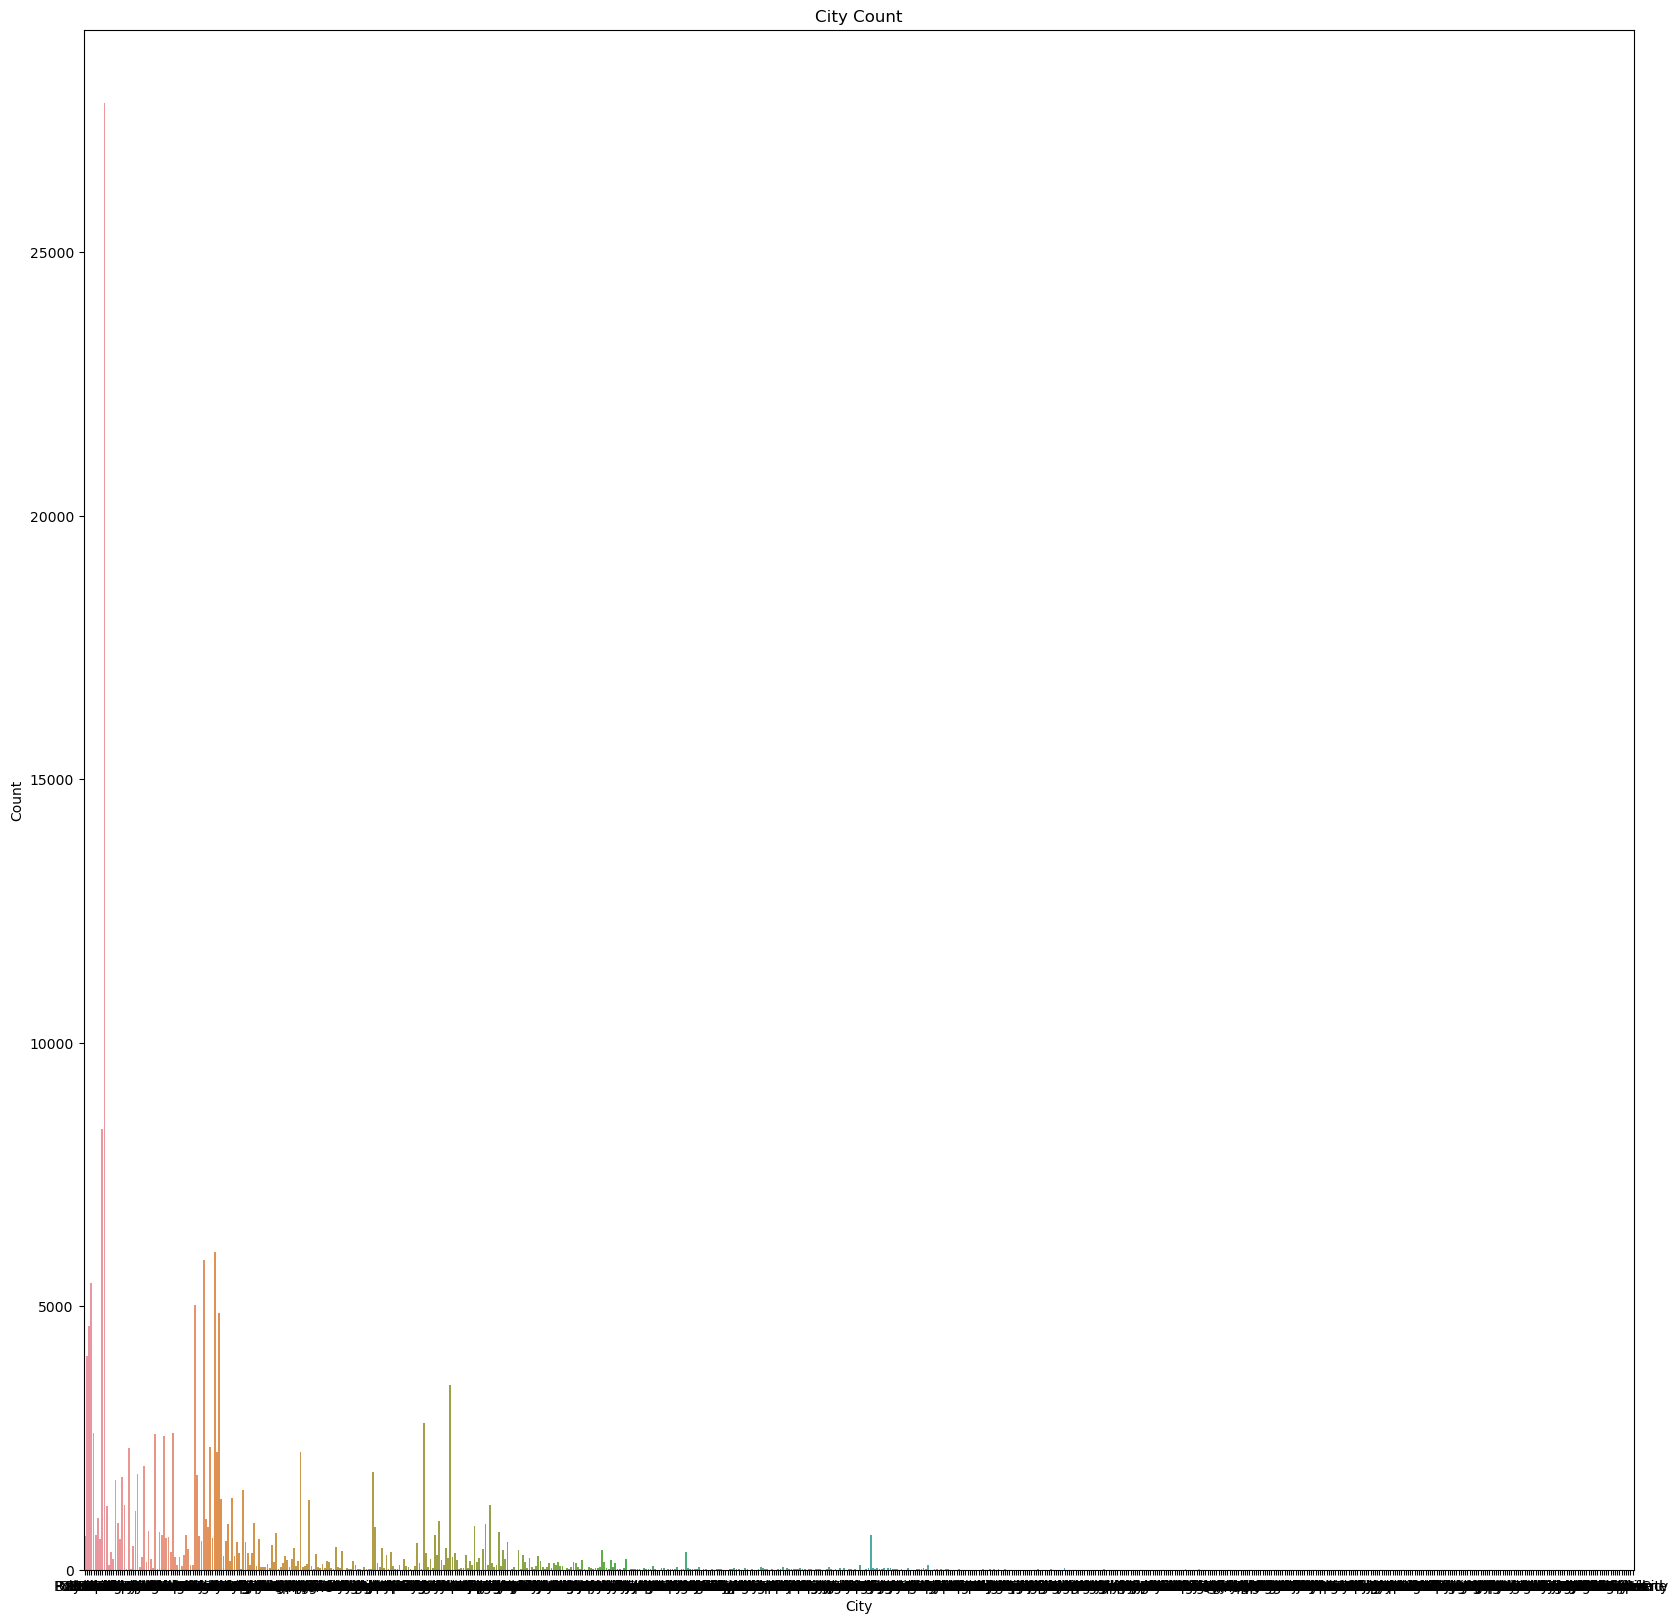

In [489]:
sns.countplot(data=df, x='City')
plt.title('City Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [490]:
df['City'].nunique()

704

In [491]:
df['City'].unique()

array(['Yakima', 'Olympia', 'Renton', 'Bothell', 'Kent', 'Poulsbo',
       'Port Orchard', 'Duvall', 'Bellevue', 'Seattle', 'Bremerton',
       'Selah', 'Silverdale', 'Brier', 'Bainbridge Island', 'Lacey',
       'Tumwater', 'Edmonds', 'Lake Stevens', 'Tieton', 'Everett',
       'Naches', 'Oak Harbor', 'Marysville', 'Shoreline', 'Ephrata',
       'Yelm', 'Snohomish', 'Burlington', 'Mukilteo', 'Cle Elum',
       'Ronald', 'Spokane', 'Evans', 'Monroe', 'Anacortes', 'Lynnwood',
       'Vashon', 'Mount Vernon', 'Walla Walla', 'Issaquah', 'Pullman',
       'La Conner', 'Langley', 'Cashmere', 'Moses Lake', 'Mill Creek',
       'Stanwood', 'Woodway', 'Seabeck', 'Kirkland', 'Auburn',
       'Lake Forest Park', 'Arlington', 'Vancouver', 'Kenmore', 'Burien',
       'Tukwila', 'Port Townsend', 'Redmond', 'Woodinville', 'Sammamish',
       'Federal Way', 'Brush Prairie', 'Washougal', 'Newcastle', 'Kelso',
       'Seatac', 'Normandy Park', 'Covington', 'Medina', 'Keyport',
       'Camas', 'Battle G

In [492]:
df['City']=df['City'].str.lower()
df['City'].head()

0     yakima
1    olympia
2     renton
3    bothell
4       kent
Name: City, dtype: object

In [493]:
le = LabelEncoder()
city_encoded = le.fit_transform(df['City'])
city_encoded

array([698, 433, 504, ..., 394, 389, 223])

In [494]:
df['city_encoded']=city_encoded
df['city_encoded'].head()

0    698
1    433
2    504
3     57
4    288
Name: city_encoded, dtype: int64

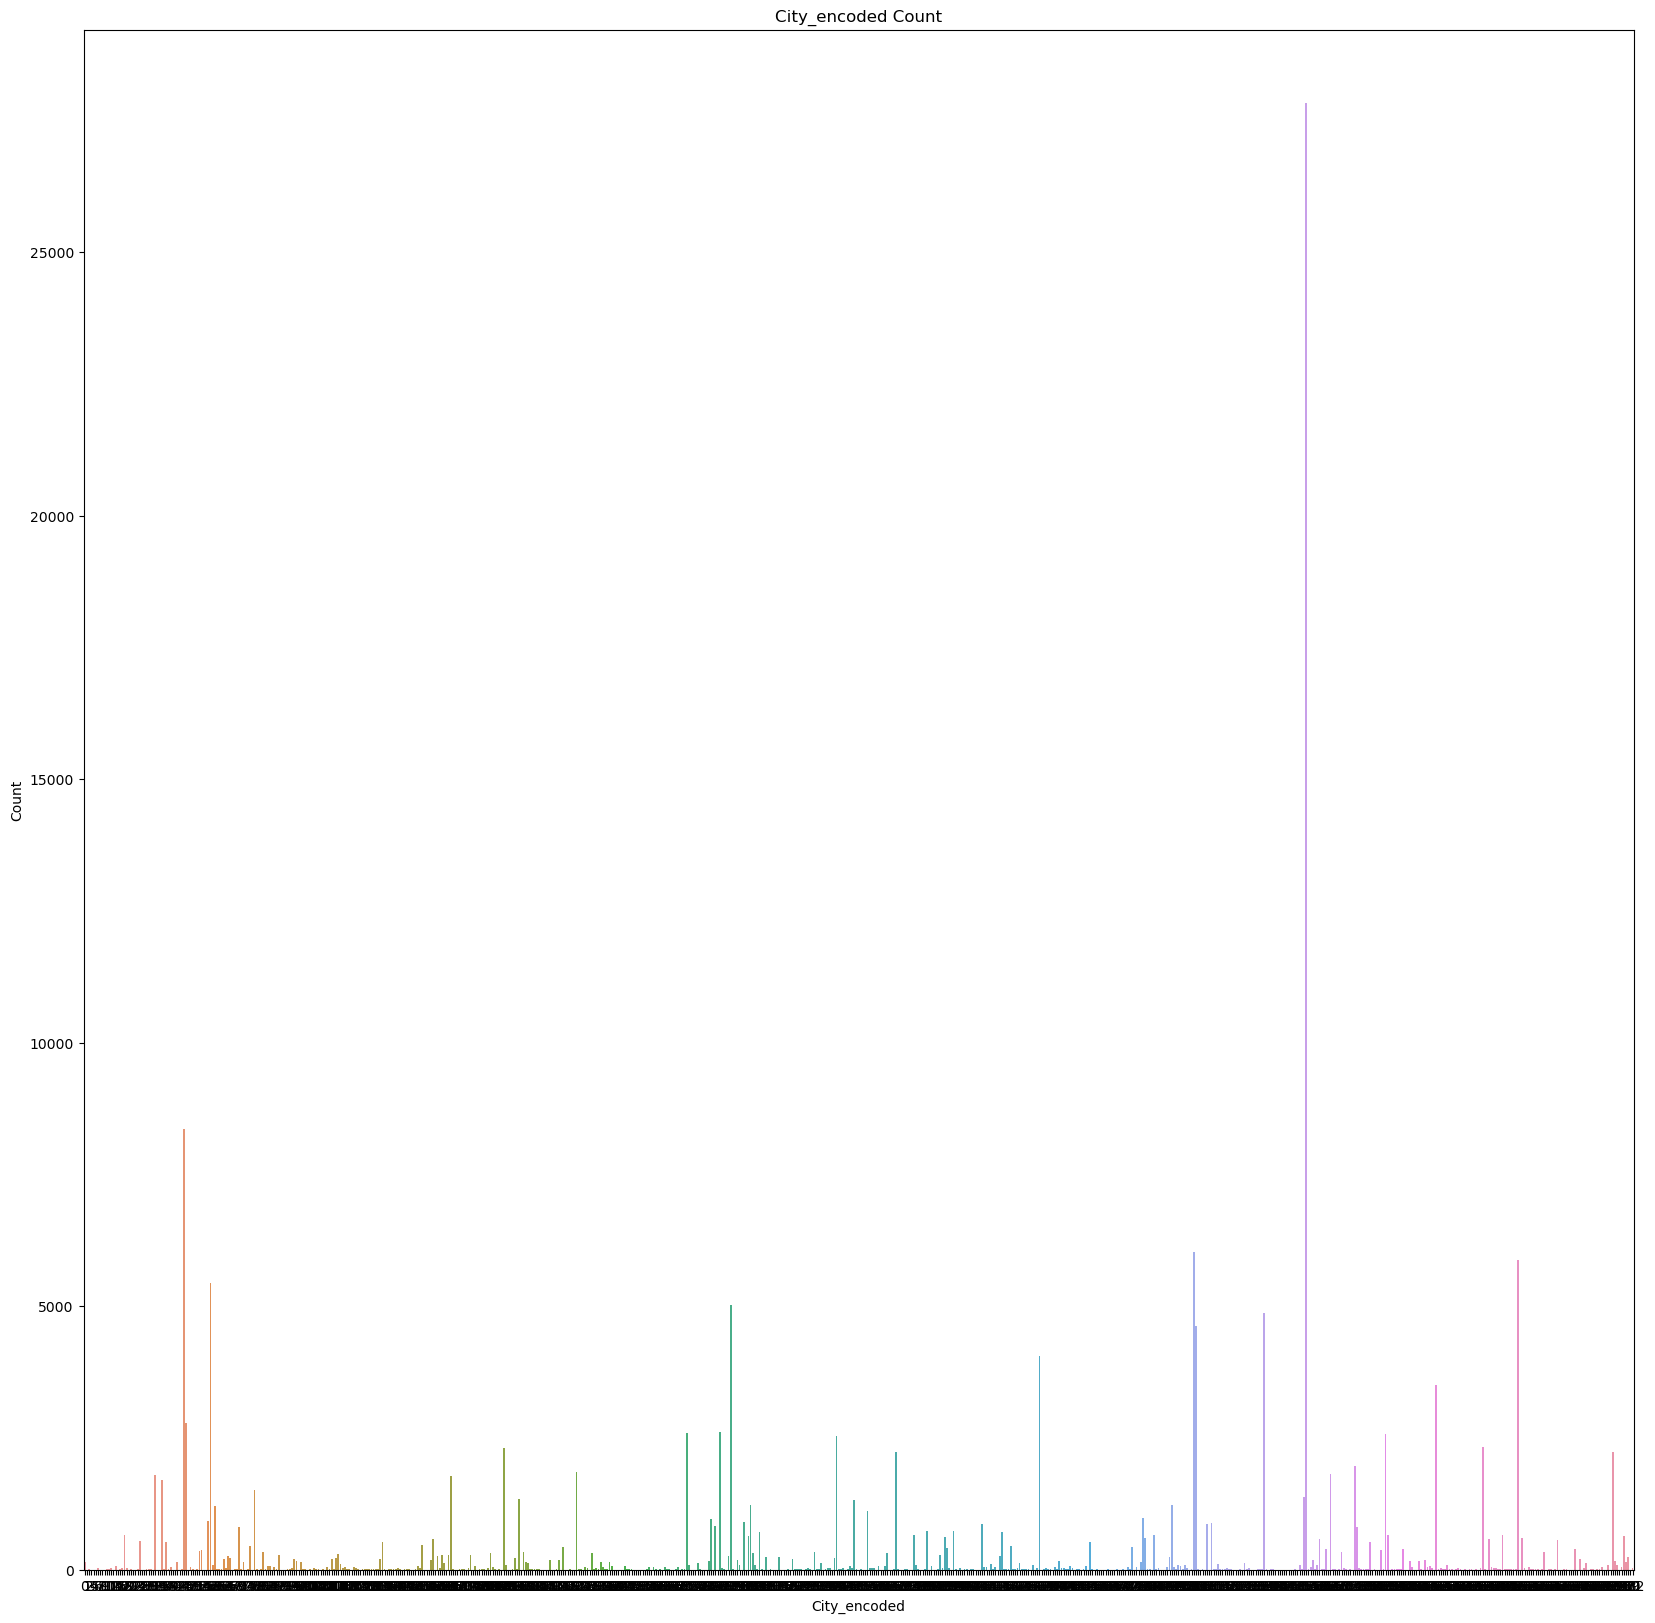

In [495]:
sns.countplot(data=df, x='city_encoded')
plt.title('City_encoded Count')
plt.xlabel('City_encoded')
plt.ylabel('Count')
plt.show()

In [496]:
# encoder = OneHotEncoder()
# city_encoded = encoder.fit_transform(df['City'].values.reshape(-1, 1)).toarray()
# df = pd.concat([df, pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))], axis=1)
# df.head()

In [497]:
df['County'].unique()

array(['Yakima', 'Thurston', 'King', 'Snohomish', 'Kitsap', 'Island',
       'Grant', 'Skagit', 'Kittitas', 'Spokane', 'Stevens', 'Walla Walla',
       'Whitman', 'Chelan', 'Clark', 'Jefferson', 'Cowlitz', 'Clallam',
       'Klickitat', 'Pierce', 'San Juan', 'Whatcom', 'Lewis', 'Benton',
       'Pacific', 'Mason', 'Grays Harbor', 'Okanogan', 'Franklin',
       'Adams', 'Asotin', 'Douglas', 'Skamania', 'Lincoln', 'Wahkiakum',
       'Columbia', 'York', 'Pend Oreille', 'Orange', 'Wake', 'Lake',
       'Platte', 'Sonoma', 'District of Columbia', 'Monterey',
       'Frederick', 'Richland', 'Goochland', 'San Diego', 'Ferry',
       'Cumberland', 'Kern', 'Stafford', 'Oldham', 'Loudoun',
       'Anne Arundel', 'Bexar', 'Contra Costa', 'Wichita', 'Leavenworth',
       'Fairfax', 'Los Angeles', 'DeKalb', 'El Paso', 'Hillsborough',
       'Santa Clara', 'Polk', 'Autauga', 'Washtenaw', 'Virginia Beach',
       'Alameda', 'Caddo', "Prince George's", 'Saratoga', 'Solano',
       'Burlington', 'Carr

In [498]:
df['County']=df['County'].str.lower()
df['County'].head()

0       yakima
1     thurston
2         king
3    snohomish
4         king
Name: County, dtype: object

In [499]:
county_encoded = le.fit_transform(df['County'])
df['county_encoded']=county_encoded
df['county_encoded'].head()

0    185
1    167
2     77
3    156
4     77
Name: county_encoded, dtype: int64

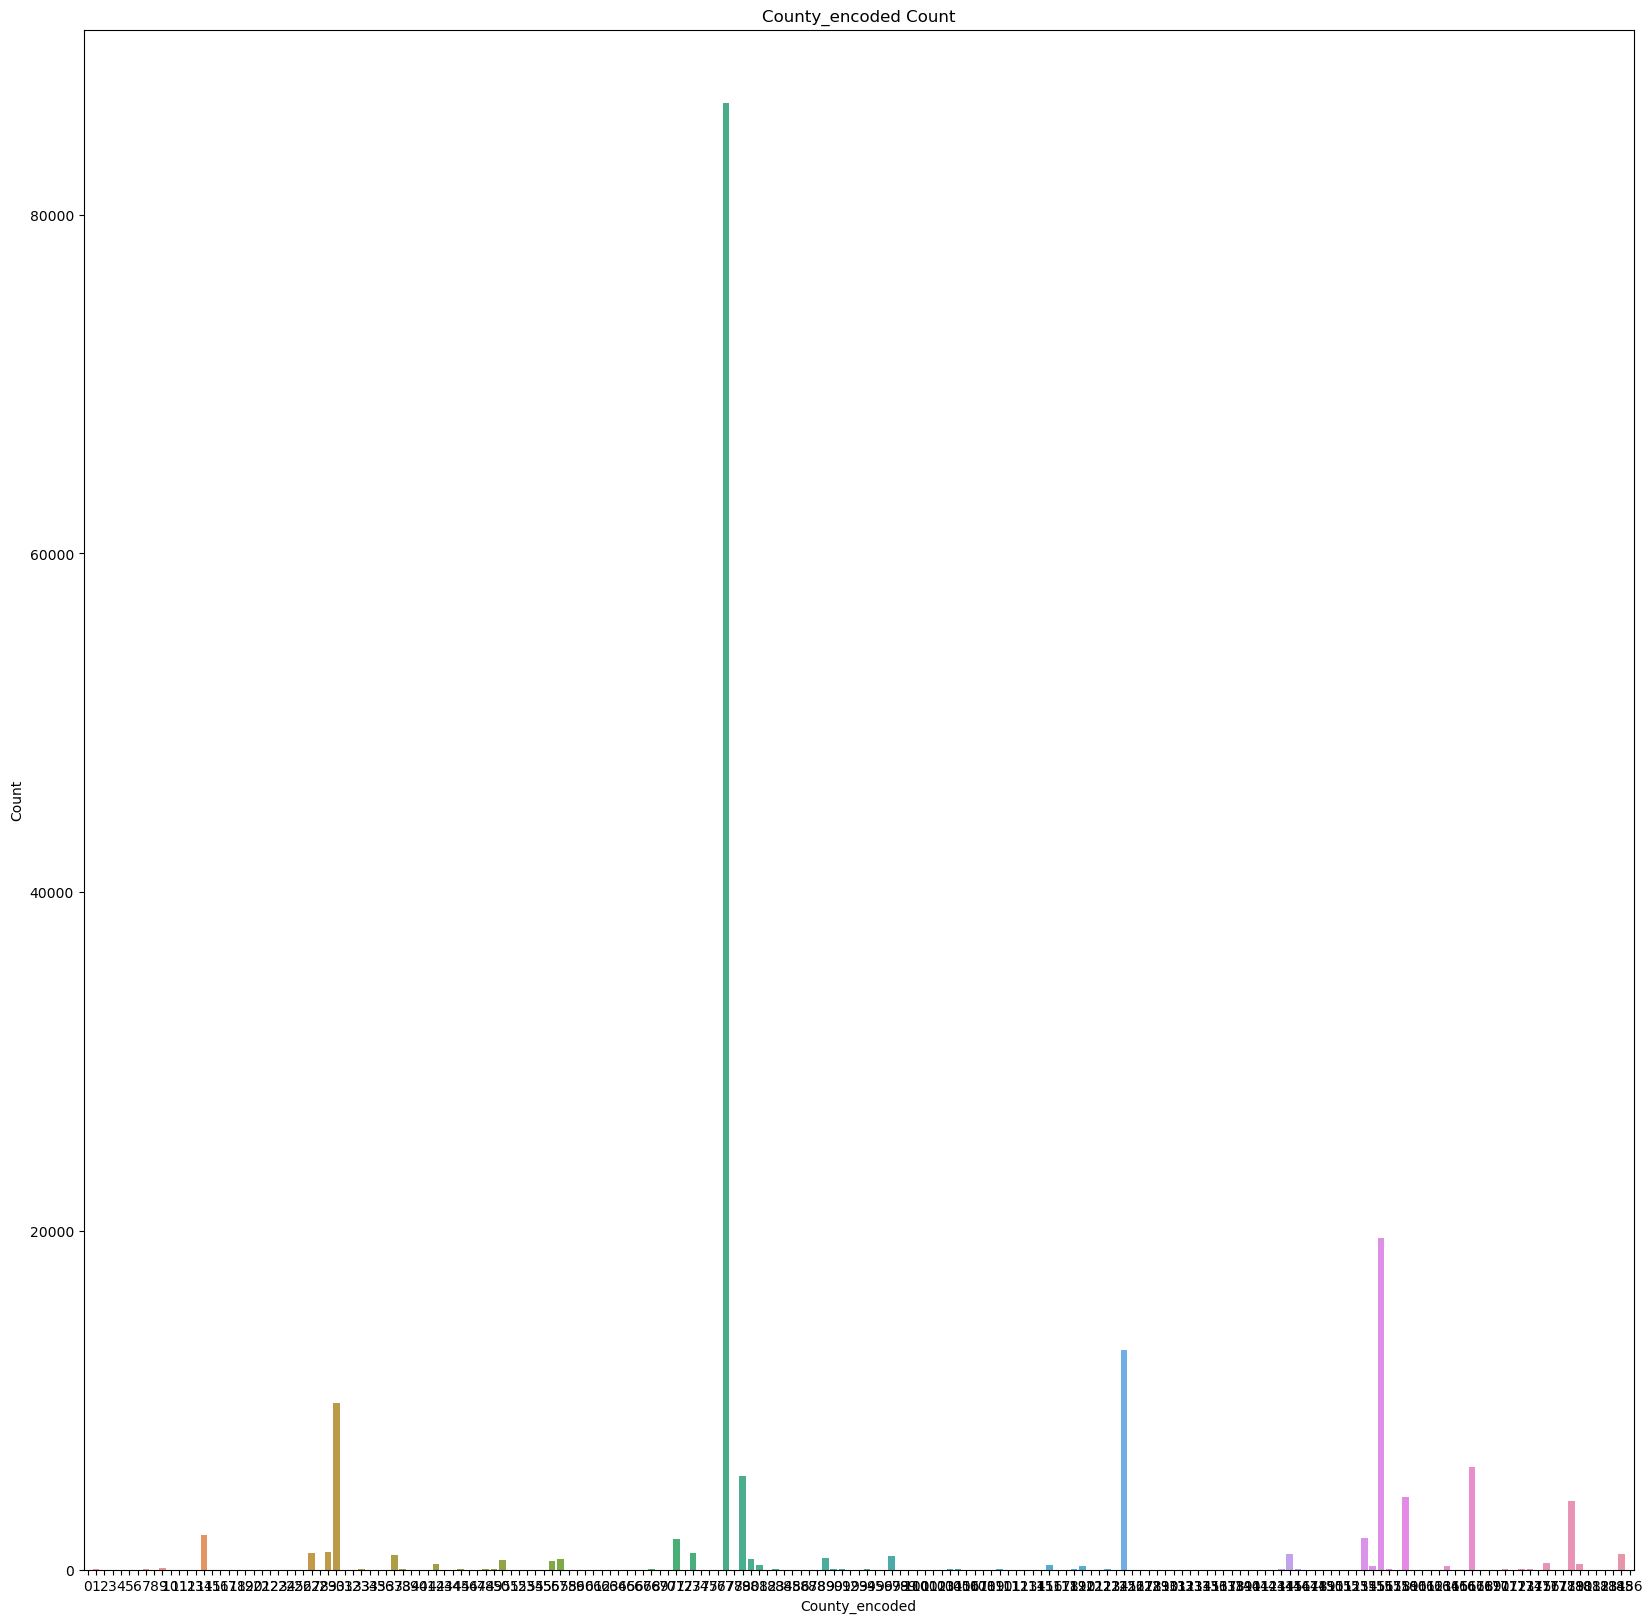

In [500]:
sns.countplot(data=df, x='county_encoded')
plt.title('County_encoded Count')
plt.xlabel('County_encoded')
plt.ylabel('Count')
plt.show()

In [501]:
df['State']=df['State'].str.lower()
df['State'].head()

0    wa
1    wa
2    wa
3    wa
4    wa
Name: State, dtype: object

In [502]:
state_encoded = le.fit_transform(df['State'])
df['state_encoded']=state_encoded
df['state_encoded'].head()

0    39
1    39
2    39
3    39
4    39
Name: state_encoded, dtype: int64

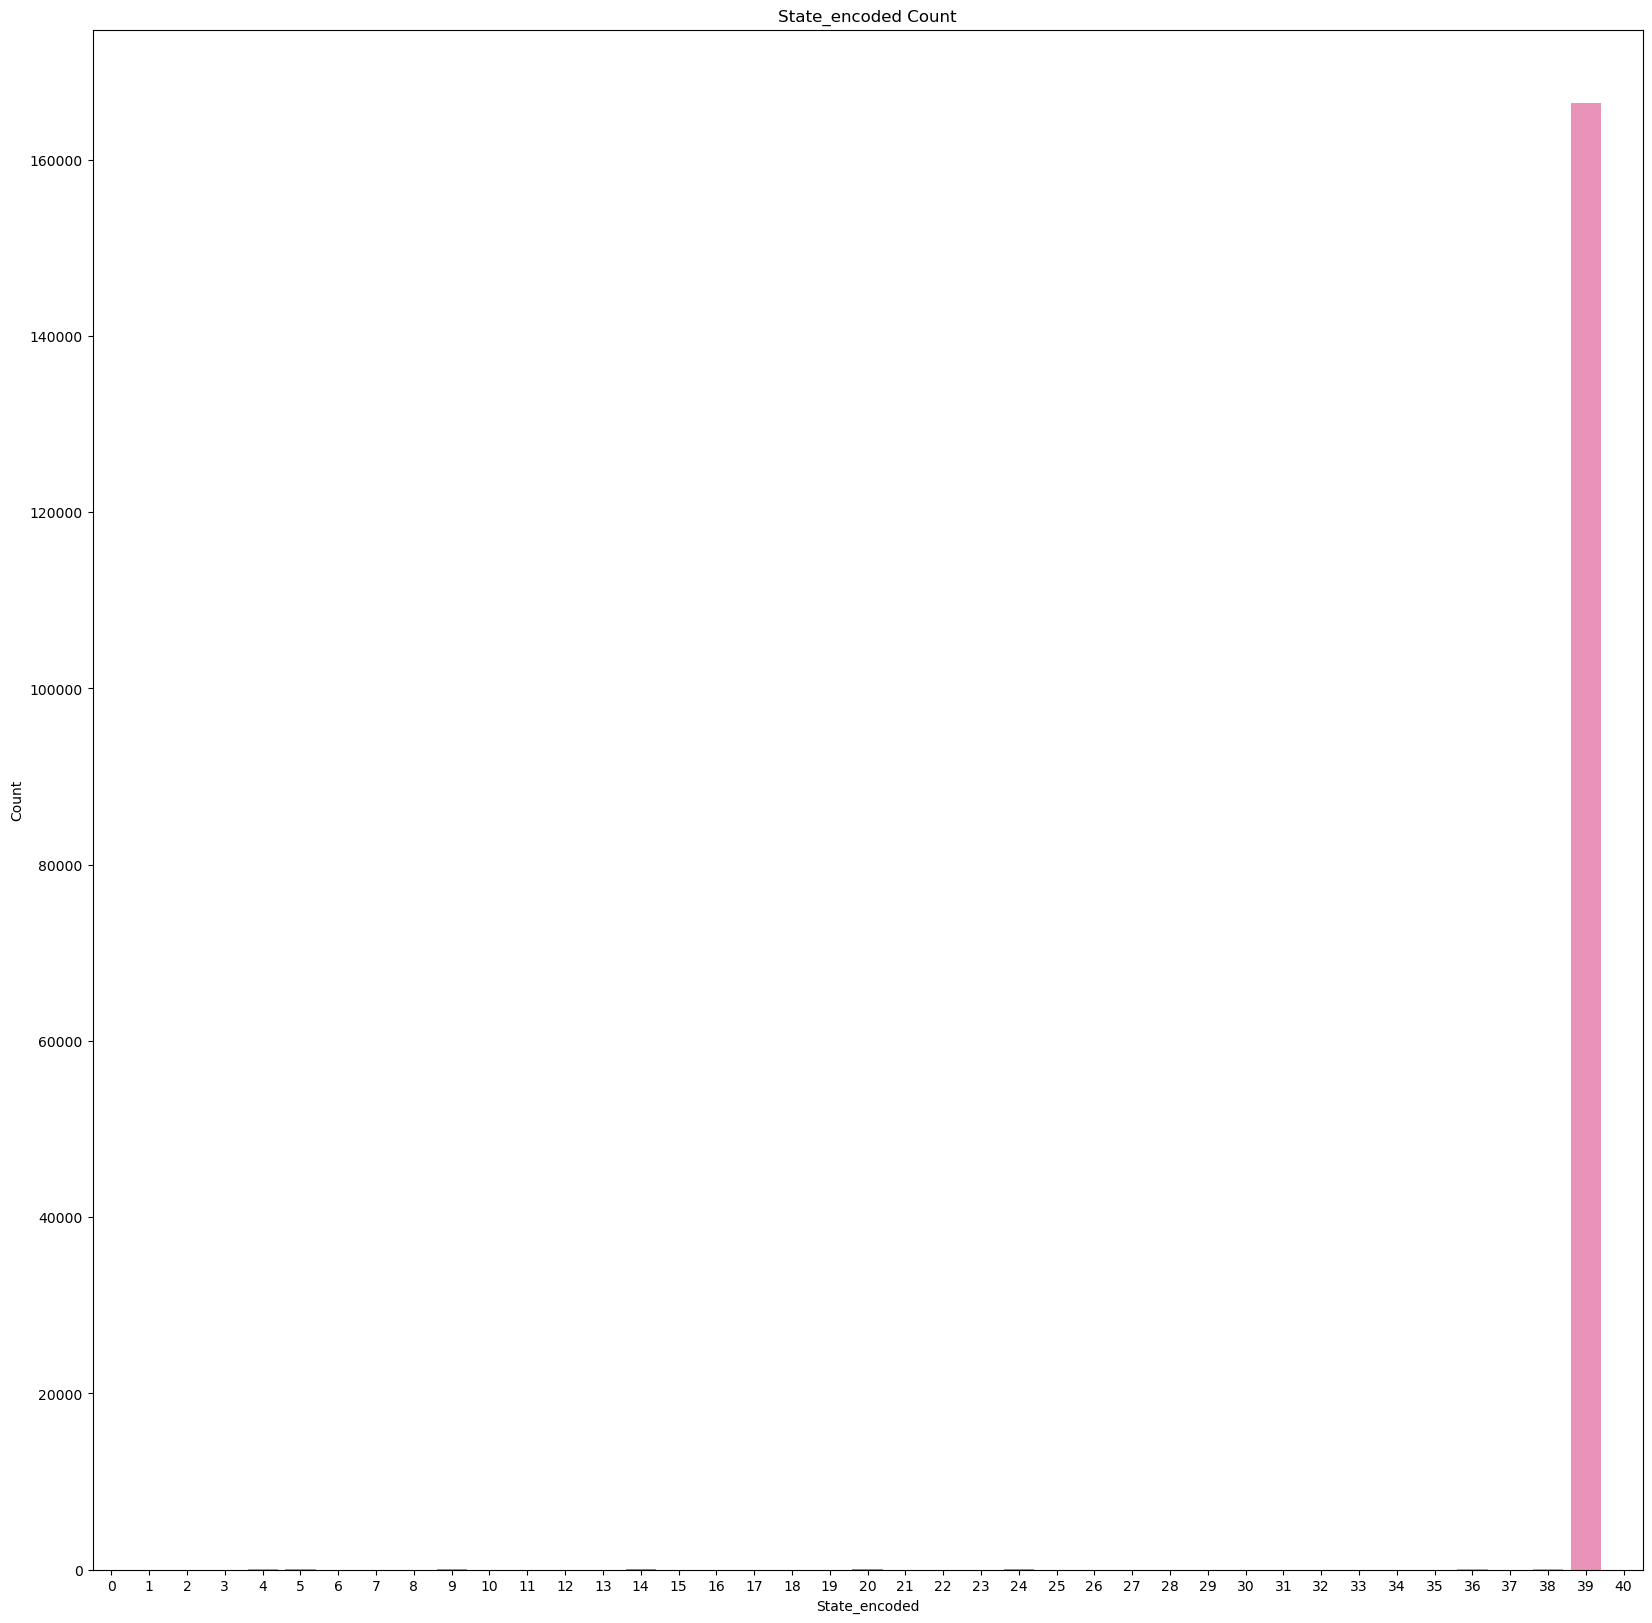

In [503]:
sns.countplot(data=df, x='state_encoded')
plt.title('State_encoded Count')
plt.xlabel('State_encoded')
plt.ylabel('Count')
plt.show()

By looking at the graph, we can see that there is only one state which has majority of data entroes. Therefore, it does not make any use to include state in the training feature set

In [504]:
df['Electric Utility']=df['Electric Utility'].str.lower()
df['Electric Utility'].head()

0                                       pacificorp
1                           puget sound energy inc
2    puget sound energy inc||city of tacoma - (wa)
3                           puget sound energy inc
4    puget sound energy inc||city of tacoma - (wa)
Name: Electric Utility, dtype: object

In [505]:
electric_utility_encoded = le.fit_transform(df['Electric Utility'])
df['electric_utility_encoded']=electric_utility_encoded
df['electric_utility_encoded'].head()

0    65
1    73
2    74
3    73
4    74
Name: electric_utility_encoded, dtype: int64

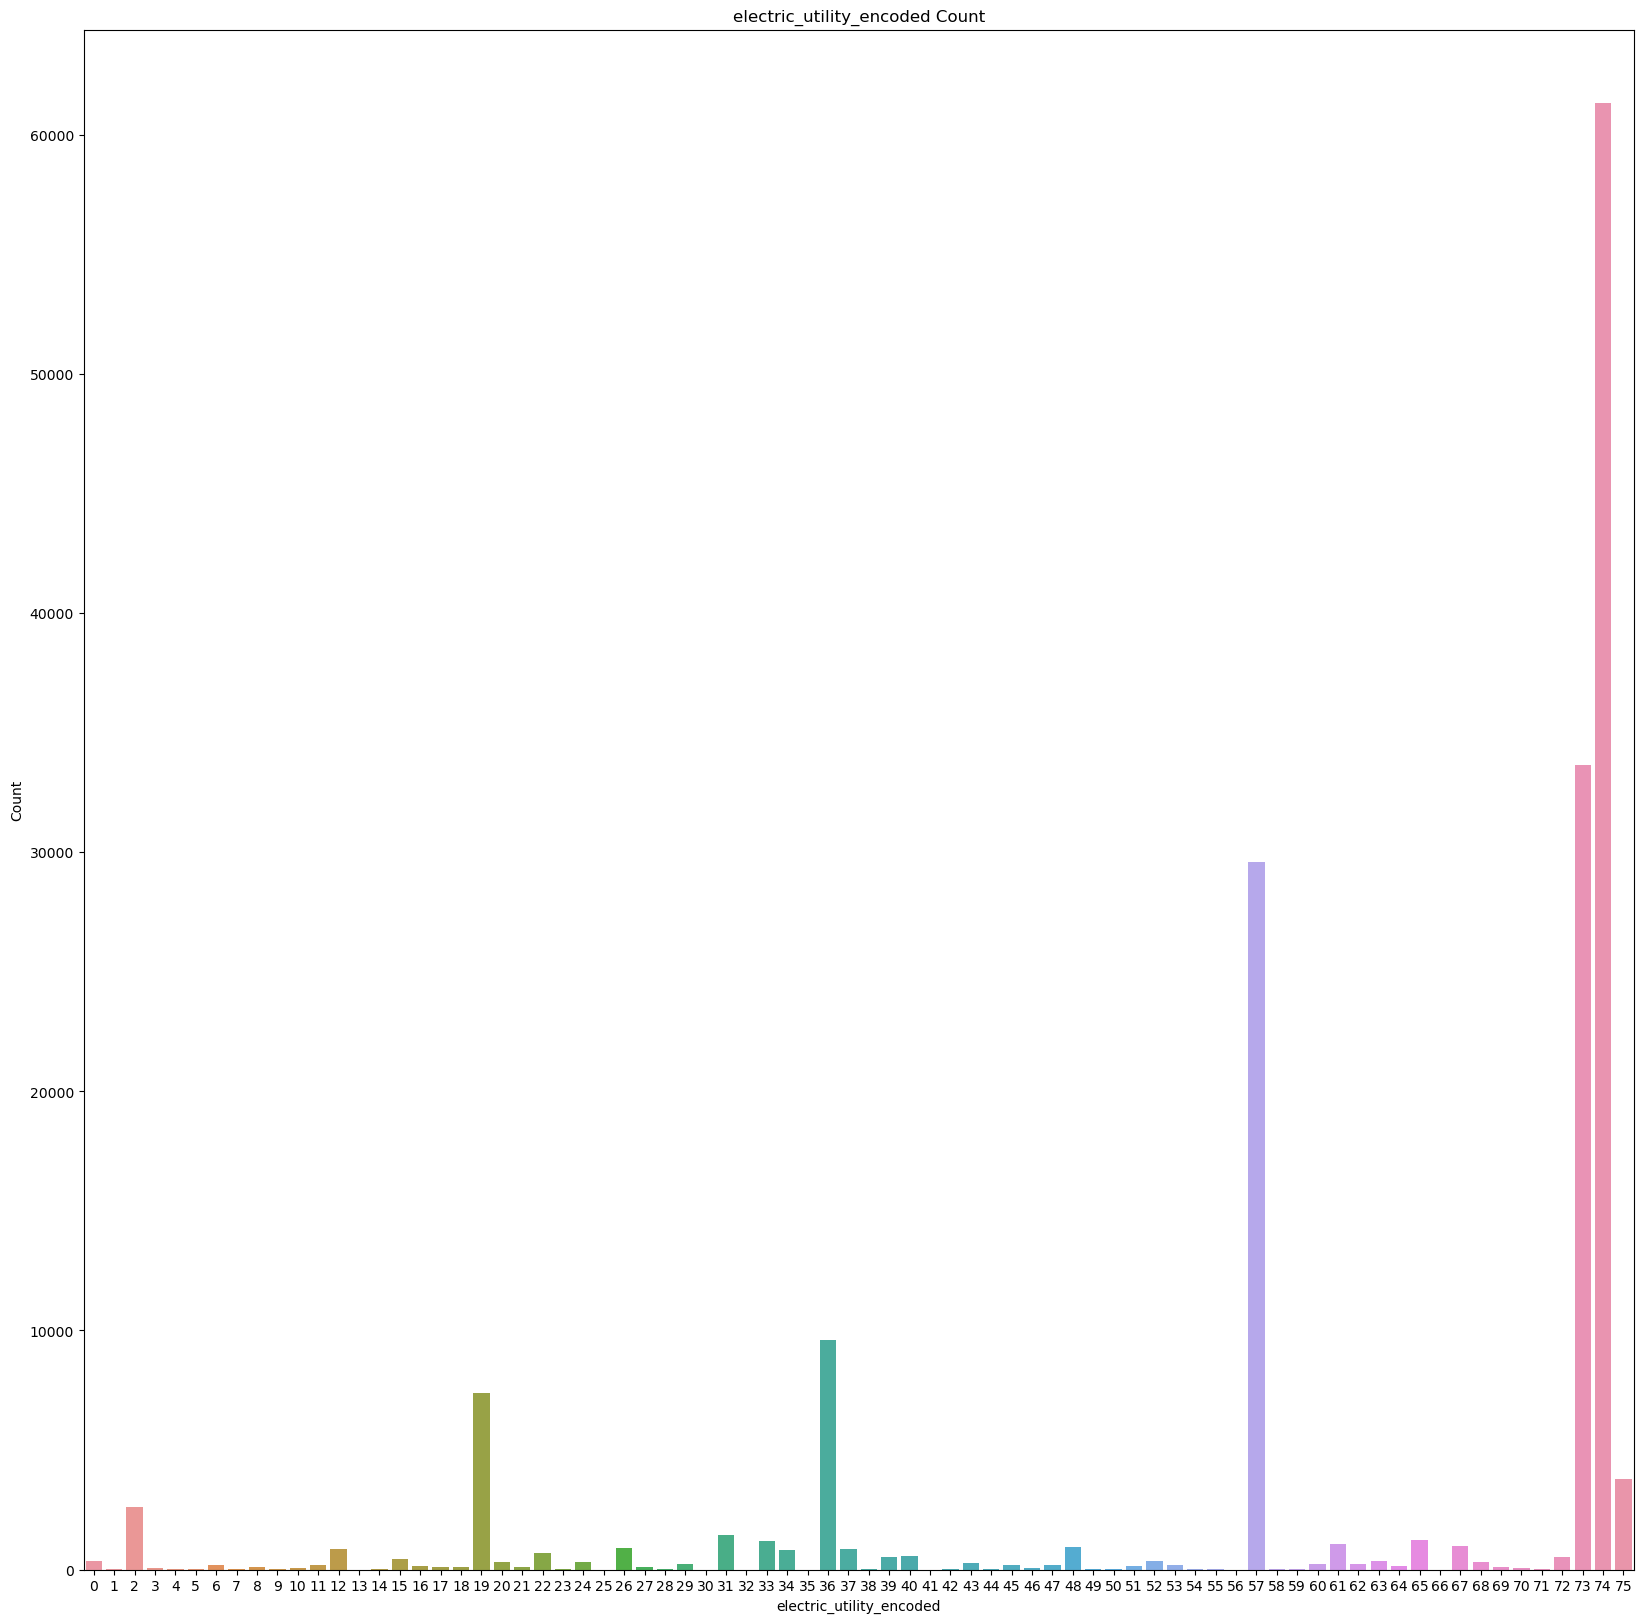

In [506]:
sns.countplot(data=df, x='electric_utility_encoded')
plt.title('electric_utility_encoded Count')
plt.xlabel('electric_utility_encoded')
plt.ylabel('Count')
plt.show()

In [507]:
df['Make']=df['Make'].str.lower()
df['Make'].head()

0      fiat
1     tesla
2       bmw
3    rivian
4     tesla
Name: Make, dtype: object

In [508]:
make_encoded = le.fit_transform(df['Make'])
df['make_encoded']=make_encoded
df['make_encoded'].head()

0     9
1    33
2     4
3    30
4    33
Name: make_encoded, dtype: int64

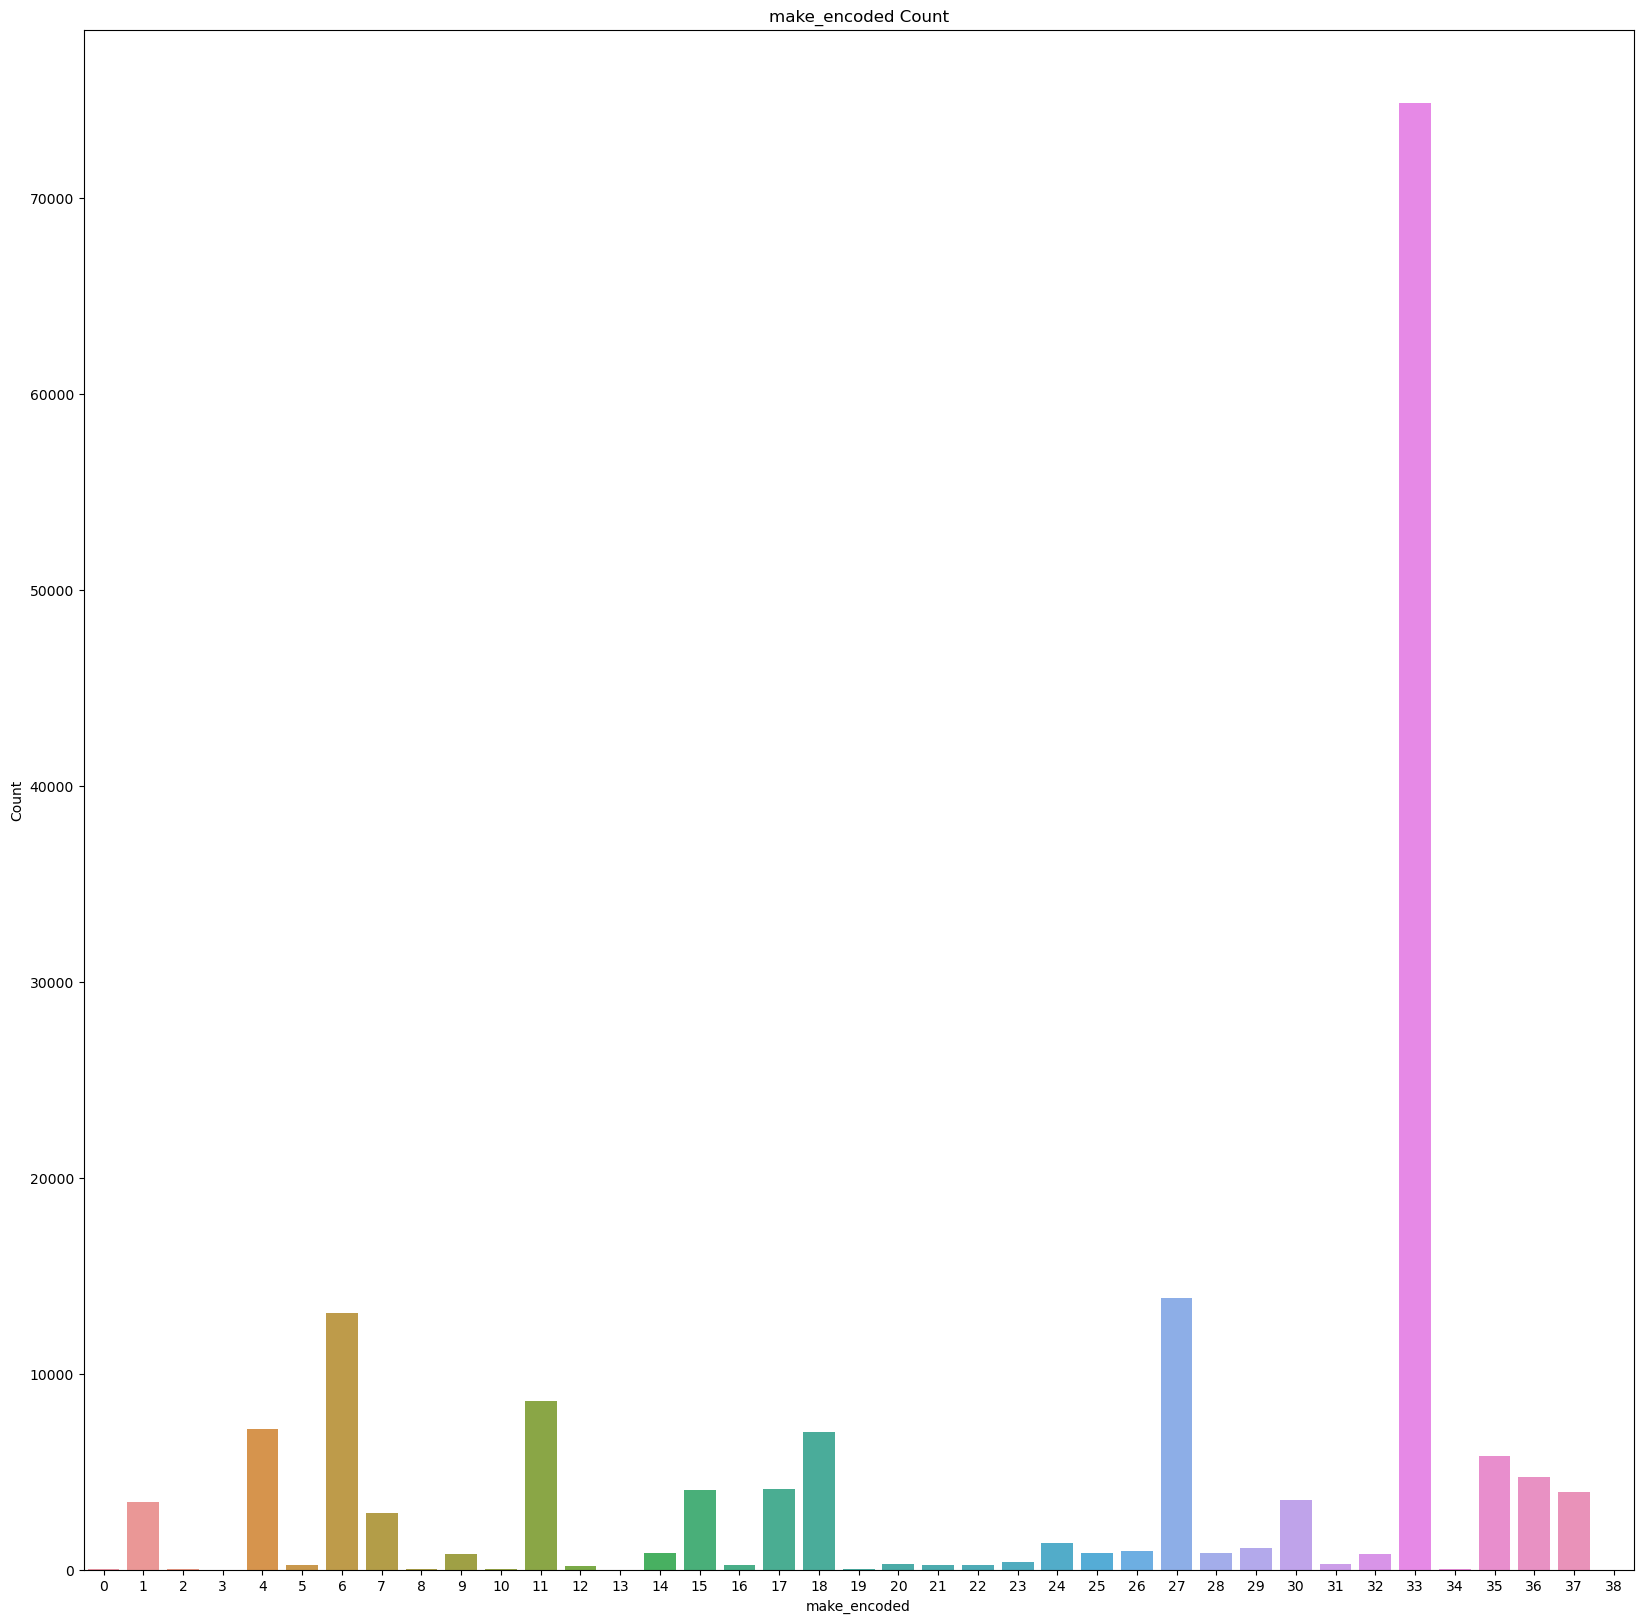

In [509]:
sns.countplot(data=df, x='make_encoded')
plt.title('make_encoded Count')
plt.xlabel('make_encoded')
plt.ylabel('Count')
plt.show()

In [510]:
df['Electric Vehicle Type']=df['Electric Vehicle Type'].str.lower()
df['Electric Vehicle Type'].head()

0            battery electric vehicle (bev)
1            battery electric vehicle (bev)
2    plug-in hybrid electric vehicle (phev)
3            battery electric vehicle (bev)
4            battery electric vehicle (bev)
Name: Electric Vehicle Type, dtype: object

In [511]:
electric_vehicle_type_encoded = le.fit_transform(df['Electric Vehicle Type'])
df['electric_vehicle_type_encoded']=electric_vehicle_type_encoded
df['electric_vehicle_type_encoded'].head()

0    0
1    0
2    1
3    0
4    0
Name: electric_vehicle_type_encoded, dtype: int64

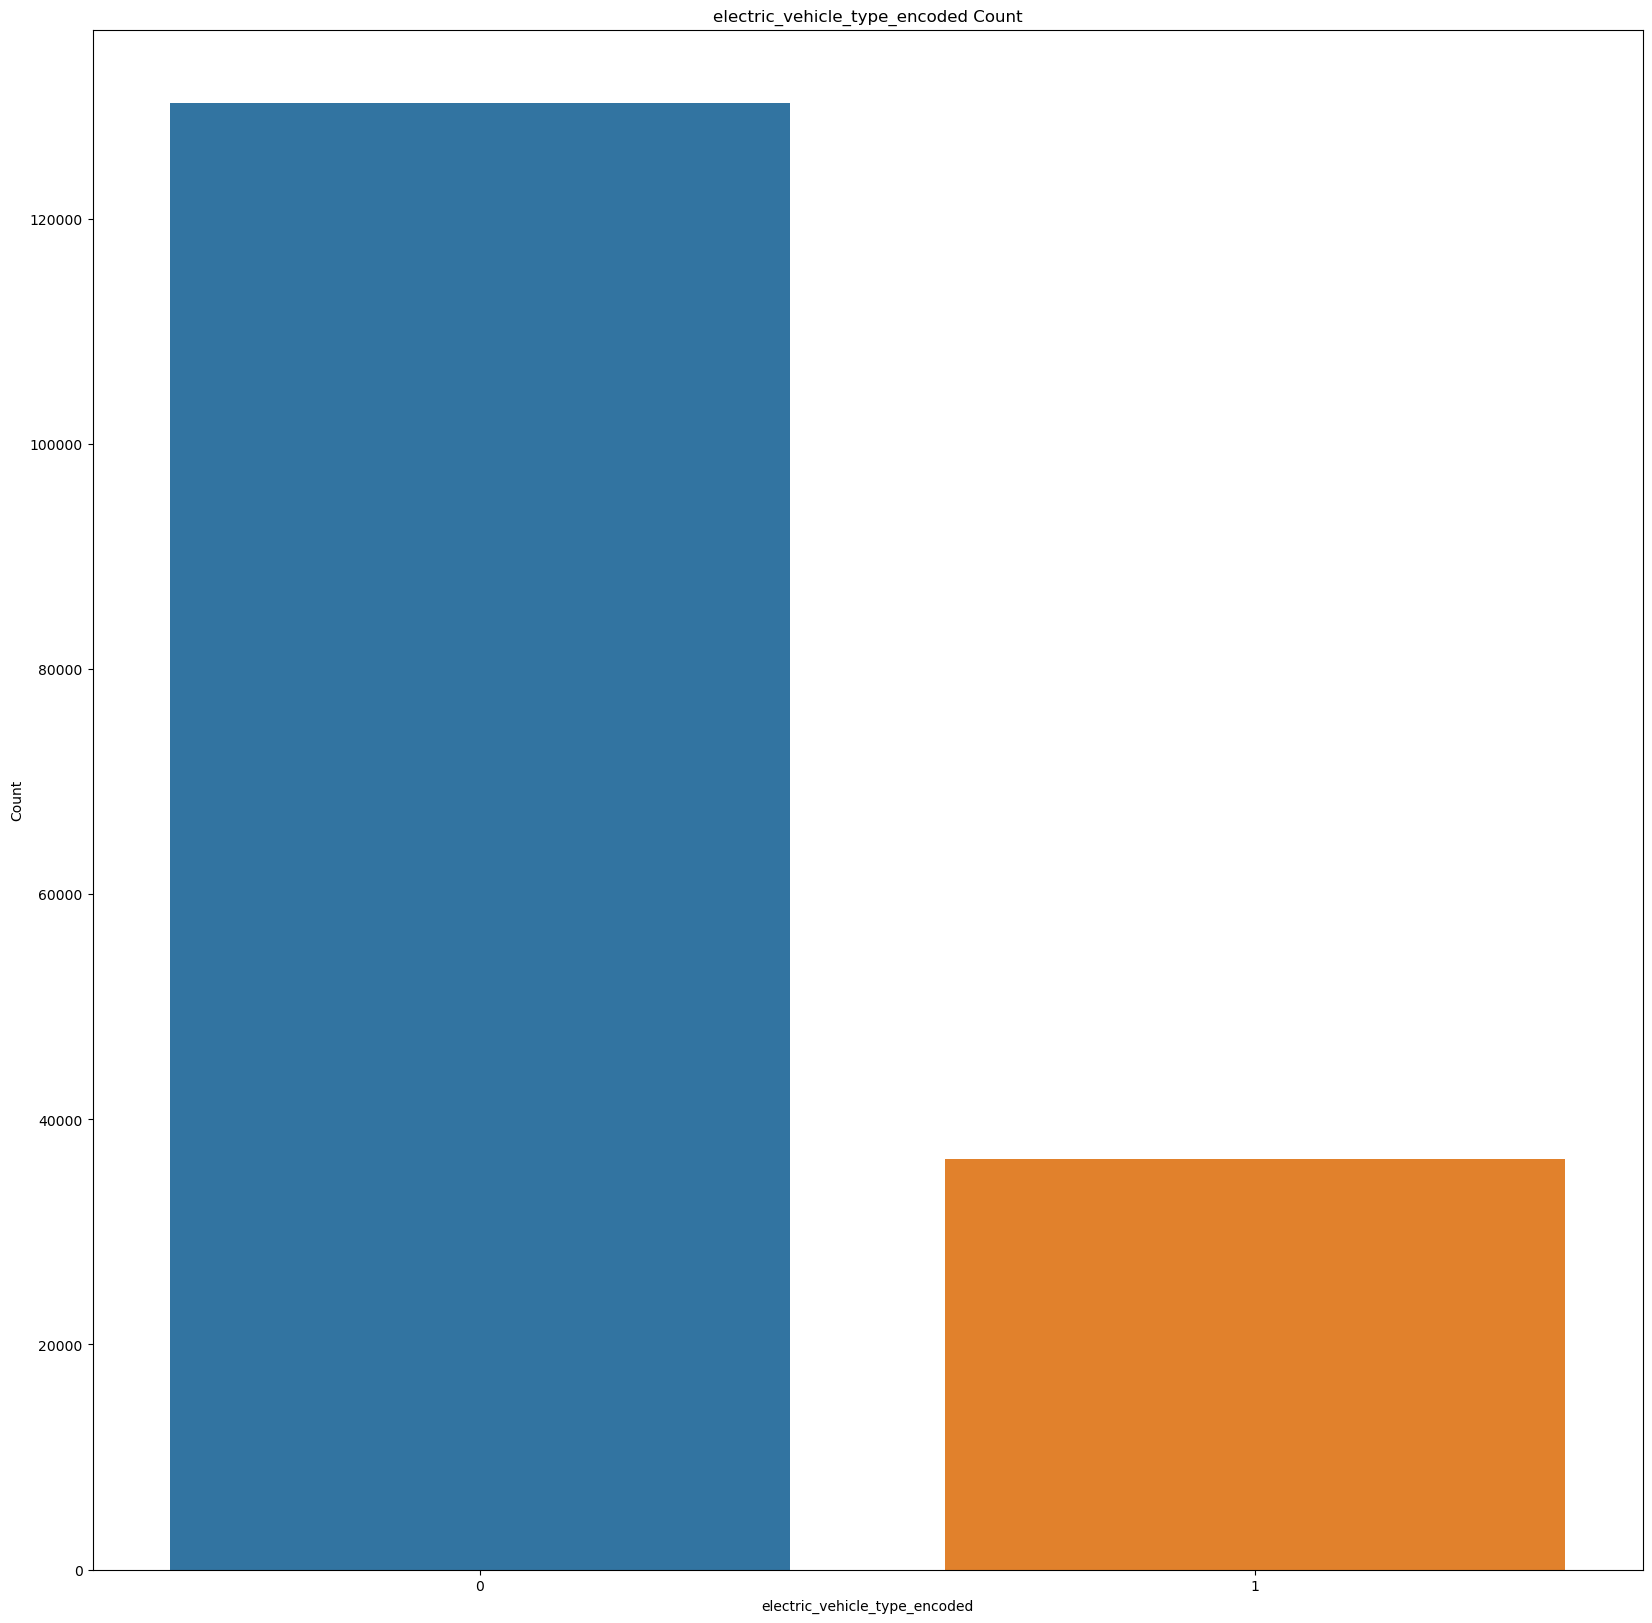

In [512]:
sns.countplot(data=df, x='electric_vehicle_type_encoded')
plt.title('electric_vehicle_type_encoded Count')
plt.xlabel('electric_vehicle_type_encoded')
plt.ylabel('Count')
plt.show()

In [513]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.lower()
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].head()

0              clean alternative fuel vehicle eligible
1              clean alternative fuel vehicle eligible
2                not eligible due to low battery range
3    eligibility unknown as battery range has not b...
4              clean alternative fuel vehicle eligible
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: object

In [514]:
clean_alternative_fuel_vehicle_eligibility_encoded = le.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
df['clean_alternative_fuel_vehicle_eligibility_encoded']=clean_alternative_fuel_vehicle_eligibility_encoded
df['clean_alternative_fuel_vehicle_eligibility_encoded'].head()

0    0
1    0
2    2
3    1
4    0
Name: clean_alternative_fuel_vehicle_eligibility_encoded, dtype: int64

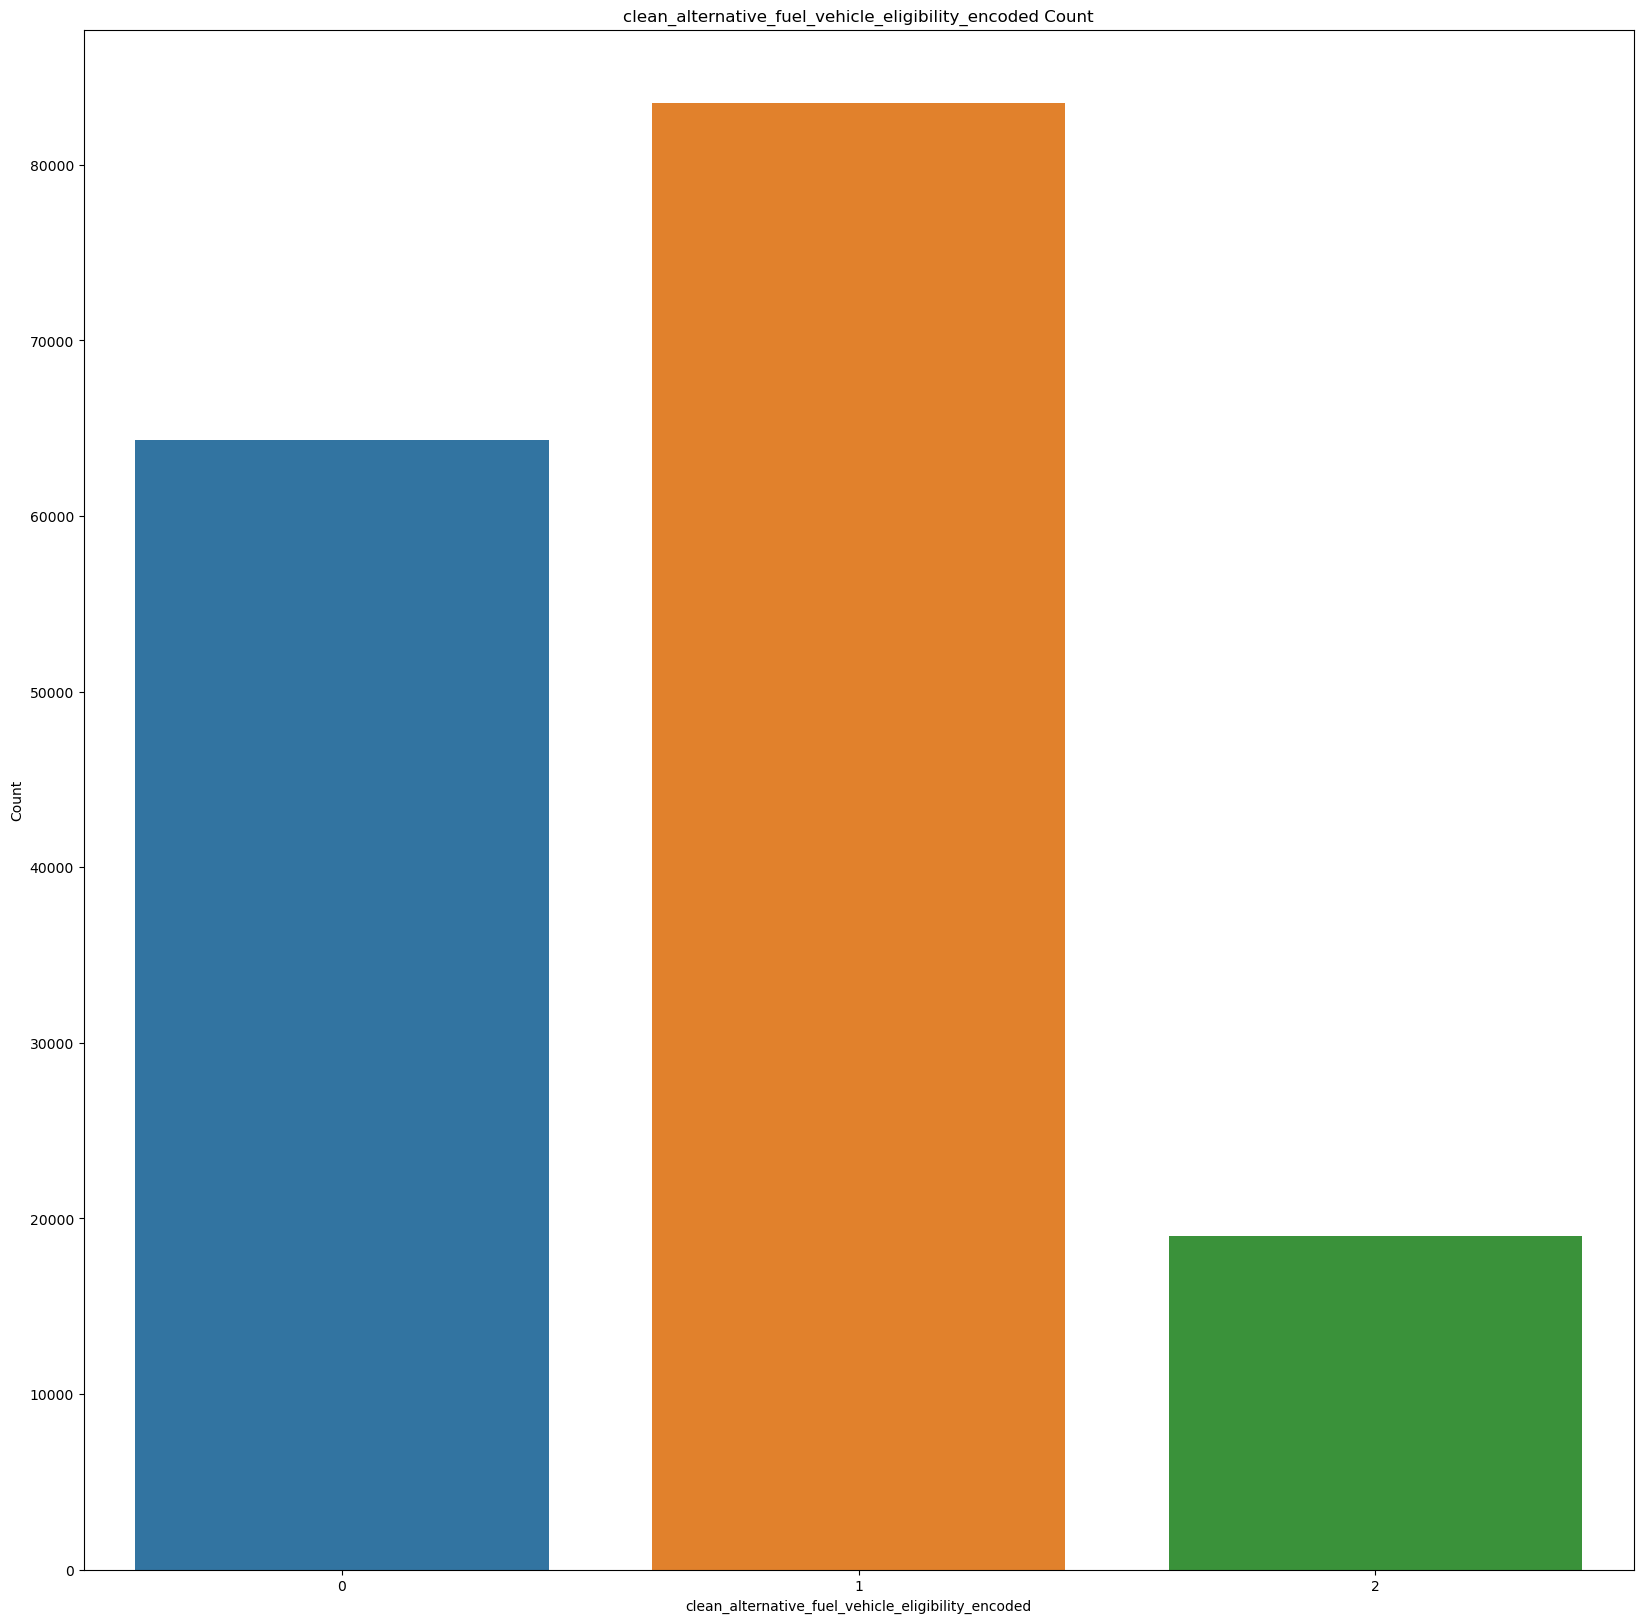

In [515]:
sns.countplot(data=df, x='clean_alternative_fuel_vehicle_eligibility_encoded')
plt.title('clean_alternative_fuel_vehicle_eligibility_encoded Count')
plt.xlabel('clean_alternative_fuel_vehicle_eligibility_encoded')
plt.ylabel('Count')
plt.show()

In [516]:
df['Longitude_encoded'] = df['Vehicle Location'].str.extract(r'POINT \(([-\d.]+)').astype(float)
df['Latitude_encoded'] = df['Vehicle Location'].str.extract(r' (-?\d+\.\d+)').astype(float)

In [517]:
df['Longitude_encoded_sin']=df['Longitude_encoded'].apply(lambda x:math.sin(x))
df['Longitude_encoded_sin'].head()

0   -0.910086
1    0.291153
2   -0.382246
3   -0.328593
4   -0.315384
Name: Longitude_encoded_sin, dtype: float64

In [518]:
df['Legislative District'].describe()

count    166435.000000
mean         29.179247
std          14.853652
min           1.000000
25%          18.000000
50%          33.000000
75%          42.000000
max          49.000000
Name: Legislative District, dtype: float64

In [519]:
print(f"The mean of the column Legislative District : {df['Legislative District'].mean()}")
print(f"The mode of the column Legislative District : {df['Legislative District'].mode()}")
print(f"The median of the column Legislative District : {df['Legislative District'].median()}")

The mean of the column Legislative District : 29.179247153543425
The mode of the column Legislative District : 0    41.0
Name: Legislative District, dtype: float64
The median of the column Legislative District : 33.0


**Observation** - We can replace the na columns with mean

In [520]:
df['Legislative District'].fillna(df['Legislative District'].mean(), inplace=True)

In [521]:
df['LegislativeDistrictCos']=df['Legislative District'].apply(lambda x:math.cos(x))
df['LegislativeDistrictCos'].head()

0    0.136737
1   -0.416147
2    0.004426
3   -0.547729
4   -0.013277
Name: LegislativeDistrictCos, dtype: float64

In [522]:
df['ElectricRangeCos']=df['Electric Range'].apply(lambda x:math.cos(x))
df['ElectricRangeCos'].head()

0    0.569750
1    0.487188
2    0.408082
3    1.000000
4    0.013247
Name: ElectricRangeCos, dtype: float64

In [523]:
df.isnull().sum()

VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                      0
Electric Utility                                      0
2020 Census Tract                                     0
city_encoded                                    

In [524]:
df['clean_alternative_fuel_vehicle_eligibility_encoded'].head()

0    0
1    0
2    2
3    1
4    0
Name: clean_alternative_fuel_vehicle_eligibility_encoded, dtype: int64

Visualizations

In [525]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'city_encoded', 'county_encoded', 'state_encoded',
       'electric_utility_encoded', 'make_encoded',
       'electric_vehicle_type_encoded',
       'clean_alternative_fuel_vehicle_eligibility_encoded',
       'Longitude_encoded', 'Latitude_encoded', 'Longitude_encoded_sin',
       'LegislativeDistrictCos', 'ElectricRangeCos'],
      dtype='object')


----------------------------------------------------------

Identify uncorrelated or unrelated features.
Unrelated or uncorrelated features can introduce confusion to your model and
negatively impact its performance. You can compute the correlation matrix between the
features and the target variable. Features with a low correlation coefficient should be
identified and subsequently dropped from the dataset to enhance model performance.

----------------------------------------------------------

In [526]:
varr=df[['Postal Code', 'Model Year','Electric Range','Legislative District',
       'Base MSRP',   '2020 Census Tract','DOL Vehicle ID',
       'city_encoded', 'county_encoded',
       'electric_utility_encoded', 'make_encoded',
       'electric_vehicle_type_encoded',
       'clean_alternative_fuel_vehicle_eligibility_encoded',
       'Longitude_encoded', 'Latitude_encoded','ElectricRangeCos',
       'LegislativeDistrictCos','Longitude_encoded_sin']]

In [527]:
varr.head(10)

Postal Code  Model Year  Electric Range  Legislative District  Base MSRP  \
0      98902.0        2014              87                  14.0          0   
1      98513.0        2017             200                   2.0          0   
2      98058.0        2023              20                  11.0          0   
3      98012.0        2023               0                  21.0          0   
4      98031.0        2020             322                  33.0          0   
5      98370.0        2024              39                  23.0          0   
6      98367.0        2018              33                  26.0          0   
7      98370.0        2017             238                  23.0          0   
8      98366.0        2018             215                  26.0          0   
9      98019.0        2018             114                  45.0          0   

   2020 Census Tract  DOL Vehicle ID  city_encoded  county_encoded  \
0       5.307700e+10         1593721           698             185   
1       5.306701e+10       257167501           433             167   
2       5.303303e+10       224071816           504              77   
3       5.306105e+10       260084653            57             156   
4       5.303303e+10       253771913           288              77   
5       5.303594e+10       259427829           485              79   
6       5.303509e+10       477087012           480              79   
7       5.303509e+10       214494213           485              79   
8       5.303509e+10       280785123           480              79   
9       5.303303e+10       129133343           158              77   

   electric_utility_encoded  make_encoded  electric_vehicle_type_encoded  \
0                        65             9                              0   
1                        73            33                              0   
2                        74             4                              1   
3                        73            30                              0   
4                        74            33                              0   
5                        73             4                              1   
6                        73             7                              1   
7                        73             6                              0   
8                        73            33                              0   
9                        74             4                              0   

   clean_alternative_fuel_vehicle_eligibility_encoded  Longitude_encoded  \
0                                                  0         -120.524012   
1                                                  0         -122.817545   
2                                                  2         -122.129888   
3                                                  1         -122.187300   
4                                                  0         -122.201252   
5                                                  0         -122.641770   
6                                                  0         -122.684707   
7                                                  0         -122.641770   
8                                                  0         -122.639265   
9                                                  0         -121.981075   

   Latitude_encoded  ElectricRangeCos  LegislativeDistrictCos  \
0         46.597394          0.569750                0.136737   
1         46.988760          0.487188               -0.416147   
2         47.445126          0.408082                0.004426   
3         47.820245          1.000000               -0.547729   
4         47.393181          0.013247               -0.013277   
5         47.737525          0.266643               -0.532833   
6         47.505240         -0.013277                0.646919   
7         47.737525          0.724118               -0.532833   
8         47.537300          0.197784                0.646919   
9         47.737796          0.619521 

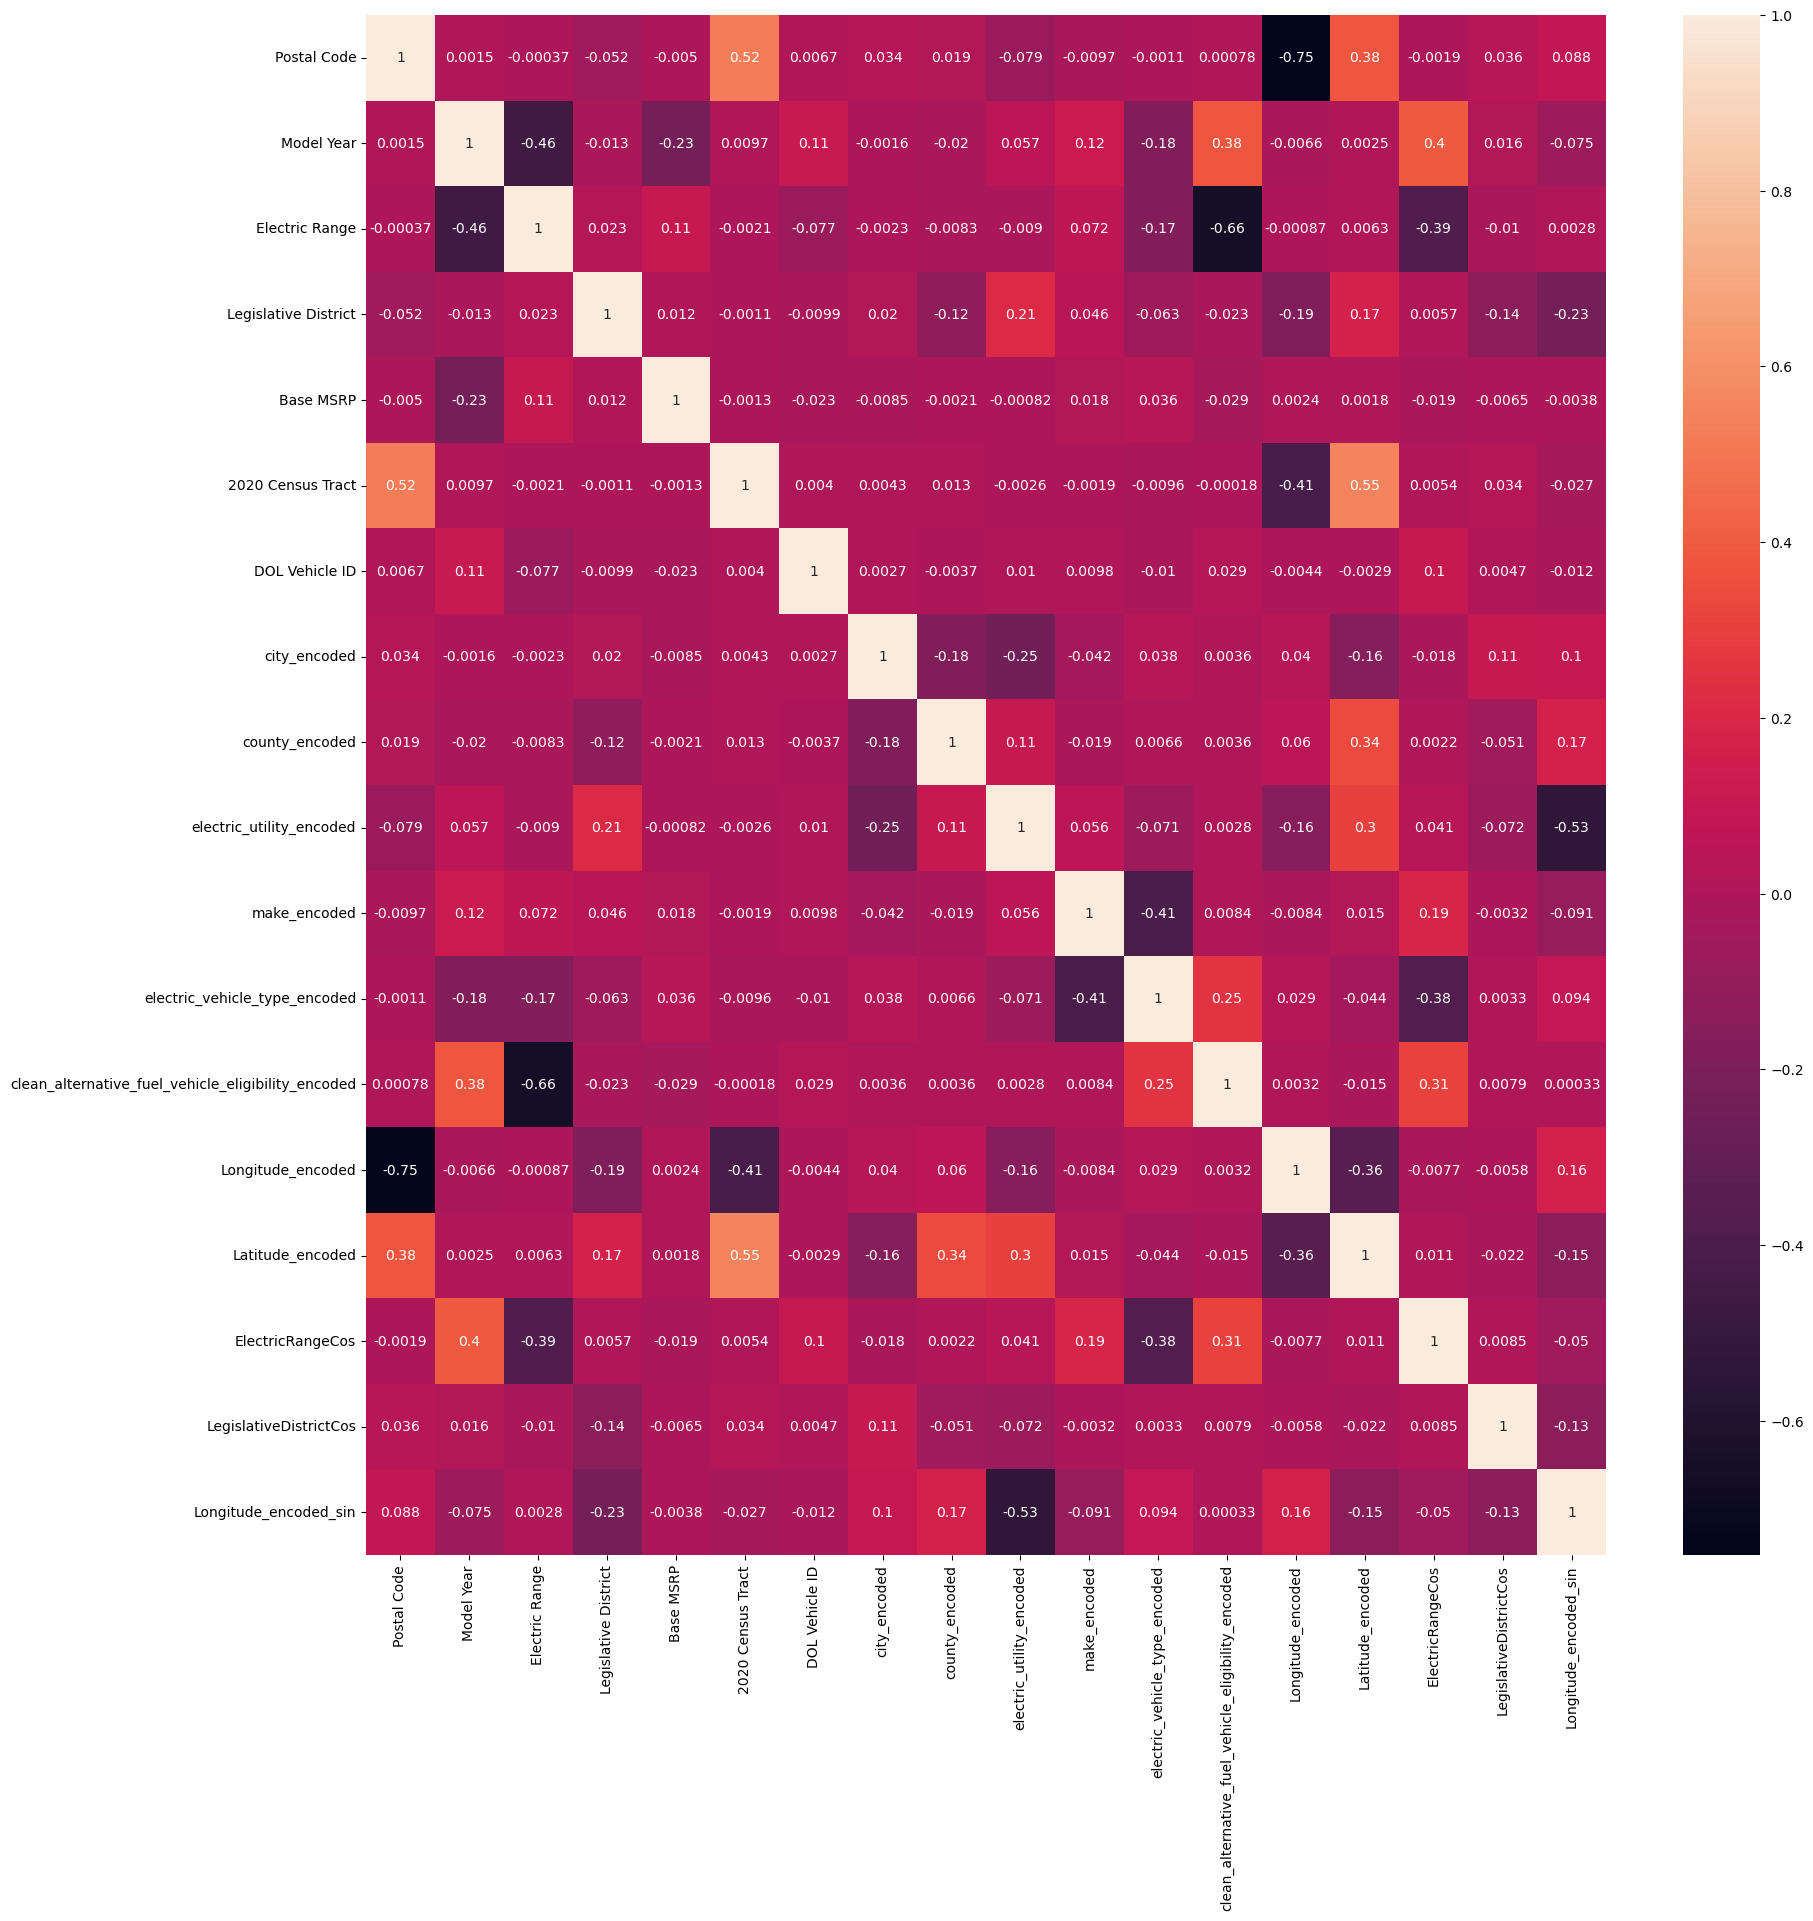

In [528]:
plt.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(varr.corr(),annot=True)
plt.show()

In [529]:
varr.corr()

Postal Code  Model Year  \
Postal Code                                            1.000000    0.001502   
Model Year                                             0.001502    1.000000   
Electric Range                                        -0.000365   -0.463431   
Legislative District                                  -0.051655   -0.012970   
Base MSRP                                             -0.004992   -0.230712   
2020 Census Tract                                      0.523285    0.009711   
DOL Vehicle ID                                         0.006711    0.110664   
city_encoded                                           0.033925   -0.001631   
county_encoded                                         0.018834   -0.020447   
electric_utility_encoded                              -0.079158    0.056780   
make_encoded                                          -0.009678    0.123533   
electric_vehicle_type_encoded                         -0.001051   -0.179057   
clean_alternative_fuel_vehicle_eligibility_encoded     0.000775    0.378234   
Longitude_encoded                                     -0.752859   -0.006571   
Latitude_encoded                                       0.379071    0.002492   
ElectricRangeCos                                      -0.001856    0.395818   
LegislativeDistrictCos                                 0.036034    0.015930   
Longitude_encoded_sin                                  0.088138   -0.074696   

                                                    Electric Range  \
Postal Code                                              -0.000365   
Model Year                                               -0.463431   
Electric Range                                            1.000000   
Legislative District                                      0.022550   
Base MSRP                                                 0.106902   
2020 Census Tract                                        -0.002069   
DOL Vehicle ID                                           -0.077442   
city_encoded                                             -0.002295   
county_encoded                                           -0.008335   
electric_utility_encoded                                 -0.008952   
make_encoded                                              0.071903   
electric_vehicle_type_encoded                            -0.174868   
clean_alternative_fuel_vehicle_eligibility_encoded       -0.661354   
Longitude_encoded                                        -0.000870   
Latitude_encoded                                          0.006348   
ElectricRangeCos                                         -0.387760   
LegislativeDistrictCos                                   -0.010477   
Longitude_encoded_sin                                     0.002818   

                                                    Legislative District  \
Postal Code                                                    -0.051655   
Model Year                                                     -0.012970   
Electric Range                                                  0.022550   
Legislative District                                            1.000000   
Base MSRP                                                       0.012204   
2020 Census Tract                                              -0.001070   
DOL Vehicle ID                                                 -0.009888   
city_encoded                                                    0.020442   
county_encoded                                                 -0.122060   
electric_utility_encoded                                        0.210659   
make_encoded                                                    0.046251   
electric_vehicle_type_encoded                                  -0.063441   
clean_alternative_fuel_vehicle_eligibility_encoded             -0.022918   
Longitude_encoded                                              -0.185385   
Latitude_encoded                                                0.166862   
Ele

In [530]:
plt.rcParams['figure.figsize'] = [150, 100]
data = df.groupby(['city_encoded', 'clean_alternative_fuel_vehicle_eligibility_encoded']).size().reset_index(name='Count')
sns.barplot(x='city_encoded',y='Count',hue='clean_alternative_fuel_vehicle_eligibility_encoded',data=data)
plt.show()

In [531]:
plt.rcParams['figure.figsize'] = [120, 100]
data = df.groupby(['county_encoded', 'clean_alternative_fuel_vehicle_eligibility_encoded']).size().reset_index(name='Count')
sns.barplot(x='county_encoded',y='Count',hue='clean_alternative_fuel_vehicle_eligibility_encoded',data=data)
plt.show()

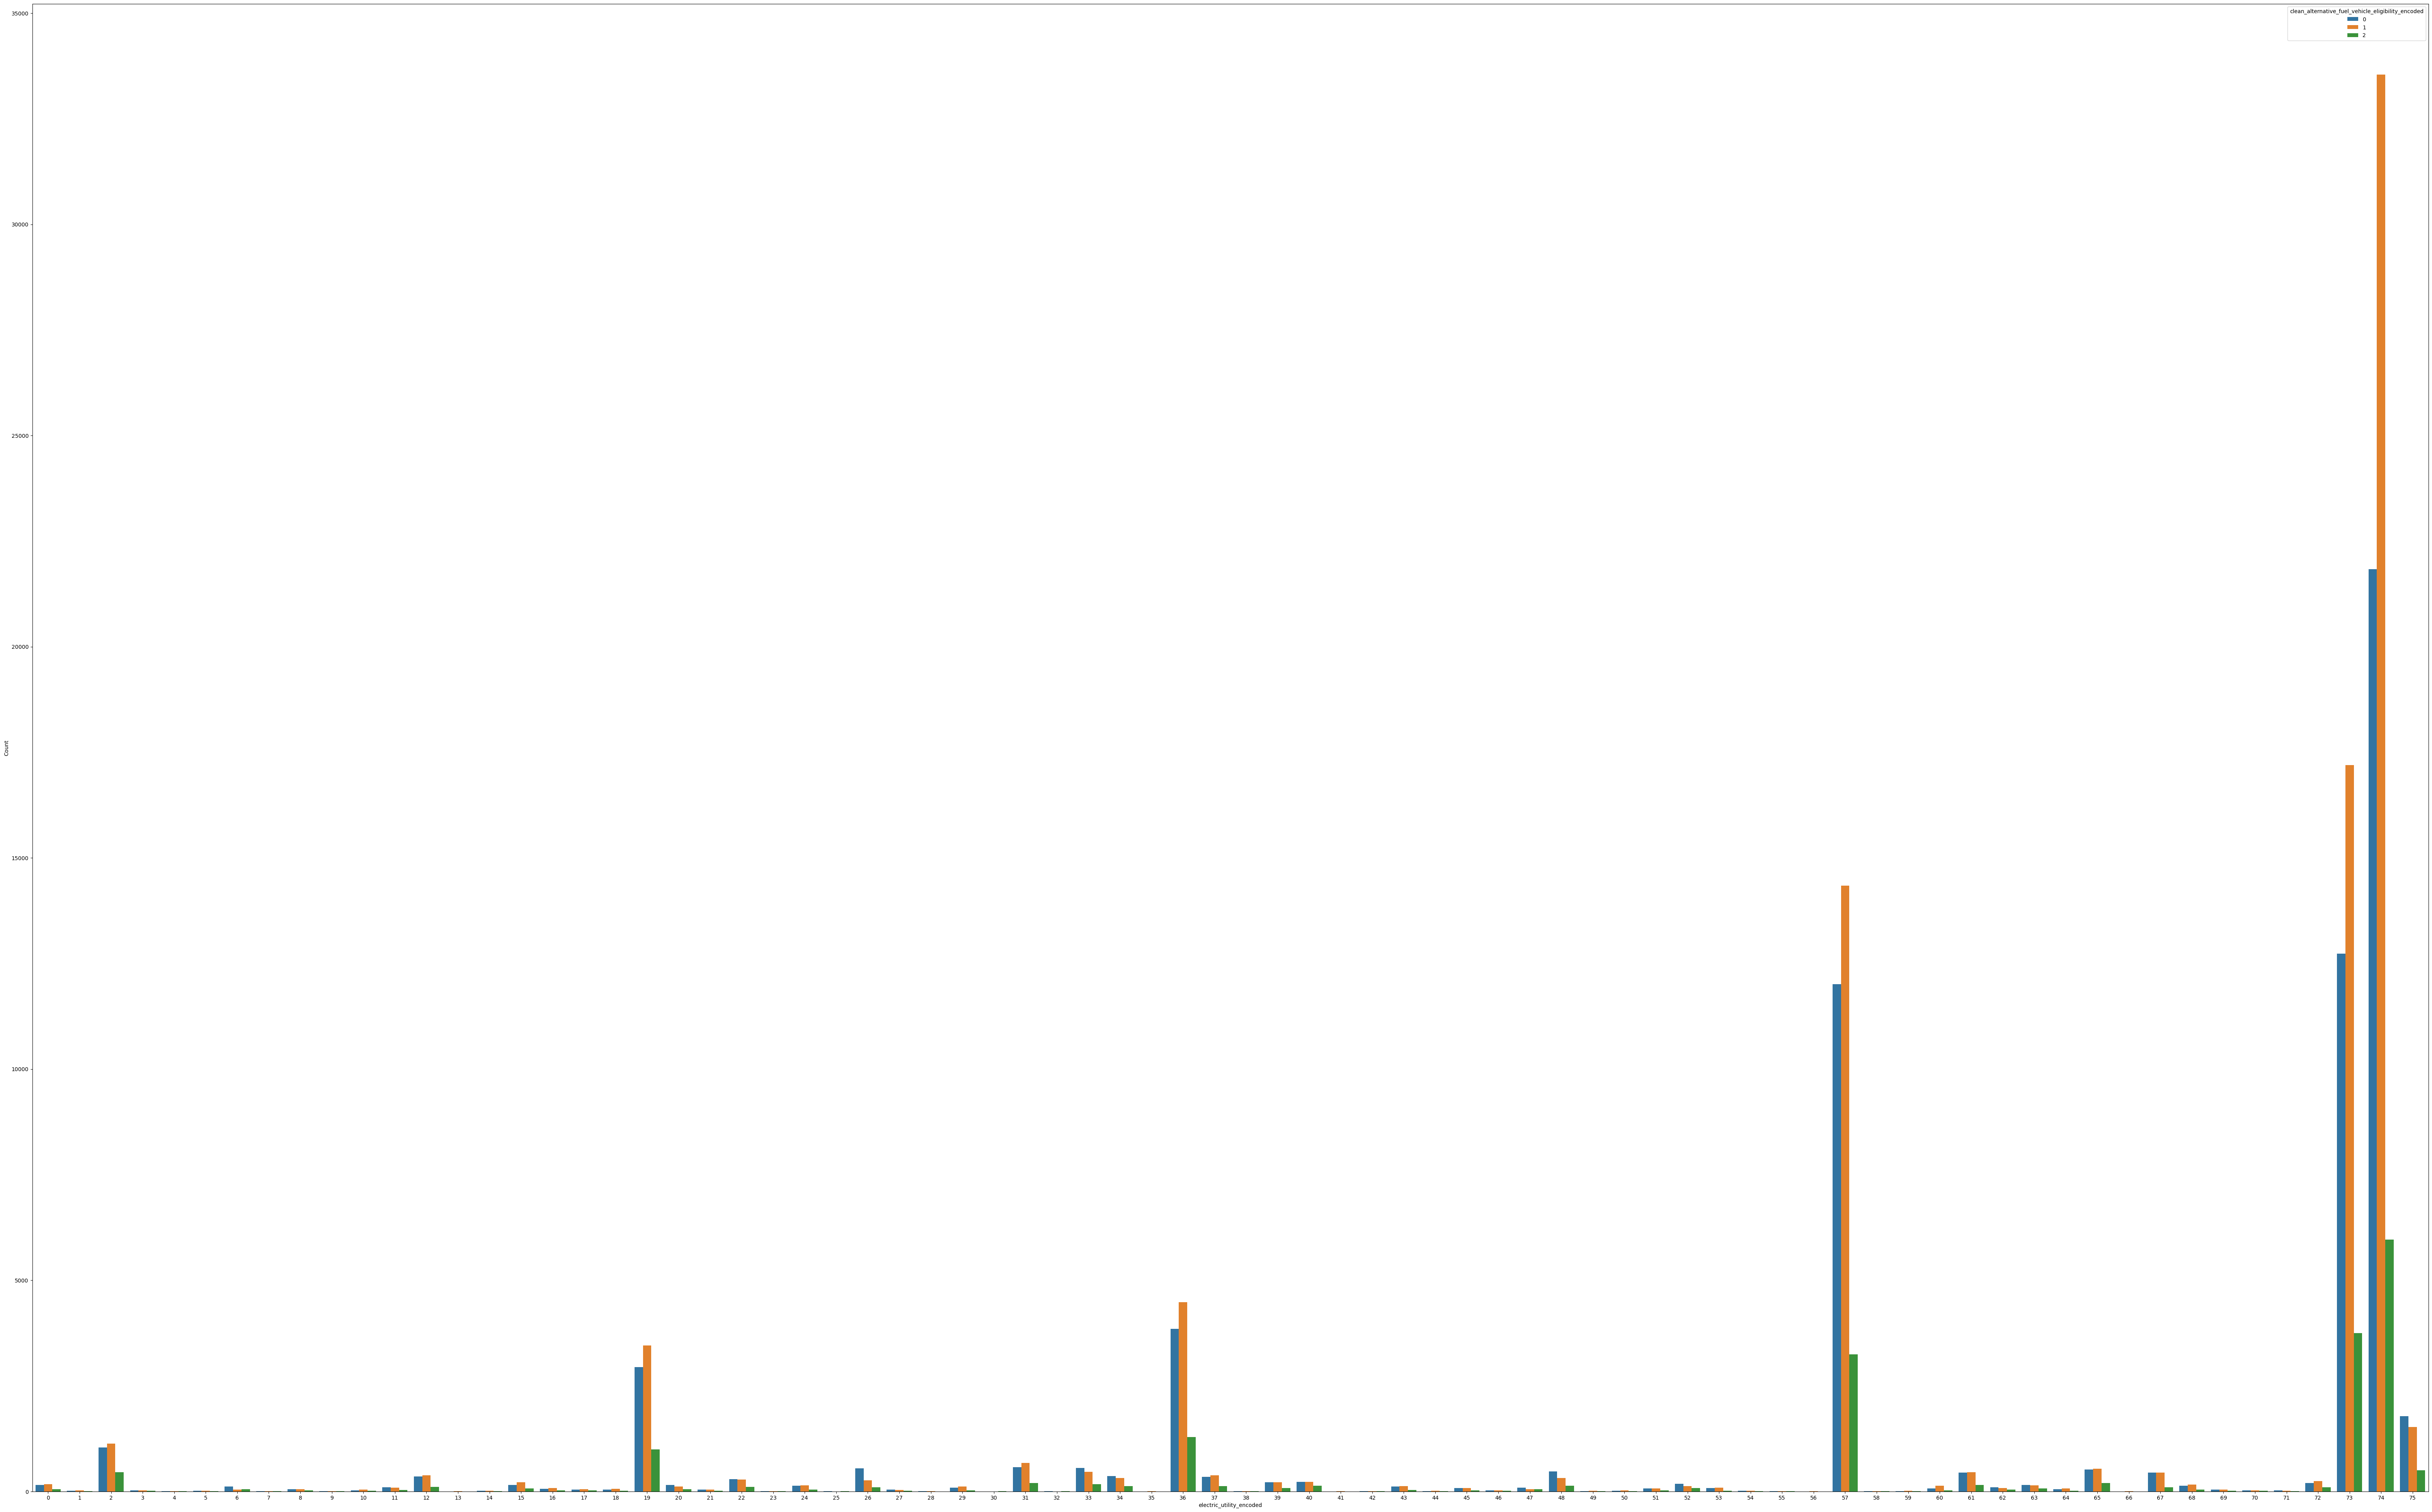

In [532]:
plt.rcParams['figure.figsize'] = [80, 50]
data = df.groupby(['electric_utility_encoded', 'clean_alternative_fuel_vehicle_eligibility_encoded']).size().reset_index(name='Count')
sns.barplot(x='electric_utility_encoded',y='Count',hue='clean_alternative_fuel_vehicle_eligibility_encoded',data=data)
plt.show()

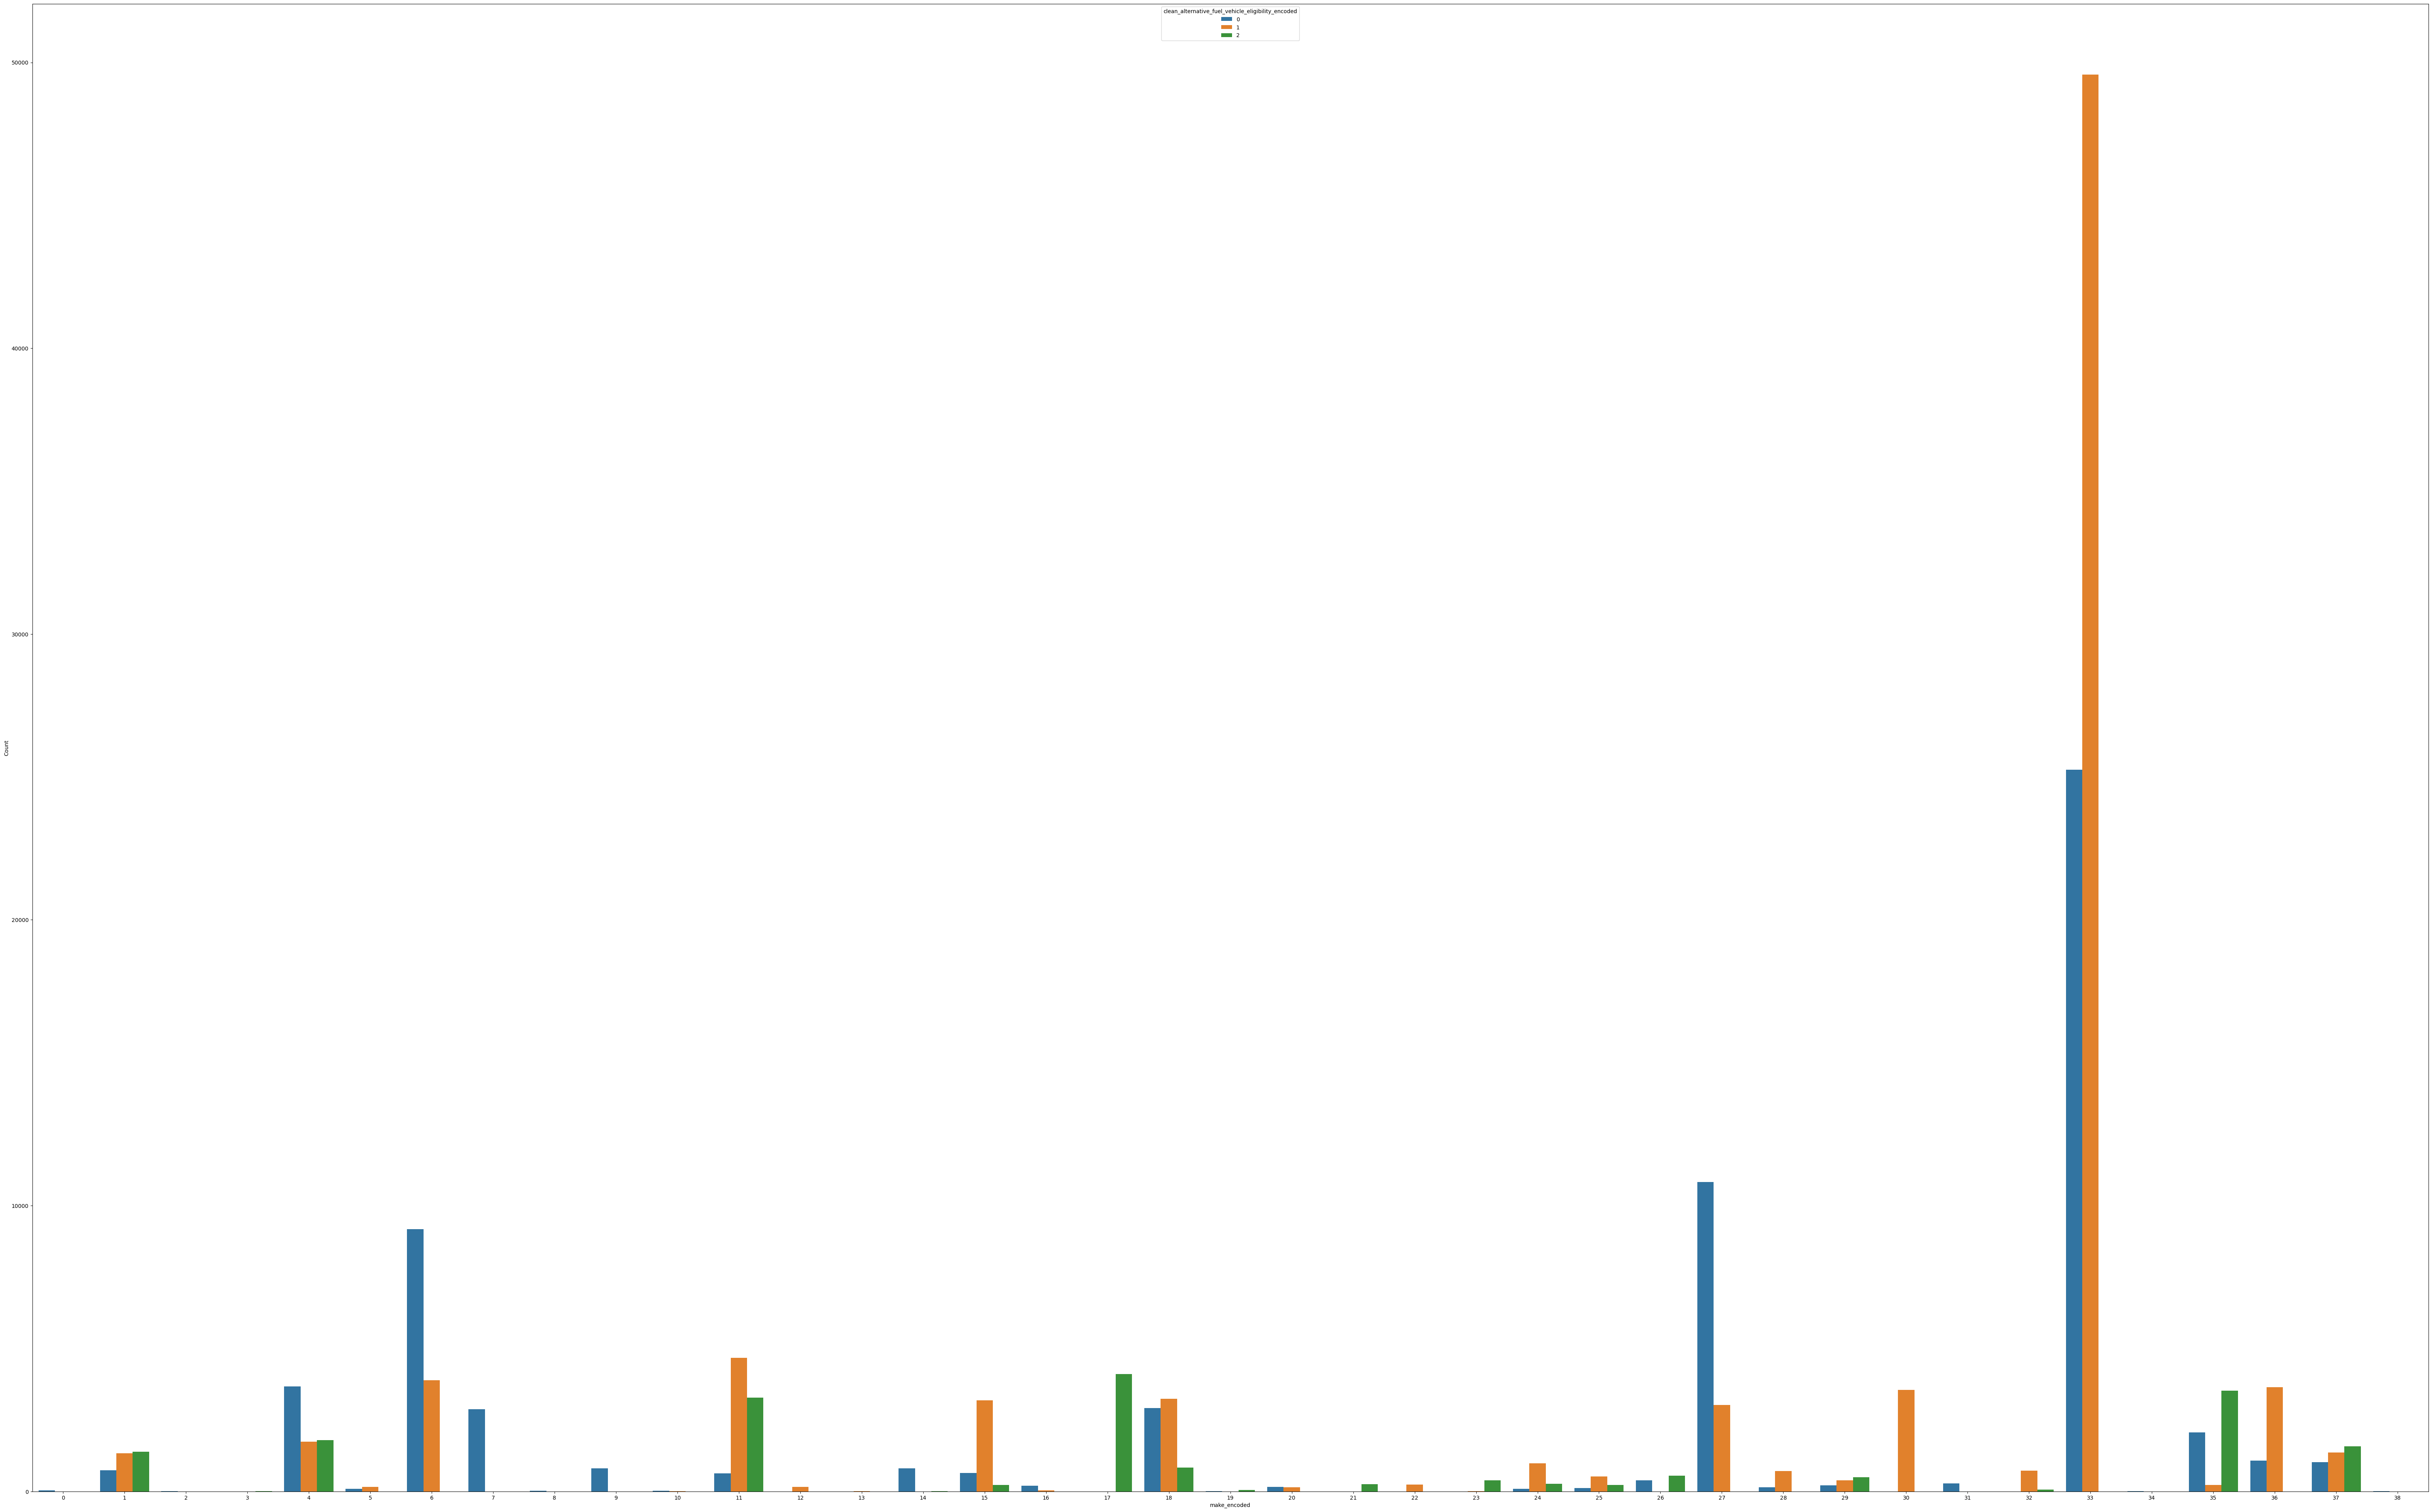

In [533]:
plt.rcParams['figure.figsize'] = [80, 50]
data = df.groupby(['make_encoded', 'clean_alternative_fuel_vehicle_eligibility_encoded']).size().reset_index(name='Count')
sns.barplot(x='make_encoded',y='Count',hue='clean_alternative_fuel_vehicle_eligibility_encoded',data=data)
plt.show()

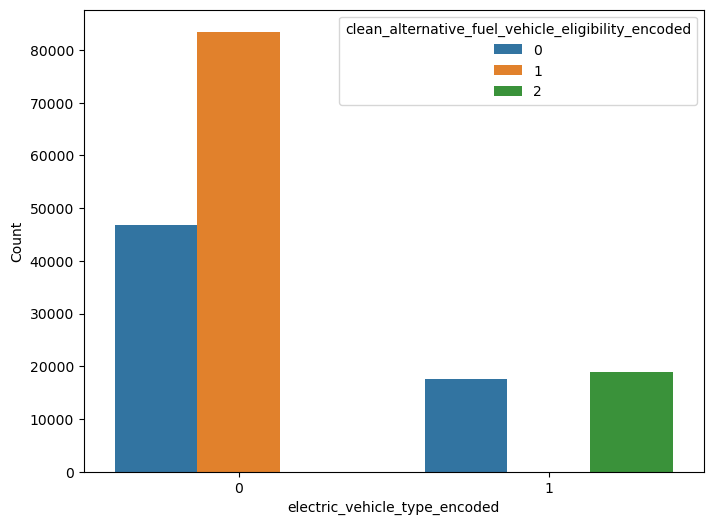

In [534]:
plt.rcParams['figure.figsize'] = [8, 6]
data = df.groupby(['electric_vehicle_type_encoded', 'clean_alternative_fuel_vehicle_eligibility_encoded']).size().reset_index(name='Count')
sns.barplot(x='electric_vehicle_type_encoded',y='Count',hue='clean_alternative_fuel_vehicle_eligibility_encoded',data=data)
plt.show()

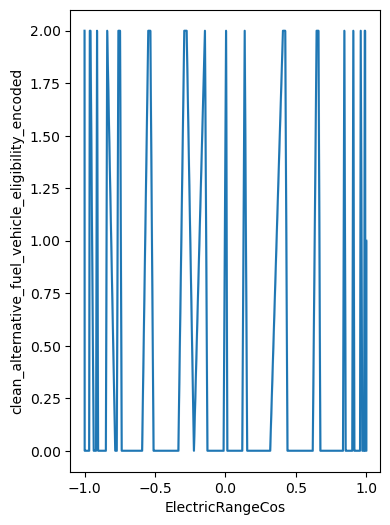

In [535]:
plt.rcParams['figure.figsize'] = [4, 6]
sns.lineplot(x='ElectricRangeCos',y='clean_alternative_fuel_vehicle_eligibility_encoded',data=df)
plt.show()

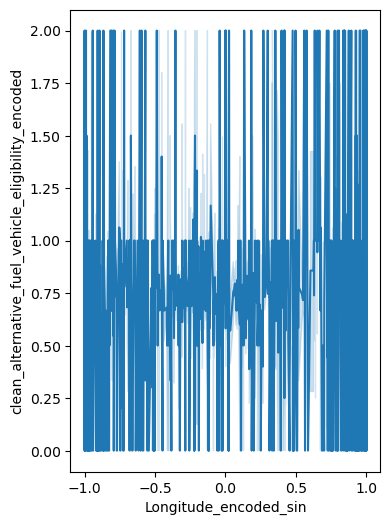

In [536]:
plt.rcParams['figure.figsize'] = [4, 6]
data = df.groupby(['Longitude_encoded_sin', 'clean_alternative_fuel_vehicle_eligibility_encoded']).size().reset_index(name='Count')
sns.lineplot(x='Longitude_encoded_sin', y='clean_alternative_fuel_vehicle_eligibility_encoded',data=df)
plt.xlabel('Longitude_encoded_sin')
plt.ylabel('clean_alternative_fuel_vehicle_eligibility_encoded')
plt.show()


D. Handle outliers, if any. Detect and manage outliers within the dataset.
For example, in the penguins dataset, while flipper lengths typically fall within the range
of [180 – 210], certain entries might exhibit values like [10, 30]. These can be
considered outliers. Possible solutions:
• Remove outliers. If there are just a few outliers is limited, you may eliminate the rows
containing these outliers.
• Impute outliers. Replace the outliers with the mean/median/mode of the feature.


-----------------------------------------------------

In [537]:
df['Legislative District'].describe()

count    166790.000000
mean         29.179247
std          14.837836
min           1.000000
25%          18.000000
50%          33.000000
75%          42.000000
max          49.000000
Name: Legislative District, dtype: float64

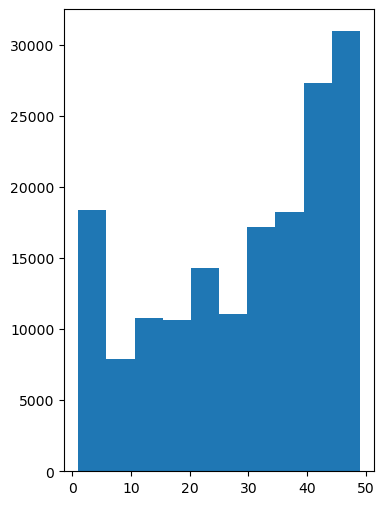

In [538]:
plt.hist(df['Legislative District'])
plt.show()

Seems like there is no outlier and the data is also in the range from 1-49.

In [539]:
df['Base MSRP'].describe()

count    166790.000000
mean       1152.005666
std        8657.691218
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

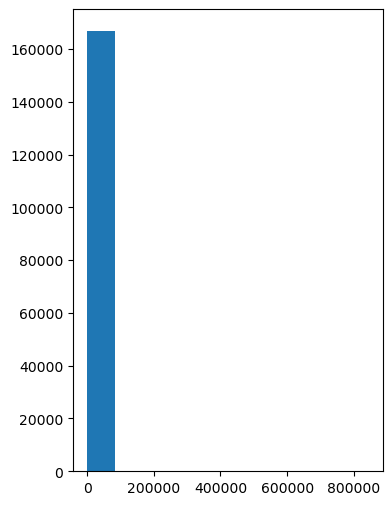

In [540]:
plt.hist(df['Base MSRP'])
plt.show()

In [541]:
df['Electric Range'].describe()

count    166790.000000
mean         61.505906
std          93.270889
min           0.000000
25%           0.000000
50%           0.000000
75%          84.000000
max         337.000000
Name: Electric Range, dtype: float64

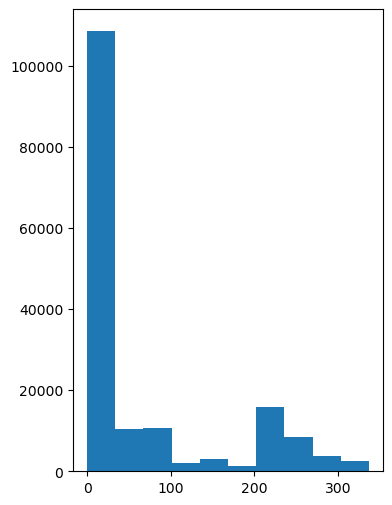

In [542]:
plt.hist(df['Electric Range'])
plt.show()

In [543]:
#2020 Census Tract
df['2020 Census Tract'].describe()

count    1.667900e+05
mean     5.297709e+10
std      1.569778e+09
min      1.001020e+09
25%      5.303301e+10
50%      5.303303e+10
75%      5.305307e+10
max      5.603300e+10
Name: 2020 Census Tract, dtype: float64

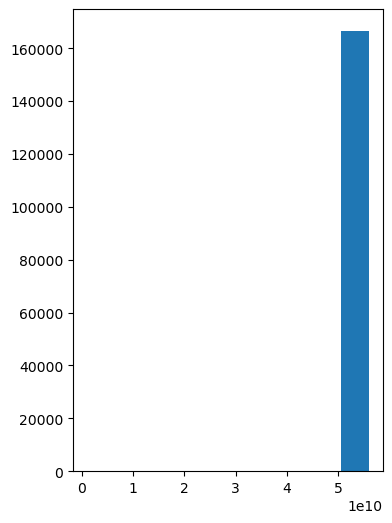

In [544]:
plt.hist(df['2020 Census Tract'])
plt.show()

In [545]:
scaler = MinMaxScaler()
scaled = scaler.fit(df[['2020 Census Tract','Electric Range','Base MSRP']]).transform(df[['2020 Census Tract','Electric Range','Base MSRP']])
df['2020_Census_Tract_sacled']=scaled[:, 0]
df['Electric_Range_scaled']=scaled[:,1]
df['Base_MSRP_scaled']=scaled[:,2]
df.head()

VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     yakima   yakima    wa      98902.0        2014    fiat   
1  5YJXCBE40H   thurston  olympia    wa      98513.0        2017   tesla   
2  3MW39FS03P       king   renton    wa      98058.0        2023     bmw   
3  7PDSGABA8P  snohomish  bothell    wa      98012.0        2023  rivian   
4  5YJ3E1EB8L       king     kent    wa      98031.0        2020   tesla   

     Model                   Electric Vehicle Type  \
0      500          battery electric vehicle (bev)   
1  MODEL X          battery electric vehicle (bev)   
2     330E  plug-in hybrid electric vehicle (phev)   
3      R1S          battery electric vehicle (bev)   
4  MODEL 3          battery electric vehicle (bev)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  ...  \
0            clean alternative fuel vehicle eligible  ...   
1            clean alternative fuel vehicle eligible  ...   
2              not eligible due to low battery range  ...   
3  eligibility unknown as battery range has not b...  ...   
4            clean alternative fuel vehicle eligible  ...   

   electric_vehicle_type_encoded  \
0                              0   
1                              0   
2                              1   
3                              0   
4                              0   

   clean_alternative_fuel_vehicle_eligibility_encoded  Longitude_encoded  \
0                                                  0         -120.524012   
1                                                  0         -122.817545   
2                                                  2         -122.129888   
3                                                  1         -122.187300   
4                                                  0         -122.201252   

   Latitude_encoded Longitude_encoded_sin LegislativeDistrictCos  \
0         46.597394             -0.910086               0.136737   
1         46.988760              0.291153              -0.416147   
2         47.445126             -0.382246               0.004426   
3         47.820245             -0.328593              -0.547729   
4         47.393181             -0.315384              -0.013277   

   ElectricRangeCos  2020_Census_Tract_sacled  Electric_Range_scaled  \
0          0.569750                  0.946286               0.258160   
1          0.487188                  0.946104               0.593472   
2          0.408082                  0.945487               0.059347   
3          1.000000                  0.945996               0.000000   
4          0.013247                  0.945487               0.955490   

   Base_MSRP_scaled  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 32 columns]

<Axes: >

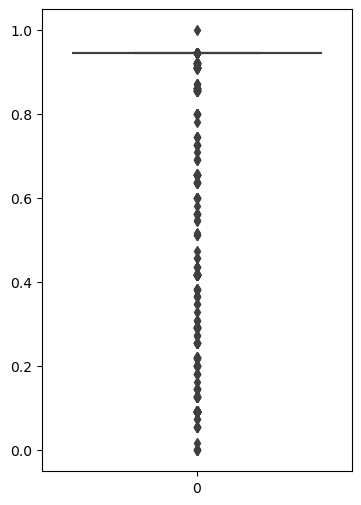

In [546]:
sns.boxplot(df['2020_Census_Tract_sacled'])

<Axes: >

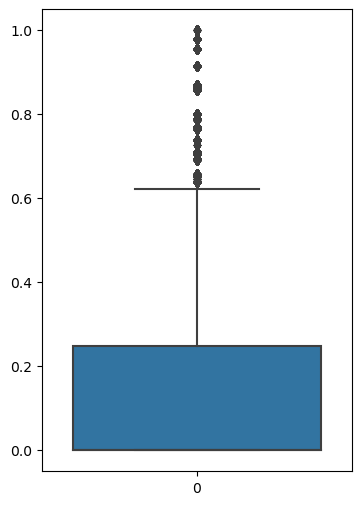

In [547]:
sns.boxplot(df['Electric_Range_scaled'])

<Axes: >

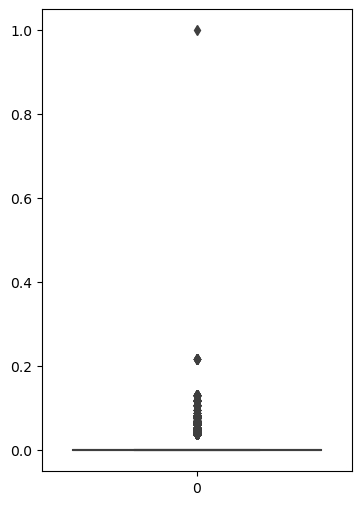

In [548]:
sns.boxplot(df['Base_MSRP_scaled'])

/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/466513030.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['2020_Census_Tract_sacled'])
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/466513030.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Base_M

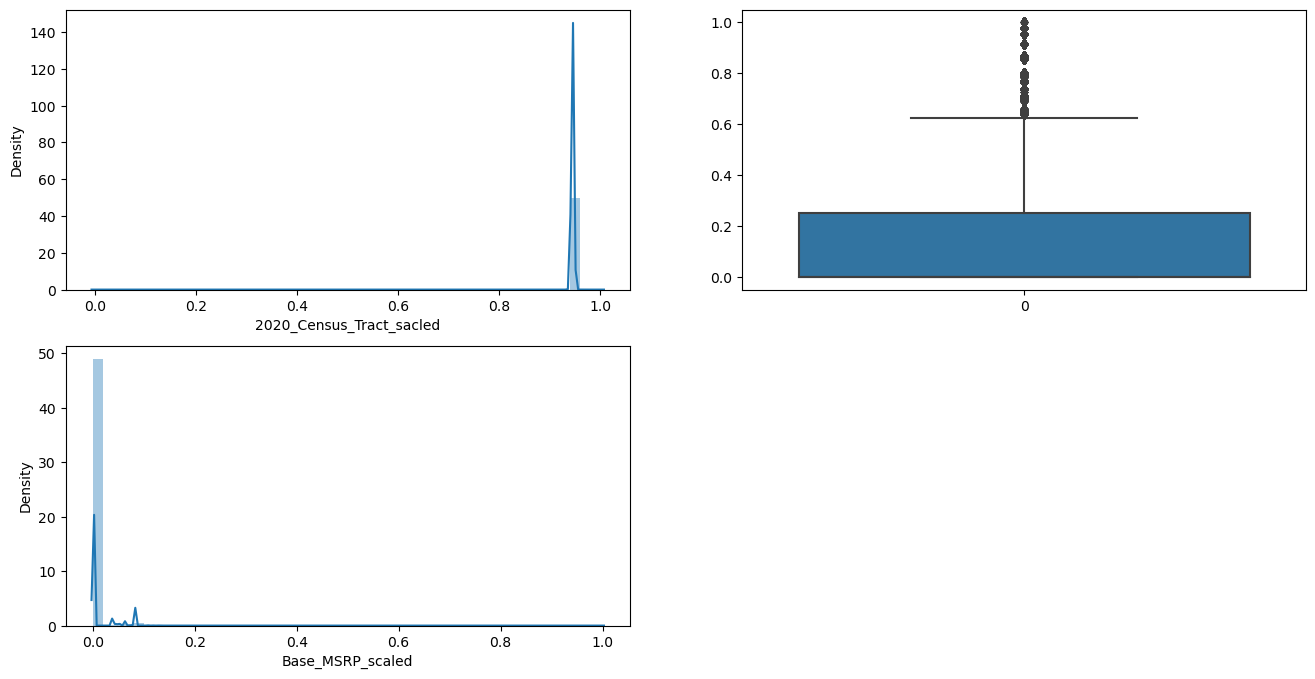

In [549]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['2020_Census_Tract_sacled'])
plt.subplot(2,2,2)
sns.boxplot(df['Electric_Range_scaled'])
plt.subplot(2,2,3)
sns.distplot(df['Base_MSRP_scaled'])
plt.show()

There are no outliers

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166790 entries, 0 to 166799
Data columns (total 32 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   VIN (1-10)                                          166790 non-null  object 
 1   County                                              166790 non-null  object 
 2   City                                                166790 non-null  object 
 3   State                                               166790 non-null  object 
 4   Postal Code                                         166790 non-null  float64
 5   Model Year                                          166790 non-null  int64  
 6   Make                                                166790 non-null  object 
 7   Model                                               166790 non-null  object 
 8   Electric Vehicle Type                               166790 non-null  

In [551]:
X=df[['Postal Code', 'Model Year','LegislativeDistrictCos',
       'Base_MSRP_scaled',   '2020_Census_Tract_sacled',
       'city_encoded', 'county_encoded',
       'electric_utility_encoded', 'make_encoded',
       'electric_vehicle_type_encoded',
       'Longitude_encoded', 'Latitude_encoded']]
y=df['clean_alternative_fuel_vehicle_eligibility_encoded']

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [553]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [554]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((116753, 12), (116753,), (25019, 12), (25019,), (25018, 12), (25018,))

In [555]:
y.nunique()

3

**References**


1. Dataset refernce - https://catalog.data.gov/dataset/electric-vehicle-population-data
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#method-1:-label-encoding
3. https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
4.  https://colab.research.google.com/drive/1xEeGMdHMVdHapshhfiw9srdw3RyVehbP
5. https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
6. https://www.w3schools.com/python/python_ml_knn.asp
7. https://www.w3schools.com/python/python_ml_decision_tree.asp
8. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
9. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# Step 2: ML Models [10 points]

Apply ML algorithms (min 3 different algorithms) to model the target variable. This can be either a classification or regression task.


Note:
• You can use any of the libraries with inbuilt ML functions
• The accuracy for any models used should be 65% or higher.

**Classification Models**

- **KNN model**


- **Logistic Model**

- **Decision Trees**

- **Neural Network**

In [556]:
X_test.shape,type(X_test),X_train.shape,type(X_train),y_test.shape,y_train.shape

((25018, 12),
 pandas.core.frame.DataFrame,
 (116753, 12),
 pandas.core.frame.DataFrame,
 (25018,),
 (116753,))

In [557]:
X.head()

Postal Code  Model Year  LegislativeDistrictCos  Base_MSRP_scaled  \
0      98902.0        2014                0.136737               0.0   
1      98513.0        2017               -0.416147               0.0   
2      98058.0        2023                0.004426               0.0   
3      98012.0        2023               -0.547729               0.0   
4      98031.0        2020               -0.013277               0.0   

   2020_Census_Tract_sacled  city_encoded  county_encoded  \
0                  0.946286           698             185   
1                  0.946104           433             167   
2                  0.945487           504              77   
3                  0.945996            57             156   
4                  0.945487           288              77   

   electric_utility_encoded  make_encoded  electric_vehicle_type_encoded  \
0                        65             9                              0   
1                        73            33                              0   
2                        74             4                              1   
3                        73            30                              0   
4                        74            33                              0   

   Longitude_encoded  Latitude_encoded  
0        -120.524012         46.597394  
1        -122.817545         46.988760  
2        -122.129888         47.445126  
3        -122.187300         47.820245  
4        -122.201252         47.393181

In [595]:
train_acc,test_acc,val_acc,time_arr=[],[],[],[]
train_loss,test_loss,val_loss=[],[],[]

In [592]:
start_time=time.time()
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_knn_train_pred=knn_clf.predict(X_train)
y_knn_test_pred=knn_clf.predict(X_test)
y_knn_val_pred=knn_clf.predict(X_val)
knn_train_accuracy = accuracy_score(y_train, y_knn_train_pred)*100
knn_test_accuracy = accuracy_score(y_test, y_knn_test_pred)*100
knn_val_accuracy = accuracy_score(y_val, y_knn_val_pred)*100
print(f"Train Dataset Accuracy of KNN Neighbour: {knn_train_accuracy}%, Test Dataset Accuracy of KNN Neighbour: {knn_test_accuracy}%, Validation Dataset Accuracy of KNN Neighbour: {knn_val_accuracy}%.", )
end_time=time.time()

Train Dataset Accuracy of KNN Neighbour: 96.33328479782104%, Test Dataset Accuracy of KNN Neighbour: 92.5373730913742%, Validation Dataset Accuracy of KNN Neighbour: 92.1339781765858%.


In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Testing and Valdation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Testing and Valdation Loss over Epochs')
plt.legend()
plt.show()

In [596]:
knn_exec_time=end_time-start_time
train_acc.append(knn_train_accuracy)
test_acc.append(knn_test_accuracy)
val_acc.append(knn_val_accuracy)
time_arr.append(knn_exec_time)

In [597]:
lr_clf = LogisticRegression(random_state=45).fit(X_train, y_train)
y_lr_train_pred=knn_clf.predict(X_train)
y_lr_test_pred = lr_clf.predict(X_test)
y_lr_val_pred = lr_clf.predict(X_val)

In [601]:
start_time=time.time()
lr_train_accuracy = accuracy_score(y_train, y_lr_train_pred)*100
lr_test_accuracy = accuracy_score(y_test, y_lr_test_pred)*100
lr_val_accuracy = accuracy_score(y_val, y_lr_val_pred)*100
print(f"Train Dataset Accuracy of Logistic: {lr_train_accuracy}%, Test Dataset Accuracy of Logistic Regression: {lr_test_accuracy}%, Validation Dataset Accuracy of Logistic Regression: {lr_val_accuracy}%.", )
end_time=time.time()

Train Dataset Accuracy of Logistic: 86.33328479782104%, Test Dataset Accuracy of Logistic Regression: 85.11631625229835%, Validation Dataset Accuracy of Logistic Regression: 85.03817099004756%.


In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Testing and Valdation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Testing and Valdation Loss over Epochs')
plt.legend()
plt.show()

In [602]:
lr_exec_time=end_time-start_time
train_acc.append(lr_train_accuracy)
test_acc.append(lr_test_accuracy)
val_acc.append(lr_val_accuracy)
time_arr.append(lr_exec_time)

In [606]:
start_time=time.time()
dt_clf = DecisionTreeClassifier(random_state=42,criterion="entropy", max_depth=3).fit(X_train,y_train)
y_dt_train_pred = dt_clf.predict(X_train)
y_dt_test_pred = dt_clf.predict(X_test)
y_dt_val_pred = dt_clf.predict(X_val)
end_time=time.time()

In [607]:
dt_train_accuracy = accuracy_score(y_train, y_dt_train_pred)*100
dt_test_accuracy = accuracy_score(y_test, y_dt_test_pred)*100
dt_test_accuracy = accuracy_score(y_test, y_dt_test_pred)*100
dt_val_accuracy = accuracy_score(y_val, y_dt_val_pred)*100
print(f"Train Dataset Accuracy of Decision Tree: {dt_train_accuracy}%,  Test Dataset Accuracy of Decision Tree: {dt_test_accuracy}%, Validation Dataset Accuracy of Decision Tree: {dt_val_accuracy}%.", )

Train Dataset Accuracy of Decision Tree: 94.12092194633115%,  Test Dataset Accuracy of Decision Tree: 94.38404348868814%, Validation Dataset Accuracy of Decision Tree: 94.6240856948719%.


In [608]:
dt_exec_time=end_time-start_time
train_acc.append(dt_train_accuracy)
test_acc.append(dt_test_accuracy)
val_acc.append(dt_val_accuracy)
time_arr.append(dt_exec_time)

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Testing and Valdation Loss over Epochs')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.plot(testing_loss, label='Testing Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Testing and Valdation Loss over Epochs')
plt.legend()
plt.show()

## References

# Step 3: Pytorch Application

from https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

**Tensors**

In [569]:
import torch
import numpy as np
import torchvision
import gc
import tqdm
from torchinfo import summary
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn, optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split

In [87]:
data = [[11, 12], [13, 14]]
x_data = torch.tensor(data)

In [88]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [89]:
x_np

tensor([[11, 12],
        [13, 14]])

In [90]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.5219, 0.5661],
        [0.9567, 0.3938]]) 



In [91]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6653, 0.7960, 0.3570],
        [0.6193, 0.3347, 0.6375]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [92]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [93]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

In [94]:
tensor = torch.ones(4, 4)
tensor[:,1] = 2
print(tensor)

tensor([[1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.]])


In [95]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1

tensor([[1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
        [1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
        [1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.],
        [1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1.]])

In [96]:
t2 = torch.stack([tensor,tensor,tensor],dim=1)
t2

tensor([[[1., 2., 1., 1.],
         [1., 2., 1., 1.],
         [1., 2., 1., 1.]],

        [[1., 2., 1., 1.],
         [1., 2., 1., 1.],
         [1., 2., 1., 1.]],

        [[1., 2., 1., 1.],
         [1., 2., 1., 1.],
         [1., 2., 1., 1.]],

        [[1., 2., 1., 1.],
         [1., 2., 1., 1.],
         [1., 2., 1., 1.]]])

In [97]:
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.]])


In [98]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.]]) 

tensor @ tensor.T 
 tensor([[7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.],
        [7., 7., 7., 7.]])


In [99]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.],
        [1., 2., 1., 1.]]) 

tensor([[6., 7., 6., 6.],
        [6., 7., 6., 6.],
        [6., 7., 6., 6.],
        [6., 7., 6., 6.]])


In [100]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [101]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


**TORCH.AUTOGRAD**

In [102]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [103]:
prediction = model(data)
print(f"The prediction of the ResNet18 model is {prediction}%")

The prediction of the ResNet18 model is tensor([[-0.6466, -0.5835, -0.6583, -1.6051, -0.6562, -0.1081, -0.5220,  0.5120,
          0.6024, -0.8501, -0.9838, -0.9612, -0.2968, -0.8256, -0.9503, -0.6443,
         -1.1249, -0.1525, -0.6591, -0.5396, -1.4003, -0.5949, -1.0205,  0.2740,
         -0.8937, -1.4022, -1.0146, -1.3532, -1.0168, -0.3921, -0.9288, -0.9407,
         -0.4400, -0.4670, -0.2606, -0.2873,  0.6837, -0.7273, -0.6460, -0.2705,
         -0.9361, -0.9797, -1.2766, -0.2429, -0.6533, -0.7467, -1.0736, -0.4687,
         -1.3980, -1.1641, -0.5103,  0.6590, -0.3310, -0.6695, -0.1129, -1.4345,
         -0.2770, -1.5426, -0.5553, -0.5874,  0.6215,  0.0807, -0.0890,  0.2668,
         -0.9429, -0.2695, -0.3214, -0.3044, -0.7771, -1.1974, -1.8721,  0.1185,
         -1.6674, -0.3423, -1.3139, -1.4311,  0.0373, -0.6569,  0.3079, -0.1550,
         -0.4476, -1.5555, -0.1047, -0.6608, -0.5497, -0.1290,  0.0395,  0.2986,
         -0.3227, -0.9600, -1.4920, -1.0484, -2.2706, -0.2326, -0.100

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [104]:
loss = (prediction - labels).sum()
loss.backward()

In [105]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [106]:
optim.step()

In [107]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
print(a)
print(b)

tensor([2., 3.], requires_grad=True)
tensor([6., 4.], requires_grad=True)


In [108]:
Q = 3*a**3 - b**2

In [109]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [110]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [111]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [112]:
for param in model.parameters():
    param.requires_grad = False

In [113]:
model.fc = nn.Linear(512, 10)

In [114]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Neural Network**

In [425]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [116]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [117]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
out

tensor([[ 0.0375,  0.0915, -0.0229,  0.1327,  0.1348, -0.0467, -0.0436, -0.0651,
          0.0387,  0.0180]], grad_fn=<AddmmBackward0>)

In [118]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [119]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(1.3002, grad_fn=<MseLossBackward0>)

In [120]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [121]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0214,  0.0005, -0.0013,  0.0046,  0.0005, -0.0147])


In [122]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

**TRAINING A CLASSIFIER**

In [123]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

validset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
validloader = torch.utils.data.DataLoader(validset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


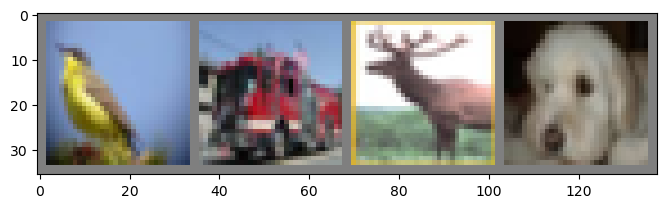

bird  truck deer  dog  


In [124]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [125]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [126]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [127]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [128]:
net.to(device) 
net.train()
for epoch in range(1):
    running_loss,correct,total  = 0.0,0,0
    for i, (image,labels) in enumerate(trainloader):
        inputs,labels=image.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f} accuracy: {correct/total*100}%')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.180 accuracy: 16.8875%
[1,  4000] loss: 1.828 accuracy: 24.8%
[1,  6000] loss: 1.681 accuracy: 29.175%
[1,  8000] loss: 1.563 accuracy: 32.64375%
[1, 10000] loss: 1.518 accuracy: 34.89%
[1, 12000] loss: 1.477 accuracy: 36.795833333333334%
Finished Training


In [129]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in validloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 valid images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


In [130]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in testloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


##Hyperparameter 1



- Number of layers - 2
- Number of nodes per layer - 3
- Activation function - softmax
- Optimizer - SGD
- Learning rate - 0.001
- epochs - 2
- momentum - 0.9


In [131]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.softmax(self.conv1(x)))
        x = self.pool(F.softmax(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.softmax(self.fc1(x))
        x = F.softmax(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net.to(device) 
net.train()
for epoch in range(1):
    running_loss,correct,total  = 0.0,0,0
    for i, (image,labels) in enumerate(trainloader, 0):
        inputs,labels=image.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f} accuracy: {correct/total*100}%')
            running_loss = 0.0

    print('Finished Training')

    

/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.pool(F.softmax(self.conv1(x)))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.pool(F.softmax(self.conv2(x)))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc1(x))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,  2000] loss: 2.304 accuracy: 10.274999999999999%
[1,  4000] loss: 2.303 accuracy: 10.3125%
[1,  6000] loss: 2.303 accuracy: 10.174999999999999%
[1,  8000] loss: 2.303 accuracy: 10.259375%
[1, 10000] loss: 2.303 accuracy: 10.2625%
[1, 12000] loss: 2.303 accuracy: 10.154166666666667%
Finished Training


In [134]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in validloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 valid images: {100 * correct // total} %')
    
    

/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.pool(F.softmax(self.conv1(x)))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.pool(F.softmax(self.conv2(x)))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc1(x))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Accuracy of the network on the 10000 valid images: 10 %


In [135]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in testloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.pool(F.softmax(self.conv1(x)))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.pool(F.softmax(self.conv2(x)))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc1(x))
/var/folders/3q/gmr6b7zs7ns8f20xc16hk7t40000gn/T/ipykernel_94469/3628239435.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Accuracy of the network on the 10000 test images: 10 %



Hyperparameter 2

- Number of layers - 2
- Number of nodes per layer - 3
- Activation function - relu
- Optimizer - Adam
- epochs - 2
- learning rate - 0.001

In [136]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


net.to(device) 
net.train()
for epoch in range(2):
    running_loss,correct,total  = 0.0,0,0
    for i, (image,labels) in enumerate(trainloader, 0):
        inputs,labels=image.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f} accuracy: {correct/total*100}%')
            running_loss = 0.0

    print('Finished Training')

    

[1,  2000] loss: 1.897 accuracy: 28.7375%
[1,  4000] loss: 1.644 accuracy: 33.94375%
[1,  6000] loss: 1.549 accuracy: 36.8%
[1,  8000] loss: 1.473 accuracy: 39.28125%
[1, 10000] loss: 1.444 accuracy: 41.0225%
[1, 12000] loss: 1.402 accuracy: 42.364583333333336%
Finished Training
[2,  2000] loss: 1.332 accuracy: 53.0%
[2,  4000] loss: 1.321 accuracy: 52.675000000000004%
[2,  6000] loss: 1.304 accuracy: 53.1375%
[2,  8000] loss: 1.281 accuracy: 53.512499999999996%
[2, 10000] loss: 1.273 accuracy: 53.7775%
[2, 12000] loss: 1.283 accuracy: 53.84791666666666%
Finished Training


In [137]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in validloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 valid images: {100 * correct // total} %')

Accuracy of the network on the 10000 valid images: 56 %


In [138]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in testloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %



Hyperparameter 3

- Number of layers - 2
- Number of nodes per layer - 3
- Activation function - relu
- Optimizer - SGD
- epochs - 2
- momentum - 0.9
- learning rate - 0.5

In [139]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5, momentum=0.9)

net.to(device) 
net.train()
for epoch in range(2):
    running_loss,correct,total  = 0.0,0,0
    for i, (image,labels) in enumerate(trainloader, 0):
        inputs,labels=image.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        del inputs, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f} accuracy: {correct/total*100}%')
            running_loss = 0.0

    print('Finished Training')



[1,  2000] loss: 247200595687769120.000 accuracy: 9.825000000000001%
[1,  4000] loss: 2.609 accuracy: 9.893749999999999%
[1,  6000] loss: 2.617 accuracy: 9.966666666666667%
[1,  8000] loss: 2.588 accuracy: 10.0%
[1, 10000] loss: 2.605 accuracy: 10.012500000000001%
[1, 12000] loss: 2.605 accuracy: 9.997916666666667%
Finished Training
[2,  2000] loss: 2.605 accuracy: 9.887500000000001%
[2,  4000] loss: 2.625 accuracy: 9.80625%
[2,  6000] loss: 2.585 accuracy: 9.904166666666667%
[2,  8000] loss: 2.617 accuracy: 9.9625%
[2, 10000] loss: 2.612 accuracy: 9.977500000000001%
[2, 12000] loss: 2.603 accuracy: 9.941666666666666%
Finished Training


In [140]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in validloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 valid images: {100 * correct // total} %')

Accuracy of the network on the 10000 valid images: 10 %


In [143]:
correct = 0
total = 0

with torch.no_grad():
    for image,labels in testloader:
            inputs,labels = image.to(device),labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del inputs, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %


# NN Model for Electric Vehicle classification (To classify Clean Alternative Fuel Vehicle (CAFV) Eligibility of various electric vehicle in Washington State (United States of America))

input- 11 features, 1 bias
hidden - 6
output - 3 classes

In [609]:
df_nn=df[['Postal Code', 'Model Year','LegislativeDistrictCos',
       'Base_MSRP_scaled',   '2020_Census_Tract_sacled',
       'city_encoded', 'county_encoded',
       'electric_utility_encoded', 'make_encoded',
       'electric_vehicle_type_encoded',
       'Longitude_encoded', 'Latitude_encoded',
       'clean_alternative_fuel_vehicle_eligibility_encoded']]

In [610]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        r = self.dataframe.iloc[idx]
        X = torch.tensor(r[['Postal Code', 'Model Year','LegislativeDistrictCos',
       'Base_MSRP_scaled',   '2020_Census_Tract_sacled',
       'city_encoded', 'county_encoded',
       'electric_utility_encoded', 'make_encoded',
       'electric_vehicle_type_encoded',
       'Longitude_encoded', 'Latitude_encoded']], dtype=torch.float32)
        y = torch.tensor(r['clean_alternative_fuel_vehicle_eligibility_encoded'], dtype=torch.long)
        return X,y


df_nn = pd.DataFrame(df)
df_nn = CustomDataset(df_nn)
dataloader = DataLoader(df_nn, 1, shuffle=True)

In [612]:
batch_size = 1
train_size = int(0.7 * len(df_nn))
test_size = int(0.15 * len(df_nn))
val_size = len(df_nn) - train_size - test_size
nn_train, nn_test, nn_val = random_split(df_nn, [train_size, test_size, val_size])
train_loader = DataLoader(nn_train, batch_size, shuffle=True)
test_loader = DataLoader(nn_test, batch_size)
val_loader = DataLoader(nn_val, batch_size)

In [618]:
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(12, 15)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(15, 3)
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x


snet = ShallowNN()

In [619]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
snet = snet.to(device)
summary(snet)

Layer (type:depth-idx)                   Param #
ShallowNN                                --
├─Linear: 1-1                            195
├─ReLU: 1-2                              --
├─Linear: 1-3                            48
Total params: 243
Trainable params: 243
Non-trainable params: 0

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(snet.parameters(), lr=0.01, momentum=0.9)

4.723213732495804e-06 116752
9.446427464991608e-06 116752
2.2734804963418617e-05 116752
3.6023182461845624e-05 116752
4.0746396194341426e-05 116752
4.5469609926837234e-05 116752
5.875798742526424e-05 116752
7.204636492369125e-05 116752
8.533474242211826e-05 116752
9.862311992054526e-05 116752
0.00011191149741897227 116752
0.0001251998749173993 116752
0.00013848825241582628 116752
0.00014321146614832209 116752
0.0001479346798808179 116752
0.00015265789361331372 116752
0.0001659462711117407 116752
0.0001706694848442365 116752
0.0001753926985767323 116752
0.00018868107607515933 116752
0.00020196945357358633 116752
0.00021525783107201335 116752
0.00022854620857044034 116752
0.00024183458606886736 116752
0.00025512296356729436 116752
0.0002598461772997902 116752
0.00026456939103228596 116752
0.000277857768530713 116752
0.00029114614602914 116752
0.000304434523527567 116752
0.000317722901025994 116752
0.000331011278524421 116752
0.00033573449225691684 116752
0.0003404577059894126 116752
0.00

0.0028630311640301877 116752
0.0028677543777626837 116752
0.0028810427552611105 116752
0.0028943311327595377 116752
0.0029076195102579645 116752
0.0029123427239904605 116752
0.0029256311014888873 116752
0.0029389194789873146 116752
0.00294364269271981 116752
0.002948365906452306 116752
0.002961654283950733 116752
0.002966377497683229 116752
0.0029711007114157245 116752
0.0029758239251482205 116752
0.002980547138880716 116752
0.002985270352613212 116752
0.0029985587301116392 116752
0.003011847107610066 116752
0.003025135485108493 116752
0.003029858698840989 116752
0.0030431470763394156 116752
0.0030478702900719116 116752
0.0030525935038044076 116752
0.0030658818813028344 116752
0.0030791702588012617 116752
0.0030838934725337572 116752
0.0030971818500321845 116752
0.0031104702275306113 116752
0.0031237586050290385 116752
0.0031370469825274653 116752
0.0031417701962599613 116752
0.003155058573758388 116752
0.0031683469512568153 116752
0.003173070164989311 116752
0.003186358542487738 11675

0.0057839390517865795 116752
0.0057886622655190755 116752
0.005801950643017502 116752
0.005806673856749998 116752
0.005819962234248425 116752
0.005833250611746852 116752
0.005837973825479348 116752
0.005842697039211844 116752
0.005847420252944339 116752
0.005860708630442767 116752
0.0058739970079411934 116752
0.00588728538543962 116752
0.005900573762938047 116752
0.005913862140436475 116752
0.0059271505179349015 116752
0.005940438895433328 116752
0.005945162109165824 116752
0.005958450486664251 116752
0.005971738864162678 116752
0.005976462077895174 116752
0.00598118529162767 116752
0.005994473669126097 116752
0.0060077620466245235 116752
0.006021050424122951 116752
0.006034338801621378 116752
0.006039062015353874 116752
0.006043785229086369 116752
0.006048508442818865 116752
0.006053231656551361 116752
0.006057954870283857 116752
0.006071243247782284 116752
0.00607596646151478 116752
0.006089254839013207 116752
0.0061025432165116335 116752
0.006115831594010061 116752
0.006120554807742

0.008654337220646444 116752
0.00866762559814487 116752
0.008680913975643297 116752
0.008694202353141726 116752
0.008707490730640153 116752
0.00872077910813858 116752
0.008734067485637006 116752
0.008738790699369501 116752
0.008752079076867928 116752
0.008765367454366357 116752
0.008778655831864783 116752
0.00879194420936321 116752
0.008805232586861637 116752
0.008809955800594132 116752
0.008823244178092559 116752
0.008836532555590988 116752
0.008841255769323483 116752
0.00885454414682191 116752
0.008867832524320336 116752
0.008872555738052833 116752
0.00888584411555126 116752
0.008890567329283755 116752
0.00889529054301625 116752
0.008900013756748747 116752
0.008913302134247174 116752
0.008918025347979669 116752
0.008931313725478097 116752
0.008944602102976524 116752
0.00894932531670902 116752
0.008954048530441515 116752
0.008967336907939943 116752
0.008972060121672438 116752
0.008985348499170865 116752
0.008998636876669292 116752
0.009011925254167719 116752
0.009016648467900215 116752

0.011615110240898117 116752
0.011628398618396544 116752
0.011633121832129039 116752
0.011637845045861536 116752
0.011651133423359963 116752
0.01166442180085839 116752
0.011677710178356816 116752
0.011682433392089311 116752
0.01169572176958774 116752
0.011700444983320235 116752
0.01170516819705273 116752
0.011718456574551157 116752
0.011731744952049586 116752
0.011745033329548012 116752
0.01175832170704644 116752
0.011771610084544866 116752
0.011776333298277361 116752
0.011781056512009858 116752
0.011794344889508285 116752
0.011807633267006712 116752
0.011820921644505138 116752
0.011834210022003565 116752
0.011838933235736062 116752
0.011852221613234489 116752
0.011865509990732916 116752
0.01187023320446541 116752
0.011874956418197908 116752
0.011888244795696334 116752
0.01189296800942883 116752
0.011906256386927256 116752
0.011919544764425683 116752
0.01193283314192411 116752
0.011946121519422538 116752
0.011950844733155034 116752
0.011955567946887529 116752
0.011968856324385956 116752

0.01443884064089489 116752
0.014443563854627386 116752
0.014456852232125813 116752
0.01446157544585831 116752
0.014474863823356736 116752
0.014488152200855163 116752
0.01450144057835359 116752
0.014506163792086085 116752
0.014519452169584512 116752
0.014524175383317009 116752
0.014537463760815435 116752
0.01454218697454793 116752
0.014555475352046357 116752
0.014560198565778854 116752
0.01456492177951135 116752
0.014578210157009776 116752
0.014591498534508203 116752
0.014604786912006631 116752
0.014609510125739127 116752
0.014614233339471622 116752
0.014618956553204119 116752
0.014623679766936614 116752
0.01463696814443504 116752
0.014650256521933467 116752
0.014663544899431894 116752
0.014676833276930323 116752
0.014681556490662818 116752
0.014694844868161245 116752
0.014708133245659671 116752
0.014721421623158098 116752
0.014726144836890595 116752
0.01473086805062309 116752
0.014735591264355585 116752
0.014748879641854014 116752
0.014753602855586509 116752
0.014758326069319004 116752

0.017370957483514395 116752
0.01737568069724689 116752
0.017388969074745318 116752
0.017393692288477813 116752
0.01740698066597624 116752
0.017420269043474667 116752
0.017433557420973092 116752
0.01744684579847152 116752
0.01746013417596995 116752
0.017464857389702444 116752
0.01747814576720087 116752
0.017491434144699298 116752
0.017504722522197723 116752
0.01751801089969615 116752
0.017522734113428647 116752
0.017536022490927075 116752
0.0175493108684255 116752
0.01756259924592393 116752
0.017567322459656424 116752
0.017580610837154852 116752
0.017593899214653277 116752
0.017598622428385773 116752
0.01760334564211827 116752
0.017616634019616696 116752
0.01762135723334919 116752
0.01763464561084762 116752
0.017647933988346045 116752
0.017652657202078544 116752
0.01766594557957697 116752
0.017679233957075397 116752
0.017692522334573822 116752
0.01770581071207225 116752
0.017719099089570676 116752
0.017723822303303174 116752
0.0177371106808016 116752
0.017741833894534095 116752
0.017746

0.02022126463850802 116752
0.02023455301600645 116752
0.020239276229738944 116752
0.02024399944347144 116752
0.020257287820969867 116752
0.020262011034702362 116752
0.020266734248434858 116752
0.020280022625933286 116752
0.02029331100343171 116752
0.02030659938093014 116752
0.020319887758428568 116752
0.020324610972161063 116752
0.02033789934965949 116752
0.020351187727157917 116752
0.020355910940890412 116752
0.02036919931838884 116752
0.020373922532121336 116752
0.02038721090961976 116752
0.02039193412335226 116752
0.020405222500850684 116752
0.020418510878349113 116752
0.020423234092081608 116752
0.020436522469580033 116752
0.020449810847078462 116752
0.020454534060810957 116752
0.020459257274543452 116752
0.02047254565204188 116752
0.020477268865774376 116752
0.020490557243272804 116752
0.02050384562077123 116752
0.020517133998269658 116752
0.020530422375768083 116752
0.02054371075326651 116752
0.020556999130764936 116752
0.020570287508263365 116752
0.020583575885761794 116752
0.02

0.023161946644893457 116752
0.023175235022391882 116752
0.02318852339989031 116752
0.023193246613622806 116752
0.0231979698273553 116752
0.02321125820485373 116752
0.023215981418586225 116752
0.023229269796084653 116752
0.02324255817358308 116752
0.023255846551081507 116752
0.023269134928579932 116752
0.02328242330607836 116752
0.023295711683576786 116752
0.023309000061075214 116752
0.02332228843857364 116752
0.023335576816072068 116752
0.023340300029804563 116752
0.023345023243537058 116752
0.023349746457269557 116752
0.023354469671002052 116752
0.023367758048500477 116752
0.023381046425998905 116752
0.023394334803497334 116752
0.02340762318099576 116752
0.023420911558494188 116752
0.023425634772226683 116752
0.023438923149725108 116752
0.023452211527223536 116752
0.023465499904721965 116752
0.02347878828222039 116752
0.02349207665971882 116752
0.023496799873451314 116752
0.02350152308718381 116752
0.023506246300916304 116752
0.023519534678414732 116752
0.023532823055913157 116752
0.0

0.026059802832449235 116752
0.026073091209947663 116752
0.026086379587446088 116752
0.026099667964944517 116752
0.026112956342442945 116752
0.02612624471994137 116752
0.0261395330974398 116752
0.026144256311172294 116752
0.02615754468867072 116752
0.026170833066169148 116752
0.026184121443667576 116752
0.02618884465740007 116752
0.026202133034898496 116752
0.026215421412396925 116752
0.02622014462612942 116752
0.026224867839861915 116752
0.02622959105359441 116752
0.02624287943109284 116752
0.026256167808591267 116752
0.026269456186089692 116752
0.026274179399822187 116752
0.026287467777320616 116752
0.02629219099105311 116752
0.02630547936855154 116752
0.026310202582284035 116752
0.02631492579601653 116752
0.02632821417351496 116752
0.026341502551013384 116752
0.026354790928511812 116752
0.026359514142244307 116752
0.026364237355976802 116752
0.026368960569709297 116752
0.026373683783441793 116752
0.02638697216094022 116752
0.02640026053843865 116752
0.026413548915937075 116752
0.0264

0.02906044098519619 116752
0.029073729362694617 116752
0.029087017740193042 116752
0.02910030611769147 116752
0.029113594495189896 116752
0.029118317708922394 116752
0.02912304092265489 116752
0.029136329300153314 116752
0.029149617677651743 116752
0.02916290605515017 116752
0.029167629268882667 116752
0.02918091764638109 116752
0.02919420602387952 116752
0.029198929237612015 116752
0.029212217615110444 116752
0.02922550599260887 116752
0.029238794370107297 116752
0.029243517583839793 116752
0.029256805961338218 116752
0.029261529175070716 116752
0.02927481755256914 116752
0.02928810593006757 116752
0.029292829143800065 116752
0.029306117521298494 116752
0.02931940589879692 116752
0.029324129112529414 116752
0.029337417490027842 116752
0.029350705867526267 116752
0.029363994245024696 116752
0.029377282622523124 116752
0.02939057100002155 116752
0.029395294213754045 116752
0.029400017427486543 116752
0.02941330580498497 116752
0.029418029018717463 116752
0.02942275223244996 116752
0.029

0.031924917781387306 116752
0.0319296409951198 116752
0.031934364208852296 116752
0.031947652586350725 116752
0.031960940963849147 116752
0.03196566417758165 116752
0.031970387391314144 116752
0.031983675768812565 116752
0.03198839898254507 116752
0.03200168736004349 116752
0.032006410573775984 116752
0.03201113378750848 116752
0.03202442216500691 116752
0.032037710542505336 116752
0.03204243375623783 116752
0.03204715696997033 116752
0.03205188018370282 116752
0.03205660339743532 116752
0.032069891774933745 116752
0.03207461498866624 116752
0.03208790336616467 116752
0.0321011917436631 116752
0.03210591495739559 116752
0.03211920333489402 116752
0.032123926548626516 116752
0.032137214926124945 116752
0.032150503303623366 116752
0.032163791681121795 116752
0.032177080058620224 116752
0.03218180327235272 116752
0.032186526486085214 116752
0.03219981486358364 116752
0.03220453807731614 116752
0.032217826454814566 116752
0.03222254966854706 116752
0.03223583804604549 116752
0.032240561259

0.034893057806468654 116752
0.03490634618396708 116752
0.03491963456146551 116752
0.034924357775198006 116752
0.03493764615269643 116752
0.03494236936642892 116752
0.03495565774392735 116752
0.03496894612142578 116752
0.03498223449892421 116752
0.03499552287642264 116752
0.03500881125392106 116752
0.035013534467653554 116752
0.03502682284515198 116752
0.03504011122265041 116752
0.035044834436382906 116752
0.035058122813881334 116752
0.03506284602761383 116752
0.03507613440511226 116752
0.03508085761884475 116752
0.03508558083257725 116752
0.03509886921007568 116752
0.03510359242380817 116752
0.03510831563754067 116752
0.035121604015039096 116752
0.03512632722877159 116752
0.035131050442504086 116752
0.035144338820002514 116752
0.03515762719750094 116752
0.035170915574999365 116752
0.03517563878873186 116752
0.03518892716623029 116752
0.03519365037996278 116752
0.03519837359369528 116752
0.035203096807427774 116752
0.0352163851849262 116752
0.0352211083986587 116752
0.035234396776157126

0.03796782174677461 116752
0.03798111012427304 116752
0.03798583333800554 116752
0.03799055655173803 116752
0.03799527976547053 116752
0.03800000297920302 116752
0.03801329135670145 116752
0.038018014570433946 116752
0.038031302947932374 116752
0.0380445913254308 116752
0.038057879702929225 116752
0.03806260291666172 116752
0.03806732613039422 116752
0.03807204934412672 116752
0.03808533772162514 116752
0.03809862609912357 116752
0.038111914476621996 116752
0.038125202854120424 116752
0.03813849123161885 116752
0.03814321444535135 116752
0.03815650282284977 116752
0.03816122603658227 116752
0.03817451441408069 116752
0.03818780279157912 116752
0.03819252600531162 116752
0.038205814382810045 116752
0.038219102760308474 116752
0.03822382597404097 116752
0.0382371143515394 116752
0.03824183756527189 116752
0.03825512594277032 116752
0.03826841432026874 116752
0.03827313753400124 116752
0.038286425911499666 116752
0.03829114912523216 116752
0.03829587233896466 116752
0.03830059555269715 11

0.04094540819932095 116752
0.04095869657681938 116752
0.040963419790551875 116752
0.04096814300428437 116752
0.04097286621801687 116752
0.040986154595515294 116752
0.04099087780924779 116752
0.040995601022980284 116752
0.04100888940047871 116752
0.04102217777797714 116752
0.04103546615547557 116752
0.041048754532974 116752
0.04106204291047242 116752
0.041066766124204915 116752
0.04107148933793742 116752
0.04108477771543584 116752
0.04109806609293427 116752
0.04110278930666676 116752
0.04110751252039926 116752
0.041120800897897686 116752
0.041134089275396114 116752
0.04113881248912861 116752
0.04115210086662704 116752
0.04115682408035953 116752
0.04117011245785796 116752
0.04117483567159046 116752
0.041188124049088885 116752
0.04119284726282138 116752
0.0412061356403198 116752
0.04121942401781823 116752
0.04123271239531666 116752
0.04124600077281509 116752
0.041259289150313516 116752
0.04126401236404601 116752
0.041268735577778506 116752
0.041273458791511 116752
0.04128674716900943 1167

0.04395725530693102 116752
0.04396197852066352 116752
0.04397526689816195 116752
0.04397999011189444 116752
0.04399327848939286 116752
0.04400656686689129 116752
0.04401985524438972 116752
0.04403314362188815 116752
0.044037866835620644 116752
0.04404259004935314 116752
0.04405587842685157 116752
0.04406060164058406 116752
0.04407389001808249 116752
0.044078613231814986 116752
0.04409190160931341 116752
0.04409662482304591 116752
0.04410991320054433 116752
0.04412320157804276 116752
0.04413648995554119 116752
0.044141213169273684 116752
0.04415450154677211 116752
0.04416778992427054 116752
0.04418107830176896 116752
0.04419436667926739 116752
0.04420765505676582 116752
0.044212378270498315 116752
0.04422566664799674 116752
0.04423895502549517 116752
0.044252243402993593 116752
0.04426553178049202 116752
0.04427882015799045 116752
0.04429210853548888 116752
0.044296831749221374 116752
0.04430155496295387 116752
0.0443148433404523 116752
0.04432813171795072 116752
0.04434142009544915 116

0.046930118545744866 116752
0.046943406923243294 116752
0.04694813013697579 116752
0.04696141851447422 116752
0.04696614172820671 116752
0.04697086494193921 116752
0.04698415331943764 116752
0.04699744169693606 116752
0.04701073007443449 116752
0.04701545328816698 116752
0.04702874166566541 116752
0.04704203004316384 116752
0.04705531842066227 116752
0.04706860679816069 116752
0.047073330011893184 116752
0.04708661838939161 116752
0.04709990676689004 116752
0.04710462998062254 116752
0.047117918358120965 116752
0.047131206735619394 116752
0.047144495113117815 116752
0.047157783490616244 116752
0.04716250670434874 116752
0.04717579508184717 116752
0.047189083459345596 116752
0.047202371836844025 116752
0.047215660214342446 116752
0.047228948591840875 116752
0.04723367180557337 116752
0.047238395019305865 116752
0.04725168339680429 116752
0.04725640661053679 116752
0.04726969498803522 116752
0.04727441820176771 116752
0.04727914141550021 116752
0.0472838646292327 116752
0.047288587842965

0.04998391020848553 116752
0.049997198585983955 116752
0.050010486963482384 116752
0.050023775340980806 116752
0.050037063718479234 116752
0.05004178693221173 116752
0.050046510145944224 116752
0.05005123335967672 116752
0.05005595657340922 116752
0.05006924495090764 116752
0.05008253332840607 116752
0.0500958217059045 116752
0.050100544919636995 116752
0.05010526813336949 116752
0.050109991347101986 116752
0.05011471456083448 116752
0.050119437774566976 116752
0.050132726152065404 116752
0.05014601452956383 116752
0.05015930290706226 116752
0.05017259128456069 116752
0.050177314498293185 116752
0.05018203771202568 116752
0.05019532608952411 116752
0.05020861446702253 116752
0.050213337680755026 116752
0.050226626058253454 116752
0.05023991443575188 116752
0.05025320281325031 116752
0.050257926026982806 116752
0.050271214404481235 116752
0.05027593761821373 116752
0.05028922599571215 116752
0.05030251437321058 116752
0.05031580275070901 116752
0.050320525964441504 116752
0.050325249178

0.052857833432141635 116752
0.05287112180964006 116752
0.052884410187138485 116752
0.052897698564636914 116752
0.05291098694213534 116752
0.05292427531963377 116752
0.052928998533366266 116752
0.052942286910864694 116752
0.05294701012459719 116752
0.05296029850209561 116752
0.05296502171582811 116752
0.05296974492956061 116752
0.05298303330705903 116752
0.05299632168455746 116752
0.05300961006205589 116752
0.05301433327578838 116752
0.05302762165328681 116752
0.053032344867019306 116752
0.053045633244517734 116752
0.05305035645825023 116752
0.05306364483574866 116752
0.05307693321324708 116752
0.05309022159074551 116752
0.05310350996824394 116752
0.053116798345742365 116752
0.05312152155947486 116752
0.05313480993697329 116752
0.05314809831447171 116752
0.05316138669197014 116752
0.053166109905702634 116752
0.05317939828320106 116752
0.05319268666069949 116752
0.053197409874431986 116752
0.05320213308816448 116752
0.053206856301896976 116752
0.05321157951562947 116752
0.053224867893127

0.055921071522347286 116752
0.055934359899845715 116752
0.05593908311357821 116752
0.05595237149107664 116752
0.05596565986857507 116752
0.05597894824607349 116752
0.05599223662357192 116752
0.05599695983730441 116752
0.05600168305103691 116752
0.0560064062647694 116752
0.056011129478501905 116752
0.0560158526922344 116752
0.05602914106973282 116752
0.05604242944723125 116752
0.05605571782472968 116752
0.05606900620222811 116752
0.0560737294159606 116752
0.0560784526296931 116752
0.056091741007191526 116752
0.05610502938468995 116752
0.056118317762188376 116752
0.056131606139686804 116752
0.0561363293534193 116752
0.056141052567151795 116752
0.05615434094465022 116752
0.05615906415838272 116752
0.05617235253588115 116752
0.056185640913379575 116752
0.056198929290878 116752
0.0562036525046105 116752
0.05621694088210892 116752
0.056221664095841416 116752
0.05622638730957392 116752
0.05623967568707234 116752
0.05625296406457077 116752
0.056266252442069196 116752
0.05627097565580169 116752

0.05885583215606397 116752
0.0588691205335624 116752
0.05888240891106083 116752
0.05889569728855926 116752
0.05890898566605768 116752
0.05891370887979017 116752
0.0589269972572886 116752
0.05894028563478703 116752
0.05895357401228546 116752
0.05896686238978388 116752
0.05898015076728231 116752
0.058984873981014804 116752
0.0589895971947473 116752
0.0589943204084798 116752
0.05900760878597822 116752
0.05902089716347665 116752
0.05902562037720915 116752
0.059038908754707575 116752
0.05904363196844007 116752
0.059048355182172566 116752
0.059061643559670994 116752
0.05907493193716942 116752
0.05907965515090192 116752
0.059092943528400346 116752
0.05909766674213284 116752
0.05911095511963127 116752
0.059115678333363765 116752
0.05912896671086219 116752
0.059142255088360615 116752
0.05914697830209311 116752
0.05916026667959154 116752
0.05917355505708997 116752
0.059186843434588396 116752
0.05919156664832089 116752
0.05920485502581931 116752
0.059209578239551815 116752
0.05921430145328431 116

0.06196101480140022 116752
0.061965738015132714 116752
0.06197902639263114 116752
0.06199231477012957 116752
0.061997037983862066 116752
0.062010326361360495 116752
0.06202361473885892 116752
0.06202833795259142 116752
0.06204162633008985 116752
0.06205491470758827 116752
0.062059637921320764 116752
0.06207292629881919 116752
0.06208621467631762 116752
0.06209950305381605 116752
0.06211279143131448 116752
0.06211751464504697 116752
0.062130803022545394 116752
0.06213552623627789 116752
0.06214881461377632 116752
0.06216210299127475 116752
0.062175391368773175 116752
0.062188679746271604 116752
0.062201968123770025 116752
0.06220669133750252 116752
0.06221141455123502 116752
0.06221613776496752 116752
0.06222942614246594 116752
0.06223414935619844 116752
0.062238872569930936 116752
0.06224359578366343 116752
0.06225688416116186 116752
0.06227017253866028 116752
0.06228346091615871 116752
0.06229674929365714 116752
0.06231003767115557 116752
0.06232332604865399 116752
0.06233661442615242

0.06507652513790052 116752
0.06508124835163302 116752
0.06508597156536551 116752
0.06509925994286395 116752
0.06510398315659643 116752
0.06510870637032894 116752
0.06511342958406142 116752
0.06511815279779393 116752
0.06512287601152641 116752
0.06512759922525892 116752
0.06514088760275734 116752
0.06514561081648984 116752
0.06515889919398826 116752
0.06516362240772076 116752
0.06517691078521919 116752
0.06518163399895169 116752
0.06519492237645011 116752
0.06519964559018261 116752
0.06521293396768103 116752
0.06522622234517945 116752
0.06523951072267789 116752
0.06524423393641038 116752
0.06524895715014288 116752
0.0652622455276413 116752
0.06527553390513974 116752
0.06528882228263816 116752
0.06530211066013658 116752
0.06531539903763502 116752
0.0653201222513675 116752
0.0653248454651 116752
0.06533813384259843 116752
0.06535142222009686 116752
0.06536471059759529 116752
0.06537799897509372 116752
0.06538272218882621 116752
0.06539601056632463 116752
0.06540929894382307 116752
0.06541

0.06810726510044057 116752
0.068120553477939 116752
0.0681252766916715 116752
0.06813856506916992 116752
0.06814328828290242 116752
0.06815657666040084 116752
0.06816986503789928 116752
0.0681831534153977 116752
0.06818787662913019 116752
0.06819259984286269 116752
0.06819732305659519 116752
0.06820204627032768 116752
0.06820676948406018 116752
0.0682200578615586 116752
0.0682247810752911 116752
0.06823806945278953 116752
0.06825135783028795 116752
0.06826464620778638 116752
0.06826936942151887 116752
0.06828265779901731 116752
0.06829594617651573 116752
0.06830923455401416 116752
0.06832252293151259 116752
0.06833581130901101 116752
0.06834909968650944 116752
0.06835382290024193 116752
0.06836711127774037 116752
0.06838039965523879 116752
0.06839368803273721 116752
0.06839841124646971 116752
0.0684031344602022 116752
0.06841642283770064 116752
0.06842971121519906 116752
0.06843443442893156 116752
0.06844772280642998 116752
0.06845244602016248 116752
0.0684657343976609 116752
0.0684790

0.07118467283184371 116752
0.07118939604557621 116752
0.07120268442307463 116752
0.07120740763680714 116752
0.07122069601430556 116752
0.07122541922803806 116752
0.07123014244177055 116752
0.07123486565550305 116752
0.07124815403300147 116752
0.07126144241049989 116752
0.0712661656242324 116752
0.0712708888379649 116752
0.07128417721546332 116752
0.07129746559296174 116752
0.07131075397046018 116752
0.0713240423479586 116752
0.07133733072545703 116752
0.07134205393918952 116752
0.07135534231668794 116752
0.07136863069418638 116752
0.0713819190716848 116752
0.07139520744918323 116752
0.07140849582668166 116752
0.07141321904041416 116752
0.07142650741791258 116752
0.071439795795411 116752
0.07145308417290944 116752
0.07146637255040786 116752
0.0714796609279063 116752
0.07149294930540472 116752
0.07150623768290314 116752
0.07151952606040157 116752
0.0715328144379 116752
0.07154610281539842 116752
0.07155939119289685 116752
0.07157267957039527 116752
0.07157740278412777 116752
0.0715906911

0.07423638507194906 116752
0.07424110828568155 116752
0.07424583149941405 116752
0.07425055471314655 116752
0.07426384309064497 116752
0.0742771314681434 116752
0.07429041984564183 116752
0.07430370822314025 116752
0.07430843143687275 116752
0.07431315465060524 116752
0.07432644302810368 116752
0.0743397314056021 116752
0.0743444546193346 116752
0.07435774299683302 116752
0.07436246621056553 116752
0.07436718942429801 116752
0.07437191263803052 116752
0.07438520101552894 116752
0.07439848939302736 116752
0.0744117777705258 116752
0.07442506614802422 116752
0.07442978936175672 116752
0.0744345125754892 116752
0.07444780095298764 116752
0.07445252416672013 116752
0.07446581254421857 116752
0.07447910092171699 116752
0.07449238929921541 116752
0.07450567767671384 116752
0.07451040089044633 116752
0.07452368926794477 116752
0.07453697764544319 116752
0.07455026602294161 116752
0.07455498923667411 116752
0.07455971245040661 116752
0.0745644356641391 116752
0.0745691588778716 116752
0.074582

0.0774461122098746 116752
0.07745940058737304 116752
0.07746412380110552 116752
0.07747741217860395 116752
0.07749070055610238 116752
0.07749542376983487 116752
0.0775087121473333 116752
0.0775134353610658 116752
0.0775181585747983 116752
0.07753144695229672 116752
0.07753617016602922 116752
0.07754945854352764 116752
0.07756274692102608 116752
0.0775760352985245 116752
0.07758932367602292 116752
0.07759404688975542 116752
0.07759877010348791 116752
0.07761205848098635 116752
0.07762534685848477 116752
0.07763007007221727 116752
0.07764335844971569 116752
0.07765664682721413 116752
0.07766137004094661 116752
0.07767465841844505 116752
0.07768794679594347 116752
0.0777012351734419 116752
0.0777059583871744 116752
0.07771924676467282 116752
0.07772396997840532 116752
0.07773725835590374 116752
0.07774198156963624 116752
0.07774670478336873 116752
0.07775142799710123 116752
0.07775615121083372 116752
0.07776087442456622 116752
0.07776559763829871 116752
0.07777032085203121 116752
0.077783

0.08046356379491623 116752
0.08046828700864872 116752
0.08048157538614714 116752
0.08049486376364558 116752
0.080508152141144 116752
0.08052144051864243 116752
0.08052616373237492 116752
0.08053088694610742 116752
0.08053561015983991 116752
0.08054889853733835 116752
0.08056218691483677 116752
0.08057547529233519 116752
0.0805801985060677 116752
0.0805849217198002 116752
0.08058964493353268 116752
0.0806029333110311 116752
0.08060765652476361 116752
0.08061237973849611 116752
0.08062566811599453 116752
0.08063039132972703 116752
0.08063511454345952 116752
0.08064840292095794 116752
0.08066169129845638 116752
0.08066641451218887 116752
0.08067113772592137 116752
0.08068442610341979 116752
0.08069771448091823 116752
0.08071100285841665 116752
0.08072429123591508 116752
0.08072901444964757 116752
0.08073373766338007 116752
0.08073846087711256 116752
0.080751749254611 116752
0.08076503763210942 116752
0.08077832600960784 116752
0.08078304922334034 116752
0.08079633760083876 116752
0.080809

0.08348869928002473 116752
0.08350198765752315 116752
0.08351527603502157 116752
0.08352856441252 116752
0.08354185279001843 116752
0.08355514116751685 116752
0.08356842954501528 116752
0.0835817179225137 116752
0.0835864411362462 116752
0.08359972951374463 116752
0.08361301789124306 116752
0.08362630626874148 116752
0.0836395946462399 116752
0.08365288302373834 116752
0.08366617140123676 116752
0.08367089461496927 116752
0.08367561782870175 116752
0.08368890620620019 116752
0.08370219458369861 116752
0.08371548296119703 116752
0.08372020617492953 116752
0.08373349455242796 116752
0.08373821776616046 116752
0.08374294097989295 116752
0.08375622935739138 116752
0.0837695177348898 116752
0.08378280611238824 116752
0.08379609448988666 116752
0.08380938286738508 116752
0.08381410608111758 116752
0.083827394458616 116752
0.08384068283611444 116752
0.08384540604984693 116752
0.08385869442734536 116752
0.08387198280484379 116752
0.08387670601857629 116752
0.08388142923230878 116752
0.08389471

0.08652712314263164 116752
0.08653184635636413 116752
0.08654513473386256 116752
0.08654985794759505 116752
0.08655458116132755 116752
0.08656786953882598 116752
0.08658115791632441 116752
0.08659444629382283 116752
0.08660773467132125 116752
0.08662102304881969 116752
0.08662574626255218 116752
0.08663903464005061 116752
0.08665232301754903 116752
0.08666561139504747 116752
0.08667889977254589 116752
0.08669218815004431 116752
0.08669691136377682 116752
0.08671019974127524 116752
0.08672348811877367 116752
0.0867367764962721 116752
0.08675006487377052 116752
0.08676335325126895 116752
0.08677664162876737 116752
0.08678993000626581 116752
0.08680321838376423 116752
0.08681650676126265 116752
0.08682979513876109 116752
0.08684308351625951 116752
0.08685637189375794 116752
0.08686966027125637 116752
0.08688294864875479 116752
0.08689623702625322 116752
0.08690952540375164 116752
0.08692281378125008 116752
0.0869361021587485 116752
0.08694082537248099 116752
0.08695411374997943 116752
0.0

0.08964263347913194 116752
0.08965592185663036 116752
0.0896692102341288 116752
0.08968249861162722 116752
0.08969578698912564 116752
0.08970051020285814 116752
0.08970523341659063 116752
0.08970995663032313 116752
0.08972324500782156 116752
0.08972796822155406 116752
0.08974125659905248 116752
0.08975454497655092 116752
0.08976783335404934 116752
0.08978112173154777 116752
0.08978584494528026 116752
0.08979056815901276 116752
0.08980385653651118 116752
0.0898171449140096 116752
0.08982186812774211 116752
0.08983515650524053 116752
0.08984844488273896 116752
0.08986173326023739 116752
0.08986645647396989 116752
0.08987974485146831 116752
0.08989303322896673 116752
0.08989775644269923 116752
0.08990247965643174 116752
0.08990720287016422 116752
0.08992049124766265 116752
0.08992521446139515 116752
0.08992993767512765 116752
0.08994322605262607 116752
0.08995651443012449 116752
0.089961237643857 116752
0.08997452602135542 116752
0.08998781439885385 116752
0.08999253761258634 116752
0.089

0.09260012891781204 116752
0.09260485213154454 116752
0.09260957534527703 116752
0.09261429855900953 116752
0.09262758693650795 116752
0.09263231015024045 116752
0.09263703336397294 116752
0.09265032174147138 116752
0.0926636101189698 116752
0.0926683333327023 116752
0.09268162171020072 116752
0.09269491008769916 116752
0.09269963330143165 116752
0.09270435651516415 116752
0.09271764489266257 116752
0.09273093327016099 116752
0.0927356564838935 116752
0.09274894486139192 116752
0.09276223323889035 116752
0.09276695645262284 116752
0.09278024483012128 116752
0.09278496804385376 116752
0.09278969125758627 116752
0.09280297963508469 116752
0.09281626801258312 116752
0.09282955639008154 116752
0.09284284476757997 116752
0.0928561331450784 116752
0.09286942152257682 116752
0.09288270990007526 116752
0.09289599827757368 116752
0.09290072149130617 116752
0.0929140098688046 116752
0.09291873308253709 116752
0.09293202146003553 116752
0.09294530983753395 116752
0.09295859821503238 116752
0.0929

0.09564799920788396 116752
0.09566128758538238 116752
0.09567457596288081 116752
0.09568786434037924 116752
0.09569258755411174 116752
0.09570587593161016 116752
0.09571059914534265 116752
0.09572388752284108 116752
0.09572861073657357 116752
0.09574189911407201 116752
0.0957466223278045 116752
0.095751345541537 116752
0.09576463391903542 116752
0.09577792229653385 116752
0.09579121067403228 116752
0.0958044990515307 116752
0.0958092222652632 116752
0.09582251064276162 116752
0.09583579902026006 116752
0.09584908739775848 116752
0.09585381061149098 116752
0.09585853382522347 116752
0.09586325703895597 116752
0.09587654541645439 116752
0.09588983379395283 116752
0.09589455700768532 116752
0.09590784538518375 116752
0.09592113376268217 116752
0.09592585697641466 116752
0.09593058019014716 116752
0.09593530340387967 116752
0.09594859178137809 116752
0.09595331499511059 116752
0.09596660337260901 116752
0.0959713265863415 116752
0.09598461496383993 116752
0.09598933817757242 116752
0.09599

0.09867873917042401 116752
0.0986834623841565 116752
0.09869675076165493 116752
0.09870147397538742 116752
0.09871476235288584 116752
0.09871948556661835 116752
0.09873277394411677 116752
0.09873749715784927 116752
0.09874222037158177 116752
0.09875550874908019 116752
0.09876023196281268 116752
0.09877352034031112 116752
0.09878680871780954 116752
0.09879153193154204 116752
0.09880482030904046 116752
0.09880954352277296 116752
0.09882283190027139 116752
0.09882755511400389 116752
0.09884084349150231 116752
0.09884556670523481 116752
0.09885885508273323 116752
0.09887214346023165 116752
0.09887686667396416 116752
0.09889015505146258 116752
0.09890344342896101 116752
0.0989081666426935 116752
0.098912889856426 116752
0.09891761307015849 116752
0.09893090144765693 116752
0.09893562466138942 116752
0.09894891303888785 116752
0.09895363625262034 116752
0.09895835946635284 116752
0.09897164784385126 116752
0.0989849362213497 116752
0.09898965943508219 116752
0.09900294781258061 116752
0.0990

0.10164095782283661 116752
0.1016456810365691 116752
0.10165896941406753 116752
0.10166369262780002 116752
0.10166841584153252 116752
0.10168170421903094 116752
0.10169499259652937 116752
0.1017082809740278 116752
0.10171300418776029 116752
0.10172629256525872 116752
0.10173958094275715 116752
0.10174430415648965 116752
0.10175759253398807 116752
0.10176231574772057 116752
0.101775604125219 116752
0.1017803273389515 116752
0.10178505055268398 116752
0.10179833893018242 116752
0.10180306214391491 116752
0.10181635052141333 116752
0.10182963889891176 116752
0.10184292727641019 116752
0.10185621565390862 116752
0.10186950403140704 116752
0.10188279240890546 116752
0.10188751562263797 116752
0.10190080400013639 116752
0.10190552721386889 116752
0.10191881559136731 116752
0.10192353880509981 116752
0.10193682718259824 116752
0.10195011556009667 116752
0.10196340393759509 116752
0.10197669231509351 116752
0.10198998069259195 116752
0.10200326907009037 116752
0.10201655744758881 116752
0.1020

0.10473165393173817 116752
0.1047449423092366 116752
0.10475823068673502 116752
0.10477151906423346 116752
0.10478480744173188 116752
0.10478953065546437 116752
0.1048028190329628 116752
0.10481610741046123 116752
0.10482939578795966 116752
0.10484268416545808 116752
0.1048559725429565 116752
0.104860695756689 116752
0.10487398413418743 116752
0.10487870734791993 116752
0.10489199572541835 116752
0.10490528410291679 116752
0.10491000731664928 116752
0.10492329569414771 116752
0.10493658407164613 116752
0.10494987244914455 116752
0.10496316082664299 116752
0.10496788404037548 116752
0.10498117241787391 116752
0.10499446079537234 116752
0.10499918400910484 116752
0.10501247238660326 116752
0.10501719560033576 116752
0.10503048397783418 116752
0.1050437723553326 116752
0.10505706073283104 116752
0.10507034911032946 116752
0.1050836374878279 116752
0.10509692586532632 116752
0.10511021424282474 116752
0.10511493745655724 116752
0.10512822583405566 116752
0.1051415142115541 116752
0.1051548

0.10786901780950284 116752
0.10788230618700126 116752
0.10789559456449968 116752
0.10790031777823218 116752
0.1079136061557306 116752
0.10792689453322904 116752
0.10793161774696153 116752
0.10793634096069403 116752
0.10794962933819245 116752
0.10795435255192495 116752
0.10796764092942338 116752
0.10797236414315588 116752
0.1079856525206543 116752
0.10799894089815272 116752
0.10801222927565116 116752
0.10801695248938364 116752
0.10803024086688208 116752
0.1080435292443805 116752
0.10805681762187892 116752
0.10806154083561142 116752
0.10807482921310985 116752
0.10807955242684235 116752
0.10809284080434077 116752
0.1081061291818392 116752
0.10811941755933763 116752
0.10812414077307013 116752
0.10813742915056855 116752
0.10815071752806697 116752
0.10815544074179947 116752
0.1081687291192979 116752
0.10818201749679633 116752
0.10819530587429475 116752
0.10820859425179319 116752
0.10822188262929161 116752
0.10822660584302411 116752
0.10823989422052253 116752
0.10824461743425502 116752
0.1082

0.11104832624239809 116752
0.11106161461989651 116752
0.11106633783362901 116752
0.11107962621112744 116752
0.11109291458862586 116752
0.11109763780235836 116752
0.11111092617985678 116752
0.11112421455735522 116752
0.1111289377710877 116752
0.11114222614858614 116752
0.11114694936231863 116752
0.11116023773981706 116752
0.11116496095354955 116752
0.11116968416728205 116752
0.11118297254478048 116752
0.1111962609222789 116752
0.11120954929977733 116752
0.11122283767727575 116752
0.11123612605477419 116752
0.11124941443227261 116752
0.11125413764600511 116752
0.11126742602350354 116752
0.11127214923723602 116752
0.11128543761473446 116752
0.11129872599223288 116752
0.11130344920596538 116752
0.11130817241969787 116752
0.11131289563343037 116752
0.11131761884716286 116752
0.11132234206089536 116752
0.11133563043839378 116752
0.11134891881589222 116752
0.11136220719339064 116752
0.11137549557088908 116752
0.1113887839483875 116752
0.11139350716211999 116752
0.11139823037585249 116752
0.11

0.1140610546137072 116752
0.11406577782743971 116752
0.11407906620493813 116752
0.11409235458243656 116752
0.11410564295993499 116752
0.11411893133743342 116752
0.11413221971493184 116752
0.11413694292866434 116752
0.11414166614239683 116752
0.11414638935612934 116752
0.11415967773362776 116752
0.11416440094736026 116752
0.11417768932485868 116752
0.1141909777023571 116752
0.1141957009160896 116752
0.11420898929358803 116752
0.11422227767108646 116752
0.11423556604858488 116752
0.1142488544260833 116752
0.11426214280358174 116752
0.11427543118108016 116752
0.1142887195585786 116752
0.11430200793607702 116752
0.11431529631357544 116752
0.11432858469107388 116752
0.11433330790480636 116752
0.1143465962823048 116752
0.11435131949603729 116752
0.11436460787353572 116752
0.11436933108726821 116752
0.11438261946476665 116752
0.11439590784226507 116752
0.11440919621976349 116752
0.11441391943349599 116752
0.11442720781099441 116752
0.11444049618849285 116752
0.11445378456599127 116752
0.11446

0.11709179457624726 116752
0.11710508295374569 116752
0.11710980616747818 116752
0.11712309454497662 116752
0.11713638292247504 116752
0.11714967129997346 116752
0.1171629596774719 116752
0.11717624805497032 116752
0.11718953643246875 116752
0.11720282480996717 116752
0.1172161131874656 116752
0.1172208364011981 116752
0.11723412477869652 116752
0.11723884799242902 116752
0.11724357120616151 116752
0.11724829441989401 116752
0.1172530176336265 116752
0.11726630601112494 116752
0.11727102922485742 116752
0.11728431760235586 116752
0.11728904081608835 116752
0.11729376402982085 116752
0.11729848724355334 116752
0.11731177562105177 116752
0.11731649883478426 116752
0.11732122204851676 116752
0.11732594526224925 116752
0.11733923363974769 116752
0.11735252201724611 116752
0.11735724523097861 116752
0.11737053360847703 116752
0.11738382198597547 116752
0.11738854519970796 116752
0.11740183357720639 116752
0.11740655679093888 116752
0.1174198451684373 116752
0.11743313354593574 116752
0.1174

0.12004544806489392 116752
0.12005873644239236 116752
0.12007202481989078 116752
0.12008531319738922 116752
0.12009860157488764 116752
0.12010332478862014 116752
0.12011661316611856 116752
0.12012133637985106 116752
0.12013462475734948 116752
0.1201479131348479 116752
0.12016120151234634 116752
0.12016592472607883 116752
0.12017921310357726 116752
0.12019250148107569 116752
0.12019722469480819 116752
0.12020194790854068 116752
0.12021523628603911 116752
0.1202199594997716 116752
0.1202246827135041 116752
0.12023797109100252 116752
0.12024269430473503 116752
0.12024741751846751 116752
0.12026070589596594 116752
0.12026542910969844 116752
0.12027871748719686 116752
0.1202920058646953 116752
0.12029672907842778 116752
0.12031001745592622 116752
0.12032330583342464 116752
0.12033659421092308 116752
0.12034131742465556 116752
0.12034604063838807 116752
0.12035076385212055 116752
0.12036405222961899 116752
0.12037734060711741 116752
0.12039062898461583 116752
0.12040391736211427 116752
0.120

0.12311044868249771 116752
0.12312373705999613 116752
0.12312846027372863 116752
0.12313318348746112 116752
0.12313790670119362 116752
0.12315119507869204 116752
0.12316448345619047 116752
0.1231777718336889 116752
0.12319106021118732 116752
0.12320434858868576 116752
0.12321763696618418 116752
0.1232309253436826 116752
0.12324421372118104 116752
0.12325750209867946 116752
0.1232707904761779 116752
0.12328407885367632 116752
0.12329736723117474 116752
0.12330209044490724 116752
0.12330681365863973 116752
0.12332010203613816 116752
0.12333339041363658 116752
0.12334667879113502 116752
0.12335996716863344 116752
0.12337325554613186 116752
0.12337797875986437 116752
0.12339126713736279 116752
0.12339599035109529 116752
0.12340071356482778 116752
0.12340543677856028 116752
0.1234187251560587 116752
0.12343201353355714 116752
0.12343673674728962 116752
0.12344145996102213 116752
0.12345474833852055 116752
0.12346803671601898 116752
0.12347275992975147 116752
0.12348604830724991 116752
0.123

0.1261535957588371 116752
0.12616688413633553 116752
0.12618017251383398 116752
0.12618489572756647 116752
0.1261981841050649 116752
0.12620290731879738 116752
0.1262076305325299 116752
0.12621235374626238 116752
0.1262256421237608 116752
0.12623893050125923 116752
0.12625221887875768 116752
0.12625694209249017 116752
0.12626166530622265 116752
0.12626638851995514 116752
0.12627111173368766 116752
0.12627583494742015 116752
0.12628912332491857 116752
0.126302411702417 116752
0.12631570007991544 116752
0.12632898845741386 116752
0.12634227683491228 116752
0.1263555652124107 116752
0.12636885358990912 116752
0.12638214196740755 116752
0.126395430344906 116752
0.12640015355863848 116752
0.1264134419361369 116752
0.12642673031363533 116752
0.12643145352736784 116752
0.12644474190486626 116752
0.1264580302823647 116752
0.1264713186598631 116752
0.1264760418735956 116752
0.1264807650873281 116752
0.12649405346482653 116752
0.12650734184232496 116752
0.12651206505605744 116752
0.1265167882697

0.12917104734387874 116752
0.12918433572137716 116752
0.12918905893510965 116752
0.12919378214884217 116752
0.12919850536257466 116752
0.12921179374007308 116752
0.1292250821175715 116752
0.12923837049506995 116752
0.12924309370880244 116752
0.12925638208630086 116752
0.12926967046379928 116752
0.1292829588412977 116752
0.12929624721879615 116752
0.12930953559629457 116752
0.12931425881002706 116752
0.12932754718752548 116752
0.1293408355650239 116752
0.12935412394252235 116752
0.12936741232002077 116752
0.1293807006975192 116752
0.12939398907501762 116752
0.12940727745251604 116752
0.1294205658300145 116752
0.1294338542075129 116752
0.12944714258501133 116752
0.12946043096250975 116752
0.12946515417624227 116752
0.1294784425537407 116752
0.1294917309312391 116752
0.1294964541449716 116752
0.1295011773587041 116752
0.12951446573620254 116752
0.12952775411370096 116752
0.12954104249119938 116752
0.12954576570493187 116752
0.12955905408243032 116752
0.12957234245992874 116752
0.129585630

0.13238637895923583 116752
0.13239966733673428 116752
0.1324129557142327 116752
0.13242624409173112 116752
0.13243953246922954 116752
0.13244425568296206 116752
0.13245754406046048 116752
0.13246226727419297 116752
0.1324755556516914 116752
0.1324888440291898 116752
0.13250213240668826 116752
0.13251542078418668 116752
0.13252014399791917 116752
0.1325334323754176 116752
0.13254672075291601 116752
0.13255144396664853 116752
0.13256473234414695 116752
0.13257802072164537 116752
0.1325913090991438 116752
0.1325960323128763 116752
0.1326007555266088 116752
0.13261404390410722 116752
0.13262733228160564 116752
0.13263205549533816 116752
0.13263677870907065 116752
0.13265006708656907 116752
0.13265479030030156 116752
0.13266807867779998 116752
0.1326728018915325 116752
0.13268609026903092 116752
0.13269937864652934 116752
0.13270410186026182 116752
0.13270882507399434 116752
0.13272211345149276 116752
0.13273540182899118 116752
0.1327486902064896 116752
0.13276197858398803 116752
0.13277526

0.13546466795433804 116752
0.13546939116807055 116752
0.13548267954556897 116752
0.1354959679230674 116752
0.13550925630056582 116752
0.13552254467806424 116752
0.13552726789179675 116752
0.13554055626929518 116752
0.13554527948302766 116752
0.13555856786052609 116752
0.1355632910742586 116752
0.13557657945175702 116752
0.1355813026654895 116752
0.13559459104298793 116752
0.13559931425672042 116752
0.13561260263421887 116752
0.1356258910117173 116752
0.1356391793892157 116752
0.1356439026029482 116752
0.13565719098044665 116752
0.13567047935794507 116752
0.1356837677354435 116752
0.13568849094917598 116752
0.13569321416290847 116752
0.135697937376641 116752
0.1357112257541394 116752
0.13572451413163783 116752
0.13573780250913625 116752
0.13574252572286877 116752
0.1357558141003672 116752
0.13576053731409968 116752
0.13576526052783217 116752
0.13577854890533061 116752
0.1357832721190631 116752
0.13579656049656152 116752
0.13580984887405995 116752
0.13582313725155837 116752
0.13583642562

0.1385648104907046 116752
0.13857809886820302 116752
0.13858282208193554 116752
0.13859611045943396 116752
0.13860083367316645 116752
0.13861412205066487 116752
0.1386274104281633 116752
0.1386321336418958 116752
0.1386368568556283 116752
0.13865014523312671 116752
0.1386548684468592 116752
0.13865959166059172 116752
0.1386643148743242 116752
0.1386690380880567 116752
0.13868232646555512 116752
0.13869561484305357 116752
0.138708903220552 116752
0.1387221915980504 116752
0.1387269148117829 116752
0.1387316380255154 116752
0.13874492640301384 116752
0.13875821478051226 116752
0.13876293799424474 116752
0.13876766120797726 116752
0.13877238442170975 116752
0.13878567279920817 116752
0.13879039601294066 116752
0.13879511922667317 116752
0.13879984244040566 116752
0.13881313081790408 116752
0.1388264191954025 116752
0.13883114240913502 116752
0.13884443078663344 116752
0.13884915400036593 116752
0.13886244237786435 116752
0.13886716559159684 116752
0.1388804539690953 116752
0.1388851771828

0.14162124594454245 116752
0.14162596915827494 116752
0.14163925753577336 116752
0.14164398074950588 116752
0.1416572691270043 116752
0.14167055750450272 116752
0.14168384588200114 116752
0.14169713425949956 116752
0.14170185747323208 116752
0.14170658068696457 116752
0.141719869064463 116752
0.14172459227819548 116752
0.14173788065569393 116752
0.14175116903319235 116752
0.14175589224692484 116752
0.14176061546065732 116752
0.14177390383815575 116752
0.1417871922156542 116752
0.14179191542938668 116752
0.1418052038068851 116752
0.14181849218438353 116752
0.14183178056188198 116752
0.1418450689393804 116752
0.14185835731687882 116752
0.1418630805306113 116752
0.14187636890810973 116752
0.14188965728560818 116752
0.1419029456631066 116752
0.1419076688768391 116752
0.1419209572543375 116752
0.14192568046807003 116752
0.14193896884556845 116752
0.14194369205930094 116752
0.14194841527303342 116752
0.14196170365053185 116752
0.14196642686426436 116752
0.14197971524176278 116752
0.141984438

0.1447586098223071 116752
0.14477189819980554 116752
0.14477662141353803 116752
0.14478990979103645 116752
0.14480319816853487 116752
0.1448079213822674 116752
0.1448212097597658 116752
0.14483449813726423 116752
0.14483922135099672 116752
0.14485250972849514 116752
0.14485723294222766 116752
0.14486195615596015 116752
0.14486667936969264 116752
0.14487140258342512 116752
0.14488469096092357 116752
0.144897979338422 116752
0.14490270255215448 116752
0.1449159909296529 116752
0.14492927930715135 116752
0.14493400252088384 116752
0.14494729089838226 116752
0.14496057927588069 116752
0.14496530248961317 116752
0.1449700257033457 116752
0.14497474891707818 116752
0.1449880372945766 116752
0.14500132567207502 116752
0.14500604888580754 116752
0.14501933726330596 116752
0.14503262564080438 116752
0.14503734885453687 116752
0.14504207206826938 116752
0.1450553604457678 116752
0.14506864882326623 116752
0.14508193720076465 116752
0.14509522557826307 116752
0.14510851395576152 116752
0.14512180

0.14785402914494117 116752
0.14785875235867366 116752
0.14786347557240617 116752
0.1478767639499046 116752
0.14788148716363708 116752
0.14788621037736957 116752
0.147899498754868 116752
0.1479042219686005 116752
0.147908945182333 116752
0.14791366839606548 116752
0.147918391609798 116752
0.14793167998729642 116752
0.1479364032010289 116752
0.14794969157852733 116752
0.14796297995602575 116752
0.14796770316975827 116752
0.14797242638349076 116752
0.14798571476098918 116752
0.14799043797472167 116752
0.14800372635222012 116752
0.1480084495659526 116752
0.14802173794345103 116752
0.14802646115718351 116752
0.14803118437091603 116752
0.14803590758464852 116752
0.14804919596214694 116752
0.14806248433964536 116752
0.14806720755337788 116752
0.1480804959308763 116752
0.14809378430837472 116752
0.14810707268587314 116752
0.14812036106337156 116752
0.14813364944087 116752
0.1481383726546025 116752
0.14815166103210092 116752
0.1481563842458334 116752
0.14816110745956593 116752
0.148174395837064

0.15073147742339352 116752
0.15074476580089194 116752
0.15075805417839036 116752
0.15076277739212288 116752
0.1507760657696213 116752
0.15078935414711972 116752
0.1507940773608522 116752
0.15080736573835063 116752
0.15081208895208315 116752
0.15082537732958157 116752
0.15083866570708 116752
0.1508519540845784 116752
0.15085667729831093 116752
0.15086140051204341 116752
0.15087468888954184 116752
0.15087941210327432 116752
0.15088413531700684 116752
0.15088885853073933 116752
0.15090214690823775 116752
0.15090687012197024 116752
0.15091159333570275 116752
0.15091631654943524 116752
0.15092960492693366 116752
0.15094289330443209 116752
0.1509476165181646 116752
0.1509523397318971 116752
0.1509656281093955 116752
0.15097891648689393 116752
0.15098363970062645 116752
0.15099692807812487 116752
0.15100165129185736 116752
0.15101493966935578 116752
0.1510282280468542 116752
0.15103295126058672 116752
0.1510376744743192 116752
0.1510423976880517 116752
0.15105568606555012 116752
0.15106040927

0.1537450870584017 116752
0.15375837543590012 116752
0.1537630986496326 116752
0.15377638702713106 116752
0.15378967540462948 116752
0.1538029637821279 116752
0.15381625215962633 116752
0.15382954053712475 116752
0.15383426375085726 116752
0.15384755212835569 116752
0.1538608405058541 116752
0.15387412888335253 116752
0.15387885209708504 116752
0.15388357531081753 116752
0.15388829852455002 116752
0.15390158690204844 116752
0.15390631011578096 116752
0.15391103332951345 116752
0.15392432170701187 116752
0.15392904492074436 116752
0.1539423332982428 116752
0.15395562167574123 116752
0.15396034488947372 116752
0.15397363326697214 116752
0.15398692164447056 116752
0.154000210021969 116752
0.1540049332357015 116752
0.15400965644943398 116752
0.1540229448269324 116752
0.15403623320443086 116752
0.15404952158192928 116752
0.1540628099594277 116752
0.15407609833692612 116752
0.1540808215506586 116752
0.15409410992815706 116752
0.15410739830565548 116752
0.1541206866831539 116752
0.15412540989

0.15686235992230013 116752
0.15686708313603262 116752
0.15688037151353104 116752
0.15688509472726353 116752
0.15689838310476198 116752
0.15690310631849447 116752
0.15690782953222696 116752
0.15691255274595944 116752
0.1569258411234579 116752
0.15693912950095631 116752
0.1569438527146888 116752
0.1569485759284213 116752
0.1569532991421538 116752
0.15696658751965223 116752
0.15697987589715065 116752
0.15698459911088314 116752
0.15698932232461565 116752
0.15699404553834814 116752
0.15700733391584656 116752
0.15701205712957905 116752
0.1570253455070775 116752
0.15703006872081 116752
0.15703479193454248 116752
0.1570480803120409 116752
0.15705280352577342 116752
0.15706609190327184 116752
0.15707081511700433 116752
0.1570755383307368 116752
0.15708882670823526 116752
0.15710211508573368 116752
0.15710683829946617 116752
0.15711156151319866 116752
0.15711628472693118 116752
0.15712100794066367 116752
0.1571342963181621 116752
0.15713901953189457 116752
0.1571437427456271 116752
0.15715703112

0.1598969418348736 116752
0.15991023021237202 116752
0.15991495342610454 116752
0.15992824180360296 116752
0.15994153018110138 116752
0.15994625339483387 116752
0.15995954177233232 116752
0.1599642649860648 116752
0.15997755336356323 116752
0.15998227657729572 116752
0.15999556495479417 116752
0.16000028816852666 116752
0.16001357654602508 116752
0.1600268649235235 116752
0.16004015330102192 116752
0.16004487651475444 116752
0.16005816489225286 116752
0.16007145326975128 116752
0.1600847416472497 116752
0.16009803002474812 116752
0.16010275323848064 116752
0.16011604161597906 116752
0.16012932999347748 116752
0.16013405320720997 116752
0.16014734158470842 116752
0.1601520647984409 116752
0.16016535317593933 116752
0.16017864155343775 116752
0.16018336476717027 116752
0.1601966531446687 116752
0.1602099415221671 116752
0.16022322989966553 116752
0.16023651827716395 116752
0.16024124149089647 116752
0.1602545298683949 116752
0.1602678182458933 116752
0.16028110662339173 116752
0.16029439

0.16299236115750768 116752
0.1630056495350061 116752
0.16301893791250452 116752
0.16303222629000294 116752
0.1630455146675014 116752
0.1630588030449998 116752
0.16307209142249823 116752
0.16308537979999665 116752
0.16309866817749508 116752
0.16311195655499353 116752
0.16311667976872601 116752
0.1631214029824585 116752
0.16313469135995692 116752
0.16314797973745537 116752
0.16315270295118786 116752
0.16315742616492035 116752
0.16317071454241877 116752
0.16318400291991722 116752
0.1631887261336497 116752
0.1631934493473822 116752
0.16319817256111468 116752
0.1632028957748472 116752
0.1632076189885797 116752
0.16321234220231218 116752
0.1632256305798106 116752
0.16323035379354311 116752
0.16324364217104154 116752
0.16324836538477402 116752
0.16326165376227245 116752
0.16326637697600496 116752
0.16327110018973745 116752
0.16328438856723587 116752
0.1632976769447343 116752
0.16331096532223272 116752
0.16332425369973116 116752
0.16333754207722959 116752
0.163350830454728 116752
0.16335555366

0.16609162243017517 116752
0.1661049108076736 116752
0.1661096340214061 116752
0.16612292239890453 116752
0.16613621077640295 116752
0.16614949915390137 116752
0.1661627875313998 116752
0.16617607590889824 116752
0.16618079912263073 116752
0.16618552233636322 116752
0.1661902455500957 116752
0.16620353392759415 116752
0.16621682230509258 116752
0.16622154551882506 116752
0.16622626873255755 116752
0.166239557110056 116752
0.16625284548755442 116752
0.1662575687012869 116752
0.16627085707878533 116752
0.16628414545628376 116752
0.1662974338337822 116752
0.16631072221128063 116752
0.16632401058877905 116752
0.16632873380251154 116752
0.16633345701624405 116752
0.16633818022997654 116752
0.16635146860747496 116752
0.16636475698497338 116752
0.16636948019870587 116752
0.1663742034124384 116752
0.1663874917899368 116752
0.1663922150036693 116752
0.16639693821740179 116752
0.16641022659490023 116752
0.16642351497239866 116752
0.16642823818613114 116752
0.16644152656362957 116752
0.1664548149

0.1692251443579064 116752
0.16923843273540481 116752
0.16924315594913733 116752
0.16925644432663575 116752
0.16926973270413417 116752
0.16927445591786666 116752
0.16927917913159915 116752
0.16928390234533167 116752
0.1692971907228301 116752
0.1693104791003285 116752
0.16932376747782693 116752
0.16933705585532538 116752
0.1693503442328238 116752
0.16936363261032222 116752
0.16937692098782064 116752
0.16939020936531907 116752
0.16940349774281752 116752
0.16941678612031594 116752
0.16943007449781436 116752
0.16943479771154685 116752
0.16944808608904527 116752
0.16946137446654372 116752
0.1694660976802762 116752
0.16947938605777463 116752
0.16948410927150712 116752
0.16949739764900554 116752
0.169510686026504 116752
0.16951540924023648 116752
0.1695286976177349 116752
0.16954198599523332 116752
0.16955527437273177 116752
0.1695685627502302 116752
0.1695818511277286 116752
0.16959513950522703 116752
0.16960842788272545 116752
0.1696217162602239 116752
0.1696264394739564 116752
0.16963972785

0.17232528689427296 116752
0.17233857527177138 116752
0.17234329848550387 116752
0.17235658686300231 116752
0.1723613100767348 116752
0.1723660332904673 116752
0.1723793216679657 116752
0.17239261004546416 116752
0.17240589842296258 116752
0.172419186800461 116752
0.1724239100141935 116752
0.17242863322792598 116752
0.1724333564416585 116752
0.17243807965539099 116752
0.1724513680328894 116752
0.17246465641038783 116752
0.17247794478788628 116752
0.1724912331653847 116752
0.17250452154288312 116752
0.17251780992038154 116752
0.17253109829787996 116752
0.17254438667537841 116752
0.1725491098891109 116752
0.17256239826660932 116752
0.17257568664410775 116752
0.17258897502160617 116752
0.17260226339910462 116752
0.1726069866128371 116752
0.17262027499033553 116752
0.17262499820406801 116752
0.17263828658156646 116752
0.17264300979529895 116752
0.17265629817279737 116752
0.1726695865502958 116752
0.17268287492779422 116752
0.17269616330529267 116752
0.1727094516827911 116752
0.172722740060

0.17539501072560923 116752
0.17540829910310765 116752
0.17541302231684014 116752
0.17541774553057266 116752
0.17543103390807108 116752
0.1754443222855695 116752
0.175449045499302 116752
0.17545376871303447 116752
0.175458491926767 116752
0.1754717803042654 116752
0.1754765035179979 116752
0.17548979189549632 116752
0.17550308027299477 116752
0.1755163686504932 116752
0.17552965702799161 116752
0.17554294540549004 116752
0.17555623378298846 116752
0.17556095699672097 116752
0.1755742453742194 116752
0.17558753375171782 116752
0.1755922569654503 116752
0.17560554534294875 116752
0.17561026855668124 116752
0.17562355693417966 116752
0.17563684531167809 116752
0.1756501336891765 116752
0.17565485690290902 116752
0.1756595801166415 116752
0.175664303330374 116752
0.17567759170787242 116752
0.17569088008537087 116752
0.1757041684628693 116752
0.17570889167660178 116752
0.17571361489033427 116752
0.17572690326783272 116752
0.1757316264815652 116752
0.17574491485906363 116752
0.175758203236562

0.17836579454178775 116752
0.17837908291928617 116752
0.17838380613301869 116752
0.1783970945105171 116752
0.1784018177242496 116752
0.17840654093798208 116752
0.17841982931548053 116752
0.17842455252921302 116752
0.1784292757429455 116752
0.178433998956678 116752
0.17844728733417645 116752
0.17845201054790893 116752
0.17846529892540736 116752
0.17847858730290578 116752
0.17849187568040423 116752
0.17850516405790265 116752
0.17850988727163514 116752
0.17852317564913356 116752
0.17852789886286605 116752
0.17853262207659856 116752
0.17853734529033105 116752
0.17855063366782947 116752
0.1785639220453279 116752
0.1785686452590604 116752
0.17858193363655883 116752
0.17859522201405725 116752
0.17859994522778974 116752
0.1786132336052882 116752
0.17861795681902068 116752
0.1786312451965191 116752
0.1786359684102516 116752
0.17864925678775 116752
0.17866254516524846 116752
0.17866726837898095 116752
0.17868055675647937 116752
0.17868527997021186 116752
0.17869000318394437 116752
0.178703291561

0.18129375253913663 116752
0.18130704091663505 116752
0.18131176413036756 116752
0.18131648734410005 116752
0.18132121055783254 116752
0.18133449893533096 116752
0.1813477873128294 116752
0.1813525105265619 116752
0.18136579890406032 116752
0.1813705221177928 116752
0.18138381049529123 116752
0.18138853370902375 116752
0.18140182208652217 116752
0.1814151104640206 116752
0.181428398841519 116752
0.18144168721901746 116752
0.18144641043274995 116752
0.18145969881024837 116752
0.18146442202398086 116752
0.18147771040147928 116752
0.18149099877897773 116752
0.18149572199271022 116752
0.1815004452064427 116752
0.18151373358394113 116752
0.18151845679767364 116752
0.18153174517517207 116752
0.1815450335526705 116752
0.1815583219301689 116752
0.18157161030766733 116752
0.18157633352139985 116752
0.18158962189889827 116752
0.18159434511263076 116752
0.18159906832636324 116752
0.1816123567038617 116752
0.18161707991759418 116752
0.1816303682950926 116752
0.1816350915088251 116752
0.18164837988

0.18421314537271957 116752
0.184226433750218 116752
0.18423972212771642 116752
0.18424444534144893 116752
0.18425773371894735 116752
0.18427102209644577 116752
0.18427574531017826 116752
0.1842890336876767 116752
0.1842937569014092 116752
0.18430704527890762 116752
0.18432033365640604 116752
0.18433362203390447 116752
0.18433834524763698 116752
0.1843516336251354 116752
0.18436492200263382 116752
0.18437821038013225 116752
0.18438293359386476 116752
0.18439622197136318 116752
0.18440094518509567 116752
0.1844142335625941 116752
0.18441895677632658 116752
0.18443224515382503 116752
0.18444553353132345 116752
0.18445882190882187 116752
0.1844721102863203 116752
0.1844768335000528 116752
0.1844815567137853 116752
0.18449484509128372 116752
0.1844995683050162 116752
0.18451285668251463 116752
0.18452614506001308 116752
0.1845394334375115 116752
0.18455272181500992 116752
0.18456601019250835 116752
0.18457929857000677 116752
0.18459258694750522 116752
0.18460587532500364 116752
0.1846191637

0.1872143478939284 116752
0.1872190711076609 116752
0.18722379432139338 116752
0.1872370826988918 116752
0.18724180591262432 116752
0.18725509429012274 116752
0.18726838266762116 116752
0.18727310588135365 116752
0.18727782909508614 116752
0.18728255230881866 116752
0.18728727552255114 116752
0.18730056390004957 116752
0.18730528711378205 116752
0.1873185754912805 116752
0.18733186386877893 116752
0.18734515224627735 116752
0.18734987546000983 116752
0.18736316383750828 116752
0.1873764522150067 116752
0.18738974059250513 116752
0.18740302897000355 116752
0.18740775218373604 116752
0.1874210405612345 116752
0.18742576377496697 116752
0.18743048698869946 116752
0.18744377536619788 116752
0.1874484985799304 116752
0.1874532217936629 116752
0.1874665101711613 116752
0.18747979854865973 116752
0.18749308692615815 116752
0.1875063753036566 116752
0.1875110985173891 116752
0.1875243868948875 116752
0.18753767527238593 116752
0.18755096364988438 116752
0.18755568686361687 116752
0.18756897524

0.1903478698216596 116752
0.19035259303539212 116752
0.1903573162491246 116752
0.19037060462662303 116752
0.19038389300412145 116752
0.19038861621785397 116752
0.19039333943158646 116752
0.19039806264531894 116752
0.19041135102281737 116752
0.19042463940031581 116752
0.1904293626140483 116752
0.1904340858277808 116752
0.1904473742052792 116752
0.19046066258277766 116752
0.19047395096027608 116752
0.1904872393377745 116752
0.19050052771527293 116752
0.19050525092900542 116752
0.19051853930650386 116752
0.19052326252023635 116752
0.19052798573396884 116752
0.19053270894770133 116752
0.19054599732519978 116752
0.19055072053893227 116752
0.1905640089164307 116752
0.1905772972939291 116752
0.19058202050766163 116752
0.19058674372139411 116752
0.19060003209889254 116752
0.19060475531262502 116752
0.19061804369012347 116752
0.19062276690385596 116752
0.19063605528135438 116752
0.1906493436588528 116752
0.1906540668725853 116752
0.1906587900863178 116752
0.19067207846381623 116752
0.1906853668

0.19328439298277442 116752
0.19329768136027284 116752
0.1933109697377713 116752
0.19331569295150378 116752
0.1933289813290022 116752
0.19334226970650062 116752
0.19334699292023313 116752
0.19336028129773156 116752
0.19336500451146404 116752
0.19336972772519653 116752
0.19338301610269498 116752
0.19338773931642747 116752
0.1934010276939259 116752
0.1934143160714243 116752
0.1934190392851568 116752
0.19343232766265525 116752
0.19343705087638774 116752
0.19345033925388616 116752
0.19346362763138458 116752
0.193476916008883 116752
0.19349020438638145 116752
0.19349492760011394 116752
0.19350821597761236 116752
0.19351293919134485 116752
0.1935262275688433 116752
0.19353951594634172 116752
0.1935442391600742 116752
0.19355752753757263 116752
0.19357081591507105 116752
0.1935841042925695 116752
0.193588827506302 116752
0.19359355072003448 116752
0.1936068390975329 116752
0.19362012747503135 116752
0.19363341585252977 116752
0.19363813906626226 116752
0.19364286227999475 116752
0.193656150657

0.1963331445365454 116752
0.19634643291404383 116752
0.19635972129154225 116752
0.19637300966904067 116752
0.1963862980465391 116752
0.19639958642403754 116752
0.19640430963777003 116752
0.19641759801526845 116752
0.19643088639276687 116752
0.1964441747702653 116752
0.1964488979839978 116752
0.19646218636149623 116752
0.19647547473899465 116752
0.19648019795272714 116752
0.1964934863302256 116752
0.196506774707724 116752
0.1965114979214565 116752
0.196516221135189 116752
0.19652950951268744 116752
0.19654279789018586 116752
0.19654752110391835 116752
0.19656080948141677 116752
0.19656553269514926 116752
0.1965788210726477 116752
0.1965835442863802 116752
0.19659683266387862 116752
0.1966015558776111 116752
0.19660627909134362 116752
0.19661956746884204 116752
0.19663285584634047 116752
0.1966461442238389 116752
0.1966594326013373 116752
0.19666415581506982 116752
0.19667744419256825 116752
0.19668216740630073 116752
0.19668689062003322 116752
0.19669161383376574 116752
0.19670490221126

0.19947907357807598 116752
0.19948379679180847 116752
0.19949708516930692 116752
0.19951037354680534 116752
0.19951509676053783 116752
0.19952838513803625 116752
0.19954167351553467 116752
0.1995463967292672 116752
0.1995596851067656 116752
0.1995644083204981 116752
0.19957769669799652 116752
0.19958241991172904 116752
0.19959570828922746 116752
0.19960043150295995 116752
0.19961371988045837 116752
0.19962700825795682 116752
0.1996317314716893 116752
0.19964501984918773 116752
0.19965830822668615 116752
0.19966303144041864 116752
0.1996763198179171 116752
0.1996896081954155 116752
0.19970289657291393 116752
0.19970761978664642 116752
0.19972090816414484 116752
0.19972563137787736 116752
0.19973891975537578 116752
0.1997522081328742 116752
0.1997569313466067 116752
0.1997616545603392 116752
0.1997663777740717 116752
0.19977110098780418 116752
0.1997758242015367 116752
0.19978054741526918 116752
0.1997938357927676 116752
0.1997985590065001 116752
0.19981184738399851 116752
0.199816570597

0.20260018839200783 116752
0.20260491160574035 116752
0.20261819998323877 116752
0.2026314883607372 116752
0.2026447767382356 116752
0.20265806511573406 116752
0.20267135349323248 116752
0.20267607670696497 116752
0.20268079992069746 116752
0.20269408829819588 116752
0.20270737667569433 116752
0.20272066505319275 116752
0.20273395343069117 116752
0.20273867664442366 116752
0.20274339985815618 116752
0.2027566882356546 116752
0.20276141144938709 116752
0.2027746998268855 116752
0.20278798820438393 116752
0.20279271141811644 116752
0.20280599979561487 116752
0.2028192881731133 116752
0.20282401138684578 116752
0.20283729976434423 116752
0.2028420229780767 116752
0.2028467461918092 116752
0.20286003456930762 116752
0.20286475778304014 116752
0.20286948099677263 116752
0.20287420421050512 116752
0.2028789274242376 116752
0.20289221580173605 116752
0.20290550417923447 116752
0.20291022739296696 116752
0.20292351577046538 116752
0.2029282389841979 116752
0.2029329621979304 116752
0.202937685

0.20571273804217377 116752
0.2057260264196722 116752
0.20573074963340468 116752
0.20574403801090313 116752
0.20574876122463562 116752
0.20576204960213404 116752
0.20577533797963246 116752
0.20578862635713088 116752
0.2057933495708634 116752
0.20580663794836182 116752
0.2058113611620943 116752
0.20582464953959273 116752
0.20583793791709118 116752
0.2058512262945896 116752
0.20586451467208802 116752
0.20587780304958644 116752
0.20588252626331893 116752
0.20588724947705145 116752
0.20589197269078394 116752
0.20590526106828236 116752
0.20591854944578078 116752
0.20593183782327923 116752
0.20593656103701172 116752
0.2059412842507442 116752
0.2059460074644767 116752
0.20595929584197514 116752
0.20596401905570763 116752
0.20596874226944012 116752
0.20598203064693854 116752
0.20598675386067106 116752
0.20600004223816948 116752
0.20600476545190197 116752
0.20600948866563445 116752
0.2060227770431329 116752
0.20603606542063133 116752
0.20604078863436381 116752
0.20605407701186224 116752
0.206067

0.20872162446344947 116752
0.2087349128409479 116752
0.2087482012184463 116752
0.20876148959594473 116752
0.20876621280967725 116752
0.20877950118717567 116752
0.20878422440090816 116752
0.20879751277840658 116752
0.2088022359921391 116752
0.20881552436963752 116752
0.20882024758337 116752
0.20883353596086843 116752
0.20883825917460092 116752
0.20884298238833343 116752
0.20885627076583185 116752
0.20886955914333027 116752
0.2088828475208287 116752
0.2088875707345612 116752
0.20890085911205963 116752
0.20890558232579212 116752
0.20891887070329054 116752
0.20893215908078897 116752
0.20894544745828741 116752
0.2089501706720199 116752
0.20896345904951832 116752
0.20897674742701675 116752
0.20898147064074926 116752
0.20899475901824768 116752
0.2090080473957461 116752
0.20902133577324453 116752
0.20902605898697701 116752
0.20903934736447546 116752
0.20904407057820795 116752
0.20904879379194044 116752
0.20906208216943886 116752
0.2090753705469373 116752
0.2090800937606698 116752
0.20908481697

0.21173907604849107 116752
0.21175236442598952 116752
0.21176565280348794 116752
0.21177894118098636 116752
0.21179222955848478 116752
0.2118055179359832 116752
0.21181880631348166 116752
0.21183209469098008 116752
0.2118453830684785 116752
0.21185867144597692 116752
0.2118633946597094 116752
0.21187668303720786 116752
0.21188997141470628 116752
0.21189469462843877 116752
0.21189941784217126 116752
0.2119127062196697 116752
0.2119174294334022 116752
0.21193071781090062 116752
0.21194400618839904 116752
0.21194872940213155 116752
0.21196201777962997 116752
0.21196674099336246 116752
0.21197146420709495 116752
0.21198475258459337 116752
0.2119894757983259 116752
0.21199419901205838 116752
0.2120074873895568 116752
0.21202077576705522 116752
0.21203406414455367 116752
0.2120473525220521 116752
0.21205207573578458 116752
0.212065364113283 116752
0.21207008732701552 116752
0.21208337570451394 116752
0.21209666408201236 116752
0.21210995245951078 116752
0.21211467567324327 116752
0.212119398

0.21498010315514599 116752
0.21498482636887847 116752
0.2149981147463769 116752
0.21500283796010938 116752
0.21501612633760783 116752
0.21502941471510625 116752
0.21504270309260468 116752
0.21504742630633716 116752
0.21506071468383559 116752
0.21507400306133403 116752
0.21507872627506652 116752
0.21509201465256494 116752
0.21509673786629743 116752
0.21511002624379588 116752
0.21511474945752837 116752
0.21511947267126086 116752
0.21513276104875928 116752
0.21514604942625773 116752
0.21515077263999022 116752
0.21516406101748864 116752
0.21516878423122113 116752
0.21518207260871955 116752
0.21518679582245206 116752
0.2152000841999505 116752
0.2152133725774489 116752
0.21522666095494733 116752
0.21523138416867985 116752
0.21523610738241233 116752
0.21524939575991076 116752
0.21526268413740918 116752
0.2152759725149076 116752
0.21528069572864011 116752
0.21529398410613854 116752
0.21529870731987102 116752
0.21531199569736945 116752
0.2153252840748679 116752
0.21533857245236632 116752
0.2153

0.21798514762638824 116752
0.21799843600388666 116752
0.21800315921761915 116752
0.21801644759511757 116752
0.21802117080885008 116752
0.2180344591863485 116752
0.218039182400081 116752
0.21805247077757942 116752
0.21805719399131193 116752
0.21806191720504442 116752
0.21807520558254284 116752
0.21807992879627533 116752
0.21808465201000785 116752
0.21808937522374033 116752
0.21810266360123876 116752
0.21811595197873718 116752
0.21812924035623563 116752
0.21813396356996811 116752
0.21814725194746654 116752
0.21816054032496496 116752
0.21817382870246338 116752
0.21818711707996183 116752
0.21819184029369432 116752
0.2181965635074268 116752
0.21820985188492523 116752
0.21822314026242368 116752
0.2182364286399221 116752
0.21824115185365459 116752
0.21824587506738707 116752
0.2182505982811196 116752
0.21825532149485208 116752
0.2182686098723505 116752
0.21828189824984892 116752
0.21828662146358144 116752
0.21829134467731393 116752
0.21830463305481235 116752
0.21831792143231077 116752
0.218322

0.22091310562373712 116752
0.2209178288374696 116752
0.22093111721496803 116752
0.22094440559246645 116752
0.2209576939699649 116752
0.22096241718369738 116752
0.22096714039742987 116752
0.2209804287749283 116752
0.22099371715242672 116752
0.22100700552992517 116752
0.2210202939074236 116752
0.221033582284922 116752
0.2210383054986545 116752
0.221043028712387 116752
0.2210477519261195 116752
0.22106104030361792 116752
0.2210657635173504 116752
0.22107905189484886 116752
0.22109234027234728 116752
0.2211056286498457 116752
0.2211103518635782 116752
0.2211236402410766 116752
0.22113692861857506 116752
0.22115021699607348 116752
0.22115494020980597 116752
0.22115966342353846 116752
0.22116438663727098 116752
0.2211776750147694 116752
0.22119096339226782 116752
0.22120425176976624 116752
0.22121754014726466 116752
0.22122226336099718 116752
0.22122698657472967 116752
0.22123170978846216 116752
0.22124499816596058 116752
0.22125828654345903 116752
0.22126300975719151 116752
0.22127629813468

0.22391815009497937 116752
0.2239314384724778 116752
0.2239447268499762 116752
0.22395801522747463 116752
0.22396273844120715 116752
0.22397602681870557 116752
0.22398075003243806 116752
0.22399403840993648 116752
0.223998761623669 116752
0.22401205000116742 116752
0.22402533837866584 116752
0.22403006159239833 116752
0.22404334996989675 116752
0.2240566383473952 116752
0.22406992672489362 116752
0.22408321510239204 116752
0.22409650347989046 116752
0.22410122669362295 116752
0.2241145150711214 116752
0.22412780344861982 116752
0.22414109182611824 116752
0.22415438020361667 116752
0.2241676685811151 116752
0.22418095695861354 116752
0.22419424533611196 116752
0.22420753371361038 116752
0.22421225692734287 116752
0.22421698014107538 116752
0.22422170335480787 116752
0.2242349917323063 116752
0.22424828010980472 116752
0.22426156848730314 116752
0.22426629170103565 116752
0.22427101491476814 116752
0.22427573812850063 116752
0.22428902650599905 116752
0.22429374971973157 116752
0.2243070

0.22703069974514528 116752
0.2270439881226437 116752
0.22704871133637622 116752
0.22706199971387464 116752
0.22707528809137306 116752
0.22708001130510555 116752
0.22708473451883807 116752
0.2270980228963365 116752
0.2271113112738349 116752
0.2271160344875674 116752
0.22712932286506585 116752
0.22714261124256427 116752
0.2271558996200627 116752
0.2271691879975611 116752
0.22718247637505953 116752
0.22719576475255795 116752
0.2272090531300564 116752
0.2272137763437889 116752
0.22722706472128731 116752
0.22724035309878574 116752
0.22724507631251825 116752
0.22724979952625074 116752
0.22726308790374916 116752
0.22726781111748165 116752
0.2272810994949801 116752
0.2272858227087126 116752
0.227299111086211 116752
0.22731239946370943 116752
0.22731712267744192 116752
0.22732184589117443 116752
0.22733513426867286 116752
0.22734842264617128 116752
0.2273617110236697 116752
0.22737499940116815 116752
0.22737972261490064 116752
0.22738444582863312 116752
0.22739773420613155 116752
0.227402457419

0.23022890103297053 116752
0.23023362424670302 116752
0.23024691262420144 116752
0.2302602010016999 116752
0.23026492421543238 116752
0.23026964742916486 116752
0.23028293580666329 116752
0.2302962241841617 116752
0.23030094739789422 116752
0.23031423577539265 116752
0.23031895898912513 116752
0.23033224736662355 116752
0.230345535744122 116752
0.23035882412162043 116752
0.23036354733535291 116752
0.23037683571285134 116752
0.23038155892658385 116752
0.23039484730408227 116752
0.23039957051781476 116752
0.23041285889531318 116752
0.2304175821090457 116752
0.2304223053227782 116752
0.2304355937002766 116752
0.2304403169140091 116752
0.23045360529150752 116752
0.23046689366900597 116752
0.2304801820465044 116752
0.2304934704240028 116752
0.23050675880150123 116752
0.23051148201523372 116752
0.23051620522896624 116752
0.23052092844269872 116752
0.2305256516564312 116752
0.23053037487016373 116752
0.23054366324766215 116752
0.23055695162516057 116752
0.23056167483889306 116752
0.2305749632

0.23330246681434022 116752
0.23330719002807274 116752
0.23332047840557116 116752
0.23333376678306958 116752
0.23333848999680207 116752
0.23335177837430052 116752
0.233356501588033 116752
0.2333612248017655 116752
0.23337451317926391 116752
0.23337923639299643 116752
0.23339252477049485 116752
0.23339724798422734 116752
0.23341053636172576 116752
0.23342382473922418 116752
0.23343711311672263 116752
0.23345040149422105 116752
0.23345512470795354 116752
0.23346841308545196 116752
0.2334817014629504 116752
0.23349498984044884 116752
0.23350827821794726 116752
0.23351300143167975 116752
0.23351772464541223 116752
0.23353101302291068 116752
0.2335443014004091 116752
0.23355758977790753 116752
0.23357087815540595 116752
0.23358416653290437 116752
0.23359745491040282 116752
0.23361074328790124 116752
0.23362403166539966 116752
0.23363732004289808 116752
0.2336506084203965 116752
0.23366389679789495 116752
0.23367718517539338 116752
0.2336904735528918 116752
0.23369519676662429 116752
0.233699

0.2364788145609011 116752
0.23649210293839953 116752
0.23650539131589796 116752
0.2365186796933964 116752
0.23653196807089483 116752
0.23654525644839325 116752
0.23655854482589167 116752
0.23656326803962416 116752
0.23656799125335667 116752
0.23657271446708916 116752
0.23657743768082165 116752
0.23659072605832007 116752
0.23660401443581852 116752
0.23661730281331694 116752
0.23663059119081536 116752
0.2366438795683138 116752
0.2366571679458122 116752
0.23667045632331066 116752
0.23668374470080908 116752
0.2366970330783075 116752
0.23671032145580592 116752
0.23672360983330434 116752
0.2367368982108028 116752
0.23675018658830121 116752
0.23676347496579964 116752
0.23677676334329806 116752
0.23679005172079648 116752
0.23680334009829493 116752
0.23681662847579335 116752
0.23682135168952584 116752
0.23683464006702426 116752
0.23684792844452268 116752
0.23686121682202113 116752
0.23686594003575362 116752
0.2368706632494861 116752
0.2368753864632186 116752
0.23688867484071705 116752
0.2368933

0.23969030422622478 116752
0.2397035926037232 116752
0.23971688098122163 116752
0.2397216041949541 116752
0.23973489257245256 116752
0.23974818094995098 116752
0.2397614693274494 116752
0.23977475770494783 116752
0.23978804608244625 116752
0.2398013344599447 116752
0.23981462283744312 116752
0.2398193460511756 116752
0.23983263442867403 116752
0.23984592280617245 116752
0.2398592111836709 116752
0.23987249956116932 116752
0.23988578793866774 116752
0.23989051115240023 116752
0.23989523436613275 116752
0.23990852274363117 116752
0.2399218111211296 116752
0.239935099498628 116752
0.23994838787612643 116752
0.23996167625362488 116752
0.2399749646311233 116752
0.23998825300862173 116752
0.24000154138612015 116752
0.24000626459985264 116752
0.24001955297735109 116752
0.2400328413548495 116752
0.24004612973234793 116752
0.24005085294608042 116752
0.24005557615981293 116752
0.24006886453731136 116752
0.24008215291480978 116752
0.2400954412923082 116752
0.24010872966980662 116752
0.24012201804

0.24283623326775536 116752
0.24284095648148787 116752
0.24284567969522036 116752
0.24285896807271878 116752
0.2428722564502172 116752
0.2428769796639497 116752
0.24289026804144814 116752
0.24290355641894656 116752
0.24290827963267905 116752
0.24292156801017747 116752
0.24292629122391 116752
0.24293101443764248 116752
0.2429443028151409 116752
0.2429490260288734 116752
0.24296231440637184 116752
0.24297560278387026 116752
0.24298889116136868 116752
0.24299361437510117 116752
0.2430069027525996 116752
0.24302019113009804 116752
0.24302491434383053 116752
0.24303820272132895 116752
0.24305149109882737 116752
0.2430647794763258 116752
0.2430695026900583 116752
0.24308279106755673 116752
0.24309607944505515 116752
0.24310080265878764 116752
0.24310552587252016 116752
0.24311024908625264 116752
0.24311497229998513 116752
0.24311969551371765 116752
0.24313298389121607 116752
0.2431462722687145 116752
0.2431595606462129 116752
0.24317284902371133 116752
0.24318613740120976 116752
0.24319942577

0.24593077132669036 116752
0.24593549454042288 116752
0.24594021775415537 116752
0.2459535061316538 116752
0.24595822934538628 116752
0.2459715177228847 116752
0.24598480610038315 116752
0.24599809447788157 116752
0.24601138285538 116752
0.2460246712328784 116752
0.24603795961037683 116752
0.24605124798787528 116752
0.2460645363653737 116752
0.24607782474287213 116752
0.2460825479566046 116752
0.24608727117033713 116752
0.24609199438406962 116752
0.2460967175978021 116752
0.2461014408115346 116752
0.2461061640252671 116752
0.2461108872389996 116752
0.2461156104527321 116752
0.2461203336664646 116752
0.24613362204396302 116752
0.24614691042146145 116752
0.24616019879895987 116752
0.2461734871764583 116752
0.2461782103901908 116752
0.24619149876768923 116752
0.24620478714518765 116752
0.24621807552268607 116752
0.2462313639001845 116752
0.246236087113917 116752
0.2462408103276495 116752
0.24624553354138198 116752
0.24625025675511447 116752
0.24626354513261292 116752
0.24627683351011134 1

0.24892813189786575 116752
0.24894142027536417 116752
0.2489547086528626 116752
0.2489594318665951 116752
0.2489641550803276 116752
0.24897744345782602 116752
0.24899073183532444 116752
0.2490040202128229 116752
0.2490173085903213 116752
0.2490220318040538 116752
0.24903532018155222 116752
0.24904860855905064 116752
0.24905333177278316 116752
0.24905805498651565 116752
0.24906277820024814 116752
0.24907606657774659 116752
0.24908078979147907 116752
0.24908551300521156 116752
0.24909880138270998 116752
0.2491035245964425 116752
0.249108247810175 116752
0.2491215361876734 116752
0.24913482456517183 116752
0.24914811294267025 116752
0.2491614013201687 116752
0.2491661245339012 116752
0.24917084774763368 116752
0.24917557096136617 116752
0.24918029417509868 116752
0.2491935825525971 116752
0.24920687093009553 116752
0.24922015930759395 116752
0.24922488252132646 116752
0.24923817089882488 116752
0.24924289411255737 116752
0.24924761732628986 116752
0.24925234054002238 116752
0.249265628917

0.25195975312410485 116752
0.25196447633783736 116752
0.2519691995515699 116752
0.2519824879290683 116752
0.2519957763065667 116752
0.2520004995202992 116752
0.25201378789779766 116752
0.2520185111115301 116752
0.25202323432526264 116752
0.25203652270276106 116752
0.2520498110802595 116752
0.2520630994577579 116752
0.2520678226714904 116752
0.2520725458852229 116752
0.2520772690989554 116752
0.2520905574764538 116752
0.25209528069018633 116752
0.25210856906768475 116752
0.2521218574451832 116752
0.2521265806589157 116752
0.2521398690364141 116752
0.25214459225014657 116752
0.252157880627645 116752
0.2521711690051434 116752
0.2521844573826419 116752
0.25218918059637435 116752
0.2522024689738728 116752
0.2522157573513712 116752
0.2522204805651037 116752
0.25223376894260213 116752
0.25224705732010055 116752
0.252260345697599 116752
0.2522736340750974 116752
0.2522869224525959 116752
0.2523002108300943 116752
0.25230493404382676 116752
0.2523182224213252 116752
0.2523315107988236 116752
0.

0.25515499372559575 116752
0.2551597169393282 116752
0.2551644401530607 116752
0.25517772853055914 116752
0.25518245174429166 116752
0.2551957401217901 116752
0.2552090284992885 116752
0.2552223168767869 116752
0.25522704009051944 116752
0.25524032846801786 116752
0.2552536168455163 116752
0.25525834005924875 116752
0.25526306327298126 116752
0.2552763516504797 116752
0.2552896400279781 116752
0.2553029284054765 116752
0.25531621678297495 116752
0.2553295051604734 116752
0.25534279353797185 116752
0.25535608191547027 116752
0.2553693702929687 116752
0.2553826586704671 116752
0.25539594704796553 116752
0.25540923542546395 116752
0.2554225238029624 116752
0.2554272470166949 116752
0.2554405353941933 116752
0.25545382377169173 116752
0.25546711214919016 116752
0.2554804005266886 116752
0.2554851237404211 116752
0.2554984121179195 116752
0.25550313533165203 116752
0.25551642370915045 116752
0.2555211469228829 116752
0.25553443530038134 116752
0.2555477236778798 116752
0.25556101205537823 1

0.25813994718297173 116752
0.25815323556047015 116752
0.2581665239379686 116752
0.2581712471517011 116752
0.2581759703654336 116752
0.25818069357916607 116752
0.2581939819566645 116752
0.25820727033416296 116752
0.2582205587116614 116752
0.25822528192539385 116752
0.25823857030289227 116752
0.25825185868039074 116752
0.2582565818941232 116752
0.2582698702716216 116752
0.25827459348535414 116752
0.25827931669908666 116752
0.2582926050765851 116752
0.25829732829031754 116752
0.25831061666781596 116752
0.2583239050453144 116752
0.25833719342281286 116752
0.2583504818003113 116752
0.25835520501404374 116752
0.25836849339154216 116752
0.2583732166052747 116752
0.2583779398190072 116752
0.2583912281965056 116752
0.25840451657400404 116752
0.2584092397877365 116752
0.258413963001469 116752
0.25842725137896744 116752
0.25843197459269995 116752
0.2584452629701984 116752
0.2584585513476968 116752
0.2584718397251952 116752
0.25848512810269364 116752
0.25849841648019206 116752
0.2585117048576905 1

0.2611848567867093 116752
0.2611981451642077 116752
0.2612028683779402 116752
0.26121615675543863 116752
0.26122944513293705 116752
0.26123416834666957 116752
0.261247456724168 116752
0.26125217993790045 116752
0.26126546831539893 116752
0.26127875669289735 116752
0.2612834799066298 116752
0.26129676828412823 116752
0.26131005666162666 116752
0.26132334503912513 116752
0.2613280682528576 116752
0.2613327914665901 116752
0.26133751468032257 116752
0.26135080305782105 116752
0.26136409143531947 116752
0.2613773798128179 116752
0.2613906681903163 116752
0.26140395656781473 116752
0.26141724494531315 116752
0.26142196815904567 116752
0.26142669137277813 116752
0.26143141458651065 116752
0.26144470296400907 116752
0.2614579913415075 116752
0.26146271455524 116752
0.2614760029327384 116752
0.26148929131023685 116752
0.26150257968773527 116752
0.2615158680652337 116752
0.2615291564427321 116752
0.26153387965646463 116752
0.26154716803396305 116752
0.2615604564114615 116752
0.2615737447889599 

0.26432398319187206 116752
0.2643372715693705 116752
0.264341994783103 116752
0.2643552831606014 116752
0.26436857153809984 116752
0.26438185991559826 116752
0.2643951482930967 116752
0.2643998715068292 116752
0.26440459472056166 116752
0.2644093179342942 116752
0.2644226063117926 116752
0.2644273295255251 116752
0.26444061790302353 116752
0.26445390628052196 116752
0.26445862949425447 116752
0.26446335270798693 116752
0.26447664108548535 116752
0.2644899294629838 116752
0.2644946526767163 116752
0.2644993758904488 116752
0.26450409910418127 116752
0.2645088223179138 116752
0.2645221106954122 116752
0.2645353990729106 116752
0.26454868745040905 116752
0.26456197582790747 116752
0.26456669904164 116752
0.2645714222553725 116752
0.26457614546910496 116752
0.2645808686828375 116752
0.26458559189657 116752
0.26459031511030245 116752
0.2646036034878009 116752
0.2646083267015334 116752
0.2646216150790318 116752
0.26463490345653023 116752
0.26464819183402866 116752
0.2646614802115271 116752
0

0.26741644182817176 116752
0.2674211650419042 116752
0.2674344534194027 116752
0.2674477417969011 116752
0.26746103017439954 116752
0.26747431855189796 116752
0.2674876069293964 116752
0.2675008953068948 116752
0.2675141836843932 116752
0.26751890689812574 116752
0.26753219527562416 116752
0.2675454836531226 116752
0.267558772030621 116752
0.2675634952443535 116752
0.267568218458086 116752
0.2675729416718185 116752
0.2675862300493169 116752
0.26759951842681534 116752
0.26761280680431376 116752
0.2676175300180463 116752
0.2676222532317788 116752
0.2676355416092772 116752
0.26764882998677564 116752
0.26766211836427406 116752
0.2676754067417725 116752
0.2676886951192709 116752
0.2676934183330034 116752
0.26770670671050184 116752
0.2677114299242343 116752
0.2677247183017328 116752
0.26772944151546524 116752
0.26774272989296366 116752
0.2677560182704621 116752
0.2677693066479605 116752
0.267782595025459 116752
0.26778731823919144 116752
0.26780060661668986 116752
0.2678053298304224 116752
0

0.2706412198709938 116752
0.27064594308472634 116752
0.27065923146222476 116752
0.2706725198397232 116752
0.2706858082172216 116752
0.2706905314309541 116752
0.27070381980845254 116752
0.27071710818595096 116752
0.2707218313996835 116752
0.2707351197771819 116752
0.2707484081546803 116752
0.27075313136841284 116752
0.2707578545821453 116752
0.2707711429596437 116752
0.27077586617337623 116752
0.27078915455087466 116752
0.27079387776460717 116752
0.2708071661421056 116752
0.270820454519604 116752
0.27083374289710244 116752
0.27084703127460086 116752
0.2708603196520993 116752
0.2708736080295977 116752
0.2708783312433302 116752
0.27089161962082864 116752
0.27089634283456115 116752
0.2709010660482936 116752
0.27091435442579204 116752
0.27091907763952455 116752
0.270932366017023 116752
0.2709456543945214 116752
0.2709589427720198 116752
0.27097223114951824 116752
0.27097695436325075 116752
0.27098167757698327 116752
0.2709949659544817 116752
0.2710082543319801 116752
0.27102154270947854 116

0.27378891143992257 116752
0.273802199817421 116752
0.2738154881949194 116752
0.27382877657241783 116752
0.27383349978615035 116752
0.27384678816364877 116752
0.2738600765411472 116752
0.2738733649186456 116752
0.27387808813237813 116752
0.27389137650987655 116752
0.273896099723609 116752
0.27390938810110743 116752
0.2739226764786059 116752
0.27393596485610433 116752
0.2739406880698368 116752
0.2739454112835693 116752
0.27395869966106773 116752
0.27397198803856615 116752
0.27397671125229867 116752
0.2739814344660311 116752
0.27398615767976364 116752
0.27399088089349616 116752
0.2739956041072286 116752
0.27400032732096113 116752
0.27400505053469365 116752
0.2740097737484261 116752
0.27402306212592453 116752
0.27403635050342295 116752
0.27404107371715547 116752
0.2740543620946539 116752
0.2740676504721523 116752
0.27408093884965073 116752
0.27408566206338325 116752
0.27409038527711577 116752
0.2740951084908482 116752
0.27410839686834665 116752
0.27412168524584507 116752
0.274126408459577

0.2768175719798273 116752
0.27683086035732574 116752
0.2768355835710582 116752
0.2768488719485566 116752
0.27686216032605504 116752
0.2768754487035535 116752
0.27688873708105194 116752
0.27690202545855036 116752
0.2769067486722828 116752
0.27692003704978124 116752
0.27692476026351376 116752
0.2769294834772463 116752
0.2769427718547447 116752
0.2769560602322431 116752
0.27696078344597563 116752
0.27697407182347406 116752
0.2769873602009725 116752
0.2770006485784709 116752
0.2770139369559693 116752
0.27702722533346774 116752
0.27703194854720026 116752
0.2770452369246987 116752
0.27704996013843114 116752
0.2770632485159296 116752
0.27707653689342804 116752
0.27708982527092646 116752
0.2770945484846589 116752
0.27710783686215734 116752
0.27711256007588986 116752
0.2771258484533883 116752
0.2771305716671208 116752
0.27713529488085326 116752
0.27714858325835173 116752
0.27716187163585015 116752
0.2771751600133486 116752
0.27717988322708104 116752
0.27719317160457946 116752
0.2772064599820779

0.2799442912711907 116752
0.2799575796486891 116752
0.27997086802618754 116752
0.27998415640368596 116752
0.2799888796174185 116752
0.2800021679949169 116752
0.2800154563724153 116752
0.28002874474991374 116752
0.28004203312741216 116752
0.2800467563411447 116752
0.2800600447186431 116752
0.2800647679323756 116752
0.28007805630987404 116752
0.28009134468737246 116752
0.280096067901105 116752
0.2801093562786034 116752
0.28011407949233585 116752
0.28012736786983433 116752
0.28014065624733275 116752
0.2801539446248312 116752
0.28015866783856364 116752
0.28016339105229615 116752
0.28016811426602867 116752
0.2801814026435271 116752
0.28018612585725955 116752
0.28019084907099207 116752
0.2801955722847246 116752
0.28020029549845704 116752
0.28021358387595546 116752
0.2802268722534539 116752
0.2802315954671864 116752
0.2802363186809189 116752
0.2802410418946514 116752
0.2802543302721498 116752
0.2802590534858823 116752
0.28026377669961483 116752
0.2802684999133473 116752
0.2802732231270798 116

0.2830662873488216 116752
0.28307957572632003 116752
0.28309286410381845 116752
0.28309758731755097 116752
0.2831108756950494 116752
0.2831155989087819 116752
0.28312888728628033 116752
0.28314217566377875 116752
0.28314689887751127 116752
0.2831601872550097 116752
0.2831734756325081 116752
0.28317819884624057 116752
0.283191487223739 116752
0.2831962104374715 116752
0.28320949881496993 116752
0.28322278719246835 116752
0.28322751040620087 116752
0.2832407987836993 116752
0.2832540871611977 116752
0.28326737553869613 116752
0.28327209875242865 116752
0.28328538712992707 116752
0.2832986755074255 116752
0.2833119638849239 116752
0.28331668709865643 116752
0.28332997547615485 116752
0.28334326385365327 116752
0.2833565522311517 116752
0.2833612754448842 116752
0.28337456382238263 116752
0.2833792870361151 116752
0.28339257541361357 116752
0.28339729862734603 116752
0.28341058700484445 116752
0.28342387538234287 116752
0.2834371637598413 116752
0.28345045213733977 116752
0.283463740514838

0.28623967440904813 116752
0.28625296278654655 116752
0.28625768600027907 116752
0.2862709743777775 116752
0.28627569759150995 116752
0.28628042080524246 116752
0.2862937091827409 116752
0.2863069975602393 116752
0.28632028593773773 116752
0.28633357431523615 116752
0.2863468626927346 116752
0.28636015107023305 116752
0.2863648742839655 116752
0.28637816266146393 116752
0.28639145103896235 116752
0.28639617425269487 116752
0.2864008974664274 116752
0.28640562068015984 116752
0.28641890905765827 116752
0.2864236322713908 116752
0.2864369206488892 116752
0.2864416438626217 116752
0.2864463670763542 116752
0.2864510902900867 116752
0.2864558135038192 116752
0.2864605367175517 116752
0.2864738250950501 116752
0.28648711347254857 116752
0.28649183668628103 116752
0.28650512506377945 116752
0.2865184134412779 116752
0.2865317018187763 116752
0.2865449901962748 116752
0.2865582785737732 116752
0.2865715669512716 116752
0.2865762901650041 116752
0.28658957854250255 116752
0.286602866920001 116

0.2892370349802235 116752
0.28925032335772194 116752
0.28926361173522036 116752
0.2892683349489529 116752
0.2892816233264513 116752
0.2892949117039497 116752
0.28930820008144814 116752
0.28931292329518066 116752
0.2893262116726791 116752
0.28933093488641154 116752
0.28934422326390996 116752
0.2893489464776425 116752
0.2893622348551409 116752
0.2893669580688734 116752
0.2893716812826059 116752
0.28938496966010435 116752
0.2893896928738368 116752
0.28940298125133523 116752
0.28941626962883366 116752
0.2894295580063321 116752
0.2894342812200646 116752
0.289447569597563 116752
0.28946085797506144 116752
0.28946558118879395 116752
0.2894788695662924 116752
0.2894921579437908 116752
0.2895054463212892 116752
0.28951873469878764 116752
0.28953202307628606 116752
0.28954531145378454 116752
0.289550034667517 116752
0.2895633230450154 116752
0.28957661142251384 116752
0.28958989980001226 116752
0.28960318817751074 116752
0.28961647655500916 116752
0.2896211997687416 116752
0.28962592298247414 11

0.2924065800904166 116752
0.292419868467915 116752
0.29243315684541343 116752
0.29244644522291185 116752
0.2924597336004103 116752
0.2924644568141428 116752
0.2924777451916412 116752
0.29248246840537373 116752
0.29249575678287215 116752
0.2925090451603706 116752
0.292522333537869 116752
0.2925356219153674 116752
0.29254034512909993 116752
0.2925450683428324 116752
0.2925497915565649 116752
0.29256307993406333 116752
0.29257636831156175 116752
0.2925896566890602 116752
0.2925943799027927 116752
0.29259910311652515 116752
0.29261239149402357 116752
0.2926171147077561 116752
0.2926304030852545 116752
0.292635126298987 116752
0.29264841467648545 116752
0.29266170305398387 116752
0.2926749914314823 116752
0.2926797146452148 116752
0.2926930030227132 116752
0.29269772623644574 116752
0.29271101461394416 116752
0.2927157378276766 116752
0.29272902620517505 116752
0.29273374941890756 116752
0.2927384726326401 116752
0.2927517610101385 116752
0.29275648422387096 116752
0.2927697726013694 116752

0.2956570536245365 116752
0.29566177683826894 116752
0.29566650005200146 116752
0.2956797884294999 116752
0.2956930768069983 116752
0.2956978000207308 116752
0.2957025232344633 116752
0.29571581161196175 116752
0.2957290999894602 116752
0.29573382320319264 116752
0.29574711158069106 116752
0.2957518347944236 116752
0.295765123171922 116752
0.2957784115494204 116752
0.29579169992691884 116752
0.29580498830441726 116752
0.2958097115181498 116752
0.2958229998956482 116752
0.2958277231093807 116752
0.2958324463231132 116752
0.2958457347006116 116752
0.2958590230781101 116752
0.2958723114556085 116752
0.2958855998331069 116752
0.29589888821060534 116752
0.29591217658810376 116752
0.2959254649656022 116752
0.2959387533431006 116752
0.295952041720599 116752
0.29595676493433154 116752
0.29596148814806406 116752
0.2959747765255625 116752
0.2959880649030609 116752
0.2960013532805593 116752
0.29601464165805774 116752
0.29601936487179026 116752
0.2960240880855227 116752
0.29603737646302114 116752


0.29882659873472955 116752
0.298839887112228 116752
0.2988531754897264 116752
0.29885789870345886 116752
0.29887118708095733 116752
0.29888447545845576 116752
0.2988977638359542 116752
0.2989110522134526 116752
0.298924340590951 116752
0.29892906380468354 116752
0.29894235218218196 116752
0.2989556405596804 116752
0.2989689289371788 116752
0.29897365215091126 116752
0.29898694052840974 116752
0.2989916637421422 116752
0.2990049521196406 116752
0.29900967533337314 116752
0.29901439854710565 116752
0.2990276869246041 116752
0.29903241013833654 116752
0.29903713335206905 116752
0.2990504217295675 116752
0.2990551449433 116752
0.2990684333207984 116752
0.29908172169829683 116752
0.29908644491202935 116752
0.29909973328952777 116752
0.2991130216670262 116752
0.29911774488075865 116752
0.2991310332582571 116752
0.2991357564719896 116752
0.299149044849488 116752
0.29916233322698643 116752
0.29917562160448485 116752
0.2991889099819833 116752
0.29920219835948175 116752
0.2992069215732142 116752

0.301944752862327 116752
0.30195804123982545 116752
0.30196276445355796 116752
0.3019760528310564 116752
0.3019893412085548 116752
0.30200262958605323 116752
0.30201591796355165 116752
0.30202064117728417 116752
0.3020339295547826 116752
0.302047217932281 116752
0.30205194114601347 116752
0.3020652295235119 116752
0.30207851790101037 116752
0.3020918062785088 116752
0.3021050946560072 116752
0.30211838303350563 116752
0.30212310624723815 116752
0.30213639462473657 116752
0.302149683002235 116752
0.30215440621596745 116752
0.30215912942969997 116752
0.3021638526434325 116752
0.3021771410209309 116752
0.30218186423466337 116752
0.3021951526121618 116752
0.30220844098966027 116752
0.3022217293671587 116752
0.3022350177446571 116752
0.30223974095838957 116752
0.302253029335888 116752
0.3022577525496205 116752
0.30227104092711893 116752
0.30227576414085144 116752
0.3022804873545839 116752
0.3022937757320824 116752
0.3023070641095808 116752
0.3023203524870792 116752
0.30233364086457765 11675

0.305058183776192 116752
0.3050714721536904 116752
0.3050847605311889 116752
0.30508948374492134 116752
0.30510277212241976 116752
0.3051074953361523 116752
0.3051122185498848 116752
0.3051255069273832 116752
0.30513879530488164 116752
0.3051435185186141 116752
0.3051568068961125 116752
0.30516153010984504 116752
0.30516625332357755 116752
0.30517097653731 116752
0.30517569975104253 116752
0.30518898812854095 116752
0.30520227650603937 116752
0.3052155648835378 116752
0.3052288532610362 116752
0.30524214163853464 116752
0.30524686485226715 116752
0.30525158806599967 116752
0.3052648764434981 116752
0.3052781648209965 116752
0.30529145319849493 116752
0.30530474157599335 116752
0.3053180299534918 116752
0.3053227531672243 116752
0.3053360415447227 116752
0.30534932992222114 116752
0.30535405313595365 116752
0.3053587763496861 116752
0.30536349956341863 116752
0.30537678794091705 116752
0.30539007631841547 116752
0.3054033646959139 116752
0.3054080879096464 116752
0.3054128111233789 1167

0.3081763379037895 116752
0.30818106111752197 116752
0.3081857843312545 116752
0.3081990727087529 116752
0.3082037959224854 116752
0.30821708429998385 116752
0.3082218075137163 116752
0.3082350958912147 116752
0.30824838426871315 116752
0.3082616726462116 116752
0.30827496102371005 116752
0.30828824940120847 116752
0.30829297261494093 116752
0.30829769582867345 116752
0.30831098420617187 116752
0.3083242725836703 116752
0.3083289957974028 116752
0.3083422841749012 116752
0.30835557255239965 116752
0.30836886092989807 116752
0.3083735841436306 116752
0.308386872521129 116752
0.30840016089862743 116752
0.30840488411235994 116752
0.30841817248985837 116752
0.3084228957035908 116752
0.30843618408108925 116752
0.3084494724585877 116752
0.30846276083608615 116752
0.3084674840498186 116752
0.30848077242731703 116752
0.30848549564104955 116752
0.30849021885478206 116752
0.3084949420685145 116752
0.30849966528224704 116752
0.30851295365974546 116752
0.308517676873478 116752
0.30852240008721044 

0.3112563894262898 116752
0.3112696778037882 116752
0.31127440101752074 116752
0.31128768939501916 116752
0.3112924126087516 116752
0.31129713582248414 116752
0.31130185903621665 116752
0.3113065822499491 116752
0.31131987062744754 116752
0.31132459384118005 116752
0.31132931705491257 116752
0.31133404026864503 116752
0.31133876348237755 116752
0.31135205185987597 116752
0.3113653402373744 116752
0.3113786286148728 116752
0.31139191699237123 116752
0.3114052053698697 116752
0.31140992858360217 116752
0.3114232169611006 116752
0.311436505338599 116752
0.31144979371609743 116752
0.31145451692982995 116752
0.31146780530732837 116752
0.3114810936848268 116752
0.3114943820623252 116752
0.31149910527605773 116752
0.31151239365355615 116752
0.31151711686728867 116752
0.3115304052447871 116752
0.3115436936222855 116752
0.31155698199978393 116752
0.31157027037728235 116752
0.31157499359101487 116752
0.3115882819685133 116752
0.3116015703460117 116752
0.31161485872351014 116752
0.311628147101008

0.31439167388141914 116752
0.31440496225891756 116752
0.3144096854726501 116752
0.3144229738501485 116752
0.3144362622276469 116752
0.31444955060514534 116752
0.31446283898264377 116752
0.3144675621963763 116752
0.3144722854101088 116752
0.31447700862384126 116752
0.3144902970013397 116752
0.3144950202150722 116752
0.3144997434288047 116752
0.31451303180630313 116752
0.3145177550200356 116752
0.3145224782337681 116752
0.3145272014475006 116752
0.3145319246612331 116752
0.3145366478749656 116752
0.31454137108869806 116752
0.31455465946619654 116752
0.31456794784369496 116752
0.3145726710574274 116752
0.31458595943492584 116752
0.31459924781242427 116752
0.31461253618992274 116752
0.31462582456742116 116752
0.3146391129449196 116752
0.31464383615865205 116752
0.31464855937238456 116752
0.3146532825861171 116752
0.31465800579984954 116752
0.31467129417734796 116752
0.31468458255484644 116752
0.3146893057685789 116752
0.3146940289823114 116752
0.3146987521960439 116752
0.3147034754097764 1

0.31745843702642107 116752
0.31746316024015353 116752
0.31747644861765195 116752
0.3174897369951504 116752
0.3174944602088829 116752
0.3174991834226154 116752
0.3175124718001138 116752
0.3175171950138463 116752
0.3175219182275788 116752
0.3175352066050772 116752
0.31754849498257565 116752
0.31755321819630816 116752
0.3175665065738066 116752
0.317579794951305 116752
0.3175930833288034 116752
0.31759780654253594 116752
0.3176025297562684 116752
0.3176072529700009 116752
0.31762054134749934 116752
0.31762526456123186 116752
0.3176385529387303 116752
0.3176432761524628 116752
0.3176565645299612 116752
0.3176612877436937 116752
0.3176745761211921 116752
0.3176792993349246 116752
0.31769258771242304 116752
0.31770587608992146 116752
0.317710599303654 116752
0.3177238876811524 116752
0.3177371760586508 116752
0.31775046443614924 116752
0.31776375281364766 116752
0.3177770411911461 116752
0.3177817644048786 116752
0.317795052782377 116752
0.31780834115987544 116752
0.31782162953737386 116752
0

0.3205290421214564 116752
0.32053376533518885 116752
0.32053848854892136 116752
0.3205432117626539 116752
0.3205565001401523 116752
0.32056122335388476 116752
0.32057451173138324 116752
0.3205792349451157 116752
0.3205925233226141 116752
0.32060581170011254 116752
0.32061053491384506 116752
0.3206238232913435 116752
0.3206371116688419 116752
0.3206418348825744 116752
0.3206465580963069 116752
0.32065984647380535 116752
0.3206645696875378 116752
0.32066929290127033 116752
0.32068258127876875 116752
0.3206958696562672 116752
0.3207091580337656 116752
0.320722446411264 116752
0.32073573478876244 116752
0.32074902316626086 116752
0.3207537463799934 116752
0.3207670347574918 116752
0.3207803231349902 116752
0.32079361151248864 116752
0.32080689988998706 116752
0.3208116231037196 116752
0.320824911481218 116752
0.3208381998587164 116752
0.32084292307244894 116752
0.32085621144994736 116752
0.3208609346636799 116752
0.3208742230411783 116752
0.3208875114186767 116752
0.3208922346324092 116752

0.32357395172519393 116752
0.32358724010269235 116752
0.3236005284801908 116752
0.3236138168576892 116752
0.3236271052351876 116752
0.32363182844892013 116752
0.32364511682641856 116752
0.323658405203917 116752
0.32366312841764944 116752
0.32366785163138195 116752
0.3236811400088804 116752
0.3236944283863788 116752
0.3236991516001113 116752
0.32371243997760973 116752
0.32372572835510816 116752
0.3237390167326066 116752
0.3237437399463391 116752
0.3237570283238375 116752
0.32377031670133594 116752
0.32378360507883436 116752
0.3237968934563328 116752
0.3238016166700653 116752
0.3238149050475637 116752
0.32382819342506214 116752
0.32384148180256056 116752
0.3238462050162931 116752
0.32385092823002554 116752
0.323864216607524 116752
0.32387750498502244 116752
0.3238822281987549 116752
0.3238955165762533 116752
0.3239088049537518 116752
0.32391352816748425 116752
0.32391825138121677 116752
0.3239315397587152 116752
0.3239362629724477 116752
0.32394955134994613 116752
0.3239542745636786 1167

0.32660645421513207 116752
0.3266111774288646 116752
0.326624465806363 116752
0.32663775418386143 116752
0.32664247739759394 116752
0.32665576577509237 116752
0.3266604889888248 116752
0.32666521220255734 116752
0.32666993541628986 116752
0.3266832237937883 116752
0.3266965121712867 116752
0.3267098005487851 116752
0.32671452376251764 116752
0.3267192469762501 116752
0.3267325353537485 116752
0.32674582373124694 116752
0.3267591121087454 116752
0.32677240048624384 116752
0.3267771236999763 116752
0.3267818469137088 116752
0.32678657012744133 116752
0.32679985850493976 116752
0.3268131468824382 116752
0.3268264352599366 116752
0.326839723637435 116752
0.32685301201493344 116752
0.32685773522866596 116752
0.3268710236061644 116752
0.3268843119836628 116752
0.3268976003611612 116752
0.32691088873865964 116752
0.32692417711615807 116752
0.3269289003298906 116752
0.326942188707389 116752
0.3269554770848874 116752
0.32696020029861994 116752
0.3269649235123524 116752
0.3269782118898508 116752

0.32964752186883617 116752
0.3296608102463346 116752
0.329674098623833 116752
0.3296873870013315 116752
0.32969211021506395 116752
0.32970539859256237 116752
0.3297186869700608 116752
0.3297319753475592 116752
0.32973669856129173 116752
0.32974142177502425 116752
0.32975471015252267 116752
0.3297679985300211 116752
0.3297812869075195 116752
0.329786010121252 116752
0.32979929849875045 116752
0.32981258687624887 116752
0.3298258752537473 116752
0.3298391636312457 116752
0.32985245200874413 116752
0.32985717522247665 116752
0.3298704635999751 116752
0.3298837519774735 116752
0.3298970403549719 116752
0.32991032873247034 116752
0.32992361710996876 116752
0.3299369054874672 116752
0.3299501938649656 116752
0.3299634822424641 116752
0.3299767706199625 116752
0.32998149383369496 116752
0.3299862170474275 116752
0.3299995054249259 116752
0.3300127938024243 116752
0.33001751701615684 116752
0.3300222402298893 116752
0.3300355286073878 116752
0.3300488169848862 116752
0.3300621053623846 116752


0.33281706697902924 116752
0.33283035535652766 116752
0.3328436437340261 116752
0.3328483669477586 116752
0.3328530901614911 116752
0.33286637853898954 116752
0.33287966691648796 116752
0.3328929552939864 116752
0.3329062436714848 116752
0.3329195320489832 116752
0.33292425526271574 116752
0.3329289784764482 116752
0.3329422668539467 116752
0.3329555552314451 116752
0.33296027844517756 116752
0.3329650016589101 116752
0.3329782900364085 116752
0.3329915784139069 116752
0.33300486679140534 116752
0.33301815516890376 116752
0.3330314435464022 116752
0.3330361667601347 116752
0.3330494551376331 116752
0.33306274351513154 116752
0.33307603189262996 116752
0.3330893202701284 116752
0.3331026086476268 116752
0.3331158970251253 116752
0.3331291854026237 116752
0.33313390861635617 116752
0.3331386318300887 116752
0.3331519202075871 116752
0.3331566434213196 116752
0.33316993179881804 116752
0.33318322017631646 116752
0.3331965085538149 116752
0.3332097969313133 116752
0.3332145201450458 116752

0.3360247146943195 116752
0.3360380030718179 116752
0.33605129144931634 116752
0.33605601466304885 116752
0.3360607378767813 116752
0.33607402625427973 116752
0.33608731463177816 116752
0.33610060300927663 116752
0.33611389138677505 116752
0.3361271797642735 116752
0.33613190297800594 116752
0.33614519135550436 116752
0.3361499145692369 116752
0.3361546377829694 116752
0.3361679261604678 116752
0.33618121453796623 116752
0.33618593775169875 116752
0.33619922612919717 116752
0.33620394934292963 116752
0.33621723772042805 116752
0.33622196093416057 116752
0.336235249311659 116752
0.3362399725253915 116752
0.3362532609028899 116752
0.33625798411662244 116752
0.3362627073303549 116752
0.3362674305440874 116752
0.3362721537578199 116752
0.33628544213531836 116752
0.3362987305128168 116752
0.3363120188903152 116752
0.3363253072678136 116752
0.33633859564531204 116752
0.33635188402281047 116752
0.336356607236543 116752
0.33636133045027544 116752
0.33636605366400796 116752
0.3363793420415064 1

0.3392161133457769 116752
0.3392208365595094 116752
0.33923412493700783 116752
0.33923884815074035 116752
0.33925213652823877 116752
0.33925685974197123 116752
0.33927014811946965 116752
0.3392834364969681 116752
0.33929672487446655 116752
0.339301448088199 116752
0.33931473646569743 116752
0.3393280248431959 116752
0.33933274805692837 116752
0.3393460364344268 116752
0.3393593248119252 116752
0.33937261318942363 116752
0.33937733640315615 116752
0.33939062478065457 116752
0.339403913158153 116752
0.3394172015356514 116752
0.33943048991314984 116752
0.3394437782906483 116752
0.3394485015043808 116752
0.3394617898818792 116752
0.3394750782593776 116752
0.33947980147311013 116752
0.33949308985060855 116752
0.33949781306434107 116752
0.3395111014418395 116752
0.3395243898193379 116752
0.33953767819683633 116752
0.33955096657433476 116752
0.3395642549518332 116752
0.3395775433293316 116752
0.33959083170683 116752
0.3396041200843285 116752
0.3396174084618269 116752
0.33963069683932534 11675

0.3423038487683441 116752
0.34231713714584255 116752
0.342321860359575 116752
0.34233514873707344 116752
0.34233987195080595 116752
0.3423531603283044 116752
0.3423578835420369 116752
0.34236260675576935 116752
0.34237589513326777 116752
0.3423891835107662 116752
0.3423939067244987 116752
0.34240719510199713 116752
0.34242048347949555 116752
0.34242520669322807 116752
0.3424299299069606 116752
0.342443218284459 116752
0.3424565066619574 116752
0.34246979503945585 116752
0.34247451825318836 116752
0.3424878066306868 116752
0.3425010950081852 116752
0.34250581822191767 116752
0.3425191065994161 116752
0.34253239497691457 116752
0.342545683354413 116752
0.34255040656814545 116752
0.34255512978187797 116752
0.3425598529956105 116752
0.34256457620934294 116752
0.34257786458684136 116752
0.3425911529643398 116752
0.3426044413418382 116752
0.3426177297193367 116752
0.34262245293306914 116752
0.34262717614680166 116752
0.3426404645243001 116752
0.3426537529017985 116752
0.3426670412792969 1167

0.34550381258356744 116752
0.34550853579729995 116752
0.3455218241747984 116752
0.3455351125522968 116752
0.3455484009297952 116752
0.34556168930729364 116752
0.3455749776847921 116752
0.34558826606229054 116752
0.345592989276023 116752
0.3456062776535214 116752
0.34561956603101984 116752
0.3456328544085183 116752
0.34564614278601674 116752
0.3456508659997492 116752
0.3456555892134817 116752
0.34566031242721423 116752
0.34567360080471266 116752
0.3456783240184451 116752
0.34569161239594354 116752
0.34570490077344196 116752
0.34571818915094044 116752
0.34573147752843886 116752
0.3457362007421713 116752
0.34574092395590383 116752
0.34575421233340226 116752
0.3457675007109007 116752
0.3457807890883991 116752
0.3457940774658975 116752
0.34579880067963004 116752
0.34581208905712846 116752
0.3458253774346269 116752
0.3458301006483594 116752
0.34583482386209186 116752
0.34584811223959033 116752
0.34586140061708875 116752
0.3458661238308212 116752
0.34587941220831964 116752
0.34588413542205215

0.34850589636847534 116752
0.34851061958220786 116752
0.3485239079597063 116752
0.3485371963372047 116752
0.34854191955093716 116752
0.34855520792843564 116752
0.34856849630593406 116752
0.3485732195196665 116752
0.34858650789716494 116752
0.34859123111089746 116752
0.3486045194883959 116752
0.3486092427021284 116752
0.34861396591586086 116752
0.3486186891295934 116752
0.3486234123433259 116752
0.3486367007208243 116752
0.34864142393455677 116752
0.3486547123120552 116752
0.34866800068955367 116752
0.34867272390328613 116752
0.34867744711701865 116752
0.3486821703307511 116752
0.3486868935444836 116752
0.34870018192198204 116752
0.34871347029948047 116752
0.348718193513213 116752
0.3487314818907114 116752
0.3487362051044439 116752
0.3487409283181764 116752
0.3487542166956748 116752
0.3487589399094073 116752
0.34876366312313983 116752
0.34877695150063825 116752
0.3487902398781367 116752
0.3488035282556351 116752
0.3488168166331335 116752
0.34883010501063194 116752
0.34883482822436446 11

0.35162789244610626 116752
0.3516326156598388 116752
0.3516459040373372 116752
0.3516591924148356 116752
0.35167248079233404 116752
0.35168576916983246 116752
0.3516990575473309 116752
0.3517123459248293 116752
0.3517170691385618 116752
0.35173035751606024 116752
0.35174364589355867 116752
0.3517569342710571 116752
0.3517702226485555 116752
0.351774945862288 116752
0.35178823423978645 116752
0.35180152261728487 116752
0.3518148109947833 116752
0.3518280993722817 116752
0.35184138774978013 116752
0.35185467612727855 116752
0.35186796450477703 116752
0.35188125288227545 116752
0.3518945412597739 116752
0.3519078296372723 116752
0.35191255285100476 116752
0.35192584122850323 116752
0.35193912960600165 116752
0.3519524179835001 116752
0.35195714119723254 116752
0.35197042957473096 116752
0.35198371795222944 116752
0.35199700632972786 116752
0.3520102947072263 116752
0.3520235830847247 116752
0.3520368714622231 116752
0.35204159467595564 116752
0.35205488305345406 116752
0.3520596062671865 

0.35472891624617187 116752
0.3547336394599044 116752
0.3547469278374028 116752
0.3547602162149012 116752
0.35477350459239965 116752
0.35478679296989807 116752
0.3548000813473965 116752
0.3548133697248949 116752
0.3548266581023934 116752
0.3548399464798918 116752
0.35485323485739023 116752
0.3548579580711227 116752
0.3548712464486211 116752
0.35487596966235363 116752
0.35488925803985205 116752
0.3549025464173505 116752
0.354907269631083 116752
0.3549205580085814 116752
0.35493384638607983 116752
0.35494713476357825 116752
0.3549604231410767 116752
0.3549737115185751 116752
0.3549784347323076 116752
0.35499172310980603 116752
0.35499644632353855 116752
0.35500973470103697 116752
0.3550230230785354 116752
0.3550363114560338 116752
0.35504959983353224 116752
0.35505432304726475 116752
0.3550676114247632 116752
0.3550808998022616 116752
0.3550856230159941 116752
0.3550903462297266 116752
0.3550950694434591 116752
0.3551083578209575 116752
0.35512164619845593 116752
0.35512636941218845 11675

0.3577661419498425 116752
0.35777086516357504 116752
0.35778415354107346 116752
0.3577974419185719 116752
0.3578107302960703 116752
0.3578240186735687 116752
0.3578373070510672 116752
0.35784203026479966 116752
0.3578553186422981 116752
0.3578686070197965 116752
0.357873330233529 116752
0.35787805344726153 116752
0.35789134182475996 116752
0.3578960650384924 116752
0.35790935341599084 116752
0.35791407662972335 116752
0.3579273650072218 116752
0.3579406533847202 116752
0.3579539417622186 116752
0.3579672301397171 116752
0.3579805185172155 116752
0.35799380689471394 116752
0.35800709527221236 116752
0.3580203836497108 116752
0.3580336720272092 116752
0.3580383952409417 116752
0.3580431184546742 116752
0.3580564068321726 116752
0.3580611300459051 116752
0.35807441842340354 116752
0.35808770680090196 116752
0.3581009951784004 116752
0.3581142835558988 116752
0.3581275719333973 116752
0.3581408603108957 116752
0.3581541486883941 116752
0.35816743706589255 116752
0.358172160279625 116752
0.

0.36087957286370753 116752
0.36089286124120595 116752
0.36089758445493847 116752
0.36090230766867093 116752
0.36091559604616935 116752
0.36092888442366783 116752
0.36094217280116625 116752
0.36095546117866467 116752
0.3609687495561631 116752
0.3609820379336615 116752
0.36099532631115994 116752
0.36100861468865836 116752
0.3610219030661568 116752
0.3610351914436552 116752
0.3610484798211536 116752
0.3610617681986521 116752
0.3610750565761505 116752
0.361079779789883 116752
0.3610930681673814 116752
0.3610977913811139 116752
0.36111107975861234 116752
0.36111580297234486 116752
0.3611290913498433 116752
0.3611423797273417 116752
0.3611556681048401 116752
0.36116895648233854 116752
0.36118224485983697 116752
0.3611869680735695 116752
0.3612002564510679 116752
0.3612135448285663 116752
0.36122683320606475 116752
0.36124012158356317 116752
0.3612534099610616 116752
0.3612581331747941 116752
0.3612714215522925 116752
0.36128470992979095 116752
0.36128943314352346 116752
0.3613027215210219 11

0.3640195805325694 116752
0.3640328689100678 116752
0.36404615728756623 116752
0.36405088050129875 116752
0.3640556037150312 116752
0.3640603269287637 116752
0.36407361530626214 116752
0.36408690368376057 116752
0.3640916268974931 116752
0.36409635011122554 116752
0.36410107332495806 116752
0.3641143617024565 116752
0.3641276500799549 116752
0.3641409384574533 116752
0.36415422683495174 116752
0.36415895004868426 116752
0.3641636732624168 116752
0.3641769616399152 116752
0.3641902500174136 116752
0.36420353839491204 116752
0.36421682677241046 116752
0.364221549986143 116752
0.36422627319987544 116752
0.36423099641360795 116752
0.3642442847911064 116752
0.3642490080048389 116752
0.3642622963823373 116752
0.3642670195960698 116752
0.3642803079735682 116752
0.3642850311873007 116752
0.36428975440103323 116752
0.36430304277853165 116752
0.36431633115603007 116752
0.3643296195335285 116752
0.364334342747261 116752
0.36434763112475943 116752
0.36436091950225785 116752
0.3643656427159903 1167

0.36712444628266844 116752
0.3671291694964009 116752
0.3671424578738994 116752
0.3671557462513978 116752
0.3671690346288962 116752
0.36718232300639464 116752
0.3671870462201271 116752
0.3672003345976256 116752
0.367213622975124 116752
0.3672269113526224 116752
0.3672316345663549 116752
0.3672449229438533 116752
0.3672582113213518 116752
0.3672714996988502 116752
0.3672847880763486 116752
0.36729807645384704 116752
0.36731136483134547 116752
0.3673246532088439 116752
0.3673379415863423 116752
0.36735122996384073 116752
0.36736451834133915 116752
0.3673778067188376 116752
0.36739109509633605 116752
0.3674043834738345 116752
0.36740910668756693 116752
0.36742239506506535 116752
0.36742711827879787 116752
0.3674318414925304 116752
0.3674451298700288 116752
0.36744985308376127 116752
0.3674545762974938 116752
0.3674678646749922 116752
0.36748115305249063 116752
0.36749444142998905 116752
0.36749916464372157 116752
0.36751245302122 116752
0.3675171762349525 116752
0.36752189944868496 116752


0.37019977459143627 116752
0.37020449780516873 116752
0.37021778618266715 116752
0.3702310745601656 116752
0.3702357977738981 116752
0.3702405209876306 116752
0.37024524420136307 116752
0.37025853257886154 116752
0.37027182095635996 116752
0.3702851093338584 116752
0.3702983977113568 116752
0.37030312092508927 116752
0.37031640930258775 116752
0.3703211325163202 116752
0.3703344208938186 116752
0.37033914410755114 116752
0.37035243248504957 116752
0.370365720862548 116752
0.3703704440762805 116752
0.3703837324537789 116752
0.37039702083127735 116752
0.37041030920877577 116752
0.3704235975862742 116752
0.3704283208000067 116752
0.37043304401373917 116752
0.3704463323912376 116752
0.3704510556049701 116752
0.3704557788187026 116752
0.37046906719620104 116752
0.37047379040993356 116752
0.370478513623666 116752
0.37049180200116444 116752
0.37050509037866286 116752
0.3705098135923954 116752
0.3705231019698938 116752
0.3705363903473922 116752
0.37054967872489064 116752
0.37055440193862316 11

0.3733817268154287 116752
0.3733864500291612 116752
0.37339973840665963 116752
0.37341302678415805 116752
0.3734177499978905 116752
0.37343103837538894 116752
0.37343576158912145 116752
0.37344048480285397 116752
0.3734537731803524 116752
0.3734670615578508 116752
0.37348034993534923 116752
0.37348507314908175 116752
0.37349836152658017 116752
0.37350308474031263 116752
0.37351637311781105 116752
0.37352966149530953 116752
0.37354294987280795 116752
0.3735476730865404 116752
0.37356096146403883 116752
0.3735742498415373 116752
0.37358753821903573 116752
0.37360082659653415 116752
0.3736055498102666 116752
0.37361883818776503 116752
0.3736321265652635 116752
0.37363684977899597 116752
0.3736501381564944 116752
0.3736548613702269 116752
0.3736595845839594 116752
0.3736643077976919 116752
0.3736690310114244 116752
0.37367375422515686 116752
0.3736784774388894 116752
0.3736917658163878 116752
0.3737050541938862 116752
0.37371834257138464 116752
0.37372306578511716 116752
0.3737363541626156

0.3765940977444514 116752
0.3766073861219498 116752
0.37662067449944825 116752
0.37662539771318077 116752
0.3766386860906792 116752
0.3766519744681776 116752
0.37666526284567603 116752
0.37667855122317445 116752
0.3766918396006729 116752
0.37670512797817135 116752
0.37671841635566977 116752
0.3767317047331682 116752
0.37673642794690065 116752
0.3767497163243991 116752
0.37676300470189755 116752
0.37676772791563 116752
0.37678101629312843 116752
0.37678573950686095 116752
0.37679046272059347 116752
0.3768037510980919 116752
0.3768170394755903 116752
0.37682176268932277 116752
0.3768264859030553 116752
0.3768397742805537 116752
0.37685306265805213 116752
0.37686635103555055 116752
0.37687107424928307 116752
0.3768843626267815 116752
0.376889085840514 116752
0.3769023742180124 116752
0.37691566259551085 116752
0.37692895097300927 116752
0.3769336741867418 116752
0.3769469625642402 116752
0.37695168577797267 116752
0.3769649741554711 116752
0.3769696973692036 116752
0.3769744205829361 1167

0.37972081703581484 116752
0.3797255402495473 116752
0.3797388286270457 116752
0.37974355184077824 116752
0.37975684021827666 116752
0.3797701285957751 116752
0.3797834169732735 116752
0.379796705350772 116752
0.3798099937282704 116752
0.3798232821057688 116752
0.37983657048326724 116752
0.3798412936969997 116752
0.3798545820744982 116752
0.37985930528823064 116752
0.37986402850196316 116752
0.3798687517156956 116752
0.3798820400931941 116752
0.3798953284706925 116752
0.37990861684819094 116752
0.37992190522568936 116752
0.3799266284394218 116752
0.3799399168169203 116752
0.37994464003065276 116752
0.3799579284081512 116752
0.3799712167856496 116752
0.3799845051631481 116752
0.3799977935406465 116752
0.3800110819181449 116752
0.38002437029564334 116752
0.38003765867314176 116752
0.3800509470506402 116752
0.3800556702643727 116752
0.3800689586418711 116752
0.38008224701936955 116752
0.38009553539686797 116752
0.3801002586106005 116752
0.38010498182433294 116752
0.38011827020183137 11675

0.3828770737685095 116752
0.3828903621460079 116752
0.3828950853597404 116752
0.3829083737372388 116752
0.3829130969509713 116752
0.38292638532846973 116752
0.38293967370596815 116752
0.3829529620834666 116752
0.3829576852971991 116752
0.3829624085109316 116752
0.38297569688843003 116752
0.3829804201021625 116752
0.3829937084796609 116752
0.3830069968571594 116752
0.38301172007089185 116752
0.38301644328462436 116752
0.3830211664983568 116752
0.38302588971208934 116752
0.38303917808958776 116752
0.3830524664670862 116752
0.3830657548445846 116752
0.3830704780583171 116752
0.38307520127204964 116752
0.38308848964954806 116752
0.3831017780270465 116752
0.3831150664045449 116752
0.3831197896182774 116752
0.38313307799577584 116752
0.38314636637327426 116752
0.3831510895870067 116752
0.38315581280073924 116752
0.38316910117823766 116752
0.3831738243919702 116752
0.3831871127694686 116752
0.383200401146967 116752
0.38320512436069953 116752
0.383209847574432 116752
0.3832231359519304 116752


0.3860294885511707 116752
0.3860427769286691 116752
0.38605606530616754 116752
0.38606935368366596 116752
0.3860826420611644 116752
0.3860959304386628 116752
0.3861092188161612 116752
0.38612250719365965 116752
0.38613579557115807 116752
0.3861490839486565 116752
0.386153807162389 116752
0.38616709553988743 116752
0.38618038391738585 116752
0.38619367229488427 116752
0.38620696067238275 116752
0.3862116838861152 116752
0.38622497226361363 116752
0.38622969547734615 116752
0.38624298385484457 116752
0.386256272232343 116752
0.3862695606098414 116752
0.3862742838235739 116752
0.3862790070373064 116752
0.38629229541480486 116752
0.3863055837923033 116752
0.3863188721698017 116752
0.38632359538353417 116752
0.3863368837610326 116752
0.38635017213853107 116752
0.3863548953522635 116752
0.38635961856599604 116752
0.38637290694349447 116752
0.3863861953209929 116752
0.3863909185347254 116752
0.3864042069122238 116752
0.3864089301259563 116752
0.38642221850345476 116752
0.3864269417171872 1167

0.38906199104110883 116752
0.38907527941860726 116752
0.38908000263233977 116752
0.3890932910098382 116752
0.3890980142235707 116752
0.38910273743730317 116752
0.3891160258148016 116752
0.3891293141923 116752
0.38913403740603253 116752
0.38913876061976505 116752
0.38915204899726347 116752
0.3891653373747619 116752
0.3891786257522603 116752
0.38919191412975873 116752
0.38919663734349125 116752
0.38920992572098967 116752
0.3892232140984881 116752
0.3892365024759865 116752
0.38924979085348493 116752
0.38925451406721745 116752
0.3892592372809499 116752
0.3892639604946824 116752
0.38926868370841494 116752
0.3892734069221474 116752
0.3892866952996458 116752
0.38929141851337834 116752
0.38930470689087676 116752
0.3893094301046093 116752
0.3893227184821077 116752
0.3893360068596061 116752
0.38934073007333864 116752
0.38935401845083706 116752
0.3893673068283355 116752
0.3893805952058339 116752
0.3893938835833323 116752
0.38940717196083074 116752
0.38942046033832917 116752
0.3894251835520617 116

0.39219343354620473 116752
0.39219815675993724 116752
0.39221144513743567 116752
0.3922247335149341 116752
0.3922380218924325 116752
0.392242745106165 116752
0.39225603348366345 116752
0.39226932186116187 116752
0.3922826102386603 116752
0.3922958986161587 116752
0.3923091869936572 116752
0.3923224753711556 116752
0.39232719858488807 116752
0.3923319217986206 116752
0.392345210176119 116752
0.3923499333898515 116752
0.39236322176734995 116752
0.3923679449810824 116752
0.3923812333585808 116752
0.3923945217360793 116752
0.3924078101135777 116752
0.39242109849107615 116752
0.39243438686857457 116752
0.392447675246073 116752
0.3924523984598055 116752
0.39246568683730393 116752
0.39247897521480235 116752
0.3924836984285348 116752
0.3924969868060333 116752
0.39250171001976575 116752
0.39251499839726417 116752
0.3925282867747626 116752
0.392541575152261 116752
0.3925548635297595 116752
0.3925681519072579 116752
0.39258144028475633 116752
0.3925861634984888 116752
0.3925994518759872 116752
0.

0.39529829929630383 116752
0.3953030225100363 116752
0.3953163108875347 116752
0.39532959926503314 116752
0.39534288764253156 116752
0.39535617602003004 116752
0.39536946439752846 116752
0.3953741876112609 116752
0.39538747598875934 116752
0.3954007643662578 116752
0.39541405274375624 116752
0.3954187759574887 116752
0.3954320643349871 116752
0.39543678754871964 116752
0.39545007592621806 116752
0.3954633643037165 116752
0.3954766526812149 116752
0.3954899410587133 116752
0.39549466427244584 116752
0.39550795264994426 116752
0.3955212410274427 116752
0.3955345294049411 116752
0.3955478177824395 116752
0.39555254099617204 116752
0.39556582937367046 116752
0.395570552587403 116752
0.39557527580113544 116752
0.39557999901486796 116752
0.3955932873923664 116752
0.3955980106060989 116752
0.3956112989835973 116752
0.39562458736109574 116752
0.39563787573859416 116752
0.3956511641160926 116752
0.3956558873298251 116752
0.3956691757073235 116752
0.39567389892105603 116752
0.39568718729855445 1

0.3983440901637404 116752
0.3983573785412388 116752
0.39837066691873724 116752
0.39837539013246975 116752
0.3983886785099682 116752
0.3983934017237007 116752
0.3984066901011991 116752
0.39841141331493163 116752
0.39842470169243005 116752
0.39843799006992847 116752
0.3984512784474269 116752
0.39845600166115935 116752
0.39846072487489187 116752
0.3984654480886244 116752
0.39847017130235685 116752
0.39847489451608936 116752
0.3984881828935878 116752
0.3985014712710862 116752
0.3985061944848187 116752
0.39851948286231714 116752
0.39853277123981556 116752
0.3985374944535481 116752
0.3985507828310465 116752
0.3985640712085449 116752
0.39856879442227744 116752
0.3985735176360099 116752
0.3985868060135083 116752
0.39860009439100674 116752
0.39860481760473926 116752
0.3986181059822377 116752
0.3986313943597361 116752
0.3986361175734686 116752
0.3986408407872011 116752
0.3986455640009336 116752
0.398658852378432 116752
0.39866357559216453 116752
0.39867686396966295 116752
0.39868158718339547 116

0.4014669675050704 116752
0.4014802558825688 116752
0.4014849790963013 116752
0.40149826747379974 116752
0.40151155585129816 116752
0.4015162790650307 116752
0.4015295674425291 116752
0.40153429065626156 116752
0.40154757903376 116752
0.40156086741125846 116752
0.4015741557887569 116752
0.4015874441662553 116752
0.40159216737998776 116752
0.4016054557574862 116752
0.40161874413498466 116752
0.4016320325124831 116752
0.4016453208899815 116752
0.40165004410371397 116752
0.4016547673174465 116752
0.4016680556949449 116752
0.4016727789086774 116752
0.40168606728617584 116752
0.40169935566367426 116752
0.4017040788774068 116752
0.40170880209113924 116752
0.40172209046863766 116752
0.4017268136823702 116752
0.4017401020598686 116752
0.401753390437367 116752
0.40176667881486544 116752
0.40177996719236386 116752
0.4017846904060964 116752
0.4017979787835948 116752
0.4018112671610932 116752
0.40182455553859164 116752
0.40182927875232416 116752
0.4018425671298226 116752
0.4018472903435551 116752


0.40462794745149755 116752
0.40464123582899597 116752
0.40464595904272843 116752
0.40465068225646095 116752
0.40465540547019346 116752
0.4046686938476919 116752
0.4046819822251903 116752
0.40469527060268873 116752
0.4046999938164212 116752
0.40471328219391967 116752
0.4047265705714181 116752
0.4047398589489165 116752
0.40474458216264897 116752
0.4047578705401474 116752
0.4047625937538799 116752
0.40477588213137833 116752
0.40478917050887675 116752
0.40480245888637517 116752
0.40481574726387365 116752
0.40482903564137207 116752
0.40483375885510453 116752
0.40483848206883705 116752
0.40484320528256956 116752
0.404847928496302 116752
0.40486121687380044 116752
0.40486594008753296 116752
0.4048706633012655 116752
0.4048839516787639 116752
0.4048972400562623 116752
0.40491052843376074 116752
0.4049152516474932 116752
0.4049199748612257 116752
0.40493326323872414 116752
0.40494655161622256 116752
0.404959839993721 116752
0.4049731283712194 116752
0.4049778515849519 116752
0.40498257479868444

0.40770711771029877 116752
0.4077204060877972 116752
0.4077251293015297 116752
0.40773841767902813 116752
0.40775170605652655 116752
0.407764994434025 116752
0.4077782828115234 116752
0.4077915711890218 116752
0.40779629440275433 116752
0.40780101761648685 116752
0.40781430599398527 116752
0.4078275943714837 116752
0.4078408827489821 116752
0.40784560596271463 116752
0.40785889434021305 116752
0.4078721827177115 116752
0.4078854710952099 116752
0.4078901943089424 116752
0.40790348268644083 116752
0.40791677106393925 116752
0.4079214942776717 116752
0.4079347826551702 116752
0.4079480710326686 116752
0.40796135941016703 116752
0.40797464778766546 116752
0.4079879361651639 116752
0.4080012245426623 116752
0.4080145129201607 116752
0.40802780129765914 116752
0.40804108967515756 116752
0.408054378052656 116752
0.4080591012663885 116752
0.408063824480121 116752
0.4080685476938535 116752
0.4080818360713519 116752
0.4080951244488503 116752
0.40809984766258284 116752
0.40810457087631535 116752

0.4108034182966319 116752
0.41081670667413034 116752
0.41082999505162876 116752
0.4108432834291272 116752
0.4108565718066256 116752
0.4108612950203581 116752
0.41086601823409064 116752
0.41087930661158906 116752
0.4108925949890875 116752
0.41089731820281994 116752
0.41090204141655245 116752
0.41090676463028497 116752
0.4109200530077834 116752
0.4109333413852818 116752
0.41094662976278024 116752
0.41095991814027866 116752
0.4109646413540112 116752
0.4109779297315096 116752
0.410991218109008 116752
0.4109959413227405 116752
0.41100922970023895 116752
0.4110225180777374 116752
0.41102724129146984 116752
0.41103196450520235 116752
0.41103668771893487 116752
0.4110499760964333 116752
0.4110632644739317 116752
0.41107655285143013 116752
0.41108127606516265 116752
0.41109456444266107 116752
0.4111078528201595 116752
0.4111211411976579 116752
0.41113442957515633 116752
0.41114771795265476 116752
0.4111524411663873 116752
0.41115716438011973 116752
0.41117045275761815 116752
0.4111837411351166 

0.41384832790036946 116752
0.4138530511141019 116752
0.41386633949160034 116752
0.41387106270533286 116752
0.4138843510828313 116752
0.4138976394603297 116752
0.4139023626740622 116752
0.41390708588779473 116752
0.4139118091015272 116752
0.4139165323152597 116752
0.41392982069275813 116752
0.41394310907025655 116752
0.41394783228398907 116752
0.41395255549772153 116752
0.41396584387521995 116752
0.4139791322527184 116752
0.4139838554664509 116752
0.4139885786801834 116752
0.4140018670576818 116752
0.41401515543518025 116752
0.41402844381267867 116752
0.4140417321901771 116752
0.4140464554039096 116752
0.41405974378140803 116752
0.41406446699514055 116752
0.41407775537263897 116752
0.4140910437501374 116752
0.4141043321276358 116752
0.41411762050513423 116752
0.41413090888263265 116752
0.41413563209636517 116752
0.41414035531009763 116752
0.41415364368759605 116752
0.4141669320650945 116752
0.41418022044259295 116752
0.41419350882009137 116752
0.41419823203382383 116752
0.41420295524755

0.4169531936504685 116752
0.41696648202796693 116752
0.41697120524169945 116752
0.41698449361919787 116752
0.41698921683293033 116752
0.41700250521042875 116752
0.4170157935879272 116752
0.41702908196542565 116752
0.4170338051791581 116752
0.41703852839289063 116752
0.4170432516066231 116752
0.4170479748203556 116752
0.417061263197854 116752
0.41706598641158654 116752
0.41707927478908496 116752
0.4170925631665834 116752
0.4170972863803159 116752
0.4171105747578143 116752
0.4171152979715468 116752
0.4171285863490452 116752
0.4171333095627777 116752
0.41713803277651024 116752
0.41715132115400866 116752
0.4171560443677411 116752
0.4171693327452396 116752
0.417182621122738 116752
0.4171873443364705 116752
0.4172006327139689 116752
0.4172139210914674 116752
0.4172272094689658 116752
0.4172404978464642 116752
0.4172452210601967 116752
0.4172585094376951 116752
0.4172632326514276 116752
0.41727652102892604 116752
0.41728980940642446 116752
0.4173030977839229 116752
0.4173078209976554 116752
0

0.42017028779322374 116752
0.42018357617072216 116752
0.4201882993844546 116752
0.42019302259818714 116752
0.42019774581191965 116752
0.4202024690256521 116752
0.42021575740315054 116752
0.42022904578064896 116752
0.42024233415814743 116752
0.4202470573718799 116752
0.4202603457493783 116752
0.42027363412687674 116752
0.4202869225043752 116752
0.4202916457181077 116752
0.4202963689318402 116752
0.42030109214557265 116752
0.42030581535930517 116752
0.4203105385730377 116752
0.4203238269505361 116752
0.4203371153280345 116752
0.42034183854176704 116752
0.42035512691926546 116752
0.4203684152967639 116752
0.4203817036742623 116752
0.42039499205176073 116752
0.42039971526549325 116752
0.42041300364299167 116752
0.4204262920204901 116752
0.42043101523422255 116752
0.42044430361172097 116752
0.4204490268254535 116752
0.420453750039186 116752
0.4204670384166844 116752
0.42047176163041694 116752
0.42048505000791536 116752
0.4204983383854138 116752
0.4205116267629122 116752
0.42051634997664467 

0.4233132561484199 116752
0.42332654452591834 116752
0.4233398329034168 116752
0.4233445561171493 116752
0.4233578444946477 116752
0.4233625677083802 116752
0.42337585608587863 116752
0.42338914446337705 116752
0.42339386767710957 116752
0.42339859089084203 116752
0.42340331410457455 116752
0.42341660248207297 116752
0.4234298908595714 116752
0.4234346140733039 116752
0.4234393372870364 116752
0.4234440605007689 116752
0.4234573488782673 116752
0.4234706372557657 116752
0.42348392563326415 116752
0.4234972140107626 116752
0.42351050238826105 116752
0.4235152256019935 116752
0.4235285139794919 116752
0.42354180235699035 116752
0.4235550907344888 116752
0.4235598139482213 116752
0.4235731023257197 116752
0.42358639070321813 116752
0.42359111391695065 116752
0.42359583713068316 116752
0.4236005603444156 116752
0.42360528355814814 116752
0.42361857193564656 116752
0.4236232951493791 116752
0.42362801836311154 116752
0.42364130674060996 116752
0.4236460299543425 116752
0.4236593183318409 11

0.4263838612434553 116752
0.4263971496209537 116752
0.42641043799845213 116752
0.42642372637595055 116752
0.426437014753449 116752
0.4264417379671815 116752
0.42644646118091395 116752
0.42645118439464647 116752
0.4264644727721449 116752
0.4264777611496433 116752
0.4264824843633758 116752
0.42649577274087425 116752
0.42650906111837267 116752
0.4265223494958711 116752
0.4265270727096036 116752
0.426540361087102 116752
0.42655364946460045 116752
0.42656693784209887 116752
0.4265802262195973 116752
0.4265935145970957 116752
0.42660680297459413 116752
0.42662009135209256 116752
0.4266248145658251 116752
0.4266381029433235 116752
0.4266513913208219 116752
0.42665611453455443 116752
0.42666940291205285 116752
0.42667412612578537 116752
0.42667884933951783 116752
0.42668357255325035 116752
0.42668829576698286 116752
0.4267015841444813 116752
0.4267148725219797 116752
0.4267281608994781 116752
0.42674144927697655 116752
0.42674617249070906 116752
0.4267594608682075 116752
0.42676418408193995 11

0.4295067385847852 116752
0.42951146179851774 116752
0.42951618501225025 116752
0.4295294733897487 116752
0.42953419660348113 116752
0.4295474849809796 116752
0.42956077335847803 116752
0.4295654965722105 116752
0.429570219785943 116752
0.42958350816344143 116752
0.42959679654093985 116752
0.42960151975467237 116752
0.4296148081321708 116752
0.4296280965096692 116752
0.4296328197234017 116752
0.42964610810090015 116752
0.4296508313146326 116752
0.4296555545283651 116752
0.42966027774209764 116752
0.4296650009558301 116752
0.4296697241695626 116752
0.42967444738329513 116752
0.42968773576079355 116752
0.429692458974526 116752
0.42970574735202444 116752
0.42971047056575695 116752
0.42971519377948947 116752
0.42971991699322193 116752
0.42973320537072035 116752
0.42974649374821877 116752
0.42975978212571725 116752
0.4297645053394497 116752
0.4297692285531822 116752
0.42978251693068065 116752
0.42979580530817907 116752
0.4298090936856775 116752
0.4298223820631759 116752
0.4298271052769084 1

0.43265531141741304 116752
0.43266859979491146 116752
0.4326818881724099 116752
0.4326951765499083 116752
0.4327084649274067 116752
0.43272175330490514 116752
0.43272647651863766 116752
0.4327397648961361 116752
0.4327530532736345 116752
0.432757776487367 116752
0.43277106486486544 116752
0.43278435324236386 116752
0.4327890764560963 116752
0.4328023648335948 116752
0.4328156532110932 116752
0.43282894158859164 116752
0.4328336648023241 116752
0.4328469531798225 116752
0.432860241557321 116752
0.43286496477105346 116752
0.4328782531485519 116752
0.4328915415260503 116752
0.4329048299035487 116752
0.4329181182810472 116752
0.4329314066585456 116752
0.43294469503604405 116752
0.43295798341354247 116752
0.4329712717910409 116752
0.4329845601685393 116752
0.43299784854603773 116752
0.43300257175977025 116752
0.4330072949735027 116752
0.4330205833510012 116752
0.4330338717284996 116752
0.43303859494223207 116752
0.4330433181559646 116752
0.433056606533463 116752
0.4330613297471955 116752
0.

0.43580772620007424 116752
0.43582101457757266 116752
0.4358257377913051 116752
0.4358390261688036 116752
0.435852314546302 116752
0.43586560292380044 116752
0.4358703261375329 116752
0.4358836145150313 116752
0.4358969028925298 116752
0.4359101912700282 116752
0.4359149144837607 116752
0.4359282028612591 116752
0.4359329260749916 116752
0.43594621445249004 116752
0.43595950282998847 116752
0.4359727912074869 116752
0.4359860795849853 116752
0.43599936796248373 116752
0.4360126563399822 116752
0.43602594471748063 116752
0.4360306679312131 116752
0.4360353911449456 116752
0.436048679522444 116752
0.43606196789994245 116752
0.43607525627744087 116752
0.4360885446549393 116752
0.4361018330324377 116752
0.4361151214099362 116752
0.43611984462366865 116752
0.43612456783740117 116752
0.4361378562148996 116752
0.436151144592398 116752
0.43616443296989643 116752
0.43616915618362895 116752
0.43618244456112737 116752
0.4361957329386258 116752
0.4362004561523583 116752
0.43621374452985673 116752


0.43902866229286286 116752
0.4390419506703613 116752
0.43905523904785976 116752
0.4390599622615922 116752
0.43907325063909064 116752
0.43908653901658906 116752
0.4390912622303216 116752
0.43910455060782 116752
0.4391178389853184 116752
0.43913112736281684 116752
0.43913585057654936 116752
0.4391491389540478 116752
0.4391624273315462 116752
0.4391757157090446 116752
0.43918900408654304 116752
0.43920229246404147 116752
0.43921558084153994 116752
0.4392203040552724 116752
0.4392335924327708 116752
0.43924688081026925 116752
0.43926016918776767 116752
0.4392648924015002 116752
0.4392781807789986 116752
0.439291469156497 116752
0.43929619237022954 116752
0.43930948074772797 116752
0.4393227691252264 116752
0.4393274923389589 116752
0.43933221555269136 116752
0.43934550393018984 116752
0.43935879230768826 116752
0.4393720806851867 116752
0.4393853690626851 116752
0.4393986574401835 116752
0.43941194581768195 116752
0.43942523419518037 116752
0.4394385225726788 116752
0.4394518109501772 1167

0.44222390289435376 116752
0.4422371912718522 116752
0.4422504796493506 116752
0.442263768026849 116752
0.44226849124058154 116752
0.442273214454314 116752
0.4422779376680465 116752
0.44228266088177903 116752
0.44229594925927745 116752
0.4423092376367759 116752
0.4423225260142743 116752
0.4423358143917727 116752
0.44234910276927114 116752
0.44235382598300366 116752
0.4423671143605021 116752
0.4423804027380005 116752
0.4423936911154989 116752
0.44240697949299734 116752
0.44242026787049576 116752
0.4424335562479942 116752
0.4424468446254926 116752
0.44246013300299103 116752
0.4424734213804895 116752
0.44248670975798793 116752
0.44249999813548635 116752
0.44251328651298477 116752
0.44251800972671723 116752
0.44252273294044975 116752
0.44253602131794817 116752
0.4425407445316807 116752
0.4425540329091791 116752
0.4425587561229116 116752
0.44257204450041004 116752
0.44258533287790847 116752
0.4425986212554069 116752
0.44260334446913935 116752
0.4426166328466378 116752
0.44262992122413625 11

0.44532492669441937 116752
0.4453296499081519 116752
0.4453429382856503 116752
0.4453562266631487 116752
0.44536951504064715 116752
0.44538280341814557 116752
0.445396091795644 116752
0.4454008150093765 116752
0.4454141033868749 116752
0.44542739176437335 116752
0.44544068014187177 116752
0.4454454033556043 116752
0.4454586917331027 116752
0.44547198011060113 116752
0.44548526848809955 116752
0.44548999170183207 116752
0.4455032800793305 116752
0.4455165684568289 116752
0.44552985683432733 116752
0.44554314521182575 116752
0.4455564335893242 116752
0.4455611568030567 116752
0.4455744451805551 116752
0.44558773355805353 116752
0.44560102193555196 116752
0.4456143103130504 116752
0.4456275986905488 116752
0.4456408870680472 116752
0.44565417544554564 116752
0.44566746382304406 116752
0.4456721870367766 116752
0.445685475414275 116752
0.4456901986280075 116752
0.44570348700550594 116752
0.44570821021923845 116752
0.4457129334329709 116752
0.44572622181046934 116752
0.44573094502420185 116

0.44861438409733545 116752
0.44861910731106797 116752
0.4486238305248005 116752
0.4486371189022989 116752
0.4486504072797973 116752
0.4486551304935298 116752
0.4486598537072623 116752
0.4486645769209948 116752
0.44867786529849324 116752
0.44869115367599166 116752
0.4487044420534901 116752
0.4487091652672226 116752
0.44871388848095506 116752
0.4487186116946876 116752
0.4487233349084201 116752
0.44872805812215255 116752
0.44873278133588507 116752
0.4487375045496175 116752
0.44874222776335004 116752
0.44874695097708256 116752
0.448760239354581 116752
0.4487735277320794 116752
0.4487868161095778 116752
0.44879153932331034 116752
0.4487962625370428 116752
0.4488095509145412 116752
0.44882283929203964 116752
0.4488361276695381 116752
0.44884941604703654 116752
0.44886270442453496 116752
0.4488674276382674 116752
0.4488807160157659 116752
0.44888543922949836 116752
0.4488987276069968 116752
0.4489034508207293 116752
0.4489081740344618 116752
0.44892146241196024 116752
0.44893475078945866 1167

0.45173638017496637 116752
0.4517411033886989 116752
0.4517543917661973 116752
0.4517591149799298 116752
0.45177240335742824 116752
0.45178569173492666 116752
0.4517989801124251 116752
0.4518122684899235 116752
0.451816991703656 116752
0.45183028008115445 116752
0.4518350032948869 116752
0.4518397265086194 116752
0.45184444972235194 116752
0.45185773809985036 116752
0.4518624613135828 116752
0.4518757496910813 116752
0.4518890380685797 116752
0.4518937612823122 116752
0.4518984844960447 116752
0.4519117728735431 116752
0.45192506125104154 116752
0.45193834962853996 116752
0.4519430728422725 116752
0.4519563612197709 116752
0.4519696495972693 116752
0.45198293797476774 116752
0.45199622635226616 116752
0.4520095147297646 116752
0.4520142379434971 116752
0.4520275263209955 116752
0.45203224953472804 116752
0.4520369727484605 116752
0.4520502611259589 116752
0.4520635495034574 116752
0.4520768378809558 116752
0.45209012625845424 116752
0.4520948494721867 116752
0.4521081378496851 116752
0

0.4548031433199683 116752
0.4548164316974667 116752
0.45482972007496514 116752
0.45483444328869765 116752
0.4548391665024301 116752
0.45485245487992854 116752
0.45485717809366105 116752
0.4548704664711595 116752
0.454875189684892 116752
0.4548884780623904 116752
0.45490176643988883 116752
0.45491505481738725 116752
0.4549283431948857 116752
0.4549416315723841 116752
0.4549549199498825 116752
0.45495964316361504 116752
0.45497293154111346 116752
0.454977654754846 116752
0.45498237796857843 116752
0.45498710118231095 116752
0.45500038955980937 116752
0.4550136779373078 116752
0.4550269663148062 116752
0.45503168952853873 116752
0.4550364127422712 116752
0.4550411359560037 116752
0.4550544243335021 116752
0.45506771271100055 116752
0.45507243592473307 116752
0.4550857243022315 116752
0.455090447515964 116752
0.45509517072969646 116752
0.455099893943429 116752
0.4551131823209274 116752
0.4551179055346599 116752
0.45513119391215834 116752
0.4551359171258908 116752
0.4551492055033893 116752


0.4579127322837998 116752
0.4579174554975323 116752
0.45793074387503074 116752
0.45793546708876326 116752
0.4579487554662617 116752
0.4579620438437601 116752
0.4579753322212585 116752
0.45798862059875695 116752
0.45799334381248946 116752
0.4580066321899879 116752
0.4580113554037204 116752
0.4580246437812188 116752
0.45803793215871724 116752
0.45805122053621566 116752
0.4580559437499482 116752
0.45806066696368064 116752
0.45806539017741316 116752
0.4580786785549116 116752
0.45809196693241 116752
0.4581052553099084 116752
0.45811854368740684 116752
0.45813183206490526 116752
0.4581365552786378 116752
0.4581498436561362 116752
0.4581631320336346 116752
0.45817642041113305 116752
0.45818970878863147 116752
0.458194432002364 116752
0.4582077203798624 116752
0.4582210087573608 116752
0.45822573197109334 116752
0.45823902034859176 116752
0.4582437435623243 116752
0.45824846677605674 116752
0.45826175515355516 116752
0.4582664783672877 116752
0.4582712015810202 116752
0.4582844899585186 116752

0.46103945157516324 116752
0.46105273995266166 116752
0.4610660283301601 116752
0.4610707515438926 116752
0.461084039921391 116752
0.46109732829888944 116752
0.46110205151262196 116752
0.4611153398901204 116752
0.46112006310385284 116752
0.4611333514813513 116752
0.46114663985884974 116752
0.4611513630725822 116752
0.4611560862863147 116752
0.46116937466381314 116752
0.46118266304131156 116752
0.4611873862550441 116752
0.4612006746325425 116752
0.4612139630100409 116752
0.46122725138753934 116752
0.46123197460127185 116752
0.4612452629787703 116752
0.46124998619250274 116752
0.46125470940623525 116752
0.4612679977837337 116752
0.4612812861612321 116752
0.4612945745387305 116752
0.46130786291622894 116752
0.46131258612996145 116752
0.46131730934369397 116752
0.4613305977211924 116752
0.4613438860986908 116752
0.46134860931242333 116752
0.46136189768992175 116752
0.4613751860674202 116752
0.4613884744449186 116752
0.4613931976586511 116752
0.46140648603614953 116752
0.46141977441364795 1

0.46415376375272727 116752
0.46416705213022574 116752
0.4641717753439582 116752
0.4641850637214566 116752
0.46419835209895505 116752
0.46420307531268756 116752
0.464216363690186 116752
0.4642210869039185 116752
0.4642343752814169 116752
0.46424766365891534 116752
0.46425238687264786 116752
0.4642656752501463 116752
0.4642789636276447 116752
0.4642922520051431 116752
0.46429697521887564 116752
0.46431026359637406 116752
0.4643149868101065 116752
0.46432827518760494 116752
0.46434156356510337 116752
0.46435485194260184 116752
0.46436814032010026 116752
0.4643814286975987 116752
0.46438615191133115 116752
0.46439944028882957 116752
0.4644041635025621 116752
0.4644088867162946 116752
0.464422175093793 116752
0.46443546347129144 116752
0.46444875184878986 116752
0.4644534750625224 116752
0.4644667634400208 116752
0.46447148665375326 116752
0.46448477503125174 116752
0.4644894982449842 116752
0.4644942214587167 116752
0.46450750983621514 116752
0.46452079821371356 116752
0.464534086591212 11

0.4672719178803248 116752
0.4672852062578232 116752
0.46729849463532164 116752
0.46731178301282006 116752
0.4673250713903185 116752
0.4673383597678169 116752
0.4673516481453153 116752
0.46736493652281375 116752
0.46736965973654626 116752
0.4673829481140447 116752
0.4673876713277772 116752
0.4674009597052756 116752
0.4674056829190081 116752
0.46741897129650656 116752
0.467423694510239 116752
0.46743698288773744 116752
0.46745027126523586 116752
0.4674549944789684 116752
0.4674682828564668 116752
0.4674730060701993 116752
0.46748629444769774 116752
0.46749958282519616 116752
0.4675128712026946 116752
0.467526159580193 116752
0.4675308827939255 116752
0.467535606007658 116752
0.4675488943851564 116752
0.4675536175988889 116752
0.46756690597638734 116752
0.46758019435388576 116752
0.4675934827313842 116752
0.46760677110888266 116752
0.4676200594863811 116752
0.4676333478638795 116752
0.46763807107761196 116752
0.4676513594551104 116752
0.46766464783260886 116752
0.4676693710463413 116752
0

0.47036053456659105 116752
0.4703652577803235 116752
0.47037854615782193 116752
0.47039183453532035 116752
0.47040512291281883 116752
0.47041841129031725 116752
0.4704316996678157 116752
0.4704449880453141 116752
0.4704582764228125 116752
0.47046299963654503 116752
0.4704677228502775 116752
0.4704810112277759 116752
0.47048573444150843 116752
0.47049902281900685 116752
0.4705123111965053 116752
0.4705170344102378 116752
0.4705303227877362 116752
0.47054361116523463 116752
0.47055689954273305 116752
0.47056162275646557 116752
0.47056634597019803 116752
0.47057963434769645 116752
0.47059292272519493 116752
0.47060621110269335 116752
0.47061949948019177 116752
0.4706327878576902 116752
0.47063751107142265 116752
0.47064223428515517 116752
0.4706469574988877 116752
0.47065168071262015 116752
0.47066496909011857 116752
0.47067825746761704 116752
0.4706829806813495 116752
0.470687703895082 116752
0.47070099227258044 116752
0.47071428065007886 116752
0.4707275690275773 116752
0.47074085740507

0.47351294934925225 116752
0.4735262377267507 116752
0.4735395261042491 116752
0.4735528144817475 116752
0.47356610285924594 116752
0.47357082607297846 116752
0.4735755492867109 116752
0.47358027250044343 116752
0.47359356087794185 116752
0.4736068492554403 116752
0.4736115724691728 116752
0.4736248608466712 116752
0.47363814922416964 116752
0.47365143760166806 116752
0.4736647259791665 116752
0.473669449192899 116752
0.4736827375703974 116752
0.47369602594789584 116752
0.47370931432539426 116752
0.4737226027028927 116752
0.4737358910803911 116752
0.4737491794578895 116752
0.47375390267162204 116752
0.47376719104912046 116752
0.4737804794266189 116752
0.4737937678041173 116752
0.4737984910178498 116752
0.47380321423158234 116752
0.4738079374453148 116752
0.4738212258228132 116752
0.47382594903654573 116752
0.47383067225027825 116752
0.4738353954640107 116752
0.4738401186777432 116752
0.4738448418914757 116752
0.47385813026897416 116752
0.4738628534827066 116752
0.47386757669643914 1167

0.4765921196080535 116752
0.4766054079855519 116752
0.4766186963630504 116752
0.4766319847405488 116752
0.4766452731180472 116752
0.47665856149554564 116752
0.47667184987304406 116752
0.4766765730867766 116752
0.476689861464275 116752
0.4767031498417734 116752
0.4767078730555059 116752
0.4767211614330043 116752
0.4767258846467368 116752
0.47673917302423524 116752
0.47675246140173366 116752
0.4767571846154662 116752
0.4767619078291987 116752
0.4767751962066971 116752
0.4767799194204296 116752
0.476793207797928 116752
0.4768064961754265 116752
0.4768197845529249 116752
0.47682450776665736 116752
0.4768377961441558 116752
0.4768425193578883 116752
0.4768558077353867 116752
0.47686909611288514 116752
0.47688238449038356 116752
0.476895672867882 116752
0.4769003960816145 116752
0.476905119295347 116752
0.47691840767284543 116752
0.47693169605034386 116752
0.4769449844278423 116752
0.4769582728053407 116752
0.4769715611828391 116752
0.47698484956033754 116752
0.47699813793783596 116752
0.477

0.47985972346970523 116752
0.47987301184720366 116752
0.4798863002247021 116752
0.4798910234384346 116752
0.479904311815933 116752
0.47990903502966553 116752
0.47992232340716395 116752
0.4799356117846624 116752
0.4799403349983949 116752
0.4799536233758933 116752
0.47996691175339173 116752
0.4799716349671242 116752
0.4799849233446226 116752
0.4799982117221211 116752
0.48000293493585355 116752
0.480016223313352 116752
0.4800295116908504 116752
0.4800428000683489 116752
0.4800560884458473 116752
0.48006081165957976 116752
0.48006553487331227 116752
0.4800702580870448 116752
0.4800835464645432 116752
0.48009683484204163 116752
0.4801015580557741 116752
0.4801148464332725 116752
0.48011956964700503 116752
0.48013285802450345 116752
0.48014614640200187 116752
0.4801508696157344 116752
0.4801555928294669 116752
0.4801688812069653 116752
0.48018216958446375 116752
0.48019545796196217 116752
0.4802087463394606 116752
0.4802134695531931 116752
0.48022675793069153 116752
0.48024004630818995 11675

0.48295690531973745 116752
0.4829616285334699 116752
0.48297491691096833 116752
0.48298820528846675 116752
0.48299292850219927 116752
0.4829976517159318 116752
0.48300237492966425 116752
0.48300709814339676 116752
0.4830118213571293 116752
0.4830251097346277 116752
0.48302983294836016 116752
0.4830345561620927 116752
0.4830478445395911 116752
0.4830611329170895 116752
0.48306585613082204 116752
0.48307914450832046 116752
0.4830924328858189 116752
0.4830971560995514 116752
0.4831104444770498 116752
0.4831151676907823 116752
0.4831198909045148 116752
0.4831246141182473 116752
0.48313790249574573 116752
0.4831426257094782 116752
0.4831559140869766 116752
0.48316063730070913 116752
0.48317392567820755 116752
0.48317864889194007 116752
0.4831833721056725 116752
0.48318809531940504 116752
0.48320138369690346 116752
0.483206106910636 116752
0.48321083012436844 116752
0.4832241185018669 116752
0.48323740687936534 116752
0.4832421300930978 116752
0.4832468533068303 116752
0.48325157652056283 11

0.48584380002565475 116752
0.48585708840315317 116752
0.48587037678065165 116752
0.48588366515815007 116752
0.4858969535356485 116752
0.48590167674938095 116752
0.48590639996311347 116752
0.485911123176846 116752
0.4859244115543444 116752
0.4859376999318428 116752
0.48595098830934125 116752
0.48596427668683967 116752
0.4859775650643381 116752
0.4859908534418365 116752
0.48599557665556903 116752
0.4860002998693015 116752
0.486005023083034 116752
0.4860183114605324 116752
0.48602303467426494 116752
0.48603632305176336 116752
0.4860410462654959 116752
0.48604576947922834 116752
0.48605049269296086 116752
0.48605521590669337 116752
0.4860685042841918 116752
0.48607322749792425 116752
0.48607795071165677 116752
0.4860826739253893 116752
0.4860959623028877 116752
0.48610925068038613 116752
0.48612253905788455 116752
0.486135827435383 116752
0.4861491158128814 116752
0.4861624041903798 116752
0.48617569256787824 116752
0.48618898094537666 116752
0.4862022693228751 116752
0.4862069925366076 11

0.48907802449594184 116752
0.48909131287344026 116752
0.4891046012509387 116752
0.4891178896284371 116752
0.4891311780059356 116752
0.489144466383434 116752
0.48915775476093243 116752
0.48917104313843085 116752
0.48918433151592927 116752
0.4891976198934277 116752
0.4892109082709261 116752
0.48922419664842454 116752
0.48923748502592296 116752
0.4892507734034214 116752
0.4892554966171539 116752
0.4892687849946523 116752
0.48927350820838483 116752
0.48928679658588325 116752
0.48929151979961577 116752
0.4893048081771142 116752
0.4893180965546126 116752
0.4893228197683451 116752
0.4893361081458435 116752
0.489340831359576 116752
0.4893455545733085 116752
0.48935884295080695 116752
0.48937213132830537 116752
0.4893768545420379 116752
0.48938157775577035 116752
0.48939486613326877 116752
0.4893995893470013 116752
0.4894043125607338 116752
0.4894176009382322 116752
0.4894223241519647 116752
0.4894270473656972 116752
0.4894403357431956 116752
0.48944505895692814 116752
0.48945834733442656 11675

0.49211052698588004 116752
0.49212381536337846 116752
0.4921285385771109 116752
0.4921418269546094 116752
0.4921551153321078 116752
0.49216840370960624 116752
0.4921731269233387 116752
0.4921778501370712 116752
0.49219113851456964 116752
0.49220442689206806 116752
0.4922177152695665 116752
0.4922310036470649 116752
0.4922357268607974 116752
0.49224045007452993 116752
0.4922451732882624 116752
0.4922584616657608 116752
0.4922717500432593 116752
0.49227647325699175 116752
0.4922897616344902 116752
0.4922944848482227 116752
0.4922992080619552 116752
0.49231249643945363 116752
0.49232578481695205 116752
0.49233907319445047 116752
0.49234379640818293 116752
0.4923570847856814 116752
0.49236180799941387 116752
0.4923750963769123 116752
0.4923798195906448 116752
0.49239310796814323 116752
0.49239783118187574 116752
0.49241111955937417 116752
0.4924244079368726 116752
0.492437696314371 116752
0.49245098469186943 116752
0.49246427306936785 116752
0.4924775614468663 116752
0.4924908498243647 116

0.49528479530980557 116752
0.4952895185235381 116752
0.4952942417372706 116752
0.495307530114769 116752
0.49532081849226745 116752
0.49533410686976587 116752
0.4953388300834983 116752
0.4953521184609968 116752
0.4953654068384952 116752
0.49537869521599365 116752
0.4953834184297261 116752
0.4953881416434586 116752
0.49539286485719114 116752
0.49540615323468956 116752
0.495410876448422 116752
0.4954241648259205 116752
0.4954374532034189 116752
0.4954421764171514 116752
0.4954554647946498 116752
0.4954601880083823 116752
0.49546491122211483 116752
0.4954696344358473 116752
0.4954743576495798 116752
0.49548764602707823 116752
0.49549236924081075 116752
0.49550565761830917 116752
0.4955189459958076 116752
0.495532234373306 116752
0.49553695758703853 116752
0.49555024596453695 116752
0.49556353434203537 116752
0.4955768227195338 116752
0.49558154593326625 116752
0.49559483431076473 116752
0.4955995575244972 116752
0.4956042807382297 116752
0.49561756911572813 116752
0.49562229232946065 11675

0.4983220210134762 116752
0.4983353093909747 116752
0.4983485977684731 116752
0.49836188614597154 116752
0.49837517452346997 116752
0.4983884629009684 116752
0.4984017512784668 116752
0.49841503965596523 116752
0.49841976286969775 116752
0.49843305124719617 116752
0.4984463396246946 116752
0.498459628002193 116752
0.49847291637969143 116752
0.49848620475718985 116752
0.4984994931346883 116752
0.4985127815121867 116752
0.4985175047259192 116752
0.49852222793965173 116752
0.4985269511533842 116752
0.49854023953088267 116752
0.4985535279083811 116752
0.4985668162858795 116752
0.49858010466337793 116752
0.49859339304087635 116752
0.4986066814183748 116752
0.4986114046321073 116752
0.4986246930096057 116752
0.4986294162233382 116752
0.4986427046008366 116752
0.49865599297833507 116752
0.4986692813558335 116752
0.49867400456956595 116752
0.4986872929470644 116752
0.4987005813245628 116752
0.4987138697020613 116752
0.49871859291579373 116752
0.49873188129329216 116752
0.4987366045070247 11675

0.5015875454524927 116752
0.5016008338299911 116752
0.5016141222074896 116752
0.5016274105849879 116752
0.5016406989624864 116752
0.5016454221762189 116752
0.5016501453899513 116752
0.5016634337674498 116752
0.5016681569811823 116752
0.5016814453586808 116752
0.5016947337361791 116752
0.5017080221136776 116752
0.5017127453274101 116752
0.5017174685411426 116752
0.5017221917548751 116752
0.5017354801323735 116752
0.5017487685098719 116752
0.5017620568873704 116752
0.5017753452648688 116752
0.5017800684786012 116752
0.5017933568560997 116752
0.5017980800698322 116752
0.5018028032835647 116752
0.5018160916610631 116752
0.5018293800385616 116752
0.50184266841606 116752
0.5018473916297925 116752
0.5018606800072909 116752
0.5018654032210234 116752
0.5018786915985218 116752
0.5018919799760202 116752
0.5019052683535187 116752
0.5019185567310172 116752
0.5019318451085155 116752
0.501945133486014 116752
0.5019498566997465 116752
0.5019631450772449 116752
0.5019764334547433 116752
0.5019811566684

0.5046522291748593 116752
0.5046655175523577 116752
0.5046788059298561 116752
0.5046920943073545 116752
0.504705382684853 116752
0.5047186710623514 116752
0.5047319594398498 116752
0.5047366826535823 116752
0.5047499710310808 116752
0.5047546942448132 116752
0.5047679826223117 116752
0.5047727058360442 116752
0.5047859942135426 116752
0.504799282591041 116752
0.5048040058047735 116752
0.504808729018506 116752
0.5048220173960044 116752
0.504826740609737 116752
0.5048314638234694 116752
0.5048447522009678 116752
0.5048494754147004 116752
0.5048541986284328 116752
0.5048674870059313 116752
0.5048807753834297 116752
0.5048940637609282 116752
0.5049073521384265 116752
0.504920640515925 116752
0.5049253637296575 116752
0.50493008694339 116752
0.5049433753208884 116752
0.5049566636983869 116752
0.5049613869121193 116752
0.5049661101258518 116752
0.5049708333395844 116752
0.5049841217170827 116752
0.5049974100945812 116752
0.5050021333083137 116752
0.5050068565220461 116752
0.5050115797357787 

0.5079528955326384 116752
0.507957618746371 116752
0.5079709071238694 116752
0.507975630337602 116752
0.5079889187151003 116752
0.5080022070925988 116752
0.5080154954700972 116752
0.5080287838475956 116752
0.5080335070613281 116752
0.5080467954388266 116752
0.508060083816325 116752
0.5080733721938234 116752
0.5080780954075559 116752
0.5080913837850544 116752
0.5080961069987868 116752
0.5081093953762852 116752
0.5081141185900178 116752
0.5081188418037502 116752
0.5081321301812487 116752
0.5081368533949812 116752
0.5081501417724795 116752
0.508163430149978 116752
0.5081681533637105 116752
0.5081814417412089 116752
0.5081861649549414 116752
0.5081994533324399 116752
0.5082127417099382 116752
0.5082260300874367 116752
0.5082393184649351 116752
0.5082440416786677 116752
0.508257330056166 116752
0.5082620532698986 116752
0.508275341647397 116752
0.5082886300248954 116752
0.5083019184023938 116752
0.5083066416161264 116752
0.5083199299936247 116752
0.5083246532073572 116752
0.5083293764210898

0.5111897637940227 116752
0.5112030521715212 116752
0.5112077753852536 116752
0.5112210637627521 116752
0.5112257869764846 116752
0.511230510190217 116752
0.5112352334039496 116752
0.511248521781448 116752
0.5112532449951805 116752
0.511257968208913 116752
0.5112626914226455 116752
0.511267414636378 116752
0.5112721378501105 116752
0.511276861063843 116752
0.5112815842775755 116752
0.5112948726550739 116752
0.5113081610325724 116752
0.5113214494100707 116752
0.5113347377875692 116752
0.5113480261650676 116752
0.5113613145425661 116752
0.5113746029200644 116752
0.511379326133797 116752
0.5113840493475295 116752
0.5113887725612619 116752
0.5114020609387604 116752
0.5114067841524929 116752
0.5114115073662254 116752
0.5114162305799579 116752
0.5114209537936903 116752
0.5114256770074229 116752
0.5114389653849213 116752
0.5114522537624198 116752
0.5114655421399181 116752
0.5114702653536506 116752
0.5114749885673832 116752
0.5114882769448815 116752
0.51150156532238 116752
0.5115062885361125 1

0.514298154598918 116752
0.5143114429764165 116752
0.5143247313539149 116752
0.5143294545676474 116752
0.5143427429451458 116752
0.5143560313226443 116752
0.5143607545363768 116752
0.5143654777501092 116752
0.5143702009638418 116752
0.5143834893413401 116752
0.5143967777188386 116752
0.5144015009325711 116752
0.5144147893100696 116752
0.5144280776875679 116752
0.5144328009013004 116752
0.5144460892787989 116752
0.5144508124925313 116752
0.5144641008700298 116752
0.5144773892475282 116752
0.5144821124612607 116752
0.5144868356749932 116752
0.5144915588887257 116752
0.5145048472662241 116752
0.5145095704799566 116752
0.5145142936936892 116752
0.5145190169074216 116752
0.5145237401211541 116752
0.5145284633348866 116752
0.5145331865486191 116752
0.5145464749261175 116752
0.514559763303616 116752
0.5145730516811143 116752
0.5145863400586128 116752
0.5145910632723453 116752
0.5145957864860778 116752
0.5146090748635762 116752
0.5146137980773087 116752
0.5146185212910412 116752
0.514631809668

0.5175217344828039 116752
0.5175264576965364 116752
0.5175311809102688 116752
0.5175444692877673 116752
0.5175577576652657 116752
0.5175624808789983 116752
0.5175757692564966 116752
0.5175804924702292 116752
0.5175852156839617 116752
0.51759850406146 116752
0.5176117924389585 116752
0.517625080816457 116752
0.5176383691939553 116752
0.5176516575714538 116752
0.5176563807851863 116752
0.5176611039989187 116752
0.5176658272126513 116752
0.5176705504263838 116752
0.5176838388038821 116752
0.5176971271813806 116752
0.5177018503951131 116752
0.5177151387726115 116752
0.5177284271501099 116752
0.5177417155276084 116752
0.5177464387413409 116752
0.5177597271188393 116752
0.5177644503325718 116752
0.5177777387100703 116752
0.5177824619238027 116752
0.5177957503013012 116752
0.5178090386787996 116752
0.517813761892532 116752
0.5178184851062646 116752
0.517831773483763 116752
0.5178364966974955 116752
0.5178497850749939 116752
0.5178630734524924 116752
0.5178677966662248 116752
0.517881085043723

0.5205997065826689 116752
0.5206129949601673 116752
0.5206262833376657 116752
0.5206395717151642 116752
0.5206528600926627 116752
0.520666148470161 116752
0.5206794368476595 116752
0.520684160061392 116752
0.5206888832751244 116752
0.520693606488857 116752
0.5206983297025894 116752
0.5207030529163219 116752
0.5207163412938204 116752
0.5207296296713188 116752
0.5207429180488172 116752
0.5207476412625497 116752
0.5207609296400482 116752
0.5207742180175465 116752
0.520787506395045 116752
0.5207922296087775 116752
0.520805517986276 116752
0.5208102412000084 116752
0.5208149644137409 116752
0.5208196876274734 116752
0.5208244108412059 116752
0.5208376992187044 116752
0.5208509875962027 116752
0.5208557108099352 116752
0.5208689991874337 116752
0.520882287564932 116752
0.5208870107786646 116752
0.520900299156163 116752
0.5209135875336615 116752
0.5209268759111598 116752
0.5209401642886583 116752
0.5209534526661568 116752
0.5209581758798892 116752
0.5209628990936217 116752
0.5209761874711202 

0.5238956497267157 116752
0.523908938104214 116752
0.5239136613179466 116752
0.523926949695445 116752
0.5239316729091774 116752
0.5239449612866759 116752
0.5239582496641743 116752
0.5239715380416727 116752
0.5239762612554052 116752
0.5239895496329037 116752
0.524002838010402 116752
0.5240161263879005 116752
0.524029414765399 116752
0.5240427031428974 116752
0.5240474263566298 116752
0.5240521495703624 116752
0.5240654379478608 116752
0.5240701611615933 116752
0.5240834495390917 116752
0.5240967379165902 116752
0.5241100262940885 116752
0.524123314671587 116752
0.5241366030490854 116752
0.5241498914265839 116752
0.5241631798040822 116752
0.5241764681815807 116752
0.5241811913953132 116752
0.5241944797728116 116752
0.52420776815031 116752
0.5242124913640426 116752
0.524217214577775 116752
0.5242305029552735 116752
0.5242437913327719 116752
0.5242570797102704 116752
0.5242618029240028 116752
0.5242750913015013 116752
0.5242798145152338 116752
0.5242931028927321 116752
0.5243063912702306 1

0.5270297360229087 116752
0.5270344592366412 116752
0.5270477476141396 116752
0.527061035991638 116752
0.5270657592053706 116752
0.527070482419103 116752
0.5270837707966015 116752
0.5270970591740999 116752
0.5271017823878323 116752
0.5271065056015649 116752
0.5271112288152974 116752
0.5271245171927958 116752
0.5271378055702942 116752
0.5271510939477927 116752
0.5271643823252911 116752
0.5271776707027895 116752
0.5271909590802879 116752
0.5272042474577864 116752
0.5272175358352849 116752
0.5272222590490173 116752
0.5272355474265157 116752
0.5272402706402483 116752
0.5272449938539807 116752
0.5272582822314792 116752
0.5272630054452117 116752
0.5272677286589441 116752
0.5272724518726767 116752
0.527285740250175 116752
0.5272990286276735 116752
0.5273123170051719 116752
0.5273170402189044 116752
0.5273303285964028 116752
0.5273350518101353 116752
0.5273397750238679 116752
0.5273530634013662 116752
0.5273577866150988 116752
0.5273710749925972 116752
0.5273843633700956 116752
0.5273976517475

0.5302314623655302 116752
0.5302361855792627 116752
0.5302494739567611 116752
0.5302541971704936 116752
0.5302674855479921 116752
0.5302722087617245 116752
0.5302854971392229 116752
0.5302902203529555 116752
0.5302949435666879 116752
0.5303082319441864 116752
0.5303129551579189 116752
0.5303262435354172 116752
0.5303309667491498 116752
0.5303442551266482 116752
0.5303575435041467 116752
0.5303622667178791 116752
0.5303669899316117 116752
0.53038027830911 116752
0.5303935666866085 116752
0.530398289900341 116752
0.5304030131140735 116752
0.5304163014915719 116752
0.5304210247053044 116752
0.5304257479190368 116752
0.5304390362965353 116752
0.5304523246740338 116752
0.5304656130515322 116752
0.5304703362652646 116752
0.5304836246427631 116752
0.5304969130202616 116752
0.53051020139776 116752
0.5305234897752584 116752
0.5305367781527568 116752
0.5305500665302553 116752
0.5305547897439877 116752
0.5305680781214862 116752
0.5305813664989846 116752
0.530586089712717 116752
0.5305908129264496

0.5333646673980242 116752
0.5333779557755226 116752
0.5333912441530211 116752
0.5333959673667535 116752
0.533409255744252 116752
0.5334225441217504 116752
0.5334358324992489 116752
0.5334491208767472 116752
0.5334624092542457 116752
0.5334756976317441 116752
0.5334804208454766 116752
0.5334851440592091 116752
0.5334898672729416 116752
0.53350315565044 116752
0.5335164440279385 116752
0.5335297324054369 116752
0.5335430207829354 116752
0.5335563091604337 116752
0.5335695975379322 116752
0.5335828859154306 116752
0.5335876091291631 116752
0.5335923323428956 116752
0.5335970555566281 116752
0.5336103439341265 116752
0.5336236323116249 116752
0.5336369206891234 116752
0.5336502090666218 116752
0.5336634974441202 116752
0.5336767858216187 116752
0.5336900741991171 116752
0.5337033625766155 116752
0.5337166509541139 116752
0.5337299393316124 116752
0.5337432277091108 116752
0.5337565160866092 116752
0.5337612393003417 116752
0.5337659625140742 116752
0.5337792508915726 116752
0.5337839741053

0.5366777408696028 116752
0.5366910292471012 116752
0.5367043176245997 116752
0.5367090408383322 116752
0.5367137640520646 116752
0.5367184872657972 116752
0.5367232104795296 116752
0.5367279336932621 116752
0.5367412220707606 116752
0.536754510448259 116752
0.5367677988257574 116752
0.5367725220394899 116752
0.5367858104169884 116752
0.5367990987944867 116752
0.5368123871719852 116752
0.5368171103857177 116752
0.5368303987632161 116752
0.5368436871407145 116752
0.536856975518213 116752
0.5368702638957114 116752
0.5368835522732098 116752
0.5368968406507082 116752
0.5369101290282067 116752
0.5369234174057052 116752
0.5369281406194376 116752
0.536941428996936 116752
0.5369547173744345 116752
0.5369680057519329 116752
0.5369812941294313 116752
0.5369860173431638 116752
0.5369993057206622 116752
0.5370125940981606 116752
0.5370258824756591 116752
0.5370391708531576 116752
0.53704389406689 116752
0.5370571824443884 116752
0.537061905658121 116752
0.5370751940356193 116752
0.5370884824131178

0.5399869723911479 116752
0.5399916956048805 116752
0.5399964188186129 116752
0.5400011420323454 116752
0.5400144304098439 116752
0.5400191536235763 116752
0.5400324420010748 116752
0.5400457303785732 116752
0.5400504535923057 116752
0.5400551768060382 116752
0.5400599000197707 116752
0.5400731883972691 116752
0.5400779116110016 116752
0.5400911999885001 116752
0.5400959232022325 116752
0.540100646415965 116752
0.5401139347934635 116752
0.5401272231709618 116752
0.5401405115484603 116752
0.5401537999259588 116752
0.5401585231396913 116752
0.5401632463534237 116752
0.5401765347309222 116752
0.5401898231084206 116752
0.540203111485919 116752
0.5402163998634174 116752
0.5402296882409159 116752
0.5402429766184143 116752
0.5402476998321468 116752
0.5402524230458793 116752
0.5402657114233778 116752
0.5402789998008761 116752
0.5402837230146087 116752
0.5402884462283412 116752
0.5403017346058395 116752
0.540315022983338 116752
0.5403283113608364 116752
0.5403330345745689 116752
0.5403463229520

0.5431801335700035 116752
0.543184856783736 116752
0.5431981451612344 116752
0.5432114335387328 116752
0.5432161567524654 116752
0.5432294451299637 116752
0.5432427335074622 116752
0.5432560218849606 116752
0.5432693102624591 116752
0.5432825986399574 116752
0.5432958870174559 116752
0.5433091753949544 116752
0.5433224637724527 116752
0.5433357521499512 116752
0.5433404753636837 116752
0.5433537637411822 116752
0.5433670521186805 116752
0.543380340496179 116752
0.5433936288736774 116752
0.5434069172511758 116752
0.5434116404649083 116752
0.5434249288424068 116752
0.5434296520561392 116752
0.5434429404336376 116752
0.5434476636473702 116752
0.5434609520248685 116752
0.543474240402367 116752
0.5434875287798654 116752
0.5435008171573639 116752
0.5435141055348623 116752
0.5435273939123607 116752
0.5435406822898592 116752
0.5435454055035916 116752
0.54355869388109 116752
0.5435719822585885 116752
0.543576705472321 116752
0.5435899938498194 116752
0.5436032822273178 116752
0.5436080054410504

0.5464760767140502 116752
0.5464807999277828 116752
0.5464855231415152 116752
0.5464988115190136 116752
0.5465035347327462 116752
0.5465082579464786 116752
0.5465129811602111 116752
0.5465262695377096 116752
0.546530992751442 116752
0.5465442811289405 116752
0.546549004342673 116752
0.5465622927201714 116752
0.5465670159339039 116752
0.5465717391476363 116752
0.5465764623613689 116752
0.5465897507388673 116752
0.5466030391163658 116752
0.5466077623300982 116752
0.5466210507075967 116752
0.5466257739213292 116752
0.5466390622988276 116752
0.546652350676326 116752
0.5466570738900585 116752
0.546661797103791 116752
0.5466750854812894 116752
0.5466883738587879 116752
0.5467016622362862 116752
0.5467149506137847 116752
0.5467196738275172 116752
0.5467329622050157 116752
0.5467376854187481 116752
0.5467509737962466 116752
0.546764262173745 116752
0.5467775505512434 116752
0.5467908389287418 116752
0.5467955621424744 116752
0.5468088505199727 116752
0.5468221388974712 116752
0.546835427274969

0.5496949333842036 116752
0.549708221761702 116752
0.5497215101392005 116752
0.5497347985166988 116752
0.5497480868941973 116752
0.5497613752716957 116752
0.5497746636491941 116752
0.5497879520266925 116752
0.549801240404191 116752
0.5498059636179234 116752
0.5498192519954219 116752
0.5498325403729203 116752
0.5498372635866529 116752
0.5498505519641512 116752
0.5498638403416497 116752
0.5498771287191481 116752
0.5498904170966465 116752
0.549895140310379 116752
0.5498998635241116 116752
0.5499131519016099 116752
0.5499264402791084 116752
0.5499397286566068 116752
0.5499444518703392 116752
0.5499577402478377 116752
0.5499710286253362 116752
0.5499757518390687 116752
0.5499804750528011 116752
0.5499937634302996 116752
0.550007051807798 116752
0.5500203401852964 116752
0.5500250633990289 116752
0.5500297866127614 116752
0.5500345098264939 116752
0.5500392330402264 116752
0.5500439562539589 116752
0.5500572446314573 116752
0.5500705330089558 116752
0.5500838213864542 116752
0.55008854460018

0.5529566158731866 116752
0.552961339086919 116752
0.5529746274644175 116752
0.5529879158419159 116752
0.5529926390556484 116752
0.5530059274331468 116752
0.5530192158106453 116752
0.5530325041881436 116752
0.5530372274018762 116752
0.5530505157793746 116752
0.5530638041568731 116752
0.5530685273706055 116752
0.553081815748104 116752
0.5530951041256024 116752
0.5531083925031008 116752
0.5531131157168333 116752
0.5531264040943318 116752
0.5531311273080642 116752
0.5531444156855626 116752
0.5531491388992952 116752
0.5531538621130276 116752
0.5531585853267601 116752
0.5531718737042586 116752
0.553185162081757 116752
0.5531898852954895 116752
0.553194608509222 116752
0.5532078968867205 116752
0.5532211852642188 116752
0.5532344736417173 116752
0.5532391968554498 116752
0.5532524852329482 116752
0.5532657736104466 116752
0.5532790619879451 116752
0.5532837852016775 116752
0.553297073579176 116752
0.5533017967929085 116752
0.5533150851704068 116752
0.5533283735479053 116752
0.553341661925403

0.5561545002657746 116752
0.556167788643273 116752
0.5561725118570056 116752
0.556177235070738 116752
0.5561905234482365 116752
0.5562038118257349 116752
0.5562085350394673 116752
0.5562132582531999 116752
0.5562265466306983 116752
0.5562398350081967 116752
0.5562445582219292 116752
0.5562492814356617 116752
0.5562625698131601 116752
0.5562672930268926 116752
0.5562720162406252 116752
0.5562853046181235 116752
0.556298592995622 116752
0.5563033162093545 116752
0.556316604586853 116752
0.5563213278005854 116752
0.5563346161780839 116752
0.5563393393918163 116752
0.5563440626055488 116752
0.5563573509830473 116752
0.5563620741967797 116752
0.5563667974105122 116752
0.5563715206242448 116752
0.5563762438379772 116752
0.5563809670517097 116752
0.5563942554292082 116752
0.5564075438067065 116752
0.556420832184205 116752
0.5564255553979375 116752
0.55643027861167 116752
0.5564350018254025 116752
0.556439725039135 116752
0.5564444482528675 116752
0.5564577366303659 116752
0.5564624598440984 1

0.5592191839881412 116752
0.5592324723656397 116752
0.559245760743138 116752
0.5592590491206365 116752
0.5592723374981349 116752
0.5592770607118673 116752
0.5592817839255999 116752
0.5592865071393324 116752
0.5592997955168308 116752
0.5593045187305633 116752
0.5593092419442958 116752
0.5593139651580283 116752
0.5593186883717608 116752
0.5593319767492592 116752
0.5593366999629917 116752
0.5593414231767242 116752
0.5593547115542227 116752
0.559367999931721 116752
0.5593727231454536 116752
0.559386011522952 116752
0.5593992999004505 116752
0.5594125882779488 116752
0.5594258766554473 116752
0.5594391650329457 116752
0.5594438882466782 116752
0.5594486114604107 116752
0.5594618998379091 116752
0.5594751882154075 116752
0.559488476592906 116752
0.5595017649704044 116752
0.5595064881841368 116752
0.5595197765616353 116752
0.5595244997753678 116752
0.5595292229891003 116752
0.5595339462028328 116752
0.5595472345803312 116752
0.5595519577940637 116752
0.5595566810077962 116752
0.55956996938529

0.562267618646675 116752
0.5622809070241734 116752
0.5622856302379059 116752
0.5622989186154043 116752
0.5623122069929027 116752
0.5623254953704012 116752
0.5623302185841337 116752
0.562343506961632 116752
0.5623482301753646 116752
0.5623529533890971 116752
0.5623662417665956 116752
0.562370964980328 116752
0.5623842533578264 116752
0.5623975417353249 116752
0.5624022649490573 116752
0.5624155533265558 116752
0.5624288417040542 116752
0.5624421300815526 116752
0.5624554184590511 116752
0.5624687068365495 116752
0.562481995214048 116752
0.5624952835915463 116752
0.5625085719690448 116752
0.5625132951827773 116752
0.5625180183965097 116752
0.5625313067740082 116752
0.5625360299877407 116752
0.5625407532014732 116752
0.5625540415789716 116752
0.5625587647927041 116752
0.5625720531702025 116752
0.562576776383935 116752
0.5625814995976676 116752
0.5625947879751659 116752
0.5625995111888984 116752
0.5626127995663969 116752
0.5626260879438953 116752
0.5626308111576278 116752
0.562644099535126

0.5654359655979317 116752
0.5654406888116643 116752
0.5654454120253968 116752
0.5654501352391292 116752
0.5654634236166277 116752
0.5654767119941261 116752
0.5654900003716246 116752
0.5655032887491229 116752
0.5655165771266214 116752
0.5655213003403539 116752
0.5655345887178523 116752
0.5655393119315848 116752
0.5655440351453173 116752
0.5655573235228157 116752
0.5655706119003142 116752
0.5655753351140467 116752
0.565588623491545 116752
0.5656019118690435 116752
0.565615200246542 116752
0.5656284886240404 116752
0.5656417770015388 116752
0.5656465002152713 116752
0.5656512234290038 116752
0.5656645118065022 116752
0.5656778001840006 116752
0.5656910885614991 116752
0.5657043769389974 116752
0.5657176653164959 116752
0.5657309536939944 116752
0.5657442420714928 116752
0.5657575304489912 116752
0.5657708188264896 116752
0.5657841072039881 116752
0.5657973955814865 116752
0.565802118795219 116752
0.5658154071727174 116752
0.5658286955502159 116752
0.5658334187639483 116752
0.5658467071414

0.5687832997245741 116752
0.5687965881020726 116752
0.5688098764795709 116752
0.5688231648570694 116752
0.5688364532345678 116752
0.5688497416120663 116752
0.5688544648257987 116752
0.5688677532032972 116752
0.5688810415807956 116752
0.568885764794528 116752
0.5688904880082606 116752
0.568903776385759 116752
0.5689170647632574 116752
0.5689217879769899 116752
0.5689265111907225 116752
0.5689312344044549 116752
0.5689445227819533 116752
0.5689578111594518 116752
0.5689710995369501 116752
0.5689843879144486 116752
0.5689976762919471 116752
0.5690023995056795 116752
0.5690156878831779 116752
0.5690289762606764 116752
0.5690422646381749 116752
0.5690469878519073 116752
0.5690602762294057 116752
0.5690649994431383 116752
0.5690697226568707 116752
0.5690830110343692 116752
0.5690877342481017 116752
0.5691010226256 116752
0.5691143110030985 116752
0.569127599380597 116752
0.5691408877580953 116752
0.5691541761355938 116752
0.5691588993493263 116752
0.5691721877268248 116752
0.5691854761043231

0.5719002556932353 116752
0.5719135440707337 116752
0.5719182672844663 116752
0.5719315556619646 116752
0.5719448440394631 116752
0.5719495672531956 116752
0.571954290466928 116752
0.5719675788444265 116752
0.571972302058159 116752
0.5719855904356574 116752
0.5719988788131558 116752
0.5720036020268884 116752
0.5720168904043867 116752
0.5720301787818852 116752
0.5720434671593836 116752
0.5720481903731162 116752
0.5720614787506145 116752
0.5720662019643471 116752
0.5720794903418455 116752
0.5720927787193439 116752
0.5721060670968423 116752
0.5721107903105749 116752
0.5721240786880732 116752
0.5721288019018057 116752
0.5721420902793042 116752
0.5721468134930366 116752
0.5721601018705351 116752
0.5721733902480335 116752
0.572186678625532 116752
0.5721999670030304 116752
0.5722132553805288 116752
0.5722265437580273 116752
0.5722398321355257 116752
0.5722531205130241 116752
0.5722664088905225 116752
0.572279697268021 116752
0.5722844204817534 116752
0.5722891436954859 116752
0.57230243207298

0.575085732972024 116752
0.5750990213495224 116752
0.575103744563255 116752
0.5751084677769874 116752
0.5751131909907199 116752
0.5751264793682184 116752
0.5751397677457167 116752
0.5751530561232152 116752
0.5751577793369477 116752
0.5751710677144461 116752
0.5751843560919445 116752
0.5751890793056771 116752
0.5751938025194095 116752
0.5752070908969079 116752
0.5752118141106405 116752
0.575216537324373 116752
0.5752298257018714 116752
0.5752431140793698 116752
0.5752564024568683 116752
0.5752696908343666 116752
0.5752829792118651 116752
0.5752877024255976 116752
0.575300990803096 116752
0.5753142791805944 116752
0.5753275675580929 116752
0.5753408559355913 116752
0.5753455791493238 116752
0.5753588675268222 116752
0.5753721559043207 116752
0.575385444281819 116752
0.5753901674955516 116752
0.5753948907092841 116752
0.5754081790867824 116752
0.575412902300515 116752
0.5754176255142475 116752
0.5754309138917459 116752
0.5754356371054784 116752
0.5754403603192109 116752
0.5754450835329434

0.5782189380045181 116752
0.5782236612182505 116752
0.5782369495957489 116752
0.5782416728094815 116752
0.5782549611869798 116752
0.5782682495644783 116752
0.5782815379419767 116752
0.5782862611557092 116752
0.5782909843694417 116752
0.5782957075831742 116752
0.5783089959606726 116752
0.578322284338171 116752
0.5783355727156695 116752
0.578348861093168 116752
0.5783621494706663 116752
0.5783754378481648 116752
0.5783801610618973 116752
0.5783934494393957 116752
0.5783981726531282 116752
0.5784114610306266 116752
0.5784161842443591 116752
0.5784294726218575 116752
0.578442760999356 116752
0.5784560493768544 116752
0.5784607725905869 116752
0.5784654958043194 116752
0.5784702190180518 116752
0.5784835073955503 116752
0.5784967957730487 116752
0.5785100841505472 116752
0.5785233725280456 116752
0.578536660905544 116752
0.5785413841192765 116752
0.578554672496775 116752
0.5785679608742733 116752
0.5785812492517718 116752
0.5785945376292703 116752
0.5785992608430027 116752
0.578603984056735

0.5813778385283098 116752
0.5813911269058083 116752
0.5814044152833067 116752
0.5814177036608051 116752
0.5814309920383035 116752
0.5814357152520361 116752
0.5814490036295344 116752
0.5814622920070329 116752
0.5814755803845313 116752
0.5814803035982639 116752
0.5814935919757622 116752
0.5814983151894948 116752
0.5815116035669932 116752
0.5815248919444916 116752
0.58153818032199 116752
0.5815514686994885 116752
0.5815647570769868 116752
0.5815694802907194 116752
0.5815827686682178 116752
0.5815960570457163 116752
0.5816007802594487 116752
0.5816140686369472 116752
0.5816187918506797 116752
0.581632080228178 116752
0.5816453686056765 116752
0.581650091819409 116752
0.5816633801969074 116752
0.5816766685744058 116752
0.5816899569519043 116752
0.5817032453294028 116752
0.5817165337069011 116752
0.5817298220843996 116752
0.5817345452981321 116752
0.5817392685118645 116752
0.581752556889363 116752
0.5817572801030955 116752
0.5817620033168279 116752
0.5817667265305605 116752
0.581780014908058

0.5845243319383023 116752
0.5845290551520348 116752
0.5845423435295333 116752
0.5845470667432657 116752
0.5845603551207641 116752
0.5845736434982626 116752
0.584578366711995 116752
0.5845830899257276 116752
0.5845878131394601 116752
0.5846011015169585 116752
0.584605824730691 116752
0.5846191131081894 116752
0.5846324014856878 116752
0.5846371246994203 116752
0.5846418479131529 116752
0.5846551362906512 116752
0.5846598595043837 116752
0.5846645827181163 116752
0.5846778710956146 116752
0.5846911594731131 116752
0.5847044478506115 116752
0.58471773622811 116752
0.5847310246056084 116752
0.5847357478193409 116752
0.5847490361968393 116752
0.5847537594105718 116752
0.5847670477880702 116752
0.5847803361655687 116752
0.5847850593793011 116752
0.5847897825930336 116752
0.5847945058067662 116752
0.5848077941842645 116752
0.584821082561763 116752
0.5848258057754955 116752
0.584839094152994 116752
0.5848438173667264 116752
0.5848485405804589 116752
0.5848618289579574 116752
0.5848751173354557

0.587700362789626 116752
0.5877050860033585 116752
0.587718374380857 116752
0.5877230975945894 116752
0.5877278208083219 116752
0.5877411091858203 116752
0.5877458323995528 116752
0.5877591207770513 116752
0.5877638439907837 116752
0.5877685672045162 116752
0.5877818555820147 116752
0.587795143959513 116752
0.5878084323370115 116752
0.58782172071451 116752
0.5878350090920084 116752
0.5878397323057408 116752
0.5878530206832393 116752
0.5878577438969718 116752
0.5878710322744702 116752
0.5878843206519686 116752
0.5878976090294671 116752
0.5879023322431995 116752
0.587915620620698 116752
0.5879289089981964 116752
0.587933632211929 116752
0.5879469205894273 116752
0.5879516438031599 116752
0.5879649321806583 116752
0.5879782205581567 116752
0.5879915089356551 116752
0.5880047973131536 116752
0.588009520526886 116752
0.5880142437406185 116752
0.5880189669543511 116752
0.5880322553318494 116752
0.5880455437093479 116752
0.5880588320868463 116752
0.5880721204643448 116752
0.5880768436780772 1

0.5908763936409497 116752
0.590889682018448 116752
0.5909029703959465 116752
0.590907693609679 116752
0.5909209819871775 116752
0.5909257052009099 116752
0.5909389935784084 116752
0.5909522819559068 116752
0.5909655703334052 116752
0.5909788587109036 116752
0.5909835819246362 116752
0.5909968703021345 116752
0.591010158679633 116752
0.5910234470571314 116752
0.591028170270864 116752
0.5910414586483623 116752
0.5910461818620949 116752
0.5910594702395933 116752
0.5910727586170917 116752
0.5910860469945901 116752
0.5910993353720886 116752
0.591112623749587 116752
0.5911259121270854 116752
0.5911392005045838 116752
0.5911439237183164 116752
0.5911572120958147 116752
0.5911705004733132 116752
0.5911752236870457 116752
0.5911885120645441 116752
0.5912018004420425 116752
0.591215088819541 116752
0.5912283771970394 116752
0.5912416655745378 116752
0.5912463887882703 116752
0.5912511120020029 116752
0.5912558352157353 116752
0.5912691235932337 116752
0.5912824119707322 116752
0.5912957003482305

0.5940057567234103 116752
0.5940190451009087 116752
0.5940237683146412 116752
0.5940370566921396 116752
0.5940417799058721 116752
0.5940465031196046 116752
0.5940512263333371 116752
0.5940645147108355 116752
0.5940778030883339 116752
0.5940910914658324 116752
0.5940958146795648 116752
0.5941005378932974 116752
0.5941052611070299 116752
0.5941185494845282 116752
0.5941232726982608 116752
0.5941279959119933 116752
0.5941327191257257 116752
0.5941374423394583 116752
0.5941421655531908 116752
0.5941554539306892 116752
0.5941601771444217 116752
0.5941734655219202 116752
0.5941781887356526 116752
0.594191477113151 116752
0.5942047654906495 116752
0.594209488704382 116752
0.5942142119181145 116752
0.5942275002956129 116752
0.5942407886731114 116752
0.5942455118868438 116752
0.5942502351005763 116752
0.5942549583143089 116752
0.5942682466918072 116752
0.5942815350693057 116752
0.5942862582830382 116752
0.5942995466605366 116752
0.594312835038035 116752
0.5943261234155335 116752
0.5943308466292

0.5971779456247005 116752
0.597182668838433 116752
0.5971959572159314 116752
0.5972006804296639 116752
0.5972139688071624 116752
0.5972186920208948 116752
0.5972319803983933 116752
0.5972367036121258 116752
0.5972499919896243 116752
0.5972632803671226 116752
0.5972765687446211 116752
0.5972812919583536 116752
0.597294580335852 116752
0.5973078687133504 116752
0.5973125919270829 116752
0.5973258803045813 116752
0.5973391686820798 116752
0.5973438918958123 116752
0.5973571802733106 116752
0.5973704686508091 116752
0.5973837570283076 116752
0.597397045405806 116752
0.5974103337833044 116752
0.5974236221608028 116752
0.5974369105383013 116752
0.5974416337520337 116752
0.5974549221295322 116752
0.5974596453432647 116752
0.597472933720763 116752
0.5974776569344956 116752
0.597490945311994 116752
0.5975042336894925 116752
0.5975175220669908 116752
0.5975308104444893 116752
0.5975355336582218 116752
0.5975488220357202 116752
0.5975621104132186 116752
0.5975753987907171 116752
0.597588687168215

0.6002473525607996 116752
0.6002520757745321 116752
0.6002567989882646 116752
0.600270087365763 116752
0.6002833757432614 116752
0.6002966641207599 116752
0.6003013873344923 116752
0.6003061105482249 116752
0.6003193989257233 116752
0.6003326873032218 116752
0.6003459756807201 116752
0.6003506988944526 116752
0.6003554221081852 116752
0.6003687104856835 116752
0.6003734336994161 116752
0.6003867220769145 116752
0.6004000104544129 116752
0.6004132988319113 116752
0.6004180220456439 116752
0.6004227452593763 116752
0.6004360336368748 116752
0.6004407568506073 116752
0.6004540452281056 116752
0.6004587684418382 116752
0.6004634916555707 116752
0.6004767800330691 116752
0.6004815032468016 116752
0.6004947916243 116752
0.6004995148380325 116752
0.600504238051765 116752
0.6005175264292635 116752
0.6005222496429959 116752
0.6005269728567284 116752
0.600531696070461 116752
0.6005449844479593 116752
0.6005582728254578 116752
0.6005715612029562 116752
0.6005848495804547 116752
0.6005895727941871

0.6033548621019958 116752
0.6033681504794942 116752
0.6033728736932268 116752
0.6033775969069592 116752
0.6033908852844577 116752
0.6034041736619561 116752
0.6034174620394546 116752
0.6034307504169529 116752
0.6034440387944514 116752
0.6034573271719498 116752
0.6034620503856823 116752
0.6034753387631807 116752
0.6034800619769133 116752
0.6034847851906457 116752
0.6034895084043782 116752
0.6035027967818767 116752
0.603516085159375 116752
0.6035208083731076 116752
0.603534096750606 116752
0.6035473851281045 116752
0.6035521083418369 116752
0.6035568315555694 116752
0.603561554769302 116752
0.6035662779830344 116752
0.6035795663605328 116752
0.6035928547380313 116752
0.6035975779517637 116752
0.6036108663292622 116752
0.6036155895429947 116752
0.6036288779204931 116752
0.6036336011342256 116752
0.603638324347958 116752
0.6036516127254565 116752
0.603656335939189 116752
0.6036610591529216 116752
0.6036743475304199 116752
0.6036876359079184 116752
0.6037009242854168 116752
0.603714212662915

0.6065784419858816 116752
0.6065831651996142 116752
0.6065878884133467 116752
0.6065926116270791 116752
0.6065973348408117 116752
0.60661062321831 116752
0.6066239115958085 116752
0.606628634809541 116752
0.6066419231870395 116752
0.6066466464007719 116752
0.6066513696145044 116752
0.6066646579920029 116752
0.6066779463695012 116752
0.6066912347469997 116752
0.6067045231244982 116752
0.6067178115019966 116752
0.606731099879495 116752
0.6067443882569934 116752
0.6067576766344919 116752
0.6067623998482243 116752
0.6067671230619568 116752
0.6067718462756894 116752
0.6067765694894218 116752
0.6067898578669203 116752
0.6068031462444187 116752
0.6068078694581511 116752
0.6068211578356496 116752
0.606834446213148 116752
0.6068477345906464 116752
0.6068524578043789 116752
0.6068657461818774 116752
0.6068704693956098 116752
0.6068837577731083 116752
0.6068884809868408 116752
0.6069017693643393 116752
0.6069150577418376 116752
0.6069197809555702 116752
0.6069330693330686 116752
0.606946357710567

0.6096906747408104 116752
0.6097039631183089 116752
0.6097172514958072 116752
0.6097219747095397 116752
0.6097352630870382 116752
0.6097485514645367 116752
0.609761839842035 116752
0.6097665630557675 116752
0.6097712862695001 116752
0.6097845746469984 116752
0.609789297860731 116752
0.6098025862382294 116752
0.6098158746157278 116752
0.6098205978294603 116752
0.6098253210431928 116752
0.6098300442569253 116752
0.6098347674706578 116752
0.6098394906843903 116752
0.6098527790618887 116752
0.6098660674393871 116752
0.6098793558168856 116752
0.6098926441943839 116752
0.6098973674081165 116752
0.6099106557856149 116752
0.6099239441631134 116752
0.6099286673768458 116752
0.6099419557543443 116752
0.6099552441318427 116752
0.6099685325093411 116752
0.6099732557230736 116752
0.6099865441005721 116752
0.6099998324780704 116752
0.6100131208555689 116752
0.6100264092330673 116752
0.6100396976105658 116752
0.6100529859880641 116752
0.6100577092017967 116752
0.6100709975792951 116752
0.610084285956

0.6129437920660274 116752
0.61294851527976 116752
0.6129618036572584 116752
0.6129750920347569 116752
0.6129883804122552 116752
0.6130016687897537 116752
0.6130149571672521 116752
0.6130196803809846 116752
0.613032968758483 116752
0.6130376919722155 116752
0.613050980349714 116752
0.6130642687272124 116752
0.6130775571047108 116752
0.6130908454822093 116752
0.6130955686959417 116752
0.6131002919096742 116752
0.6131135802871727 116752
0.613126868664671 116752
0.6131401570421695 116752
0.613144880255902 116752
0.6131581686334004 116752
0.6131628918471329 116752
0.6131761802246314 116752
0.6131894686021298 116752
0.6131941918158623 116752
0.6132074801933607 116752
0.6132122034070931 116752
0.6132169266208257 116752
0.6132216498345582 116752
0.6132349382120567 116752
0.613248226589555 116752
0.6132615149670535 116752
0.6132748033445519 116752
0.6132880917220503 116752
0.6133013800995487 116752
0.6133061033132813 116752
0.6133193916907796 116752
0.6133326800682781 116752
0.6133459684457765 

0.616193067441211 116752
0.6161977906549436 116752
0.6162025138686761 116752
0.6162158022461746 116752
0.6162290906236729 116752
0.6162423790011714 116752
0.6162471022149039 116752
0.6162518254286363 116752
0.6162651138061348 116752
0.6162698370198673 116752
0.6162831253973657 116752
0.6162878486110982 116752
0.6162925718248307 116752
0.6163058602023291 116752
0.6163191485798276 116752
0.616332436957326 116752
0.6163457253348245 116752
0.6163504485485569 116752
0.6163637369260553 116752
0.6163770253035538 116752
0.6163817485172862 116752
0.6163950368947847 116752
0.6164083252722831 116752
0.6164216136497815 116752
0.616426336863514 116752
0.6164396252410125 116752
0.6164529136185108 116752
0.6164576368322434 116752
0.6164709252097418 116752
0.6164842135872403 116752
0.6164889368009727 116752
0.6164936600147052 116752
0.6164983832284378 116752
0.6165116716059361 116752
0.6165249599834346 116752
0.616529683197167 116752
0.6165429715746655 116752
0.6165562599521639 116752
0.61656954832966

0.6194337776526287 116752
0.6194470660301272 116752
0.6194603544076257 116752
0.6194736427851241 116752
0.6194783659988565 116752
0.6194830892125891 116752
0.6194963775900875 116752
0.61950110080382 116752
0.6195058240175525 116752
0.6195191123950509 116752
0.6195238356087834 116752
0.6195285588225159 116752
0.6195332820362484 116752
0.6195465704137468 116752
0.6195512936274793 116752
0.6195645820049778 116752
0.6195778703824761 116752
0.6195825935962087 116752
0.6195958819737071 116752
0.6196091703512056 116752
0.619613893564938 116752
0.6196186167786705 116752
0.619623339992403 116752
0.6196366283699014 116752
0.6196499167473999 116752
0.6196632051248983 116752
0.6196764935023967 116752
0.6196897818798952 116752
0.6196945050936277 116752
0.619707793471126 116752
0.6197210818486245 116752
0.619725805062357 116752
0.6197305282760895 116752
0.6197438166535879 116752
0.6197485398673204 116752
0.6197618282448188 116752
0.6197751166223173 116752
0.6197798398360498 116752
0.6197931282135482

0.6226526343227822 116752
0.6226659227002805 116752
0.6226706459140131 116752
0.6226839342915115 116752
0.62269722266901 116752
0.6227105110465083 116752
0.6227152342602409 116752
0.6227199574739734 116752
0.6227332458514717 116752
0.6227379690652043 116752
0.6227512574427027 116752
0.6227645458202011 116752
0.6227778341976995 116752
0.622791122575198 116752
0.6227958457889304 116752
0.6228091341664289 116752
0.6228138573801614 116752
0.6228271457576599 116752
0.6228404341351582 116752
0.6228537225126567 116752
0.6228584457263892 116752
0.6228717341038876 116752
0.622885022481386 116752
0.6228897456951186 116752
0.6229030340726169 116752
0.6229077572863494 116752
0.622912480500082 116752
0.6229257688775803 116752
0.6229390572550788 116752
0.6229523456325772 116752
0.6229656340100757 116752
0.622978922387574 116752
0.6229836456013066 116752
0.622988368815039 116752
0.6230016571925375 116752
0.6230149455700359 116752
0.6230196687837684 116752
0.6230243919975009 116752
0.6230376803749993 

0.6258638070928686 116752
0.6258770954703671 116752
0.6258818186840995 116752
0.625886541897832 116752
0.6258998302753305 116752
0.6259045534890629 116752
0.6259178418665614 116752
0.6259225650802939 116752
0.6259358534577923 116752
0.6259491418352907 116752
0.6259624302127892 116752
0.6259757185902876 116752
0.6259804418040201 116752
0.6259937301815185 116752
0.625998453395251 116752
0.6260117417727494 116752
0.6260250301502479 116752
0.6260383185277463 116752
0.6260516069052448 116752
0.6260563301189772 116752
0.6260696184964757 116752
0.626082906873974 116752
0.6260876300877065 116752
0.626100918465205 116752
0.6261056416789375 116752
0.6261189300564359 116752
0.6261236532701684 116752
0.6261369416476669 116752
0.6261502300251652 116752
0.6261549532388978 116752
0.6261682416163962 116752
0.6261729648301286 116752
0.6261776880438612 116752
0.6261824112575937 116752
0.6261956996350921 116752
0.6262089880125905 116752
0.626222276390089 116752
0.6262269996038214 116752
0.626231722817553

0.6289970121253626 116752
0.6290017353390951 116752
0.6290064585528277 116752
0.629019746930326 116752
0.6290244701440586 116752
0.6290291933577911 116752
0.6290424817352894 116752
0.6290557701127879 116752
0.6290690584902864 116752
0.6290737817040188 116752
0.6290870700815172 116752
0.6291003584590157 116752
0.6291136468365142 116752
0.6291269352140125 116752
0.629140223591511 116752
0.6291535119690094 116752
0.6291582351827419 116752
0.6291715235602403 116752
0.6291762467739728 116752
0.6291809699877053 116752
0.6291856932014378 116752
0.6291989815789363 116752
0.6292122699564346 116752
0.6292255583339331 116752
0.6292388467114315 116752
0.6292435699251641 116752
0.6292482931388965 116752
0.629253016352629 116752
0.6292663047301275 116752
0.6292710279438599 116752
0.6292843163213584 116752
0.6292976046988568 116752
0.6293108930763552 116752
0.6293156162900877 116752
0.6293203395038202 116752
0.6293336278813186 116752
0.629346916258817 116752
0.6293516394725496 116752
0.62936492785004

0.6321559126491545 116752
0.6321692010266529 116752
0.6321739242403854 116752
0.6321786474541179 116752
0.6321919358316163 116752
0.6322052242091147 116752
0.6322185125866132 116752
0.6322318009641116 116752
0.6322450893416101 116752
0.6322498125553425 116752
0.632254535769075 116752
0.6322678241465735 116752
0.6322811125240718 116752
0.6322944009015703 116752
0.6322991241153028 116752
0.6323124124928012 116752
0.6323257008702996 116752
0.6323304240840322 116752
0.6323437124615305 116752
0.6323484356752631 116752
0.6323531588889956 116752
0.632357882102728 116752
0.6323711704802265 116752
0.6323844588577249 116752
0.6323891820714574 116752
0.6323939052851899 116752
0.6323986284989224 116752
0.6324119168764208 116752
0.6324252052539192 116752
0.6324384936314177 116752
0.632451782008916 116752
0.6324565052226486 116752
0.6324612284363811 116752
0.6324745168138796 116752
0.6324878051913779 116752
0.6325010935688764 116752
0.6325058167826089 116752
0.6325191051601073 116752
0.6325323935376

0.6353499550917091 116752
0.6353632434692075 116752
0.635376531846706 116752
0.6353898202242043 116752
0.6354031086017028 116752
0.6354163969792012 116752
0.6354296853566996 116752
0.6354429737341981 116752
0.6354476969479306 116752
0.6354609853254289 116752
0.6354657085391615 116752
0.6354789969166599 116752
0.6354922852941584 116752
0.6355055736716567 116752
0.6355188620491552 116752
0.6355321504266536 116752
0.6355368736403861 116752
0.6355501620178845 116752
0.6355548852316171 116752
0.6355681736091154 116752
0.635572896822848 116752
0.6355861852003464 116752
0.6355994735778449 116752
0.6356127619553432 116752
0.6356260503328417 116752
0.6356393387103401 116752
0.6356440619240726 116752
0.6356487851378051 116752
0.6356535083515376 116752
0.635666796729036 116752
0.6356800851065344 116752
0.635684808320267 116752
0.6356895315339994 116752
0.6356942547477319 116752
0.6357075431252304 116752
0.6357208315027287 116752
0.6357341198802272 116752
0.6357474082577256 116752
0.63575213147145

0.6385602465980965 116752
0.638564969811829 116752
0.6385782581893275 116752
0.6385915465668258 116752
0.6385962697805583 116752
0.6386095581580568 116752
0.6386228465355552 116752
0.6386361349130536 116752
0.6386408581267861 116752
0.6386455813405186 116752
0.638658869718017 116752
0.6386635929317496 116752
0.6386768813092479 116752
0.6386901696867464 116752
0.6386948929004789 116752
0.6387081812779773 116752
0.6387214696554757 116752
0.6387261928692082 116752
0.6387309160829407 116752
0.6387442044604391 116752
0.6387574928379376 116752
0.638770781215436 116752
0.6387755044291685 116752
0.6387887928066669 116752
0.6387935160203995 116752
0.6387982392341319 116752
0.6388115276116303 116752
0.6388248159891288 116752
0.6388381043666272 116752
0.6388513927441256 116752
0.6388561159578581 116752
0.6388694043353565 116752
0.638874127549089 116752
0.6388788507628216 116752
0.63889213914032 116752
0.6388968623540524 116752
0.638901585567785 116752
0.6389063087815174 116752
0.6389110319952499 

0.641881885233441 116752
0.6418951736109394 116752
0.6419084619884379 116752
0.6419217503659362 116752
0.6419350387434347 116752
0.6419397619571672 116752
0.6419530503346657 116752
0.641966338712164 116752
0.6419796270896625 116752
0.641984350303395 116752
0.6419890735171275 116752
0.6420023618946259 116752
0.6420156502721244 116752
0.6420289386496227 116752
0.6420336618633553 116752
0.6420383850770878 116752
0.6420516734545861 116752
0.6420649618320846 116752
0.6420696850458171 116752
0.6420829734233156 116752
0.6420962618008139 116752
0.6421009850145465 116752
0.6421142733920449 116752
0.6421275617695433 116752
0.6421408501470417 116752
0.6421541385245402 116752
0.6421588617382726 116752
0.6421721501157711 116752
0.6421768733295036 116752
0.642181596543236 116752
0.6421948849207345 116752
0.6422081732982329 116752
0.6422128965119654 116752
0.6422261848894638 116752
0.6422394732669623 116752
0.6422441964806948 116752
0.6422489196944273 116752
0.6422622080719257 116752
0.64227549644942

0.6450930580035275 116752
0.6451063463810259 116752
0.6451196347585243 116752
0.6451329231360228 116752
0.6451462115135211 116752
0.6451509347272537 116752
0.6451556579409862 116752
0.6451603811547186 116752
0.6451651043684512 116752
0.6451783927459496 116752
0.645191681123448 116752
0.6452049695009464 116752
0.6452182578784449 116752
0.6452315462559433 116752
0.6452362694696758 116752
0.6452495578471742 116752
0.6452628462246727 116752
0.6452675694384051 116752
0.6452808578159036 116752
0.645294146193402 116752
0.6452988694071345 116752
0.645303592620867 116752
0.6453168809983654 116752
0.6453301693758638 116752
0.6453348925895963 116752
0.6453396158033289 116752
0.6453443390170613 116752
0.6453576273945597 116752
0.6453709157720582 116752
0.6453842041495567 116752
0.645397492527055 116752
0.6454022157407875 116752
0.645415504118286 116752
0.6454202273320184 116752
0.645424950545751 116752
0.6454296737594835 116752
0.6454429621369818 116752
0.6454476853507144 116752
0.6454524085644469

0.6481710301033925 116752
0.6481843184808909 116752
0.6481976068583893 116752
0.6482023300721218 116752
0.6482070532858544 116752
0.6482203416633527 116752
0.6482336300408512 116752
0.6482383532545837 116752
0.6482516416320822 116752
0.6482649300095805 116752
0.648269653223313 116752
0.6482829416008115 116752
0.6482962299783099 116752
0.6483009531920424 116752
0.6483142415695408 116752
0.6483189647832733 116752
0.6483236879970058 116752
0.6483369763745043 116752
0.6483502647520026 116752
0.6483635531295011 116752
0.6483682763432336 116752
0.648372999556966 116752
0.6483862879344645 116752
0.6483995763119629 116752
0.6484128646894614 116752
0.6484261530669597 116752
0.6484394414444582 116752
0.6484527298219567 116752
0.6484574530356891 116752
0.6484707414131875 116752
0.648484029790686 116752
0.6484973181681845 116752
0.6485106065456828 116752
0.6485153297594153 116752
0.6485200529731479 116752
0.6485247761868803 116752
0.6485380645643788 116752
0.6485427877781113 116752
0.6485560761556

0.651428870642342 116752
0.6514421590198405 116752
0.6514468822335729 116752
0.6514601706110714 116752
0.6514734589885698 116752
0.6514867473660683 116752
0.6515000357435666 116752
0.6515133241210651 116752
0.6515180473347976 116752
0.651531335712296 116752
0.6515446240897944 116752
0.651549347303527 116752
0.6515540705172594 116752
0.6515587937309919 116752
0.6515635169447245 116752
0.6515682401584569 116752
0.6515729633721894 116752
0.651577686585922 116752
0.6515909749634203 116752
0.6515956981771528 116752
0.6516089865546513 116752
0.6516222749321497 116752
0.6516269981458822 116752
0.6516402865233806 116752
0.651653574900879 116752
0.6516582981146115 116752
0.65167158649211 116752
0.6516848748696084 116752
0.6516981632471068 116752
0.6517114516246052 116752
0.6517161748383378 116752
0.6517208980520702 116752
0.6517341864295687 116752
0.6517389096433012 116752
0.6517521980207996 116752
0.651765486398298 116752
0.6517702096120305 116752
0.651774932825763 116752
0.6517796560394955 11

0.6546743040674923 116752
0.6546875924449906 116752
0.6547008808224891 116752
0.6547056040362216 116752
0.65471889241372 116752
0.6547236156274525 116752
0.654736904004951 116752
0.6547501923824494 116752
0.6547634807599478 116752
0.6547767691374462 116752
0.6547900575149447 116752
0.654803345892443 116752
0.6548166342699415 116752
0.6548299226474399 116752
0.6548432110249384 116752
0.6548479342386708 116752
0.6548612226161693 116752
0.6548745109936677 116752
0.6548877993711661 116752
0.6549010877486645 116752
0.654914376126163 116752
0.6549276645036615 116752
0.6549323877173939 116752
0.6549371109311264 116752
0.6549503993086249 116752
0.6549551225223573 116752
0.6549598457360898 116752
0.6549645689498224 116752
0.6549778573273207 116752
0.6549911457048192 116752
0.6550044340823176 116752
0.655017722459816 116752
0.6550310108373144 116752
0.655035734051047 116752
0.6550404572647794 116752
0.6550537456422779 116752
0.6550670340197763 116752
0.6550717572335087 116752
0.6550764804472413 

0.65784176975505 116752
0.6578550581325484 116752
0.6578597813462809 116752
0.6578645045600134 116752
0.6578692277737459 116752
0.6578825161512444 116752
0.6578872393649768 116752
0.6579005277424752 116752
0.6579138161199737 116752
0.6579271044974722 116752
0.6579318277112046 116752
0.6579365509249371 116752
0.6579498393024356 116752
0.6579631276799339 116752
0.6579678508936665 116752
0.6579811392711649 116752
0.6579944276486633 116752
0.6579991508623958 116752
0.6580038740761283 116752
0.6580085972898608 116752
0.6580218856673592 116752
0.6580351740448577 116752
0.6580398972585901 116752
0.6580446204723226 116752
0.6580579088498211 116752
0.6580626320635535 116752
0.6580673552772861 116752
0.6580806436547845 116752
0.6580853668685169 116752
0.6580986552460154 116752
0.6581119436235139 116752
0.6581166668372463 116752
0.6581213900509788 116752
0.6581346784284773 116752
0.6581394016422097 116752
0.6581526900197082 116752
0.6581574132334407 116752
0.6581621364471731 116752
0.658175424824

0.660863627658587 116752
0.6608683508723194 116752
0.6608816392498178 116752
0.6608949276273163 116752
0.6609082160048146 116752
0.6609215043823131 116752
0.6609347927598116 116752
0.6609395159735441 116752
0.6609442391872765 116752
0.6609489624010091 116752
0.6609536856147415 116752
0.6609669739922399 116752
0.6609802623697384 116752
0.6609935507472369 116752
0.6609982739609693 116752
0.6610115623384677 116752
0.6610162855522003 116752
0.6610295739296986 116752
0.6610342971434312 116752
0.6610390203571637 116752
0.661052308734662 116752
0.6610570319483946 116752
0.661070320325893 116752
0.6610750435396255 116752
0.6610883319171239 116752
0.6611016202946224 116752
0.6611149086721207 116752
0.6611196318858533 116752
0.6611243550995858 116752
0.6611376434770841 116752
0.6611509318545826 116752
0.6611642202320811 116752
0.6611775086095795 116752
0.6611822318233119 116752
0.6611955202008104 116752
0.6612088085783089 116752
0.6612220969558072 116752
0.6612353853333057 116752
0.6612486737108

0.6641424404751017 116752
0.6641557288526002 116752
0.6641690172300986 116752
0.6641823056075971 116752
0.6641955939850955 116752
0.664200317198828 116752
0.6642136055763264 116752
0.6642268939538248 116752
0.6642316171675573 116752
0.6642363403812899 116752
0.6642410635950223 116752
0.6642543519725208 116752
0.6642590751862533 116752
0.6642723635637516 116752
0.6642856519412501 116752
0.6642989403187485 116752
0.664303663532481 116752
0.6643083867462135 116752
0.664313109959946 116752
0.6643178331736785 116752
0.664322556387411 116752
0.6643358447649095 116752
0.6643491331424078 116752
0.6643624215199063 116752
0.6643671447336388 116752
0.6643804331111373 116752
0.6643937214886356 116752
0.6644070098661341 116752
0.6644117330798666 116752
0.664416456293599 116752
0.6644297446710975 116752
0.6644430330485959 116752
0.6644563214260943 116752
0.6644696098035928 116752
0.6644828981810912 116752
0.6644961865585897 116752
0.6645009097723221 116752
0.6645056329860546 116752
0.664510356199787

0.6673184713264254 116752
0.667323194540158 116752
0.6673364829176563 116752
0.6673412061313889 116752
0.6673544945088873 116752
0.6673592177226199 116752
0.6673725061001182 116752
0.6673857944776167 116752
0.6673905176913492 116752
0.6674038060688476 116752
0.6674085292825801 116752
0.6674132524963126 116752
0.667417975710045 116752
0.6674312640875435 116752
0.667444552465042 116752
0.6674492756787744 116752
0.6674539988925069 116752
0.6674672872700054 116752
0.6674720104837378 116752
0.6674852988612363 116752
0.6674900220749688 116752
0.6675033104524671 116752
0.6675080336661997 116752
0.6675127568799322 116752
0.6675174800936646 116752
0.6675222033073972 116752
0.6675354916848956 116752
0.6675402148986281 116752
0.6675449381123606 116752
0.6675496613260931 116752
0.6675629497035915 116752
0.6675762380810899 116752
0.6675895264585884 116752
0.6675942496723208 116752
0.6676075380498193 116752
0.6676208264273177 116752
0.6676341148048162 116752
0.6676474031823145 116752
0.6676606915598

0.6704868182776823 116752
0.6704915414914148 116752
0.6705048298689132 116752
0.6705181182464116 116752
0.6705228414601442 116752
0.6705275646738766 116752
0.6705322878876091 116752
0.6705370111013416 116752
0.67055029947884 116752
0.6705550226925725 116752
0.6705597459063051 116752
0.6705644691200375 116752
0.670577757497536 116752
0.6705910458750344 116752
0.6706043342525329 116752
0.6706090574662653 116752
0.6706137806799978 116752
0.6706270690574963 116752
0.6706403574349946 116752
0.6706450806487272 116752
0.6706583690262256 116752
0.670671657403724 116752
0.6706763806174565 116752
0.670681103831189 116752
0.6706943922086874 116752
0.6707076805861858 116752
0.6707209689636843 116752
0.6707256921774167 116752
0.6707304153911493 116752
0.6707437037686477 116752
0.6707484269823802 116752
0.6707531501961127 116752
0.6707664385736111 116752
0.6707797269511095 116752
0.670793015328608 116752
0.6707977385423405 116752
0.6708024617560729 116752
0.6708071849698054 116752
0.6708204733473039

0.6736675723427384 116752
0.673672295556471 116752
0.6736770187702035 116752
0.6736817419839359 116752
0.6736864651976684 116752
0.673691188411401 116752
0.6737044767888993 116752
0.6737177651663978 116752
0.6737310535438962 116752
0.6737443419213947 116752
0.6737576302988931 116752
0.6737709186763915 116752
0.67378420705389 116752
0.6737974954313883 116752
0.6738022186451208 116752
0.6738155070226193 116752
0.6738202302363517 116752
0.6738335186138502 116752
0.6738382418275827 116752
0.6738429650413152 116752
0.6738476882550477 116752
0.6738609766325461 116752
0.6738656998462786 116752
0.673878988223777 116752
0.6738837114375096 116752
0.673888434651242 116752
0.6739017230287404 116752
0.673906446242473 116752
0.6739111694562054 116752
0.6739244578337039 116752
0.6739377462112023 116752
0.6739424694249349 116752
0.6739557578024332 116752
0.6739690461799317 116752
0.6739823345574301 116752
0.6739956229349285 116752
0.674000346148661 116752
0.6740136345261595 116752
0.6740269229036578 1

0.6768864290128918 116752
0.6768997173903902 116752
0.6769044406041227 116752
0.6769177289816212 116752
0.6769310173591195 116752
0.6769357405728521 116752
0.6769404637865846 116752
0.676945187000317 116752
0.6769499102140496 116752
0.6769546334277821 116752
0.6769679218052805 116752
0.6769812101827789 116752
0.6769944985602774 116752
0.6770077869377757 116752
0.6770210753152742 116752
0.6770343636927726 116752
0.6770476520702711 116752
0.6770609404477694 116752
0.6770742288252679 116752
0.6770789520390004 116752
0.6770836752527329 116752
0.6770969636302313 116752
0.6771102520077298 116752
0.6771149752214622 116752
0.6771282635989607 116752
0.6771415519764591 116752
0.6771462751901915 116752
0.6771509984039241 116752
0.6771642867814225 116752
0.677177575158921 116752
0.6771822983726534 116752
0.6771955867501519 116752
0.6772088751276503 116752
0.6772221635051487 116752
0.6772268867188812 116752
0.6772401750963797 116752
0.6772448983101121 116752
0.6772581866876106 116752
0.677262909901

0.6801832534206376 116752
0.680196541798136 116752
0.6802012650118685 116752
0.680205988225601 116752
0.6802107114393335 116752
0.6802239998168319 116752
0.6802287230305645 116752
0.6802420114080628 116752
0.6802467346217953 116752
0.6802600229992938 116752
0.6802733113767923 116752
0.6802780345905247 116752
0.6802827578042572 116752
0.6802874810179896 116752
0.6803007693954881 116752
0.6803054926092206 116752
0.680318780986719 116752
0.6803320693642174 116752
0.6803453577417159 116752
0.6803586461192144 116752
0.6803633693329468 116752
0.6803766577104452 116752
0.6803899460879437 116752
0.680403234465442 116752
0.6804165228429405 116752
0.680429811220439 116752
0.6804345344341715 116752
0.6804478228116698 116752
0.6804611111891683 116752
0.6804658344029008 116752
0.6804791227803992 116752
0.6804838459941317 116752
0.6804971343716302 116752
0.6805104227491285 116752
0.6805151459628611 116752
0.6805284343403595 116752
0.680541722717858 116752
0.6805464459315904 116752
0.6805511691453229

0.6834496591233531 116752
0.6834543823370856 116752
0.683467670714584 116752
0.6834723939283165 116752
0.683485682305815 116752
0.6834904055195474 116752
0.6835036938970458 116752
0.6835169822745443 116752
0.6835302706520427 116752
0.6835435590295411 116752
0.6835482822432736 116752
0.6835530054570061 116752
0.6835662938345045 116752
0.683579582212003 116752
0.6835928705895014 116752
0.6835975938032339 116752
0.6836108821807323 116752
0.6836241705582308 116752
0.6836288937719632 116752
0.6836336169856957 116752
0.6836469053631942 116752
0.6836601937406926 116752
0.683673482118191 116752
0.6836867704956895 116752
0.6837000588731879 116752
0.6837047820869204 116752
0.6837095053006529 116752
0.6837227936781513 116752
0.6837360820556497 116752
0.6837493704331482 116752
0.6837626588106466 116752
0.683767382024379 116752
0.6837721052381116 116752
0.6837768284518441 116752
0.6837815516655765 116752
0.683794840043075 116752
0.6837995632568075 116752
0.68380428647054 116752
0.6838175748480384 1

0.6866856461210383 116752
0.6866989344985367 116752
0.6867036577122692 116752
0.6867169460897676 116752
0.6867302344672661 116752
0.6867349576809986 116752
0.6867482460584969 116752
0.6867615344359954 116752
0.6867748228134939 116752
0.6867795460272264 116752
0.6867842692409588 116752
0.6867889924546913 116752
0.6868022808321897 116752
0.6868155692096882 116752
0.6868202924234207 116752
0.6868250156371531 116752
0.6868383040146516 116752
0.68685159239215 116752
0.6868648807696485 116752
0.6868696039833809 116752
0.6868828923608794 116752
0.6868876155746119 116752
0.6869009039521103 116752
0.6869141923296087 116752
0.6869274807071072 116752
0.6869407690846056 116752
0.686954057462104 116752
0.6869673458396024 116752
0.6869806342171009 116752
0.6869853574308333 116752
0.6869986458083318 116752
0.6870033690220643 116752
0.6870166573995627 116752
0.6870213806132952 116752
0.6870346689907937 116752
0.687047957368292 116752
0.6870612457457905 116752
0.687065968959523 116752
0.687070692173255

0.6897807485484352 116752
0.6897854717621676 116752
0.6897987601396661 116752
0.6898034833533986 116752
0.689816771730897 116752
0.6898300601083954 116752
0.6898433484858939 116752
0.6898566368633923 116752
0.6898699252408907 116752
0.6898746484546232 116752
0.6898879368321217 116752
0.68990122520962 116752
0.6899145135871185 116752
0.689919236800851 116752
0.6899325251783494 116752
0.6899458135558478 116752
0.6899591019333463 116752
0.6899638251470788 116752
0.6899771135245771 116752
0.6899904019020756 116752
0.6900036902795741 116752
0.6900169786570725 116752
0.6900302670345709 116752
0.6900435554120693 116752
0.6900482786258019 116752
0.6900615670033002 116752
0.6900748553807987 116752
0.6900881437582971 116752
0.6901014321357956 116752
0.6901147205132939 116752
0.6901194437270265 116752
0.6901327321045249 116752
0.6901374553182573 116752
0.6901507436957558 116752
0.6901554669094883 116752
0.6901687552869867 116752
0.6901820436644851 116752
0.6901953320419836 116752
0.69020862041948

0.6930766916924819 116752
0.6930814149062143 116752
0.6930861381199469 116752
0.6930908613336794 116752
0.6930955845474118 116752
0.6931003077611444 116752
0.6931135961386428 116752
0.6931268845161412 116752
0.6931401728936396 116752
0.6931448961073722 116752
0.6931496193211046 116752
0.693162907698603 116752
0.6931761960761015 116752
0.6931809192898339 116752
0.6931942076673324 116752
0.6931989308810649 116752
0.6932122192585634 116752
0.6932255076360617 116752
0.6932387960135602 116752
0.6932520843910586 116752
0.693265372768557 116752
0.6932700959822895 116752
0.693283384359788 116752
0.6932881075735204 116752
0.6933013959510189 116752
0.6933146843285173 116752
0.6933194075422499 116752
0.6933326959197482 116752
0.6933459842972467 116752
0.6933592726747451 116752
0.6933639958884776 116752
0.6933687191022101 116752
0.6933820074797085 116752
0.693386730693441 116752
0.6934000190709394 116752
0.693404742284672 116752
0.6934180306621703 116752
0.6934313190396688 116752
0.693436042253401

0.6962355922162737 116752
0.6962403154300062 116752
0.6962450386437387 116752
0.6962583270212371 116752
0.6962716153987355 116752
0.696284903776234 116752
0.6962896269899664 116752
0.6963029153674649 116752
0.6963162037449633 116752
0.6963209269586959 116752
0.6963342153361942 116752
0.6963475037136927 116752
0.6963607920911911 116752
0.6963740804686895 116752
0.6963873688461879 116752
0.6964006572236864 116752
0.6964053804374188 116752
0.6964101036511514 116752
0.6964148268648839 116752
0.6964281152423824 116752
0.6964328384561148 116752
0.6964461268336132 116752
0.6964594152111117 116752
0.6964641384248441 116752
0.6964774268023426 116752
0.696482150016075 116752
0.6964954383935735 116752
0.6965087267710719 116752
0.6965134499848045 116752
0.6965267383623028 116752
0.6965400267398013 116752
0.6965533151172997 116752
0.6965666034947982 116752
0.6965798918722965 116752
0.6965846150860291 116752
0.6965979034635275 116752
0.6966026266772599 116752
0.6966073498909925 116752
0.696620638268

0.6995144050327886 116752
0.6995191282465211 116752
0.6995324166240194 116752
0.6995457050015179 116752
0.6995504282152504 116752
0.6995637165927489 116752
0.6995684398064813 116752
0.6995731630202138 116752
0.6995778862339463 116752
0.6995911746114447 116752
0.6995958978251773 116752
0.6996091862026756 116752
0.6996224745801741 116752
0.6996357629576725 116752
0.699649051335171 116752
0.6996623397126693 116752
0.6996670629264019 116752
0.6996803513039003 116752
0.6996936396813987 116752
0.6997069280588971 116752
0.6997202164363956 116752
0.699733504813894 116752
0.6997467931913924 116752
0.6997600815688909 116752
0.6997648047826234 116752
0.6997695279963558 116752
0.6997828163738543 116752
0.6997875395875868 116752
0.6998008279650852 116752
0.6998055511788177 116752
0.6998102743925502 116752
0.6998235627700486 116752
0.699836851147547 116752
0.6998415743612796 116752
0.699846297575012 116752
0.6998595859525105 116752
0.699864309166243 116752
0.6998775975437413 116752
0.699882320757473

0.7026047842464529 116752
0.7026095074601855 116752
0.7026142306739179 116752
0.7026275190514164 116752
0.7026408074289148 116752
0.7026540958064132 116752
0.7026588190201457 116752
0.7026721073976442 116752
0.7026768306113766 116752
0.7026815538251091 116752
0.7026948422026076 116752
0.702708130580106 116752
0.7027214189576044 116752
0.7027261421713369 116752
0.7027394305488354 116752
0.7027441537625678 116752
0.7027488769763003 116752
0.7027621653537988 116752
0.7027668885675312 116752
0.7027716117812637 116752
0.7027763349949963 116752
0.7027896233724946 116752
0.7028029117499931 116752
0.7028162001274915 116752
0.702820923341224 116752
0.7028256465549565 116752
0.702830369768689 116752
0.7028436581461874 116752
0.7028483813599199 116752
0.7028531045736525 116752
0.7028663929511508 116752
0.7028796813286493 116752
0.7028929697061477 116752
0.7029062580836462 116752
0.7029195464611445 116752
0.7029242696748771 116752
0.7029289928886095 116752
0.702933716102342 116752
0.70294700447984

0.7057217402151141 116752
0.7057350285926126 116752
0.705748316970111 116752
0.7057530401838435 116752
0.7057663285613419 116752
0.7057796169388404 116752
0.7057929053163388 116752
0.7058061936938372 116752
0.7058194820713356 116752
0.7058327704488341 116752
0.7058460588263326 116752
0.7058593472038309 116752
0.7058640704175634 116752
0.7058773587950619 116752
0.7058820820087943 116752
0.7058953703862928 116752
0.7059000936000253 116752
0.7059133819775237 116752
0.7059266703550221 116752
0.7059399587325206 116752
0.7059532471100189 116752
0.7059579703237515 116752
0.7059712587012499 116752
0.7059845470787484 116752
0.7059892702924808 116752
0.7059939935062133 116752
0.7060072818837118 116752
0.7060205702612101 116752
0.7060338586387086 116752
0.7060471470162071 116752
0.7060604353937054 116752
0.7060651586074379 116752
0.7060784469849364 116752
0.7060831701986688 116752
0.7060964585761673 116752
0.7061011817898998 116752
0.7061059050036322 116752
0.7061191933811307 116752
0.70612391659

0.708945320099 116752
0.7089586084764984 116752
0.7089718968539969 116752
0.7089851852314952 116752
0.7089899084452278 116752
0.7089946316589603 116752
0.7089993548726927 116752
0.7090126432501912 116752
0.7090259316276897 116752
0.709039220005188 116752
0.7090439432189205 116752
0.709057231596419 116752
0.7090705199739173 116752
0.7090838083514158 116752
0.7090970967289143 116752
0.7091103851064127 116752
0.7091236734839111 116752
0.7091283966976436 116752
0.7091416850751421 116752
0.7091464082888745 116752
0.7091596966663729 116752
0.7091729850438714 116752
0.7091777082576038 116752
0.7091909966351023 116752
0.7091957198488348 116752
0.7092004430625672 116752
0.7092137314400657 116752
0.7092184546537982 116752
0.7092231778675308 116752
0.7092279010812632 116752
0.7092326242949957 116752
0.7092459126724941 116752
0.7092592010499925 116752
0.709272489427491 116752
0.7092772126412235 116752
0.709281935854956 116752
0.7092866590686885 116752
0.709291382282421 116752
0.7093046706599194 11

0.7121869115741167 116752
0.7122001999516152 116752
0.7122049231653477 116752
0.7122182115428461 116752
0.7122229347565786 116752
0.7122362231340771 116752
0.7122495115115755 116752
0.7122542347253079 116752
0.7122675231028064 116752
0.7122808114803049 116752
0.7122855346940373 116752
0.7122902579077698 116752
0.7123035462852683 116752
0.7123168346627666 116752
0.7123215578764992 116752
0.7123348462539976 116752
0.71233956946773 116752
0.7123442926814626 116752
0.712357581058961 116752
0.7123623042726935 116752
0.712367027486426 116752
0.7123717507001585 116752
0.7123850390776569 116752
0.7123983274551553 116752
0.7124030506688879 116752
0.7124163390463862 116752
0.7124296274238847 116752
0.7124429158013831 116752
0.7124476390151157 116752
0.712460927392614 116752
0.7124742157701125 116752
0.7124875041476109 116752
0.7125007925251093 116752
0.7125055157388418 116752
0.7125188041163403 116752
0.7125320924938386 116752
0.7125368157075712 116752
0.7125415389213037 116752
0.712554827298802

0.7153209978703099 116752
0.7153342862478083 116752
0.7153390094615407 116752
0.7153437326752733 116752
0.7153484558890058 116752
0.7153617442665042 116752
0.7153664674802367 116752
0.7153797558577352 116752
0.7153930442352335 116752
0.715397767448966 116752
0.7154110558264645 116752
0.715424344203963 116752
0.7154290674176954 116752
0.7154423557951938 116752
0.7154556441726923 116752
0.7154603673864247 116752
0.7154736557639232 116752
0.7154869441414216 116752
0.7154916673551541 116752
0.7155049557326525 116752
0.7155096789463851 116752
0.7155144021601175 116752
0.7155276905376159 116752
0.7155324137513485 116752
0.7155371369650809 116752
0.7155504253425794 116752
0.7155637137200778 116752
0.7155684369338102 116752
0.7155817253113087 116752
0.7155950136888072 116752
0.7156083020663055 116752
0.715613025280038 116752
0.7156263136575365 116752
0.7156310368712689 116752
0.7156443252487674 116752
0.7156490484624999 116752
0.7156623368399984 116752
0.7156670600537308 116752
0.7156803484312

0.7183218834962815 116752
0.718326606710014 116752
0.7183398950875124 116752
0.7183531834650109 116752
0.7183579066787433 116752
0.7183711950562418 116752
0.7183759182699743 116752
0.7183892066474726 116752
0.7184024950249711 116752
0.7184157834024695 116752
0.718429071779968 116752
0.7184423601574664 116752
0.7184470833711989 116752
0.7184603717486973 116752
0.7184736601261957 116752
0.7184783833399282 116752
0.7184916717174267 116752
0.7184963949311591 116752
0.7185096833086576 116752
0.7185144065223901 116752
0.7185276948998885 116752
0.7185409832773869 116752
0.7185457064911194 116752
0.718550429704852 116752
0.7185637180823503 116752
0.7185770064598488 116752
0.7185902948373472 116752
0.7186035832148456 116752
0.7186083064285781 116752
0.7186130296423107 116752
0.718626318019809 116752
0.7186310412335415 116752
0.7186357644472741 116752
0.7186490528247724 116752
0.718653776038505 116752
0.7186670644160034 116752
0.7186803527935018 116752
0.7186850760072343 116752
0.718689799220966

0.721404578809879 116752
0.7214093020236115 116752
0.7214225904011099 116752
0.7214358787786084 116752
0.7214491671561067 116752
0.7214538903698392 116752
0.7214671787473377 116752
0.7214804671248362 116752
0.7214937555023345 116752
0.721507043879833 116752
0.7215117670935655 116752
0.7215164903072979 116752
0.7215212135210305 116752
0.7215345018985289 116752
0.7215392251122613 116752
0.7215525134897598 116752
0.7215572367034923 116752
0.7215705250809907 116752
0.7215838134584891 116752
0.7215885366722217 116752
0.72160182504972 116752
0.7216151134272185 116752
0.7216284018047169 116752
0.7216331250184495 116752
0.7216464133959478 116752
0.7216597017734463 116752
0.7216644249871788 116752
0.7216777133646772 116752
0.7216824365784097 116752
0.7216871597921422 116752
0.7217004481696406 116752
0.721713736547139 116752
0.7217184597608716 116752
0.721723182974604 116752
0.7217364713521025 116752
0.7217497597296009 116752
0.7217630481070993 116752
0.7217677713208318 116752
0.7217810596983303

0.7245215347785402 116752
0.7245348231560387 116752
0.7245395463697711 116752
0.7245442695835036 116752
0.7245575579610021 116752
0.7245708463385004 116752
0.7245841347159989 116752
0.7245888579297314 116752
0.724593581143464 116752
0.7245983043571964 116752
0.7246115927346948 116752
0.7246163159484273 116752
0.7246296043259257 116752
0.7246343275396583 116752
0.7246390507533907 116752
0.7246523391308891 116752
0.7246656275083876 116752
0.72467035072212 116752
0.7246750739358526 116752
0.724688362313351 116752
0.7247016506908495 116752
0.7247149390683478 116752
0.7247196622820804 116752
0.7247329506595788 116752
0.7247376738733113 116752
0.7247423970870438 116752
0.7247471203007763 116752
0.7247604086782747 116752
0.7247651318920072 116752
0.7247784202695057 116752
0.724791708647004 116752
0.7248049970245025 116752
0.724809720238235 116752
0.7248230086157335 116752
0.7248362969932318 116752
0.7248495853707303 116752
0.7248628737482287 116752
0.7248761621257271 116752
0.7248808853394596

0.7276204791559705 116752
0.727633767533469 116752
0.7276470559109673 116752
0.7276517791246999 116752
0.7276650675021983 116752
0.7276783558796968 116752
0.7276830790934292 116752
0.7276963674709277 116752
0.7277096558484261 116752
0.7277229442259245 116752
0.727727667439657 116752
0.7277409558171554 116752
0.7277456790308879 116752
0.7277589674083863 116752
0.7277636906221189 116752
0.7277684138358513 116752
0.7277731370495838 116752
0.7277864254270823 116752
0.7277911486408147 116752
0.7278044370183132 116752
0.7278177253958116 116752
0.72783101377331 116752
0.7278357369870425 116752
0.727849025364541 116752
0.7278623137420394 116752
0.7278756021195378 116752
0.7278803253332703 116752
0.7278936137107688 116752
0.7278983369245012 116752
0.7279030601382337 116752
0.7279077833519663 116752
0.7279210717294646 116752
0.7279257949431971 116752
0.7279390833206956 116752
0.727943806534428 116752
0.7279570949119265 116752
0.727961818125659 116752
0.7279751065031574 116752
0.7279883948806558 

0.7307108583696349 116752
0.7307241467471333 116752
0.7307374351246317 116752
0.7307507235021302 116752
0.7307554467158627 116752
0.7307601699295951 116752
0.7307734583070936 116752
0.7307781815208261 116752
0.7307914698983246 116752
0.7308047582758229 116752
0.7308094814895554 116752
0.730814204703288 116752
0.7308274930807863 116752
0.7308322162945189 116752
0.7308369395082513 116752
0.7308502278857498 116752
0.7308635162632482 116752
0.7308682394769807 116752
0.7308815278544791 116752
0.7308862510682116 116752
0.7308909742819442 116752
0.7309042626594425 116752
0.730917551036941 116752
0.7309222742506735 116752
0.7309269974644059 116752
0.7309317206781385 116752
0.730936443891871 116752
0.7309411671056034 116752
0.730945890319336 116752
0.7309506135330684 116752
0.7309639019105668 116752
0.7309686251242994 116752
0.7309819135017978 116752
0.7309952018792962 116752
0.7310084902567946 116752
0.7310217786342931 116752
0.7310265018480255 116752
0.731039790225524 116752
0.731053078603022

0.7338059607970318 116752
0.7338192491745302 116752
0.7338325375520286 116752
0.7338458259295271 116752
0.7338505491432595 116752
0.733863837520758 116752
0.7338685607344905 116752
0.7338818491119888 116752
0.7338865723257214 116752
0.7338998607032198 116752
0.7339131490807183 116752
0.7339178722944507 116752
0.7339225955081832 116752
0.7339273187219157 116752
0.7339406070994141 116752
0.7339538954769126 116752
0.733958618690645 116752
0.7339719070681435 116752
0.7339851954456419 116752
0.7339984838231404 116752
0.7340032070368728 116752
0.7340079302506054 116752
0.7340126534643379 116752
0.7340259418418362 116752
0.7340306650555688 116752
0.7340353882693013 116752
0.7340486766467997 116752
0.7340533998605322 116752
0.7340666882380306 116752
0.7340714114517631 116752
0.7340761346654956 116752
0.7340894230429941 116752
0.7340941462567265 116752
0.7341074346342249 116752
0.7341207230117234 116752
0.7341340113892219 116752
0.7341387346029543 116752
0.7341434578166868 116752
0.734148181030

0.736858237405599 116752
0.7368715257830974 116752
0.7368762489968299 116752
0.7368809722105624 116752
0.7368942605880608 116752
0.7369075489655592 116752
0.7369208373430577 116752
0.736934125720556 116752
0.7369474140980545 116752
0.736952137311787 116752
0.7369568605255196 116752
0.7369701489030179 116752
0.7369834372805164 116752
0.7369967256580148 116752
0.7370014488717473 116752
0.7370061720854798 116752
0.7370194604629782 116752
0.7370327488404766 116752
0.7370460372179751 116752
0.7370593255954735 116752
0.737072613972972 116752
0.7370859023504703 116752
0.7370906255642028 116752
0.7371039139417013 116752
0.7371172023191997 116752
0.7371304906966981 116752
0.7371437790741966 116752
0.737148502287929 116752
0.7371532255016615 116752
0.73716651387916 116752
0.7371712370928925 116752
0.7371845254703909 116752
0.7371892486841234 116752
0.7371939718978558 116752
0.7372072602753543 116752
0.7372205486528527 116752
0.7372252718665853 116752
0.7372385602440836 116752
0.7372518486215821 

0.7400437146843877 116752
0.740057003061886 116752
0.7400702914393845 116752
0.7400835798168829 116752
0.7400968681943814 116752
0.7401101565718798 116752
0.7401234449493782 116752
0.7401367333268767 116752
0.740150021704375 116752
0.7401633100818735 116752
0.7401765984593719 116752
0.7401898868368704 116752
0.7402031752143687 116752
0.7402078984281013 116752
0.7402211868055997 116752
0.7402259100193322 116752
0.7402391983968306 116752
0.7402524867743291 116752
0.7402572099880615 116752
0.7402704983655599 116752
0.7402837867430584 116752
0.7402970751205569 116752
0.7403103634980552 116752
0.7403150867117877 116752
0.7403283750892862 116752
0.7403416634667846 116752
0.7403463866805171 116752
0.7403596750580155 116752
0.740364398271748 116752
0.7403776866492464 116752
0.7403909750267449 116752
0.7403956982404774 116752
0.7404089866179758 116752
0.7404222749954742 116752
0.7404355633729727 116752
0.7404402865867051 116752
0.7404535749642036 116752
0.740466863341702 116752
0.74048015171920

0.7431854848806476 116752
0.743198773258146 116752
0.7432034964718786 116752
0.7432167848493769 116752
0.7432215080631095 116752
0.7432347964406079 116752
0.7432480848181063 116752
0.7432613731956047 116752
0.7432746615731032 116752
0.7432793847868356 116752
0.7432841080005682 116752
0.7432973963780666 116752
0.743302119591799 116752
0.7433154079692975 116752
0.74332013118303 116752
0.7433334195605285 116752
0.7433467079380268 116752
0.7433514311517594 116752
0.7433647195292578 116752
0.7433780079067562 116752
0.7433912962842546 116752
0.7433960194979872 116752
0.7434093078754855 116752
0.743422596252984 116752
0.7434358846304824 116752
0.743440607844215 116752
0.7434538962217133 116752
0.7434586194354458 116752
0.7434719078129443 116752
0.7434851961904427 116752
0.7434984845679411 116752
0.7435117729454396 116752
0.7435250613229379 116752
0.7435383497004364 116752
0.7435430729141689 116752
0.7435563612916674 116752
0.7435696496691657 116752
0.7435743728828982 116752
0.7435790960966308

0.7464347602558312 116752
0.7464480486333297 116752
0.7464613370108281 116752
0.7464660602245606 116752
0.7464707834382931 116752
0.7464840718157915 116752
0.746488795029524 116752
0.7464935182432565 116752
0.746506806620755 116752
0.7465115298344874 116752
0.7465248182119859 116752
0.7465381065894843 116752
0.7465513949669828 116752
0.7465646833444811 116752
0.7465779717219796 116752
0.746582694935712 116752
0.7465959833132105 116752
0.7466092716907089 116752
0.7466225600682074 116752
0.7466358484457057 116752
0.7466491368232042 116752
0.7466538600369367 116752
0.7466585832506691 116752
0.7466633064644017 116752
0.7466765948419001 116752
0.7466898832193986 116752
0.7467031715968969 116752
0.7467164599743954 116752
0.7467297483518938 116752
0.7467430367293922 116752
0.7467563251068907 116752
0.7467610483206232 116752
0.7467743366981215 116752
0.74678762507562 116752
0.7467923482893525 116752
0.746805636666851 116752
0.7468189250443493 116752
0.7468236482580819 116752
0.7468283714718144

0.74954699301076 116752
0.7495517162244925 116752
0.7495564394382249 116752
0.7495697278157234 116752
0.7495830161932219 116752
0.7495963045707202 116752
0.7496095929482187 116752
0.7496228813257171 116752
0.7496361697032156 116752
0.7496494580807139 116752
0.7496541812944465 116752
0.7496674696719449 116752
0.7496807580494433 116752
0.7496940464269417 116752
0.7497073348044402 116752
0.7497206231819386 116752
0.7497253463956711 116752
0.7497300696094036 116752
0.7497433579869021 116752
0.7497480812006345 116752
0.7497613695781329 116752
0.7497746579556314 116752
0.7497793811693638 116752
0.7497841043830964 116752
0.7497888275968289 116752
0.7498021159743272 116752
0.7498154043518257 116752
0.7498286927293242 116752
0.7498334159430566 116752
0.749846704320555 116752
0.7498514275342876 116752
0.74985615074802 116752
0.7498694391255185 116752
0.749874162339251 116752
0.7498874507167493 116752
0.7498921739304819 116752
0.7499054623079803 116752
0.7499101855217128 116752
0.7499149087354453

0.7526202418968925 116752
0.752633530274391 116752
0.7526382534881234 116752
0.7526515418656219 116752
0.7526648302431203 116752
0.7526781186206187 116752
0.7526914069981171 116752
0.7526961302118497 116752
0.7527008534255821 116752
0.7527141418030805 116752
0.752727430180579 116752
0.7527321533943114 116752
0.7527454417718099 116752
0.7527587301493083 116752
0.7527634533630408 116752
0.7527767417405392 116752
0.7527900301180377 116752
0.7528033184955361 116752
0.7528080417092686 116752
0.752821330086767 116752
0.7528346184642655 116752
0.7528479068417638 116752
0.7528611952192623 116752
0.7528744835967607 116752
0.7528877719742592 116752
0.7529010603517575 116752
0.7529057835654901 116752
0.7529190719429885 116752
0.7529323603204869 116752
0.7529456486979853 116752
0.7529589370754838 116752
0.7529636602892162 116752
0.7529683835029488 116752
0.7529731067166813 116752
0.7529863950941796 116752
0.7529911183079122 116752
0.7530044066854106 116752
0.753017695062909 116752
0.75303098344040

0.7557838656344168 116752
0.7557971540119153 116752
0.7558018772256477 116752
0.7558151656031461 116752
0.7558284539806446 116752
0.755841742358143 116752
0.7558464655718755 116752
0.7558597539493739 116752
0.7558730423268724 116752
0.7558777655406048 116752
0.7558910539181033 116752
0.7559043422956017 116752
0.7559090655093342 116752
0.7559223538868326 116752
0.7559270771005652 116752
0.7559403654780635 116752
0.755953653855562 116752
0.7559583770692945 116752
0.755971665446793 116752
0.7559849538242913 116752
0.7559982422017898 116752
0.7560029654155223 116752
0.7560162537930207 116752
0.7560209770067532 116752
0.7560342653842516 116752
0.75604755376175 116752
0.7560522769754825 116752
0.7560570001892151 116752
0.7560617234029475 116752
0.75606644661668 116752
0.7560797349941785 116752
0.7560930233716768 116752
0.7560977465854094 116752
0.7561024697991419 116752
0.7561157581766403 116752
0.7561290465541387 116752
0.7561337697678712 116752
0.7561384929816037 116752
0.7561517813591021 

0.7589179519306098 116752
0.7589226751443424 116752
0.7589359635218408 116752
0.7589406867355734 116752
0.7589454099493058 116752
0.7589586983268042 116752
0.7589719867043027 116752
0.7589852750818011 116752
0.7589899982955336 116752
0.7589947215092661 116752
0.7590080098867645 116752
0.7590212982642629 116752
0.7590345866417614 116752
0.7590393098554938 116752
0.7590525982329923 116752
0.7590658866104907 116752
0.7590706098242233 116752
0.7590838982017216 116752
0.7590886214154541 116752
0.7590933446291867 116752
0.759106633006685 116752
0.7591113562204176 116752
0.75911607943415 116752
0.7591293678116485 116752
0.759134091025381 116752
0.7591473794028794 116752
0.7591606677803778 116752
0.7591739561578762 116752
0.7591872445353747 116752
0.7592005329128731 116752
0.7592138212903715 116752
0.75922710966787 116752
0.7592318328816025 116752
0.7592451212591009 116752
0.7592584096365993 116752
0.7592631328503318 116752
0.7592678560640643 116752
0.7592811444415627 116752
0.7592944328190612

0.7620854176181676 116752
0.7620901408319002 116752
0.7621034292093986 116752
0.7621081524231311 116752
0.7621128756368636 116752
0.762117598850596 116752
0.7621223220643285 116752
0.762135610441827 116752
0.7621488988193255 116752
0.7621536220330579 116752
0.7621669104105563 116752
0.7621716336242889 116752
0.7621849220017872 116752
0.7621896452155198 116752
0.7622029335930182 116752
0.7622076568067506 116752
0.7622209451842491 116752
0.7622342335617476 116752
0.76223895677548 116752
0.7622436799892125 116752
0.7622484032029451 116752
0.7622616915804434 116752
0.7622749799579419 116752
0.7622882683354403 116752
0.7623015567129388 116752
0.7623062799266712 116752
0.7623110031404037 116752
0.7623242915179022 116752
0.7623375798954005 116752
0.7623423031091331 116752
0.7623470263228656 116752
0.762360314700364 116752
0.7623736030778624 116752
0.7623868914553609 116752
0.7623916146690933 116752
0.7624049030465918 116752
0.7624096262603243 116752
0.7624143494740567 116752
0.762427637851555

0.7651291290629689 116752
0.7651338522767014 116752
0.7651471406541999 116752
0.7651604290316982 116752
0.7651737174091967 116752
0.7651870057866952 116752
0.7651917290004276 116752
0.765205017377926 116752
0.7652183057554245 116752
0.765223028969157 116752
0.7652363173466554 116752
0.7652410405603879 116752
0.7652543289378864 116752
0.7652590521516188 116752
0.7652723405291173 116752
0.7652856289066157 116752
0.7652989172841141 116752
0.7653036404978466 116752
0.7653169288753451 116752
0.7653216520890775 116752
0.7653349404665759 116752
0.7653482288440744 116752
0.7653529520578068 116752
0.7653662404353053 116752
0.7653795288128037 116752
0.7653928171903022 116752
0.7654061055678005 116752
0.7654108287815331 116752
0.7654241171590315 116752
0.76543740553653 116752
0.7654506939140283 116752
0.7654639822915268 116752
0.7654772706690253 116752
0.7654819938827577 116752
0.7654952822602561 116752
0.7655085706377546 116752
0.765521859015253 116752
0.7655265822289855 116752
0.765539870606483

0.7682965947505267 116752
0.7683013179642592 116752
0.7683146063417576 116752
0.768327894719256 116752
0.7683411830967545 116752
0.7683544714742528 116752
0.7683677598517513 116752
0.7683724830654838 116752
0.7683772062792164 116752
0.7683904946567147 116752
0.7684037830342132 116752
0.7684170714117116 116752
0.7684217946254441 116752
0.7684265178391766 116752
0.768431241052909 116752
0.7684359642666416 116752
0.7684406874803741 116752
0.7684454106941065 116752
0.768458699071605 116752
0.7684634222853375 116752
0.768476710662836 116752
0.7684899990403343 116752
0.7685032874178328 116752
0.7685080106315653 116752
0.7685212990090637 116752
0.7685260222227962 116752
0.7685393106002946 116752
0.768552598977793 116752
0.7685658873552915 116752
0.7685791757327899 116752
0.7685838989465223 116752
0.7685971873240208 116752
0.7686104757015192 116752
0.7686237640790177 116752
0.7686370524565161 116752
0.7686503408340145 116752
0.768663629211513 116752
0.7686683524252454 116752
0.7686816408027439

0.771580130780774 116752
0.7715848539945065 116752
0.771598142372005 116752
0.7716028655857374 116752
0.77160758879947 116752
0.7716208771769684 116752
0.7716256003907008 116752
0.7716388887681993 116752
0.7716436119819318 116752
0.7716569003594302 116752
0.7716701887369286 116752
0.7716749119506612 116752
0.7716882003281595 116752
0.771701488705658 116752
0.7717062119193905 116752
0.771719500296889 116752
0.7717327886743873 116752
0.7717460770518858 116752
0.7717593654293842 116752
0.7717640886431167 116752
0.7717688118568492 116752
0.7717821002343477 116752
0.7717868234480801 116752
0.7718001118255785 116752
0.7718048350393111 116752
0.7718095582530435 116752
0.771814281466776 116752
0.7718275698442745 116752
0.7718322930580069 116752
0.7718370162717395 116752
0.7718503046492379 116752
0.7718550278629703 116752
0.7718597510767029 116752
0.7718644742904354 116752
0.7718691975041678 116752
0.7718824858816663 116752
0.7718957742591647 116752
0.7719090626366631 116752
0.7719223510141616 

0.7747227822407331 116752
0.7747275054544656 116752
0.774740793831964 116752
0.7747540822094624 116752
0.7747673705869609 116752
0.7747720938006933 116752
0.7747768170144258 116752
0.7747901053919243 116752
0.7747948286056567 116752
0.7748081169831552 116752
0.7748128401968877 116752
0.7748261285743862 116752
0.7748394169518845 116752
0.774852705329383 116752
0.7748659937068814 116752
0.7748792820843798 116752
0.7748840052981123 116752
0.7748887285118448 116752
0.7749020168893432 116752
0.7749153052668417 116752
0.7749285936443401 116752
0.7749333168580725 116752
0.7749380400718051 116752
0.7749427632855376 116752
0.77494748649927 116752
0.7749607748767685 116752
0.774965498090501 116752
0.7749702213042335 116752
0.7749835096817319 116752
0.7749882328954644 116752
0.7749929561091969 116752
0.7749976793229294 116752
0.7750109677004279 116752
0.7750242560779262 116752
0.7750375444554247 116752
0.7750422676691572 116752
0.7750555560466557 116752
0.7750602792603881 116752
0.775065002474120

0.7778692756507255 116752
0.7778739988644581 116752
0.7778872872419564 116752
0.7779005756194549 116752
0.7779138639969533 116752
0.7779271523744518 116752
0.7779404407519501 116752
0.7779537291294486 116752
0.777967017506947 116752
0.7779803058844454 116752
0.7779935942619438 116752
0.7779983174756764 116752
0.7780030406894088 116752
0.7780163290669073 116752
0.7780210522806398 116752
0.7780343406581383 116752
0.7780390638718707 116752
0.7780437870856032 116752
0.7780570754631017 116752
0.7780703638406 116752
0.7780836522180985 116752
0.7780969405955969 116752
0.7781016638093294 116752
0.7781149521868278 116752
0.7781196754005604 116752
0.7781243986142928 116752
0.7781291218280253 116752
0.7781424102055238 116752
0.7781556985830221 116752
0.7781604217967547 116752
0.7781737101742531 116752
0.7781784333879855 116752
0.778191721765484 116752
0.7782050101429825 116752
0.778209733356715 116752
0.7782230217342133 116752
0.7782277449479459 116752
0.7782324681616783 116752
0.7782371913754108

0.7809472477505905 116752
0.7809605361280889 116752
0.7809738245055874 116752
0.7809871128830859 116752
0.7809918360968183 116752
0.7809965593105508 116752
0.7810012825242832 116752
0.7810145709017817 116752
0.7810278592792802 116752
0.7810411476567786 116752
0.781054436034277 116752
0.7810677244117754 116752
0.781072447625508 116752
0.7810771708392404 116752
0.7810818940529729 116752
0.7810951824304714 116752
0.7811084708079697 116752
0.7811131940217023 116752
0.7811264823992007 116752
0.7811397707766992 116752
0.7811530591541975 116752
0.7811577823679301 116752
0.7811710707454285 116752
0.7811843591229269 116752
0.7811976475004253 116752
0.7812109358779238 116752
0.7812242242554222 116752
0.7812375126329206 116752
0.781250801010419 116752
0.7812555242241516 116752
0.781260247437884 116752
0.7812649706516165 116752
0.7812696938653491 116752
0.7812829822428474 116752
0.7812962706203459 116752
0.7813009938340784 116752
0.7813142822115768 116752
0.7813190054253093 116752
0.78133229380280

0.7841708276344763 116752
0.7841755508482089 116752
0.7841888392257073 116752
0.7841935624394398 116752
0.7842068508169382 116752
0.7842115740306707 116752
0.7842248624081691 116752
0.7842381507856676 116752
0.7842428739994001 116752
0.7842561623768984 116752
0.7842694507543969 116752
0.7842827391318954 116752
0.7842874623456279 116752
0.7843007507231262 116752
0.7843054739368588 116752
0.7843187623143572 116752
0.7843320506918556 116752
0.7843367739055881 116752
0.7843414971193206 116752
0.784354785496819 116752
0.7843595087105515 116752
0.78437279708805 116752
0.7843775203017824 116752
0.784382243515515 116752
0.7843869667292475 116752
0.7844002551067458 116752
0.7844135434842443 116752
0.7844268318617427 116752
0.7844401202392411 116752
0.7844534086167396 116752
0.7844581318304721 116752
0.7844714202079704 116752
0.7844847085854689 116752
0.7844979969629674 116752
0.7845112853404658 116752
0.7845245737179642 116752
0.7845378620954626 116752
0.7845511504729611 116752
0.78455587368669

0.7872012507017793 116752
0.7872145390792776 116752
0.7872278274567761 116752
0.7872325506705086 116752
0.787245839048007 116752
0.7872505622617395 116752
0.7872638506392379 116752
0.7872771390167363 116752
0.7872904273942348 116752
0.7873037157717332 116752
0.7873170041492317 116752
0.7873217273629641 116752
0.7873264505766966 116752
0.7873397389541951 116752
0.7873444621679275 116752
0.78734918538166 116752
0.7873624737591585 116752
0.7873757621366569 116752
0.7873890505141553 116752
0.7873937737278878 116752
0.7873984969416203 116752
0.7874117853191187 116752
0.7874250736966172 116752
0.7874297969103496 116752
0.7874430852878481 116752
0.7874478085015806 116752
0.7874610968790791 116752
0.7874658200928115 116752
0.7874791084703099 116752
0.7874923968478084 116752
0.7875056852253068 116752
0.7875104084390393 116752
0.7875151316527718 116752
0.7875284200302702 116752
0.7875417084077686 116752
0.7875549967852671 116752
0.7875682851627654 116752
0.7875815735402639 116752
0.7875948619177

0.7904372376994644 116752
0.790441960913197 116752
0.7904552492906953 116752
0.7904685376681938 116752
0.7904732608819263 116752
0.7904865492594247 116752
0.7904998376369231 116752
0.7905045608506556 116752
0.790517849228154 116752
0.7905311376056525 116752
0.790535860819385 116752
0.7905405840331174 116752
0.7905538724106159 116752
0.7905671607881143 116752
0.7905804491656128 116752
0.7905851723793452 116752
0.7905984607568437 116752
0.7906117491343421 116752
0.7906250375118405 116752
0.7906383258893389 116752
0.7906516142668374 116752
0.7906649026443358 116752
0.7906781910218342 116752
0.7906829142355667 116752
0.7906876374492993 116752
0.7907009258267976 116752
0.7907142142042961 116752
0.7907275025817945 116752
0.790740790959293 116752
0.7907455141730254 116752
0.7907588025505239 116752
0.7907720909280223 116752
0.7907768141417548 116752
0.7907901025192532 116752
0.7908033908967517 116752
0.7908081141104841 116752
0.7908214024879826 116752
0.7908261257017151 116752
0.79083084891544

0.7935494704543932 116752
0.7935627588318915 116752
0.7935674820456241 116752
0.7935807704231225 116752
0.793585493636855 116752
0.7935987820143534 116752
0.7936120703918519 116752
0.7936253587693503 116752
0.7936300819830828 116752
0.7936433703605812 116752
0.7936480935743137 116752
0.7936613819518121 116752
0.7936661051655446 116752
0.7936793935430431 116752
0.7936926819205414 116752
0.7937059702980399 116752
0.7937106935117724 116752
0.7937154167255049 116752
0.7937287051030033 116752
0.7937419934805018 116752
0.7937467166942342 116752
0.7937600050717327 116752
0.7937732934492311 116752
0.7937865818267296 116752
0.7937998702042279 116752
0.7938045934179605 116752
0.7938178817954589 116752
0.7938311701729573 116752
0.7938444585504557 116752
0.7938577469279542 116752
0.7938624701416866 116752
0.7938757585191851 116752
0.7938890468966835 116752
0.793902335274182 116752
0.7939156236516803 116752
0.7939289120291788 116752
0.7939422004066772 116752
0.7939554887841757 116752
0.793968777161

0.7968111529433761 116752
0.7968244413208746 116752
0.7968291645346071 116752
0.7968338877483396 116752
0.796847176125838 116752
0.7968518993395705 116752
0.7968651877170689 116752
0.7968784760945673 116752
0.7968917644720658 116752
0.7968964876857982 116752
0.7969097760632967 116752
0.7969144992770292 116752
0.7969277876545277 116752
0.796941076032026 116752
0.7969457992457586 116752
0.796959087623257 116752
0.7969723760007554 116752
0.7969770992144879 116752
0.7969903875919864 116752
0.7969951108057188 116752
0.7970083991832172 116752
0.7970131223969498 116752
0.7970264107744481 116752
0.7970396991519466 116752
0.797052987529445 116752
0.7970577107431775 116752
0.7970709991206759 116752
0.7970842874981744 116752
0.7970975758756728 116752
0.7971108642531712 116752
0.7971241526306696 116752
0.7971374410081681 116752
0.7971507293856666 116752
0.797155452599399 116752
0.7971687409768974 116752
0.7971820293543959 116752
0.7971953177318943 116752
0.7972086061093927 116752
0.797221894486891

0.7999919070084324 116752
0.8000051953859307 116752
0.8000184837634292 116752
0.8000317721409276 116752
0.8000364953546601 116752
0.8000497837321585 116752
0.800063072109657 116752
0.8000677953233895 116752
0.8000810837008879 116752
0.8000858069146204 116752
0.8000990952921189 116752
0.8001123836696172 116752
0.8001256720471157 116752
0.8001389604246141 116752
0.8001522488021126 116752
0.800156972015845 116752
0.8001616952295775 116752
0.800174983607076 116752
0.8001882719845743 116752
0.8001929951983069 116752
0.8002062835758053 116752
0.8002195719533037 116752
0.8002242951670362 116752
0.8002375835445347 116752
0.8002423067582671 116752
0.8002555951357656 116752
0.800268883513264 116752
0.8002736067269964 116752
0.8002868951044949 116752
0.8003001834819934 116752
0.8003049066957258 116752
0.8003096299094583 116752
0.8003229182869568 116752
0.8003276415006892 116752
0.8003409298781877 116752
0.8003456530919202 116752
0.8003589414694187 116752
0.800372229846917 116752
0.800385518224415

0.8032069217285522 116752
0.8032116449422847 116752
0.8032249333197832 116752
0.8032296565335156 116752
0.8032343797472482 116752
0.8032391029609807 116752
0.8032438261747131 116752
0.8032485493884457 116752
0.8032618377659441 116752
0.8032665609796765 116752
0.803279849357175 116752
0.8032845725709075 116752
0.8032978609484059 116752
0.8033111493259043 116752
0.8033244377034028 116752
0.8033377260809011 116752
0.8033424492946337 116752
0.8033471725083662 116752
0.8033604608858647 116752
0.8033651840995971 116752
0.8033699073133296 116752
0.8033831956908281 116752
0.8033964840683264 116752
0.803401207282059 116752
0.8034144956595574 116752
0.8034192188732899 116752
0.8034325072507883 116752
0.8034372304645208 116752
0.8034505188420192 116752
0.8034552420557517 116752
0.8034685304332502 116752
0.8034818188107485 116752
0.803495107188247 116752
0.8035083955657455 116752
0.803513118779478 116752
0.8035264071569763 116752
0.8035396955344748 116752
0.8035444187482073 116752
0.80355770712570

0.8063277196472469 116752
0.8063410080247453 116752
0.8063542964022438 116752
0.8063675847797422 116752
0.8063808731572406 116752
0.8063941615347391 116752
0.8064074499122375 116752
0.8064207382897359 116752
0.8064254615034684 116752
0.8064387498809669 116752
0.8064520382584652 116752
0.8064653266359637 116752
0.8064700498496962 116752
0.8064833382271946 116752
0.8064880614409271 116752
0.8065013498184255 116752
0.806514638195924 116752
0.8065193614096564 116752
0.8065326497871549 116752
0.8065373730008873 116752
0.8065506613783858 116752
0.8065553845921183 116752
0.8065686729696168 116752
0.8065819613471151 116752
0.8065866845608476 116752
0.8065999729383461 116752
0.8066132613158445 116752
0.806617984529577 116752
0.8066312729070754 116752
0.8066445612845738 116752
0.8066578496620723 116752
0.8066625728758048 116752
0.8066758612533032 116752
0.8066805844670357 116752
0.8066938728445341 116752
0.8067071612220326 116752
0.8067204495995309 116752
0.8067337379770294 116752
0.806747026354

0.8095637066449322 116752
0.8095684298586646 116752
0.809581718236163 116752
0.8095950066136615 116752
0.8095997298273939 116752
0.8096130182048924 116752
0.8096263065823908 116752
0.8096395949598892 116752
0.8096443181736217 116752
0.8096490413873543 116752
0.8096537646010867 116752
0.8096670529785851 116752
0.8096803413560836 116752
0.809693629733582 116752
0.8097069181110804 116752
0.8097202064885789 116752
0.8097334948660773 116752
0.8097467832435757 116752
0.8097600716210741 116752
0.8097733599985726 116752
0.809778083212305 116752
0.8097828064260376 116752
0.809796094803536 116752
0.8098093831810345 116752
0.8098226715585328 116752
0.8098359599360313 116752
0.8098492483135297 116752
0.8098539715272622 116752
0.8098672599047606 116752
0.8098719831184931 116752
0.8098767063322256 116752
0.8098814295459581 116752
0.8098861527596906 116752
0.809899441137189 116752
0.8099127295146874 116752
0.80991745272842 116752
0.8099307411059183 116752
0.8099440294834168 116752
0.8099573178609152 

0.8127615910375201 116752
0.8127748794150186 116752
0.8127881677925171 116752
0.8128014561700154 116752
0.8128147445475139 116752
0.8128280329250123 116752
0.8128327561387448 116752
0.8128460445162432 116752
0.8128507677299757 116752
0.8128554909437082 116752
0.8128602141574407 116752
0.8128735025349392 116752
0.8128867909124375 116752
0.812900079289936 116752
0.8129133676674344 116752
0.8129266560449329 116752
0.8129399444224312 116752
0.8129532327999297 116752
0.8129579560136622 116752
0.8129712443911606 116752
0.8129759676048931 116752
0.8129892559823916 116752
0.812993979196124 116752
0.8130072675736224 116752
0.8130205559511209 116752
0.8130338443286194 116752
0.8130471327061177 116752
0.8130604210836162 116752
0.8130737094611146 116752
0.8130784326748471 116752
0.8130917210523455 116752
0.813096444266078 116752
0.8131097326435764 116752
0.8131144558573089 116752
0.8131277442348074 116752
0.8131410326123057 116752
0.8131457558260383 116752
0.8131590442035367 116752
0.8131637674172

0.8159766057576401 116752
0.8159898941351384 116752
0.8160031825126369 116752
0.8160164708901353 116752
0.8160297592676338 116752
0.8160430476451322 116752
0.8160563360226306 116752
0.8160696244001291 116752
0.8160829127776275 116752
0.8160962011551259 116752
0.8161094895326243 116752
0.8161142127463569 116752
0.8161189359600893 116752
0.8161322243375877 116752
0.8161369475513203 116752
0.8161502359288186 116752
0.8161549591425512 116752
0.8161596823562837 116752
0.8161644055700161 116752
0.8161691287837487 116752
0.8161738519974812 116752
0.8161785752112136 116752
0.8161832984249462 116752
0.8161965868024446 116752
0.816201310016177 116752
0.8162060332299096 116752
0.816210756443642 116752
0.8162154796573745 116752
0.816228768034873 116752
0.8162334912486054 116752
0.8162467796261039 116752
0.8162515028398364 116752
0.8162562260535688 116752
0.8162695144310673 116752
0.8162828028085658 116752
0.8162875260222983 116752
0.8162922492360307 116752
0.8163055376135292 116752
0.8163102608272

0.8190460126937391 116752
0.8190507359074717 116752
0.81906402428497 116752
0.8190773126624685 116752
0.819082035876201 116752
0.8190867590899334 116752
0.819091482303666 116752
0.8191047706811644 116752
0.8191180590586629 116752
0.8191313474361612 116752
0.8191360706498938 116752
0.8191407938636263 116752
0.8191455170773587 116752
0.8191502402910913 116752
0.8191549635048238 116752
0.8191682518823221 116752
0.8191815402598206 116752
0.8191948286373191 116752
0.8191995518510515 116752
0.8192128402285499 116752
0.8192175634422825 116752
0.8192308518197808 116752
0.8192441401972793 116752
0.8192488634110118 116752
0.8192535866247442 116752
0.8192668750022427 116752
0.8192801633797412 116752
0.8192848865934736 116752
0.8192896098072061 116752
0.8193028981847046 116752
0.819316186562203 116752
0.8193209097759355 116752
0.8193341981534339 116752
0.8193389213671664 116752
0.8193522097446648 116752
0.8193654981221633 116752
0.8193702213358958 116752
0.8193835097133941 116752
0.819396798090892

0.822204913217531 116752
0.8222182015950293 116752
0.8222314899725278 116752
0.8222447783500263 116752
0.8222495015637588 116752
0.8222627899412571 116752
0.8222760783187556 116752
0.8222808015324881 116752
0.8222940899099865 116752
0.822298813123719 116752
0.8223035363374515 116752
0.8223168247149499 116752
0.8223301130924484 116752
0.8223434014699468 116752
0.8223481246836792 116752
0.8223614130611777 116752
0.8223661362749102 116752
0.8223794246524087 116752
0.822392713029907 116752
0.8223974362436396 116752
0.822402159457372 116752
0.8224154478348705 116752
0.8224287362123689 116752
0.8224420245898674 116752
0.8224467478035998 116752
0.8224600361810983 116752
0.8224647593948308 116752
0.8224694826085632 116752
0.8224742058222958 116752
0.8224789290360283 116752
0.8224836522497607 116752
0.8224883754634932 116752
0.8225016638409917 116752
0.8225149522184901 116752
0.8225282405959885 116752
0.822541528973487 116752
0.8225548173509853 116752
0.8225681057284838 116752
0.822572828942216

0.8253723789050887 116752
0.8253856672825871 116752
0.8253989556600856 116752
0.825403678873818 116752
0.8254169672513165 116752
0.8254302556288149 116752
0.8254435440063134 116752
0.8254482672200458 116752
0.8254615555975443 116752
0.8254748439750427 116752
0.8254795671887752 116752
0.8254928555662736 116752
0.8255061439437721 116752
0.8255194323212705 116752
0.825524155535003 116752
0.8255374439125014 116752
0.8255507322899999 116752
0.8255640206674982 116752
0.8255687438812307 116752
0.8255734670949633 116752
0.8255867554724616 116752
0.8256000438499601 116752
0.8256133322274585 116752
0.825626620604957 116752
0.8256313438186894 116752
0.825636067032422 116752
0.8256493554099203 116752
0.8256626437874188 116752
0.8256673670011513 116752
0.8256720902148837 116752
0.8256853785923822 116752
0.8256986669698806 116752
0.8257033901836132 116752
0.8257081133973456 116752
0.8257128366110781 116752
0.8257261249885766 116752
0.825739413366075 116752
0.8257441365798075 116752
0.825757424957305

0.8286178123302389 116752
0.8286225355439714 116752
0.8286358239214698 116752
0.8286405471352023 116752
0.8286538355127008 116752
0.8286671238901991 116752
0.8286804122676976 116752
0.8286851354814301 116752
0.8286984238589286 116752
0.828703147072661 116752
0.8287078702863935 116752
0.828721158663892 116752
0.8287258818776244 116752
0.8287391702551229 116752
0.8287524586326213 116752
0.8287571818463538 116752
0.8287704702238522 116752
0.8287837586013507 116752
0.828797046978849 116752
0.8288103353563475 116752
0.82881505857008 116752
0.8288283469475785 116752
0.8288416353250768 116752
0.8288549237025753 116752
0.8288682120800737 116752
0.8288729352938062 116752
0.8288862236713046 116752
0.8288995120488031 116752
0.8289042352625355 116752
0.828917523640034 116752
0.8289222468537665 116752
0.828935535231265 116752
0.8289488236087633 116752
0.8289535468224958 116752
0.8289668351999943 116752
0.8289801235774927 116752
0.8289848467912252 116752
0.8289981351687236 116752
0.829011423546222 1

0.8317767128540308 116752
0.8317900012315291 116752
0.8318032896090276 116752
0.8318080128227601 116752
0.8318213012002585 116752
0.831826024413991 116752
0.8318393127914895 116752
0.8318526011689878 116752
0.8318658895464863 116752
0.8318791779239847 116752
0.8318924663014832 116752
0.8319057546789815 116752
0.83191904305648 116752
0.8319323314339784 116752
0.8319456198114769 116752
0.8319589081889753 116752
0.8319721965664737 116752
0.8319854849439722 116752
0.8319987733214705 116752
0.832012061698969 116752
0.8320167849127015 116752
0.8320215081264339 116752
0.8320347965039324 116752
0.8320480848814308 116752
0.8320528080951634 116752
0.8320660964726617 116752
0.8320708196863943 116752
0.8320841080638927 116752
0.8320973964413911 116752
0.8321106848188895 116752
0.832123973196388 116752
0.8321286964101204 116752
0.8321334196238529 116752
0.8321381428375855 116752
0.8321428660513179 116752
0.8321561544288164 116752
0.8321608776425489 116752
0.8321656008562813 116752
0.832178889233779

0.8349356133778225 116752
0.834948901755321 116752
0.8349536249690535 116752
0.8349669133465519 116752
0.8349802017240503 116752
0.8349934901015488 116752
0.8350067784790471 116752
0.8350200668565456 116752
0.8350333552340441 116752
0.8350466436115425 116752
0.8350599319890409 116752
0.8350646552027734 116752
0.8350693784165059 116752
0.8350741016302384 116752
0.8350788248439709 116752
0.8350921132214693 116752
0.8351054015989677 116752
0.8351186899764662 116752
0.8351319783539646 116752
0.835136701567697 116752
0.8351414247814296 116752
0.835154713158928 116752
0.8351594363726605 116752
0.835164159586393 116752
0.8351774479638915 116752
0.8351907363413898 116752
0.8352040247188883 116752
0.8352173130963867 116752
0.8352220363101192 116752
0.8352267595238517 116752
0.8352400479013501 116752
0.8352447711150827 116752
0.8352494943288151 116752
0.8352542175425476 116752
0.8352589407562802 116752
0.8352722291337785 116752
0.835276952347511 116752
0.8352902407250095 116752
0.835294963938741

0.8380868300015475 116752
0.8380915532152801 116752
0.8380962764290125 116752
0.838100999642745 116752
0.8381057228564774 116752
0.8381190112339759 116752
0.8381322996114744 116752
0.8381455879889728 116752
0.8381588763664712 116752
0.8381635995802037 116752
0.8381768879577022 116752
0.8381901763352005 116752
0.838203464712699 116752
0.8382081879264315 116752
0.83822147630393 116752
0.8382347646814283 116752
0.8382394878951608 116752
0.8382527762726593 116752
0.8382574994863917 116752
0.8382707878638902 116752
0.8382840762413886 116752
0.838297364618887 116752
0.8383106529963854 116752
0.838315376210118 116752
0.8383200994238504 116752
0.8383333878013489 116752
0.8383466761788473 116752
0.8383599645563458 116752
0.8383732529338441 116752
0.8383779761475767 116752
0.8383912645250751 116752
0.8383959877388075 116752
0.838409276116306 116752
0.8384139993300385 116752
0.8384272877075369 116752
0.8384405760850353 116752
0.8384538644625338 116752
0.8384585876762662 116752
0.8384718760537647 

0.8412714260166372 116752
0.8412761492303696 116752
0.8412808724441021 116752
0.8412941608216006 116752
0.841307449199099 116752
0.8413207375765974 116752
0.8413340259540958 116752
0.8413387491678284 116752
0.8413520375453267 116752
0.8413567607590593 116752
0.8413700491365577 116752
0.8413833375140561 116752
0.8413966258915545 116752
0.8414013491052871 116752
0.8414060723190195 116752
0.8414193606965179 116752
0.8414326490740164 116752
0.8414373722877488 116752
0.8414420955014814 116752
0.8414553838789798 116752
0.8414601070927122 116752
0.8414648303064448 116752
0.8414781186839432 116752
0.8414828418976757 116752
0.8414961302751741 116752
0.8415094186526726 116752
0.841514141866405 116752
0.8415188650801375 116752
0.841532153457636 116752
0.8415454418351344 116752
0.8415587302126328 116752
0.8415720185901313 116752
0.8415853069676297 116752
0.8415900301813621 116752
0.8416033185588606 116752
0.8416166069363591 116752
0.8416213301500916 116752
0.841626053363824 116752
0.84163934174132

0.8444731523592586 116752
0.8444778755729911 116752
0.8444825987867236 116752
0.8444958871642221 116752
0.8445006103779545 116752
0.8445138987554529 116752
0.8445271871329514 116752
0.8445319103466838 116752
0.8445451987241823 116752
0.8445499219379148 116752
0.8445632103154133 116752
0.8445679335291457 116752
0.8445812219066442 116752
0.8445945102841426 116752
0.844607798661641 116752
0.8446210870391394 116752
0.8446343754166379 116752
0.8446390986303703 116752
0.8446523870078688 116752
0.8446656753853672 116752
0.8446789637628657 116752
0.8446836869765981 116752
0.8446884101903306 116752
0.8446931334040632 116752
0.8447064217815615 116752
0.84471971015906 116752
0.8447244333727925 116752
0.8447377217502909 116752
0.8447510101277893 116752
0.8447557333415219 116752
0.8447690217190202 116752
0.8447823100965187 116752
0.8447955984740171 116752
0.8448088868515156 116752
0.8448221752290139 116752
0.8448354636065124 116752
0.8448401868202449 116752
0.8448534751977433 116752
0.8448667635752

0.8476757599655792 116752
0.8476890483430776 116752
0.84769377155681 116752
0.8476984947705426 116752
0.847711783148041 116752
0.8477250715255394 116752
0.8477383599030378 116752
0.8477430831167704 116752
0.8477478063305028 116752
0.8477525295442353 116752
0.8477658179217338 116752
0.8477791062992321 116752
0.8477838295129647 116752
0.8477885527266972 116752
0.8477932759404296 116752
0.8477979991541622 116752
0.8478112875316606 116752
0.847824575909159 116752
0.8478292991228915 116752
0.847834022336624 116752
0.8478473107141224 116752
0.8478520339278549 116752
0.8478567571415875 116752
0.8478614803553199 116752
0.8478747687328183 116752
0.8478880571103168 116752
0.8479013454878153 116752
0.8479060687015477 116752
0.8479193570790461 116752
0.8479326454565446 116752
0.847937368670277 116752
0.8479420918840096 116752
0.8479468150977421 116752
0.8479601034752405 116752
0.8479733918527389 116752
0.8479866802302374 116752
0.8479999686077357 116752
0.8480132569852342 116752
0.8480265453627326

0.8507670204429426 116752
0.8507717436566751 116752
0.8507850320341735 116752
0.8507983204116719 116752
0.8508116087891704 116752
0.8508248971666688 116752
0.8508381855441672 116752
0.8508514739216656 116752
0.8508561971353982 116752
0.8508609203491306 116752
0.8508742087266291 116752
0.8508874971041275 116752
0.850900785481626 116752
0.8509055086953584 116752
0.8509187970728569 116752
0.8509235202865894 116752
0.8509282435003218 116752
0.8509329667140543 116752
0.8509462550915528 116752
0.8509509783052852 116752
0.8509642666827837 116752
0.8509689898965161 116752
0.8509822782740146 116752
0.850995566651513 116752
0.8510088550290115 116752
0.8510135782427439 116752
0.8510183014564764 116752
0.8510315898339749 116752
0.8510448782114733 116752
0.8510581665889717 116752
0.8510628898027042 116752
0.8510761781802026 116752
0.8510894665577011 116752
0.8510941897714336 116752
0.851107478148932 116752
0.8511207665264304 116752
0.8511340549039289 116752
0.8511387781176614 116752
0.8511520664951

0.8540115726043938 116752
0.8540248609818921 116752
0.8540381493593906 116752
0.854051437736889 116752
0.8540561609506215 116752
0.854060884164354 116752
0.8540741725418525 116752
0.8540788957555849 116752
0.8540921841330833 116752
0.8541054725105818 116752
0.8541101957243142 116752
0.8541234841018127 116752
0.8541367724793111 116752
0.8541414956930437 116752
0.8541462189067761 116752
0.8541595072842746 116752
0.854172795661773 116752
0.8541860840392714 116752
0.8541993724167698 116752
0.8542040956305024 116752
0.8542173840080007 116752
0.8542306723854992 116752
0.8542353955992317 116752
0.8542401188129641 116752
0.8542534071904626 116752
0.854266695567961 116752
0.8542714187816935 116752
0.8542847071591919 116752
0.8542894303729245 116752
0.8543027187504229 116752
0.8543160071279213 116752
0.8543292955054197 116752
0.8543425838829182 116752
0.8543473070966506 116752
0.8543605954741491 116752
0.8543738838516475 116752
0.854387172229146 116752
0.8544004606066443 116752
0.854413748984142

0.8571923266694499 116752
0.8572056150469484 116752
0.8572103382606808 116752
0.8572236266381793 116752
0.8572369150156777 116752
0.8572416382294101 116752
0.8572463614431427 116752
0.8572596498206411 116752
0.8572643730343736 116752
0.857277661411872 116752
0.8572823846256045 116752
0.857287107839337 116752
0.8573003962168354 116752
0.857305119430568 116752
0.8573184078080663 116752
0.8573316961855648 116752
0.8573449845630632 116752
0.8573582729405617 116752
0.8573629961542941 116752
0.8573762845317926 116752
0.857389572909291 116752
0.8574028612867894 116752
0.8574161496642878 116752
0.8574208728780204 116752
0.8574255960917528 116752
0.8574303193054853 116752
0.8574436076829838 116752
0.8574568960604821 116752
0.8574616192742147 116752
0.8574749076517131 116752
0.8574881960292116 116752
0.8575014844067099 116752
0.8575147727842084 116752
0.8575280611617068 116752
0.8575413495392052 116752
0.8575546379167037 116752
0.8575593611304362 116752
0.8575726495079345 116752
0.85758593788543

0.8605358188460588 116752
0.8605491072235572 116752
0.8605623956010556 116752
0.8605756839785541 116752
0.8605889723560525 116752
0.8605936955697849 116752
0.8606069839472834 116752
0.8606117071610159 116752
0.8606249955385143 116752
0.8606382839160127 116752
0.8606515722935112 116752
0.8606562955072437 116752
0.8606695838847421 116752
0.8606743070984746 116752
0.8606875954759731 116752
0.8607008838534714 116752
0.860705607067204 116752
0.8607188954447024 116752
0.8607321838222008 116752
0.8607369070359333 116752
0.8607416302496658 116752
0.8607549186271642 116752
0.8607596418408967 116752
0.8607643650546292 116752
0.8607776534321276 116752
0.8607823766458601 116752
0.8607956650233586 116752
0.860808953400857 116752
0.8608222417783554 116752
0.8608269649920879 116752
0.8608402533695864 116752
0.8608535417470847 116752
0.8608668301245832 116752
0.8608801185020816 116752
0.86089340687958 116752
0.8608981300933125 116752
0.860911418470811 116752
0.8609247068483094 116752
0.860929430062041

0.8637936593850083 116752
0.8638069477625068 116752
0.8638202361400052 116752
0.8638249593537377 116752
0.8638382477312361 116752
0.8638515361087346 116752
0.8638648244862329 116752
0.8638781128637314 116752
0.8638828360774639 116752
0.8638961244549623 116752
0.8639094128324607 116752
0.8639227012099592 116752
0.8639359895874577 116752
0.8639407128011901 116752
0.8639540011786885 116752
0.863967289556187 116752
0.8639805779336853 116752
0.8639853011474179 116752
0.8639985895249163 116752
0.8640118779024147 116752
0.8640251662799131 116752
0.8640298894936457 116752
0.8640346127073781 116752
0.8640393359211106 116752
0.8640526242986091 116752
0.8640659126761076 116752
0.8640792010536059 116752
0.8640924894311044 116752
0.8640972126448369 116752
0.8641019358585693 116752
0.8641152242360678 116752
0.8641285126135662 116752
0.8641332358272987 116752
0.8641379590410312 116752
0.8641426822547636 116752
0.8641559706322621 116752
0.8641606938459946 116752
0.8641739822234931 116752
0.86417870543

0.8669829786138304 116752
0.8669877018275629 116752
0.8670009902050614 116752
0.8670142785825597 116752
0.8670275669600582 116752
0.8670322901737907 116752
0.8670455785512892 116752
0.8670588669287875 116752
0.867072155306286 116752
0.8670854436837845 116752
0.867090166897517 116752
0.8671034552750153 116752
0.8671081784887479 116752
0.8671214668662462 116752
0.8671347552437447 116752
0.8671480436212431 116752
0.8671527668349757 116752
0.867166055212474 116752
0.8671793435899725 116752
0.8671926319674709 116752
0.8672059203449693 116752
0.8672106435587018 116752
0.8672239319362003 116752
0.8672372203136987 116752
0.8672419435274312 116752
0.8672466667411637 116752
0.867259955118662 116752
0.8672646783323946 116752
0.8672694015461271 116752
0.8672826899236256 116752
0.8672959783011239 116752
0.8673007015148565 116752
0.867305424728589 116752
0.8673187131060873 116752
0.8673320014835858 116752
0.8673452898610843 116752
0.8673585782385826 116752
0.8673718666160811 116752
0.867376589829813

0.8701637326788866 116752
0.8701684558926192 116752
0.8701731791063516 116752
0.8701864674838501 116752
0.8701911906975826 116752
0.870204479075081 116752
0.8702177674525794 116752
0.8702310558300779 116752
0.8702443442075762 116752
0.8702490674213087 116752
0.8702537906350413 116752
0.8702585138487737 116752
0.8702718022262722 116752
0.8702765254400047 116752
0.8702898138175031 116752
0.8703031021950015 116752
0.870307825408734 116752
0.8703211137862324 116752
0.8703344021637309 116752
0.8703476905412293 116752
0.8703609789187278 116752
0.8703742672962261 116752
0.8703875556737246 116752
0.8703922788874571 116752
0.8703970021011895 116752
0.8704017253149221 116752
0.8704150136924205 116752
0.870428302069919 116752
0.8704415904474173 116752
0.8704463136611499 116752
0.8704510368748823 116752
0.8704557600886148 116752
0.8704604833023474 116752
0.8704737716798457 116752
0.8704784948935782 116752
0.8704917832710767 116752
0.8704965064848091 116752
0.8705097948623076 116752
0.8705145180760

0.8732074441236879 116752
0.8732207325011864 116752
0.8732340208786847 116752
0.8732473092561832 116752
0.8732605976336816 116752
0.8732738860111801 116752
0.8732871743886785 116752
0.8733004627661769 116752
0.8733137511436754 116752
0.8733184743574078 116752
0.8733317627349062 116752
0.8733450511124047 116752
0.8733583394899032 116752
0.8733630627036356 116752
0.873376351081134 116752
0.8733896394586325 116752
0.8734029278361309 116752
0.8734162162136293 116752
0.8734209394273618 116752
0.8734342278048602 116752
0.8734389510185927 116752
0.8734522393960912 116752
0.8734655277735895 116752
0.8734702509873221 116752
0.8734835393648205 116752
0.873496827742319 116752
0.8735101161198173 116752
0.8735234044973158 116752
0.8735281277110483 116752
0.8735414160885467 116752
0.8735461393022792 116752
0.8735594276797777 116752
0.873572716057276 116752
0.8735860044347745 116752
0.8735992928122729 116752
0.8736125811897714 116752
0.8736173044035038 116752
0.8736305927810023 116752
0.8736438811585

0.8764567194988715 116752
0.8764614427126041 116752
0.8764661659263365 116752
0.876470889140069 116752
0.8764841775175675 116752
0.8764889007312999 116752
0.8764936239450325 116752
0.876498347158765 116752
0.8765030703724974 116752
0.8765163587499959 116752
0.8765210819637284 116752
0.8765343703412268 116752
0.8765390935549593 116752
0.8765438167686918 116752
0.8765571051461902 116752
0.8765618283599227 116752
0.8765665515736552 116752
0.8765798399511536 116752
0.8765931283286521 116752
0.8766064167061505 116752
0.8766111399198829 116752
0.8766158631336155 116752
0.8766291515111139 116752
0.8766338747248464 116752
0.8766385979385789 116752
0.8766518863160774 116752
0.8766651746935757 116752
0.8766784630710742 116752
0.8766831862848067 116752
0.876696474662305 116752
0.8767097630398035 116752
0.876723051417302 116752
0.8767277746310345 116752
0.8767410630085328 116752
0.8767543513860313 116752
0.8767676397635298 116752
0.8767723629772622 116752
0.8767856513547606 116752
0.87679037456849

0.8795603870900344 116752
0.8795651103037668 116752
0.8795783986812653 116752
0.8795831218949978 116752
0.8795964102724962 116752
0.8796096986499946 116752
0.8796144218637271 116752
0.8796277102412255 116752
0.879640998618724 116752
0.8796542869962224 116752
0.8796675753737209 116752
0.8796808637512192 116752
0.8796941521287177 116752
0.8797074405062161 116752
0.8797121637199486 116752
0.8797168869336811 116752
0.8797301753111795 116752
0.879743463688678 116752
0.8797567520661764 116752
0.8797700404436748 116752
0.8797747636574073 116752
0.8797880520349057 116752
0.8798013404124042 116752
0.8798146287899026 116752
0.879827917167401 116752
0.8798412055448994 116752
0.8798459287586319 116752
0.8798506519723645 116752
0.8798639403498628 116752
0.8798686635635954 116752
0.8798819519410938 116752
0.8798952403185922 116752
0.8799085286960906 116752
0.8799218170735891 116752
0.8799351054510874 116752
0.87993982866482 116752
0.8799531170423184 116752
0.8799664054198169 116752
0.879971128633549

0.8829038792666433 116752
0.8829086024803757 116752
0.8829218908578741 116752
0.8829266140716067 116752
0.882939902449105 116752
0.8829531908266035 116752
0.882957914040336 116752
0.8829712024178344 116752
0.8829759256315669 116752
0.8829806488452994 116752
0.8829853720590319 116752
0.8829986604365303 116752
0.8830033836502629 116752
0.8830166720277612 116752
0.8830213952414937 116752
0.8830346836189922 116752
0.8830479719964907 116752
0.883061260373989 116752
0.8830659835877215 116752
0.883070706801454 116752
0.8830839951789524 116752
0.8830972835564509 116752
0.8831105719339493 116752
0.8831238603114477 116752
0.8831371486889461 116752
0.8831418719026787 116752
0.8831465951164111 116752
0.8831598834939096 116752
0.883173171871408 116752
0.8831864602489065 116752
0.8831997486264048 116752
0.8832044718401374 116752
0.8832091950538699 116752
0.8832224834313683 116752
0.8832357718088667 116752
0.8832404950225992 116752
0.8832537834000976 116752
0.883267071777596 116752
0.8832803601550945

0.8861313011005625 116752
0.886136024314295 116752
0.8861493126917934 116752
0.8861626010692919 116752
0.8861758894467903 116752
0.8861891778242887 116752
0.8862024662017871 116752
0.8862157545792856 116752
0.886229042956784 116752
0.8862337661705165 116752
0.886238489384249 116752
0.8862432125979814 116752
0.886247935811714 116752
0.8862612241892124 116752
0.8862745125667109 116752
0.8862878009442092 116752
0.8863010893217077 116752
0.8863058125354402 116752
0.8863191009129386 116752
0.8863238241266711 116752
0.8863371125041695 116752
0.886341835717902 116752
0.8863551240954004 116752
0.8863684124728989 116752
0.8863731356866313 116752
0.8863864240641298 116752
0.8863911472778623 116752
0.8864044356553608 116752
0.8864177240328591 116752
0.8864310124103576 116752
0.886444300787856 116752
0.8864575891653544 116752
0.8864623123790869 116752
0.8864670355928194 116752
0.8864803239703178 116752
0.8864936123478163 116752
0.8865069007253147 116752
0.8865116239390471 116752
0.8865163471527797

0.8895566029647972 116752
0.8895613261785298 116752
0.8895746145560282 116752
0.8895879029335266 116752
0.8895926261472591 116752
0.8895973493609916 116752
0.8896020725747241 116752
0.8896153609522225 116752
0.889628649329721 116752
0.8896419377072193 116752
0.8896552260847178 116752
0.8896599492984503 116752
0.8896732376759487 116752
0.8896865260534471 116752
0.8896998144309456 116752
0.889704537644678 116752
0.8897092608584105 116752
0.8897139840721431 116752
0.8897187072858755 116752
0.889723430499608 116752
0.8897367188771065 116752
0.889750007254605 116752
0.8897632956321033 116752
0.8897680188458358 116752
0.8897727420595684 116752
0.8897860304370667 116752
0.8897993188145652 116752
0.8898126071920636 116752
0.8898173304057961 116752
0.8898306187832945 116752
0.889843907160793 116752
0.8898571955382913 116752
0.8898619187520239 116752
0.8898752071295223 116752
0.8898884955070208 116752
0.8898932187207532 116752
0.8899065070982517 116752
0.8899197954757501 116752
0.889933083853248

0.8925574885907689 116752
0.8925622118045013 116752
0.8925669350182339 116752
0.8925716582319664 116752
0.8925849466094647 116752
0.8925982349869632 116752
0.8926115233644616 116752
0.8926248117419601 116752
0.8926381001194585 116752
0.8926513884969569 116752
0.8926646768744554 116752
0.8926779652519538 116752
0.8926912536294522 116752
0.8926959768431847 116752
0.8927007000569172 116752
0.8927139884344156 116752
0.8927272768119141 116752
0.8927405651894125 116752
0.8927452884031449 116752
0.8927585767806434 116752
0.8927718651581418 116752
0.8927851535356403 116752
0.8927898767493727 116752
0.8928031651268712 116752
0.8928164535043696 116752
0.8928211767181021 116752
0.8928258999318346 116752
0.892830623145567 116752
0.8928439115230655 116752
0.892848634736798 116752
0.8928533579505306 116752
0.8928666463280289 116752
0.8928799347055274 116752
0.8928932230830258 116752
0.8928979462967583 116752
0.8929112346742567 116752
0.8929245230517552 116752
0.8929292462654876 116752
0.892942534642

0.8956906936232629 116752
0.8956954168369954 116752
0.8957087052144939 116752
0.8957134284282263 116752
0.8957181516419588 116752
0.8957228748556914 116752
0.8957361632331897 116752
0.8957408864469223 116752
0.8957456096606548 116752
0.8957588980381531 116752
0.8957721864156516 116752
0.89578547479315 116752
0.8957901980068825 116752
0.8958034863843809 116752
0.8958167747618794 116752
0.8958214979756118 116752
0.8958347863531103 116752
0.8958480747306087 116752
0.8958527979443413 116752
0.8958660863218396 116752
0.8958708095355722 116752
0.8958840979130706 116752
0.895897386290569 116752
0.8959021095043015 116752
0.8959153978817999 116752
0.8959286862592983 116752
0.8959419746367968 116752
0.8959552630142952 116752
0.8959599862280276 116752
0.8959647094417602 116752
0.8959694326554927 116752
0.8959827210329911 116752
0.8959874442467236 116752
0.896000732624222 116752
0.8960140210017205 116752
0.8960187442154529 116752
0.8960320325929514 116752
0.8960453209704498 116752
0.89605860934794

0.8988924199658844 116752
0.8989057083433828 116752
0.8989189967208813 116752
0.8989322850983796 116752
0.8989370083121122 116752
0.8989502966896106 116752
0.898963585067109 116752
0.8989768734446074 116752
0.89898159665834 116752
0.8989863198720724 116752
0.8989996082495708 116752
0.8990128966270693 116752
0.8990261850045678 116752
0.8990394733820661 116752
0.8990527617595646 116752
0.899066050137063 116752
0.8990707733507954 116752
0.899075496564528 116752
0.8990802197782605 116752
0.8990849429919929 116752
0.8990896662057255 116752
0.8991029545832239 116752
0.8991162429607223 116752
0.8991295313382207 116752
0.8991428197157192 116752
0.8991475429294516 116752
0.8991522661431842 116752
0.8991655545206826 116752
0.899170277734415 116752
0.8991750009481476 116752
0.899188289325646 116752
0.8991930125393786 116752
0.8992063009168769 116752
0.8992195892943754 116752
0.8992328776718738 116752
0.8992461660493722 116752
0.8992594544268706 116752
0.8992727428043691 116752
0.8992774660181015 

0.9019789572295154 116752
0.9019922456070137 116752
0.9020055339845122 116752
0.9020188223620106 116752
0.9020321107395091 116752
0.9020453991170074 116752
0.9020586874945059 116752
0.9020719758720043 116752
0.9020852642495027 116752
0.9020985526270011 116752
0.9021032758407337 116752
0.902116564218232 116752
0.9021212874319646 116752
0.902134575809463 116752
0.9021478641869615 116752
0.9021525874006939 116752
0.9021658757781924 116752
0.9021791641556908 116752
0.9021838873694232 116752
0.9021971757469217 116752
0.9022104641244202 116752
0.9022151873381526 116752
0.9022199105518851 116752
0.9022331989293836 116752
0.902237922143116 116752
0.9022512105206145 116752
0.902255933734347 116752
0.9022692221118453 116752
0.9022825104893438 116752
0.9022957988668423 116752
0.9023090872443407 116752
0.9023223756218391 116752
0.9023356639993375 116752
0.9023403872130701 116752
0.9023536755905684 116752
0.9023669639680669 116752
0.9023802523455653 116752
0.9023935407230638 116752
0.90239826393679

0.9052063790634346 116752
0.9052111022771671 116752
0.9052243906546655 116752
0.9052376790321639 116752
0.9052509674096624 116752
0.9052642557871609 116752
0.9052775441646592 116752
0.9052908325421577 116752
0.9053041209196561 116752
0.9053174092971545 116752
0.905322132510887 116752
0.9053268557246195 116752
0.905331578938352 116752
0.9053363021520845 116752
0.905349590529583 116752
0.9053628789070813 116752
0.9053676021208138 116752
0.9053808904983123 116752
0.9053941788758106 116752
0.9054074672533091 116752
0.9054207556308076 116752
0.90542547884454 116752
0.9054302020582725 116752
0.905443490435771 116752
0.9054482136495035 116752
0.9054529368632359 116752
0.9054576600769685 116752
0.9054709484544669 116752
0.9054842368319653 116752
0.9054975252094637 116752
0.9055108135869622 116752
0.9055241019644605 116752
0.9055288251781931 116752
0.9055335483919256 116752
0.905538271605658 116752
0.9055515599831565 116752
0.905564848360655 116752
0.9055781367381533 116752
0.9055914251156518 1

0.9083824099147583 116752
0.9083871331284907 116752
0.9084004215059892 116752
0.9084137098834877 116752
0.908426998260986 116752
0.9084402866384845 116752
0.908445009852217 116752
0.9084582982297154 116752
0.9084630214434479 116752
0.9084763098209463 116752
0.9084895981984448 116752
0.9084943214121772 116752
0.9085076097896757 116752
0.9085123330034082 116752
0.9085256213809066 116752
0.9085303445946391 116752
0.9085350678083716 116752
0.90854835618587 116752
0.9085616445633684 116752
0.908566367777101 116752
0.9085710909908334 116752
0.9085843793683319 116752
0.9085976677458303 116752
0.9086109561233288 116752
0.9086242445008271 116752
0.9086375328783256 116752
0.908650821255824 116752
0.9086555444695565 116752
0.9086688328470549 116752
0.9086821212245534 116752
0.9086954096020518 116752
0.9087001328157843 116752
0.9087048560295168 116752
0.9087181444070151 116752
0.9087314327845136 116752
0.9087447211620121 116752
0.9087494443757446 116752
0.9087627327532429 116752
0.9087760211307414

0.9114984846197205 116752
0.9115117729972189 116752
0.9115250613747173 116752
0.9115297845884498 116752
0.9115345078021823 116752
0.9115477961796807 116752
0.9115610845571791 116752
0.9115658077709117 116752
0.9115705309846441 116752
0.9115838193621426 116752
0.911597107739641 116752
0.9116103961171395 116752
0.9116151193308719 116752
0.9116198425446044 116752
0.9116331309221029 116752
0.9116378541358353 116752
0.9116511425133338 116752
0.9116644308908322 116752
0.9116777192683306 116752
0.9116824424820631 116752
0.9116871656957956 116752
0.911700454073294 116752
0.9117137424507925 116752
0.9117270308282909 116752
0.9117317540420233 116752
0.9117364772557559 116752
0.9117497656332543 116752
0.9117630540107527 116752
0.9117677772244852 116752
0.9117725004382178 116752
0.9117857888157161 116752
0.9117990771932146 116752
0.9118038004069471 116752
0.9118170887844455 116752
0.911821811998178 116752
0.9118351003756764 116752
0.911839823589409 116752
0.9118531119669073 116752
0.91186640034440

0.9146497012434454 116752
0.9146629896209438 116752
0.9146762779984423 116752
0.9146895663759407 116752
0.9146942895896731 116752
0.9146990128034057 116752
0.9147123011809041 116752
0.9147255895584026 116752
0.914730312772135 116752
0.9147350359858675 116752
0.914748324363366 116752
0.9147616127408644 116752
0.9147749011183628 116752
0.9147881894958613 116752
0.9148014778733596 116752
0.9148062010870921 116752
0.9148109243008247 116752
0.914824212678323 116752
0.9148289358920556 116752
0.914842224269554 116752
0.9148469474832865 116752
0.9148602358607849 116752
0.9148649590745174 116752
0.9148782474520158 116752
0.9148829706657483 116752
0.9148962590432468 116752
0.9149095474207452 116752
0.9149228357982436 116752
0.914936124175742 116752
0.9149408473894746 116752
0.914945570603207 116752
0.9149588589807055 116752
0.9149721473582039 116752
0.9149768705719364 116752
0.9149815937856689 116752
0.9149863169994014 116752
0.9149996053768998 116752
0.9150128937543982 116752
0.9150261821318967

0.9178390204722675 116752
0.917852308849766 116752
0.9178570320634984 116752
0.9178617552772309 116752
0.9178750436547294 116752
0.9178797668684618 116752
0.9178930552459603 116752
0.9179063436234587 116752
0.9179110668371913 116752
0.9179157900509237 116752
0.9179290784284221 116752
0.9179338016421547 116752
0.917947090019653 116752
0.9179518132333856 116752
0.917965101610884 116752
0.9179783899883824 116752
0.9179916783658808 116752
0.9179964015796134 116752
0.9180096899571117 116752
0.9180144131708442 116752
0.9180277015483427 116752
0.9180324247620751 116752
0.9180371479758077 116752
0.9180418711895402 116752
0.9180465944032726 116752
0.9180598827807711 116752
0.9180731711582695 116752
0.918077894372002 116752
0.9180826175857345 116752
0.918095905963233 116752
0.9181006291769654 116752
0.9181053523906979 116752
0.9181186407681964 116752
0.9181233639819288 116752
0.9181366523594273 116752
0.9181499407369257 116752
0.9181546639506581 116752
0.9181593871643907 116752
0.918172675541889

0.921040746814889 116752
0.9210540351923874 116752
0.92105875840612 116752
0.9210720467836183 116752
0.9210853351611168 116752
0.9210986235386152 116752
0.9211033467523477 116752
0.9211080699660802 116752
0.9211127931798127 116752
0.9211260815573111 116752
0.9211393699348095 116752
0.921152658312308 116752
0.9211573815260404 116752
0.9211706699035389 116752
0.9211839582810373 116752
0.9211886814947698 116752
0.9212019698722682 116752
0.9212066930860008 116752
0.9212114162997332 116752
0.9212247046772316 116752
0.9212379930547301 116752
0.9212512814322286 116752
0.9212645698097269 116752
0.9212778581872254 116752
0.9212825814009579 116752
0.9212958697784562 116752
0.9213091581559547 116752
0.9213224465334532 116752
0.9213357349109516 116752
0.921340458124684 116752
0.9213537465021825 116752
0.921358469715915 116752
0.9213717580934134 116752
0.9213850464709118 116752
0.9213897696846444 116752
0.9213944928983768 116752
0.9214077812758753 116752
0.9214210696533737 116752
0.9214343580308721

0.9242596034850423 116752
0.9242728918625408 116752
0.9242776150762733 116752
0.9242909034537717 116752
0.9242956266675042 116752
0.9243089150450026 116752
0.924322203422501 116752
0.9243269266362335 116752
0.9243316498499661 116752
0.9243449382274644 116752
0.9243496614411969 116752
0.9243543846549295 116752
0.9243591078686619 116752
0.9243638310823944 116752
0.9243771194598929 116752
0.9243904078373912 116752
0.9244036962148897 116752
0.9244169845923882 116752
0.9244302729698866 116752
0.924434996183619 116752
0.9244482845611175 116752
0.924461572938616 116752
0.9244748613161143 116752
0.9244881496936128 116752
0.9244928729073453 116752
0.9244975961210777 116752
0.9245108844985762 116752
0.9245241728760746 116752
0.9245374612535731 116752
0.9245421844673055 116752
0.924555472844804 116752
0.9245687612223024 116752
0.9245820495998008 116752
0.9245867728135333 116752
0.9246000611910318 116752
0.9246133495685301 116752
0.9246266379460286 116752
0.9246313611597611 116752
0.92464464953725

0.9272690542747799 116752
0.9272737774885124 116752
0.9272870658660108 116752
0.9273003542435092 116752
0.9273050774572418 116752
0.9273183658347401 116752
0.9273230890484727 116752
0.9273278122622052 116752
0.9273325354759376 116752
0.9273372586896701 116752
0.9273505470671686 116752
0.927355270280901 116752
0.9273599934946336 116752
0.927373281872132 116752
0.9273865702496304 116752
0.9273998586271288 116752
0.9274045818408614 116752
0.9274178702183598 116752
0.9274225934320922 116752
0.9274358818095907 116752
0.9274491701870892 116752
0.9274538934008216 116752
0.92746718177832 116752
0.9274804701558185 116752
0.927493758533317 116752
0.9275070469108153 116752
0.9275203352883138 116752
0.9275250585020463 116752
0.9275383468795447 116752
0.9275430700932772 116752
0.9275477933070096 116752
0.9275525165207421 116752
0.9275572397344747 116752
0.9275619629482071 116752
0.9275752513257056 116752
0.9275799745394381 116752
0.9275846977531705 116752
0.9275894209669031 116752
0.927594144180635

0.9303555915384109 116752
0.9303688799159092 116752
0.9303821682934077 116752
0.9303868915071402 116752
0.9304001798846386 116752
0.9304049030983711 116752
0.9304181914758696 116752
0.9304314798533679 116752
0.9304447682308664 116752
0.9304580566083648 116752
0.9304713449858633 116752
0.9304760681995957 116752
0.9304893565770942 116752
0.9304940797908267 116752
0.9305073681683251 116752
0.9305206565458235 116752
0.930525379759556 116752
0.9305301029732885 116752
0.9305433913507869 116752
0.9305481145645195 116752
0.9305614029420178 116752
0.9305746913195163 116752
0.9305794145332488 116752
0.9305841377469812 116752
0.9305888609607138 116752
0.9305935841744463 116752
0.9306068725519447 116752
0.9306201609294431 116752
0.9306248841431756 116752
0.9306296073569081 116752
0.9306343305706406 116752
0.9306390537843731 116752
0.9306523421618715 116752
0.930657065375604 116752
0.9306703537531025 116752
0.9306836421306008 116752
0.9306883653443334 116752
0.9307016537218318 116752
0.930714942099

0.9335106501121693 116752
0.9335153733259017 116752
0.9335200965396342 116752
0.9335333849171327 116752
0.933546673294631 116752
0.9335599616721295 116752
0.9335732500496279 116752
0.9335779732633604 116752
0.9335826964770929 116752
0.9335959848545914 116752
0.9336092732320898 116752
0.9336225616095882 116752
0.9336272848233207 116752
0.9336320080370532 116752
0.9336452964145516 116752
0.93365858479205 116752
0.9336718731695485 116752
0.9336851615470468 116752
0.9336984499245453 116752
0.9337031731382778 116752
0.9337164615157763 116752
0.9337211847295087 116752
0.9337344731070072 116752
0.9337391963207397 116752
0.9337524846982381 116752
0.9337572079119706 116752
0.9337704962894691 116752
0.9337837846669674 116752
0.9337970730444659 116752
0.9338103614219643 116752
0.9338236497994628 116752
0.9338369381769611 116752
0.9338502265544596 116752
0.933863514931958 116752
0.9338768033094564 116752
0.9338900916869548 116752
0.9339033800644533 116752
0.9339081032781857 116752
0.93391282649191

0.9367903441923832 116752
0.9368036325698815 116752
0.9368083557836141 116752
0.9368130789973466 116752
0.936826367374845 116752
0.9368396557523434 116752
0.9368529441298419 116752
0.9368576673435743 116752
0.9368709557210728 116752
0.9368842440985712 116752
0.9368975324760697 116752
0.936910820853568 116752
0.9369241092310665 116752
0.9369373976085649 116752
0.9369421208222974 116752
0.9369554091997958 116752
0.9369686975772943 116752
0.9369734207910267 116752
0.9369781440047592 116752
0.9369828672184918 116752
0.9369875904322242 116752
0.9369923136459567 116752
0.9370056020234552 116752
0.9370188904009535 116752
0.937032178778452 116752
0.9370454671559504 116752
0.9370587555334489 116752
0.9370634787471813 116752
0.9370682019609139 116752
0.9370814903384123 116752
0.9370862135521448 116752
0.9370995019296432 116752
0.9371042251433757 116752
0.9371175135208741 116752
0.9371308018983725 116752
0.937144090275871 116752
0.9371488134896034 116752
0.9371621018671019 116752
0.93717539024460

0.9399149840611113 116752
0.9399282724386097 116752
0.9399415608161081 116752
0.9399548491936065 116752
0.9399595724073391 116752
0.9399642956210715 116752
0.939969018834804 116752
0.9399823072123025 116752
0.9399955955898008 116752
0.9400088839672993 116752
0.9400136071810318 116752
0.9400183303947642 116752
0.9400316187722627 116752
0.9400449071497612 116752
0.9400496303634936 116752
0.9400543535772261 116752
0.9400676419547246 116752
0.940072365168457 116752
0.9400856535459555 116752
0.940090376759688 116752
0.9401036651371864 116752
0.9401169535146848 116752
0.9401216767284173 116752
0.9401263999421499 116752
0.9401396883196482 116752
0.9401529766971467 116752
0.9401662650746451 116752
0.9401709882883776 116752
0.9401757115021101 116752
0.9401889998796085 116752
0.940193723093341 116752
0.9401984463070735 116752
0.940203169520806 116752
0.9402164578983044 116752
0.9402211811120369 116752
0.9402344694895354 116752
0.9402391927032678 116752
0.9402439159170003 116752
0.940257204294498

0.9429929561609762 116752
0.9429976793747088 116752
0.9430109677522072 116752
0.9430156909659396 116752
0.9430204141796722 116752
0.9430337025571706 116752
0.943046990934669 116752
0.9430602793121674 116752
0.9430650025259 116752
0.9430782909033983 116752
0.9430830141171309 116752
0.9430963024946293 116752
0.9431095908721278 116752
0.9431143140858602 116752
0.9431190372995927 116752
0.9431323256770912 116752
0.9431456140545895 116752
0.943158902432088 116752
0.9431636256458205 116752
0.943168348859553 116752
0.9431730720732855 116752
0.943177795287018 116752
0.9431910836645164 116752
0.9432043720420148 116752
0.9432176604195133 116752
0.9432223836332457 116752
0.9432356720107442 116752
0.9432489603882426 116752
0.943262248765741 116752
0.9432669719794735 116752
0.943271695193206 116752
0.9432849835707044 116752
0.9432982719482029 116752
0.9433029951619354 116752
0.9433162835394338 116752
0.9433210067531663 116752
0.9433257299668988 116752
0.9433390183443973 116752
0.9433523067218956 11

0.9461175960297044 116752
0.9461223192434368 116752
0.9461356076209353 116752
0.9461488959984337 116752
0.9461536192121662 116752
0.9461669075896646 116752
0.9461716308033972 116752
0.9461763540171296 116752
0.9461810772308621 116752
0.9461943656083606 116752
0.946199088822093 116752
0.9462038120358255 116752
0.9462085352495581 116752
0.9462132584632905 116752
0.946226546840789 116752
0.9462312700545215 116752
0.9462359932682539 116752
0.9462492816457524 116752
0.9462625700232508 116752
0.9462758584007492 116752
0.9462805816144817 116752
0.9462938699919802 116752
0.9463071583694785 116752
0.9463118815832111 116752
0.9463251699607095 116752
0.946338458338208 116752
0.9463431815519404 116752
0.9463564699294389 116752
0.9463697583069373 116752
0.9463744815206697 116752
0.9463877698981682 116752
0.9463924931119007 116752
0.9464057814893991 116752
0.9464105047031316 116752
0.9464237930806301 116752
0.9464285162943625 116752
0.946441804671861 116752
0.9464550930493594 116752
0.94646838142685

0.9492002913433019 116752
0.9492135797208002 116752
0.9492268680982987 116752
0.9492401564757972 116752
0.9492534448532955 116752
0.949266733230794 116752
0.9492800216082924 116752
0.9492933099857909 116752
0.9493065983632892 116752
0.9493113215770218 116752
0.9493246099545202 116752
0.9493293331682526 116752
0.9493426215457511 116752
0.9493473447594836 116752
0.9493520679732161 116752
0.9493653563507145 116752
0.949378644728213 116752
0.9493833679419454 116752
0.9493966563194439 116752
0.9494099446969423 116752
0.9494232330744408 116752
0.9494279562881732 116752
0.9494326795019057 116752
0.9494459678794042 116752
0.9494592562569025 116752
0.949472544634401 116752
0.9494858330118995 116752
0.9494991213893978 116752
0.9495124097668963 116752
0.9495256981443947 116752
0.9495389865218932 116752
0.9495522748993915 116752
0.94956556327689 116752
0.9495788516543884 116752
0.9495921400318869 116752
0.9496054284093852 116752
0.9496187167868837 116752
0.9496320051643822 116752
0.949645293541880

0.9524410015547196 116752
0.952445724768452 116752
0.9524504479821846 116752
0.952455171195917 116752
0.9524684595734154 116752
0.9524817479509139 116752
0.9524864711646464 116752
0.9524997595421448 116752
0.9525044827558773 116752
0.9525177711333758 116752
0.9525310595108741 116752
0.9525357827246067 116752
0.9525490711021051 116752
0.9525623594796035 116752
0.9525756478571019 116752
0.9525803710708345 116752
0.9525936594483329 116752
0.9526069478258313 116752
0.9526202362033297 116752
0.9526249594170623 116752
0.9526382477945606 116752
0.9526515361720591 116752
0.9526648245495575 116752
0.952678112927056 116752
0.9526828361407884 116752
0.9526961245182869 116752
0.9527094128957853 116752
0.9527227012732837 116752
0.9527274244870162 116752
0.9527407128645147 116752
0.952754001242013 116752
0.9527672896195115 116752
0.9527805779970099 116752
0.9527938663745084 116752
0.9528071547520067 116752
0.9528118779657393 116752
0.9528251663432377 116752
0.9528384547207361 116752
0.95284317793446

0.9556046252922439 116752
0.9556093485059763 116752
0.9556140717197089 116752
0.9556187949334414 116752
0.9556235181471738 116752
0.9556368065246723 116752
0.9556500949021707 116752
0.9556633832796692 116752
0.9556681064934016 116752
0.9556813948709001 116752
0.9556946832483985 116752
0.9557079716258969 116752
0.9557212600033953 116752
0.9557345483808938 116752
0.9557478367583921 116752
0.9557611251358906 116752
0.9557744135133891 116752
0.9557877018908875 116752
0.9558009902683859 116752
0.9558142786458843 116752
0.9558275670233828 116752
0.9558408554008812 116752
0.9558541437783796 116752
0.955867432155878 116752
0.9558721553696106 116752
0.9558854437471089 116752
0.9558901669608415 116752
0.9559034553383399 116752
0.9559081785520723 116752
0.9559129017658049 116752
0.9559176249795374 116752
0.9559309133570358 116752
0.9559442017345342 116752
0.9559574901120327 116752
0.955970778489531 116752
0.9559840668670295 116752
0.955988790080762 116752
0.9560020784582605 116752
0.9560153668357

0.9589091336000565 116752
0.958922421977555 116752
0.9589271451912874 116752
0.95893186840502 116752
0.9589451567825183 116752
0.9589584451600168 116752
0.9589717335375152 116752
0.9589764567512478 116752
0.9589811799649802 116752
0.9589859031787127 116752
0.9589991915562112 116752
0.9590124799337095 116752
0.9590172031474421 116752
0.9590304915249405 116752
0.9590437799024389 116752
0.9590570682799373 116752
0.9590703566574358 116752
0.9590836450349342 116752
0.9590883682486667 116752
0.9590930914623992 116752
0.9591063798398977 116752
0.959119668217396 116752
0.9591243914311285 116752
0.959137679808627 116752
0.9591509681861254 116752
0.9591556913998579 116752
0.9591604146135904 116752
0.9591651378273228 116752
0.9591784262048213 116752
0.9591917145823198 116752
0.9591964377960522 116752
0.9592097261735506 116752
0.9592230145510491 116752
0.9592277377647815 116752
0.95924102614228 116752
0.9592543145197784 116752
0.9592676028972769 116752
0.9592808912747753 116752
0.9592941796522737 

0.9620946108788452 116752
0.9621078992563437 116752
0.962121187633842 116752
0.9621259108475746 116752
0.962139199225073 116752
0.9621439224388054 116752
0.9621572108163039 116752
0.9621704991938024 116752
0.9621837875713007 116752
0.9621970759487992 116752
0.9622017991625317 116752
0.9622065223762641 116752
0.9622112455899967 116752
0.9622159688037292 116752
0.9622292571812275 116752
0.9622339803949601 116752
0.9622387036086926 116752
0.962251991986191 116752
0.9622567151999235 116752
0.962270003577422 116752
0.9622832919549204 116752
0.9622965803324188 116752
0.9623098687099172 116752
0.9623231570874157 116752
0.962336445464914 116752
0.9623497338424125 116752
0.9623630222199109 116752
0.9623763105974094 116752
0.9623895989749077 116752
0.9624028873524062 116752
0.9624076105661387 116752
0.9624208989436371 116752
0.9624256221573696 116752
0.9624303453711022 116752
0.9624436337486005 116752
0.962456922126099 116752
0.9624702105035974 116752
0.9624834988810959 116752
0.9624882220948283

0.9652239739613058 116752
0.9652372623388042 116752
0.9652505507163026 116752
0.9652638390938011 116752
0.9652685623075336 116752
0.9652732855212661 116752
0.9652865738987645 116752
0.965299862276263 116752
0.9653131506537613 116752
0.9653264390312598 116752
0.9653311622449923 116752
0.9653358854587247 116752
0.9653491738362232 116752
0.9653538970499557 116752
0.9653671854274541 116752
0.9653804738049525 116752
0.965393762182451 116752
0.9654070505599494 116752
0.9654203389374478 116752
0.9654336273149462 116752
0.9654383505286788 116752
0.9654516389061771 116752
0.9654649272836756 116752
0.9654696504974081 116752
0.9654829388749065 116752
0.965487662088639 116752
0.9654923853023715 116752
0.965497108516104 116752
0.9655103968936024 116752
0.9655236852711009 116752
0.9655284084848333 116752
0.9655416968623318 116752
0.9655464200760643 116752
0.9655597084535628 116752
0.9655729968310611 116752
0.9655777200447936 116752
0.9655910084222921 116752
0.9656042967997905 116752
0.96561758517728

0.9683105112249367 116752
0.9683152344386692 116752
0.9683285228161677 116752
0.9683418111936661 116752
0.9683550995711645 116752
0.968368387948663 116752
0.9683731111623954 116752
0.9683778343761279 116752
0.9683825575898605 116752
0.9683872808035929 116752
0.9683920040173254 116752
0.968396727231058 116752
0.9684014504447904 116752
0.9684147388222888 116752
0.9684280271997873 116752
0.9684327504135197 116752
0.9684460387910182 116752
0.9684507620047507 116752
0.9684640503822491 116752
0.9684773387597475 116752
0.968490627137246 116752
0.9685039155147444 116752
0.9685086387284769 116752
0.9685219271059753 116752
0.9685266503197079 116752
0.9685313735334403 116752
0.9685446619109387 116752
0.9685493851246713 116752
0.9685541083384037 116752
0.9685588315521362 116752
0.9685721199296347 116752
0.968585408307133 116752
0.9685901315208656 116752
0.968594854734598 116752
0.9686081431120965 116752
0.9686214314895949 116752
0.9686261547033274 116752
0.9686394430808258 116752
0.968652731458324

0.9714141788160995 116752
0.971427467193598 116752
0.9714407555710964 116752
0.9714540439485948 116752
0.9714587671623273 116752
0.9714720555398257 116752
0.9714767787535582 116752
0.9714815019672908 116752
0.9714862251810232 116752
0.9714909483947557 116752
0.9715042367722542 116752
0.9715175251497525 116752
0.971530813527251 116752
0.9715355367409835 116752
0.971548825118482 116752
0.9715535483322144 116752
0.9715668367097129 116752
0.9715801250872113 116752
0.9715934134647097 116752
0.9715981366784422 116752
0.9716114250559407 116752
0.971624713433439 116752
0.9716380018109375 116752
0.9716512901884359 116752
0.9716645785659344 116752
0.9716693017796668 116752
0.9716825901571653 116752
0.9716958785346637 116752
0.9717006017483962 116752
0.9717138901258946 116752
0.9717271785033931 116752
0.9717404668808914 116752
0.9717451900946239 116752
0.9717499133083565 116752
0.9717632016858548 116752
0.9717764900633533 116752
0.9717897784408517 116752
0.9718030668183502 116752
0.97180779003208

0.9746073399949551 116752
0.9746206283724536 116752
0.974625351586186 116752
0.9746386399636844 116752
0.9746519283411829 116752
0.9746652167186813 116752
0.9746699399324138 116752
0.9746746631461463 116752
0.9746879515236447 116752
0.9747012399011431 116752
0.9747145282786416 116752
0.974719251492374 116752
0.9747325398698725 116752
0.974737263083605 116752
0.9747419862973374 116752
0.9747552746748359 116752
0.9747685630523343 116752
0.9747732862660669 116752
0.9747865746435652 116752
0.9747998630210637 116752
0.9748045862347962 116752
0.9748178746122946 116752
0.9748225978260271 116752
0.9748358862035256 116752
0.9748491745810239 116752
0.9748624629585224 116752
0.9748671861722549 116752
0.9748804745497534 116752
0.9748937629272517 116752
0.9748984861409842 116752
0.9749117745184827 116752
0.9749250628959811 116752
0.9749383512734795 116752
0.974951639650978 116752
0.9749649280284763 116752
0.9749696512422088 116752
0.9749743744559414 116752
0.9749876628334397 116752
0.97500095121093

0.9777623985687135 116752
0.9777756869462119 116752
0.9777889753237103 116752
0.9778022637012087 116752
0.9778155520787072 116752
0.9778288404562056 116752
0.977842128833704 116752
0.9778554172112025 116752
0.9778687055887009 116752
0.9778819939661993 116752
0.9778952823436977 116752
0.9779085707211962 116752
0.9779218590986946 116752
0.977935147476193 116752
0.9779484358536914 116752
0.9779617242311899 116752
0.9779664474449223 116752
0.9779711706586549 116752
0.9779758938723874 116752
0.9779891822498857 116752
0.9780024706273842 116752
0.9780157590048827 116752
0.9780290473823811 116752
0.9780423357598795 116752
0.978047058973612 116752
0.9780517821873445 116752
0.978056505401077 116752
0.9780697937785754 116752
0.9780830821560739 116752
0.9780963705335722 116752
0.9781010937473048 116752
0.9781143821248032 116752
0.9781276705023016 116752
0.9781409588798 116752
0.9781456820935326 116752
0.978158970471031 116752
0.9781722588485294 116752
0.9781855472260278 116752
0.9781988356035263 1

0.9809307455199703 116752
0.9809354687337027 116752
0.9809487571112012 116752
0.9809620454886996 116752
0.9809753338661981 116752
0.9809886222436965 116752
0.980993345457429 116752
0.9809980686711615 116752
0.981002791884894 116752
0.9810160802623924 116752
0.9810293686398909 116752
0.9810340918536233 116752
0.9810473802311217 116752
0.9810606686086202 116752
0.9810739569861187 116752
0.9810786801998511 116752
0.9810919685773495 116752
0.981105256954848 116752
0.9811185453323464 116752
0.9811318337098448 116752
0.9811365569235773 116752
0.9811498453010757 116752
0.9811631336785741 116752
0.9811764220560726 116752
0.981181145269805 116752
0.9811944336473035 116752
0.9812077220248019 116752
0.9812124452385345 116752
0.9812257336160328 116752
0.9812390219935313 116752
0.9812437452072638 116752
0.9812570335847622 116752
0.9812703219622606 116752
0.9812750451759932 116752
0.9812797683897256 116752
0.9812844916034581 116752
0.9812892148171907 116752
0.981302503194689 116752
0.981315791572187

0.9842828028603451 116752
0.9842875260740775 116752
0.984300814451576 116752
0.9843141028290744 116752
0.9843273912065729 116752
0.9843406795840713 116752
0.9843454027978038 116752
0.9843501260115363 116752
0.9843634143890347 116752
0.9843767027665331 116752
0.9843899911440316 116752
0.984394714357764 116752
0.9843994375714965 116752
0.9844041607852291 116752
0.9844088839989615 116752
0.98442217237646 116752
0.9844268955901925 116752
0.984440183967691 116752
0.9844534723451893 116752
0.9844667607226878 116752
0.9844714839364203 116752
0.9844762071501527 116752
0.9844894955276512 116752
0.9845027839051496 116752
0.9845075071188821 116752
0.9845207954963805 116752
0.984534083873879 116752
0.9845473722513773 116752
0.9845606606288758 116752
0.9845653838426083 116752
0.9845786722201068 116752
0.9845919605976051 116752
0.9846052489751036 116752
0.984618537352602 116752
0.9846232605663345 116752
0.984627983780067 116752
0.9846327069937995 116752
0.9846459953712979 116752
0.9846592837487963 1

0.9873864704515078 116752
0.9873911936652404 116752
0.9873959168789729 116752
0.9874092052564714 116752
0.9874139284702038 116752
0.9874272168477022 116752
0.9874405052252007 116752
0.9874452284389331 116752
0.9874499516526657 116752
0.9874632400301641 116752
0.9874765284076625 116752
0.9874898167851609 116752
0.9875031051626594 116752
0.9875163935401577 116752
0.9875296819176562 116752
0.9875344051313887 116752
0.9875391283451213 116752
0.9875438515588537 116752
0.9875485747725862 116752
0.9875618631500847 116752
0.987575151527583 116752
0.9875884399050815 116752
0.9876017282825799 116752
0.9876064514963124 116752
0.9876197398738108 116752
0.9876330282513093 116752
0.9876377514650417 116752
0.9876510398425402 116752
0.9876643282200386 116752
0.9876776165975371 116752
0.9876823398112695 116752
0.987695628188768 116752
0.9877089165662664 116752
0.9877136397799989 116752
0.9877269281574973 116752
0.9877402165349958 116752
0.9877449397487282 116752
0.9877582281262266 116752
0.987771516503

0.9905368058115338 116752
0.9905500941890322 116752
0.9905548174027647 116752
0.9905681057802631 116752
0.9905728289939957 116752
0.990586117371494 116752
0.9905994057489925 116752
0.9906126941264909 116752
0.9906174173402235 116752
0.9906307057177218 116752
0.9906354289314543 116752
0.9906487173089528 116752
0.9906620056864511 116752
0.9906752940639496 116752
0.9906800172776821 116752
0.9906847404914146 116752
0.990698028868913 116752
0.9907113172464115 116752
0.9907160404601439 116752
0.9907207636738764 116752
0.9907340520513749 116752
0.9907387752651073 116752
0.9907520636426058 116752
0.9907567868563383 116752
0.9907700752338368 116752
0.9907747984475692 116752
0.9907795216613017 116752
0.9907928100388002 116752
0.9908060984162985 116752
0.990819386793797 116752
0.9908326751712955 116752
0.9908459635487938 116752
0.9908592519262923 116752
0.9908725403037907 116752
0.9908772635175231 116752
0.9908905518950216 116752
0.9909038402725201 116752
0.9909171286500185 116752
0.9909218518637

0.9935766753063017 116752
0.9935899636838 116752
0.9935946868975326 116752
0.9935994101112651 116752
0.9936126984887634 116752
0.9936259868662619 116752
0.9936307100799944 116752
0.9936439984574928 116752
0.9936572868349912 116752
0.9936620100487238 116752
0.9936752984262222 116752
0.9936885868037206 116752
0.993701875181219 116752
0.9937065983949516 116752
0.9937198867724499 116752
0.9937331751499484 116752
0.9937378983636809 116752
0.9937511867411793 116752
0.9937644751186777 116752
0.9937691983324102 116752
0.9937824867099087 116752
0.9937872099236411 116752
0.9938004983011396 116752
0.993813786678638 116752
0.9938270750561364 116752
0.9938317982698689 116752
0.9938450866473674 116752
0.9938583750248657 116752
0.9938630982385983 116752
0.9938763866160967 116752
0.9938896749935952 116752
0.9939029633710935 116752
0.993916251748592 116752
0.9939295401260904 116752
0.9939342633398229 116752
0.9939475517173213 116752
0.9939608400948198 116752
0.9939655633085522 116752
0.9939788516860507

0.9968991952053452 116752
0.9969124835828437 116752
0.996925771960342 116752
0.9969304951740745 116752
0.9969352183878071 116752
0.9969399416015395 116752
0.996944664815272 116752
0.9969579531927705 116752
0.996971241570269 116752
0.9969845299477673 116752
0.9969892531614998 116752
0.9970025415389983 116752
0.9970158299164967 116752
0.9970291182939951 116752
0.9970424066714936 116752
0.997047129885226 116752
0.9970604182627244 116752
0.997065141476457 116752
0.9970698646901894 116752
0.9970745879039219 116752
0.9970793111176545 116752
0.9970840343313869 116752
0.9970887575451194 116752
0.9971020459226179 116752
0.9971153343001162 116752
0.9971286226776147 116752
0.9971419110551132 116752
0.9971551994326115 116752
0.997159922646344 116752
0.9971732110238425 116752
0.997177934237575 116752
0.9971912226150734 116752
0.9971959458288059 116752
0.9972092342063044 116752
0.9972225225838027 116752
0.9972358109613012 116752
0.9972405341750337 116752
0.9972538225525321 116752
0.9972585457662646 

0.9999553137639459 116752
0.9999686021414442 116752
0.9999818905189427 116752
0.9999866137326752 116752
0.9999999021101736 116752
1.0000131904876721 116752
1.0000179137014045 116752
1.000031202078903 116752
1.0000444904564014 116752
1.0000577788338998 116752
1.0000625020476324 116752
1.0000757904251307 116752
1.0000805136388633 116752
1.0000852368525956 116752
1.0000985252300942 116752
1.0001118136075926 116752
1.0001165368213252 116752
1.0001298251988235 116752
1.000143113576322 116752
1.0001564019538203 116752
1.0001611251675528 116752
1.0001744135450512 116752
1.0001791367587838 116752
1.0001924251362821 116752
1.0001971483500147 116752
1.0002018715637473 116752
1.0002151599412457 116752
1.000228448318744 116752
1.0002417366962426 116752
1.000255025073741 116752
1.0002683134512393 116752
1.000273036664972 116752
1.0002863250424703 116752
1.0002910482562029 116752
1.0003043366337012 116752
1.0003090598474338 116752
1.0003137830611661 116752
1.0003270714386647 116752
1.000340359816163

1.0030846768464063 116752
1.003089400060139 116752
1.0031026884376373 116752
1.0031159768151359 116752
1.0031292651926342 116752
1.0031425535701326 116752
1.0031472767838652 116752
1.0031519999975977 116752
1.003165288375096 116752
1.0031785767525945 116752
1.0031918651300928 116752
1.0032051535075914 116752
1.0032184418850898 116752
1.0032317302625882 116752
1.0032450186400865 116752
1.003249741853819 116752
1.0032630302313175 116752
1.003276318608816 116752
1.0032896069863144 116752
1.003294330200047 116752
1.0032990534137793 116752
1.003303776627512 116752
1.0033170650050103 116752
1.0033303533825089 116752
1.0033350765962412 116752
1.0033483649737396 116752
1.0033616533512382 116752
1.0033749417287365 116752
1.003388230106235 116752
1.0033929533199675 116752
1.0034062416974658 116752
1.0034109649111984 116752
1.0034242532886968 116752
1.0034375416661951 116752
1.0034508300436937 116752
1.003455553257426 116752
1.0034688416349247 116752
1.003473564848657 116752
1.0034868532261556 11

1.006296730880192 116752
1.0063100192576904 116752
1.0063233076351887 116752
1.0063280308489213 116752
1.0063413192264197 116752
1.0063460424401522 116752
1.0063507656538848 116752
1.0063554888676172 116752
1.0063602120813497 116752
1.006373500458848 116752
1.0063867888363467 116752
1.006400077213845 116752
1.0064133655913434 116752
1.006418088805076 116752
1.0064228120188083 116752
1.006436100396307 116752
1.0064408236100393 116752
1.0064541119875379 116752
1.0064674003650362 116752
1.0064721235787688 116752
1.0064768467925012 116752
1.0064901351699997 116752
1.006503423547498 116752
1.0065081467612305 116752
1.006521435138729 116752
1.0065347235162274 116752
1.00653944672996 116752
1.0065441699436923 116752
1.006548893157425 116752
1.0065536163711575 116752
1.0065583395848898 116752
1.0065716279623884 116752
1.0065849163398868 116752
1.0065982047173851 116752
1.0066029279311177 116752
1.006616216308616 116752
1.0066295046861145 116752
1.006642793063613 116752
1.0066475162773454 11675

1.0095935552879378 116752
1.0095982785016702 116752
1.0096115668791688 116752
1.0096248552566671 116752
1.0096381436341655 116752
1.009651432011664 116752
1.0096647203891624 116752
1.0096780087666608 116752
1.0096912971441592 116752
1.0096960203578917 116752
1.0097007435716243 116752
1.0097140319491227 116752
1.009727320326621 116752
1.0097406087041196 116752
1.009745331917852 116752
1.0097586202953504 116752
1.009763343509083 116752
1.0097766318865813 116752
1.0097899202640799 116752
1.0098032086415782 116752
1.0098079318553108 116752
1.0098126550690432 116752
1.0098173782827757 116752
1.0098221014965083 116752
1.0098268247102407 116752
1.009840113087739 116752
1.0098534014652376 116752
1.009866689842736 116752
1.0098799782202343 116752
1.009884701433967 116752
1.0098979898114653 116752
1.0099112781889639 116752
1.0099160014026962 116752
1.0099292897801946 116752
1.0099425781576932 116752
1.0099558665351915 116752
1.00996915491269 116752
1.0099824432901885 116752
1.0099957316676869 11

1.0128779725818842 116752
1.0128826957956167 116752
1.012895984173115 116752
1.0129092725506135 116752
1.012922560928112 116752
1.0129272841418444 116752
1.012932007355577 116752
1.0129367305693096 116752
1.012941453783042 116752
1.0129547421605403 116752
1.0129594653742728 116752
1.0129727537517712 116752
1.0129860421292698 116752
1.0129907653430021 116752
1.0129954885567347 116752
1.013008776934233 116752
1.0130220653117317 116752
1.013026788525464 116752
1.0130400769029624 116752
1.013053365280461 116752
1.0130580884941933 116752
1.013071376871692 116752
1.0130761000854243 116752
1.0130893884629228 116752
1.0131026768404212 116752
1.0131159652179196 116752
1.013129253595418 116752
1.0131425419729165 116752
1.0131472651866489 116752
1.0131605535641475 116752
1.0131738419416458 116752
1.0131871303191442 116752
1.0132004186966426 116752
1.0132051419103751 116752
1.0132184302878735 116752
1.013223153501606 116752
1.0132278767153386 116752
1.013241165092837 116752
1.0132544534703354 1167

1.0160501614831745 116752
1.0160634498606729 116752
1.0160767382381712 116752
1.0160900266156696 116752
1.0160947498294022 116752
1.0160994730431347 116752
1.0161127614206331 116752
1.0161174846343657 116752
1.016122207848098 116752
1.0161269310618306 116752
1.0161316542755632 116752
1.0161449426530615 116752
1.01615823103056 116752
1.0161715194080585 116752
1.0161848077855569 116752
1.0161980961630552 116752
1.0162113845405536 116752
1.0162161077542862 116752
1.0162208309680187 116752
1.016234119345517 116752
1.0162388425592497 116752
1.016243565772982 116752
1.0162568541504806 116752
1.016270142527979 116752
1.0162834309054773 116752
1.01628815411921 116752
1.0163014424967083 116752
1.0163147308742067 116752
1.0163280192517052 116752
1.0163327424654376 116752
1.0163374656791702 116752
1.0163507540566685 116752
1.016364042434167 116752
1.0163773308116655 116752
1.0163820540253978 116752
1.0163953424028964 116752
1.0164086307803948 116752
1.0164219191578932 116752
1.0164266423716257 11

1.0193307368270874 116752
1.01933546004082 116752
1.0193487484183184 116752
1.019353471632051 116752
1.0193667600095493 116752
1.0193800483870477 116752
1.019393336764546 116752
1.0194066251420446 116752
1.019419913519543 116752
1.0194332018970413 116752
1.019437925110774 116752
1.0194512134882723 116752
1.0194645018657706 116752
1.0194777902432692 116752
1.0194910786207676 116752
1.019504366998266 116752
1.0195090902119985 116752
1.019522378589497 116752
1.0195356669669953 116752
1.0195403901807278 116752
1.0195536785582262 116752
1.0195584017719588 116752
1.0195716901494571 116752
1.0195849785269557 116752
1.019598266904454 116752
1.0196115552819525 116752
1.0196248436594508 116752
1.0196381320369494 116752
1.0196514204144478 116752
1.0196647087919462 116752
1.0196779971694447 116752
1.019691285546943 116752
1.0197045739244415 116752
1.0197178623019398 116752
1.0197225855156724 116752
1.019727308729405 116752
1.0197405971069033 116752
1.0197538854844017 116752
1.0197671738619003 1167

1.0225543167109732 116752
1.0225676050884718 116752
1.0225808934659701 116752
1.0225941818434685 116752
1.0226074702209669 116752
1.0226207585984655 116752
1.0226254818121978 116752
1.0226387701896964 116752
1.0226434934034287 116752
1.0226482166171613 116752
1.0226615049946597 116752
1.022674793372158 116752
1.0226880817496566 116752
1.022701370127155 116752
1.0227060933408876 116752
1.022719381718386 116752
1.0227241049321185 116752
1.0227288281458509 116752
1.0227421165233495 116752
1.0227468397370818 116752
1.0227515629508144 116752
1.0227648513283127 116752
1.022778139705811 116752
1.0227914280833097 116752
1.022804716460808 116752
1.0228094396745406 116752
1.022814162888273 116752
1.0228274512657716 116752
1.02284073964327 116752
1.0228454628570023 116752
1.0228587512345009 116752
1.0228634744482332 116752
1.0228681976619658 116752
1.0228729208756984 116752
1.0228776440894307 116752
1.0228909324669293 116752
1.0228956556806617 116752
1.0229003788943942 116752
1.0229136672718926 1

1.0257016913846648 116752
1.0257149797621632 116752
1.0257197029758958 116752
1.0257329913533941 116752
1.0257377145671267 116752
1.025742437780859 116752
1.0257557261583576 116752
1.02576044937209 116752
1.0257651725858226 116752
1.0257698957995551 116752
1.0257746190132875 116752
1.02577934222702 116752
1.0257926306045184 116752
1.0258059189820168 116752
1.0258192073595154 116752
1.0258324957370137 116752
1.0258372189507463 116752
1.0258419421644787 116752
1.0258552305419772 116752
1.0258599537557096 116752
1.025873242133208 116752
1.0258779653469405 116752
1.025891253724439 116752
1.0259045421019375 116752
1.0259178304794359 116752
1.0259225536931684 116752
1.0259358420706668 116752
1.0259491304481652 116752
1.0259538536618977 116752
1.025967142039396 116752
1.0259804304168945 116752
1.025993718794393 116752
1.0259984420081254 116752
1.026011730385624 116752
1.0260250187631224 116752
1.026029741976855 116752
1.0260430303543533 116752
1.0260563187318517 116752
1.0260610419455842 1167

1.0288139241395935 116752
1.0288272125170919 116752
1.0288319357308244 116752
1.028836658944557 116752
1.0288413821582894 116752
1.028854670535788 116752
1.0288593937495203 116752
1.0288726821270187 116752
1.0288859705045172 116752
1.0288906937182496 116752
1.0289039820957482 116752
1.0289172704732465 116752
1.028930558850745 116752
1.0289438472282435 116752
1.0289571356057419 116752
1.0289704239832402 116752
1.0289837123607386 116752
1.0289884355744712 116752
1.0290017239519695 116752
1.029006447165702 116752
1.0290197355432005 116752
1.029024458756933 116752
1.0290377471344314 116752
1.0290510355119298 116752
1.0290643238894284 116752
1.0290690471031607 116752
1.0290823354806593 116752
1.0290870586943917 116752
1.0290917819081242 116752
1.0290965051218568 116752
1.0291012283355891 116752
1.0291145167130877 116752
1.02911923992682 116752
1.0291239631405527 116752
1.029137251518051 116752
1.0291419747317836 116752
1.029146697945516 116752
1.0291599863230145 116752
1.029173274700513 116

1.0319480104357865 116752
1.0319527336495191 116752
1.0319660220270175 116752
1.0319793104045158 116752
1.0319925987820144 116752
1.0320058871595128 116752
1.0320106103732454 116752
1.0320238987507437 116752
1.0320286219644763 116752
1.0320333451782087 116752
1.0320380683919412 116752
1.0320513567694396 116752
1.032064645146938 116752
1.0320779335244366 116752
1.032091221901935 116752
1.0321045102794333 116752
1.0321177986569319 116752
1.0321225218706642 116752
1.0321272450843968 116752
1.0321405334618952 116752
1.0321538218393935 116752
1.0321671102168921 116752
1.0321718334306245 116752
1.032185121808123 116752
1.0321984101856214 116752
1.0322116985631198 116752
1.0322249869406181 116752
1.0322297101543507 116752
1.032242998531849 116752
1.0322477217455817 116752
1.0322524449593142 116752
1.0322571681730466 116752
1.0322618913867792 116752
1.0322751797642775 116752
1.032288468141776 116752
1.0323017565192745 116752
1.0323150448967728 116752
1.0323283332742712 116752
1.032341621651769

1.0352705303348302 116752
1.0352838187123286 116752
1.035297107089827 116752
1.0353018303035595 116752
1.0353151186810579 116752
1.0353284070585564 116752
1.0353416954360548 116752
1.0353464186497874 116752
1.0353511418635197 116752
1.0353644302410183 116752
1.0353691534547507 116752
1.035382441832249 116752
1.0353957302097476 116752
1.03540045342348 116752
1.0354051766372125 116752
1.0354098998509451 116752
1.0354146230646775 116752
1.035427911442176 116752
1.0354411998196744 116752
1.0354544881971728 116752
1.0354677765746712 116752
1.0354810649521697 116752
1.035485788165902 116752
1.0354905113796347 116752
1.035503799757133 116752
1.0355170881346316 116752
1.03553037651213 116752
1.0355436648896283 116752
1.0355569532671267 116752
1.0355616764808593 116752
1.0355663996945919 116752
1.0355711229083242 116752
1.0355758461220568 116752
1.0355891344995551 116752
1.0355938577132877 116752
1.0355985809270203 116752
1.0356118693045187 116752
1.0356165925182512 116752
1.0356213157319836 11

1.0383913282535249 116752
1.0384046166310232 116752
1.0384179050085216 116752
1.0384226282222542 116752
1.0384359165997525 116752
1.0384406398134851 116752
1.0384539281909835 116752
1.038467216568482 116752
1.0384805049459804 116752
1.0384852281597128 116752
1.0384985165372114 116752
1.0385118049147097 116752
1.0385165281284423 116752
1.0385298165059407 116752
1.038543104883439 116752
1.0385563932609374 116752
1.03856111647467 116752
1.0385658396884025 116752
1.038579128065901 116752
1.0385838512796335 116752
1.0385971396571319 116752
1.0386104280346302 116752
1.0386151512483628 116752
1.0386284396258612 116752
1.0386417280033595 116752
1.038646451217092 116752
1.0386511744308247 116752
1.038655897644557 116752
1.0386691860220556 116752
1.038673909235788 116752
1.0386786324495205 116752
1.0386919208270189 116752
1.0387052092045175 116752
1.0387184975820158 116752
1.0387317859595142 116752
1.0387450743370126 116752
1.0387497975507451 116752
1.0387545207644777 116752
1.03875924397821 116

1.0414873119446209 116752
1.0414920351583532 116752
1.0415053235358518 116752
1.0415186119133502 116752
1.0415233351270825 116752
1.041528058340815 116752
1.0415413467183134 116752
1.041546069932046 116752
1.0415593583095444 116752
1.041564081523277 116752
1.0415773699007753 116752
1.041590658278274 116752
1.0416039466557723 116752
1.0416086698695046 116752
1.0416219582470032 116752
1.0416352466245016 116752
1.041648535002 116752
1.0416532582157325 116752
1.0416665465932309 116752
1.0416712698069635 116752
1.0416845581844618 116752
1.0416978465619602 116752
1.0417025697756928 116752
1.0417072929894253 116752
1.0417120162031577 116752
1.0417167394168902 116752
1.0417300277943886 116752
1.0417347510081212 116752
1.0417394742218538 116752
1.0417527625993521 116752
1.0417660509768505 116752
1.0417793393543489 116752
1.0417926277318474 116752
1.0418059161093458 116752
1.0418106393230784 116752
1.0418239277005767 116752
1.0418286509143093 116752
1.0418419392918077 116752
1.041855227669306 11

1.0447755711886006 116752
1.044788859566099 116752
1.0447935827798316 116752
1.044798305993564 116752
1.0448030292072965 116752
1.0448163175847949 116752
1.0448210407985274 116752
1.0448343291760258 116752
1.0448390523897584 116752
1.044843775603491 116752
1.0448484988172233 116752
1.0448532220309559 116752
1.0448665104084542 116752
1.0448712336221868 116752
1.0448759568359194 116752
1.0448892452134177 116752
1.0449025335909161 116752
1.0449072568046487 116752
1.044911980018381 116752
1.0449252683958796 116752
1.044938556773378 116752
1.0449518451508764 116752
1.044965133528375 116752
1.0449784219058733 116752
1.0449917102833717 116752
1.04500499866087 116752
1.0450097218746026 116752
1.045023010252101 116752
1.0450362986295996 116752
1.045049587007098 116752
1.0450543102208303 116752
1.0450675985983289 116752
1.0450808869758272 116752
1.0450941753533256 116752
1.0450988985670582 116752
1.0451121869445565 116752
1.0451169101582891 116752
1.0451216333720217 116752
1.045126356585754 1167

1.0478497013384322 116752
1.0478629897159306 116752
1.047876278093429 116752
1.0478895664709276 116752
1.047902854848426 116752
1.0479075780621583 116752
1.0479123012758909 116752
1.0479255896533892 116752
1.0479388780308878 116752
1.0479436012446202 116752
1.0479483244583527 116752
1.0479530476720853 116752
1.0479577708858177 116752
1.0479710592633162 116752
1.0479757824770486 116752
1.0479890708545472 116752
1.0479937940682795 116752
1.048007082445778 116752
1.0480203708232765 116752
1.0480250940370088 116752
1.0480383824145074 116752
1.0480516707920058 116752
1.0480563940057384 116752
1.0480696823832367 116752
1.048082970760735 116752
1.0480962591382335 116752
1.048109547515732 116752
1.0481142707294644 116752
1.048127559106963 116752
1.0481408474844613 116752
1.048145570698194 116752
1.0481588590756923 116752
1.0481721474531907 116752
1.048185435830689 116752
1.0481987242081876 116752
1.04820344742192 116752
1.0482081706356525 116752
1.048221459013151 116752
1.0482347473906495 1167

1.0510390205672544 116752
1.0510437437809868 116752
1.0510570321584851 116752
1.0510703205359837 116752
1.051083608913482 116752
1.0510883321272146 116752
1.051093055340947 116752
1.0511063437184456 116752
1.051111066932178 116752
1.0511157901459105 116752
1.0511290785234089 116752
1.0511423669009072 116752
1.0511470901146398 116752
1.0511518133283724 116752
1.0511651017058707 116752
1.0511698249196033 116752
1.0511831132971017 116752
1.0511964016746 116752
1.0512096900520986 116752
1.051214413265831 116752
1.0512277016433293 116752
1.051240990020828 116752
1.0512542783983263 116752
1.0512590016120589 116752
1.0512722899895572 116752
1.0512855783670556 116752
1.0512903015807882 116752
1.0512950247945207 116752
1.0513083131720191 116752
1.0513130363857517 116752
1.051317759599484 116752
1.0513310479769824 116752
1.051344336354481 116752
1.0513490595682133 116752
1.051353782781946 116752
1.0513670711594443 116752
1.0513717943731768 116752
1.0513850827506752 116752
1.0513983711281738 1167

1.054207367518511 116752
1.0542206558960094 116752
1.054225379109742 116752
1.0542386674872404 116752
1.054243390700973 116752
1.0542566790784713 116752
1.05426996745597 116752
1.0542746906697023 116752
1.0542879790472008 116752
1.0543012674246992 116752
1.0543059906384316 116752
1.0543192790159301 116752
1.0543325673934285 116752
1.054337290607161 116752
1.0543505789846594 116752
1.0543638673621578 116752
1.0543685905758904 116752
1.0543818789533888 116752
1.0543866021671213 116752
1.0543998905446197 116752
1.0544046137583523 116752
1.0544179021358506 116752
1.054431190513349 116752
1.0544444788908476 116752
1.054457767268346 116752
1.0544710556458443 116752
1.0544843440233427 116752
1.0544890672370753 116752
1.0545023556145736 116752
1.0545070788283062 116752
1.0545203672058046 116752
1.0545336555833031 116752
1.0545469439608015 116752
1.0545602323382999 116752
1.0545649555520324 116752
1.0545782439295308 116752
1.0545915323070292 116752
1.0546048206845278 116752
1.0546095438982601 1

1.0575555829088525 116752
1.057560306122585 116752
1.0575650293363175 116752
1.05756975255005 116752
1.0575744757637824 116752
1.057579198977515 116752
1.0575839221912475 116752
1.057597210568746 116752
1.0576104989462443 116752
1.0576237873237428 116752
1.0576370757012412 116752
1.0576503640787396 116752
1.057663652456238 116752
1.0576769408337365 116752
1.0576816640474689 116752
1.0576949524249675 116752
1.0577082408024658 116752
1.0577129640161982 116752
1.0577176872299308 116752
1.0577309756074291 116752
1.0577442639849277 116752
1.057757552362426 116752
1.0577708407399244 116752
1.057784129117423 116752
1.0577974174949214 116752
1.0578107058724198 116752
1.0578239942499181 116752
1.0578287174636507 116752
1.0578334406773833 116752
1.0578467290548816 116752
1.05786001743238 116752
1.0578647406461126 116752
1.057878029023611 116752
1.0578913174011093 116752
1.0578960406148419 116752
1.0579093289923402 116752
1.0579226173698388 116752
1.0579359057473372 116752
1.0579406289610698 1167

1.060758190515173 116752
1.0607714788926714 116752
1.0607847672701698 116752
1.0607980556476684 116752
1.0608113440251667 116752
1.0608160672388993 116752
1.0608207904526317 116752
1.0608340788301303 116752
1.0608388020438626 116752
1.060852090421361 116752
1.0608568136350935 116752
1.060870102012592 116752
1.0608833903900905 116752
1.0608966787675889 116752
1.0609099671450872 116752
1.0609232555225856 116752
1.0609365439000842 116752
1.0609498322775825 116752
1.0609545554913151 116752
1.0609678438688135 116752
1.0609811322463119 116752
1.0609944206238104 116752
1.0610077090013088 116752
1.0610124322150412 116752
1.0610257205925397 116752
1.0610390089700381 116752
1.0610522973475365 116752
1.061065585725035 116752
1.0610703089387674 116752
1.0610835973162658 116752
1.0610968856937644 116752
1.0611101740712627 116752
1.061123462448761 116752
1.0611367508262597 116752
1.061150039203758 116752
1.0611633275812564 116752
1.061168050794989 116752
1.0611813391724874 116752
1.06118606238622 11

1.0639436677939618 116752
1.0639483910076941 116752
1.0639616793851927 116752
1.063974967762691 116752
1.0639882561401894 116752
1.0640015445176878 116752
1.0640148328951864 116752
1.0640195561089187 116752
1.0640328444864173 116752
1.0640375677001497 116752
1.0640508560776483 116752
1.0640641444551466 116752
1.0640688676688792 116752
1.0640821560463776 116752
1.064095444423876 116752
1.0641087328013743 116752
1.064122021178873 116752
1.0641267443926052 116752
1.0641400327701038 116752
1.0641533211476022 116752
1.0641666095251006 116752
1.064179897902599 116752
1.0641931862800975 116752
1.0641979094938299 116752
1.0642026327075624 116752
1.0642159210850608 116752
1.0642206442987934 116752
1.0642339326762917 116752
1.06424722105379 116752
1.0642605094312887 116752
1.064273797808787 116752
1.0642870861862854 116752
1.064291809400018 116752
1.0642965326137506 116752
1.064309820991249 116752
1.0643231093687473 116752
1.0643363977462457 116752
1.0643496861237443 116752
1.0643544093374766 11

1.0671128960089176 116752
1.067126184386416 116752
1.0671309076001485 116752
1.0671441959776469 116752
1.0671489191913794 116752
1.067153642405112 116752
1.0671669307826104 116752
1.0671802191601087 116752
1.0671935075376071 116752
1.0672067959151057 116752
1.067220084292604 116752
1.0672333726701024 116752
1.067246661047601 116752
1.0672513842613334 116752
1.0672646726388317 116752
1.0672779610163303 116752
1.0672826842300627 116752
1.0672959726075613 116752
1.0673092609850596 116752
1.067322549362558 116752
1.0673358377400564 116752
1.067349126117555 116752
1.0673624144950533 116752
1.0673671377087859 116752
1.0673804260862843 116752
1.0673851493000168 116752
1.0673984376775152 116752
1.0674117260550136 116752
1.0674164492687461 116752
1.0674297376462445 116752
1.0674430260237429 116752
1.0674477492374754 116752
1.0674610376149738 116752
1.0674743259924724 116752
1.0674790492062047 116752
1.0674923375837033 116752
1.0675056259612017 116752
1.0675189143387 116752
1.0675236375524326 11

1.07049064884059 116752
1.0705039372180887 116752
1.070517225595587 116752
1.0705305139730854 116752
1.070543802350584 116752
1.0705485255643163 116752
1.0705618139418147 116752
1.0705751023193133 116752
1.0705883906968117 116752
1.07060167907431 116752
1.0706064022880426 116752
1.0706111255017752 116752
1.0706158487155075 116752
1.07062057192924 116752
1.0706338603067385 116752
1.0706471486842368 116752
1.0706518718979694 116752
1.070656595111702 116752
1.0706698834892003 116752
1.070674606702933 116752
1.0706878950804313 116752
1.0706926182941638 116752
1.0706973415078962 116752
1.0707020647216288 116752
1.0707067879353613 116752
1.0707200763128597 116752
1.070733364690358 116752
1.0707466530678564 116752
1.070751376281589 116752
1.0707646646590874 116752
1.070777953036586 116752
1.0707826762503183 116752
1.0707873994640509 116752
1.0708006878415492 116752
1.0708054110552818 116752
1.0708186994327802 116752
1.0708234226465128 116752
1.0708367110240111 116752
1.0708499994015095 116752

1.073723675151941 116752
1.0737283983656736 116752
1.073733121579406 116752
1.0737378447931385 116752
1.073742568006871 116752
1.0737472912206034 116752
1.073752014434336 116752
1.0737567376480686 116752
1.073761460861801 116752
1.0737747492392995 116752
1.0737880376167979 116752
1.0738013259942962 116752
1.0738146143717946 116752
1.0738193375855272 116752
1.0738240607992597 116752
1.073837349176758 116752
1.0738420723904907 116752
1.073846795604223 116752
1.0738600839817216 116752
1.073864807195454 116752
1.0738780955729526 116752
1.073891383950451 116752
1.0739046723279493 116752
1.0739179607054476 116752
1.0739226839191802 116752
1.0739359722966786 116752
1.0739492606741772 116752
1.0739625490516755 116752
1.073967272265408 116752
1.0739805606429065 116752
1.0739938490204048 116752
1.0740071373979032 116752
1.0740118606116358 116752
1.0740251489891341 116752
1.0740384373666327 116752
1.074051725744131 116752
1.0740650141216295 116752
1.074069737335362 116752
1.0740744605490944 11675

1.0768710498256324 116752
1.076875773039365 116752
1.0768890614168634 116752
1.076902349794362 116752
1.0769156381718603 116752
1.0769289265493587 116752
1.0769336497630912 116752
1.0769469381405896 116752
1.076960226518088 116752
1.0769649497318206 116752
1.076978238109319 116752
1.0769915264868175 116752
1.0770048148643159 116752
1.0770095380780484 116752
1.0770142612917808 116752
1.0770275496692794 116752
1.0770322728830117 116752
1.07704556126051 116752
1.0770588496380087 116752
1.077063572851741 116752
1.0770682960654736 116752
1.077081584442972 116752
1.0770948728204706 116752
1.077108161197969 116752
1.0771214495754673 116752
1.0771347379529657 116752
1.0771394611666982 116752
1.0771441843804308 116752
1.0771489075941632 116752
1.0771621959716617 116752
1.077166919185394 116752
1.0771802075628927 116752
1.077184930776625 116752
1.0771982191541236 116752
1.077202942367856 116752
1.0772076655815885 116752
1.077212388795321 116752
1.0772256771728195 116752
1.0772389655503178 116752

1.0799965709580597 116752
1.080009859335558 116752
1.0800231477130566 116752
1.080027870926789 116752
1.0800411593042876 116752
1.080054447681786 116752
1.0800677360592843 116752
1.0800810244367827 116752
1.0800857476505152 116752
1.0800990360280136 116752
1.0801123244055122 116752
1.0801170476192445 116752
1.080130335996743 116752
1.0801436243742415 116752
1.0801483475879738 116752
1.0801616359654724 116752
1.0801749243429708 116752
1.0801796475567034 116752
1.0801929359342017 116752
1.0801976591479343 116752
1.0802109475254327 116752
1.080224235902931 116752
1.0802375242804294 116752
1.080242247494162 116752
1.0802469707078945 116752
1.080251693921627 116752
1.0802564171353595 116752
1.080261140349092 116752
1.0802744287265904 116752
1.0802877171040888 116752
1.0802924403178213 116752
1.080297163531554 116752
1.0803018867452863 116752
1.0803066099590188 116752
1.0803198983365172 116752
1.0803331867140156 116752
1.0803464750915142 116752
1.0803597634690125 116752
1.080373051846511 116

1.083216308891912 116752
1.0832210321056446 116752
1.0832257553193771 116752
1.0832304785331095 116752
1.083243766910608 116752
1.0832570552881065 116752
1.0832703436656048 116752
1.0832836320431032 116752
1.0832969204206018 116752
1.0833102087981001 116752
1.0833234971755985 116752
1.083328220389331 116752
1.0833415087668294 116752
1.0833547971443278 116752
1.0833595203580604 116752
1.0833728087355587 116752
1.0833860971130573 116752
1.0833993854905557 116752
1.083412673868054 116752
1.0834259622455527 116752
1.083430685459285 116752
1.0834354086730176 116752
1.08344013188675 116752
1.0834448551004825 116752
1.0834581434779809 116752
1.0834714318554794 116752
1.0834847202329778 116752
1.0834894434467104 116752
1.0834941666604427 116752
1.0834988898741753 116752
1.0835036130879079 116752
1.0835083363016402 116752
1.0835216246791388 116752
1.0835349130566372 116752
1.0835482014341355 116752
1.083561489811634 116752
1.0835662130253665 116752
1.083570936239099 116752
1.0835842246165974 11

1.0863713674656705 116752
1.086384655843169 116752
1.0863979442206673 116752
1.0864026674343998 116752
1.0864159558118982 116752
1.0864292441893966 116752
1.0864425325668952 116752
1.0864558209443935 116752
1.086460544158126 116752
1.0864738325356245 116752
1.0864871209131228 116752
1.0864918441268554 116752
1.0865051325043538 116752
1.0865184208818521 116752
1.0865231440955847 116752
1.086536432473083 116752
1.0865411556868156 116752
1.086554444064314 116752
1.0865591672780466 116752
1.0865638904917791 116752
1.0865771788692775 116752
1.0865904672467759 116752
1.0866037556242742 116752
1.0866170440017728 116752
1.0866303323792712 116752
1.0866436207567696 116752
1.0866483439705021 116752
1.0866616323480005 116752
1.0866749207254989 116752
1.0866796439392314 116752
1.086684367152964 116752
1.0866976555304624 116752
1.086702378744195 116752
1.0867156671216933 116752
1.086720390335426 116752
1.0867251135491582 116752
1.0867298367628908 116752
1.0867345599766234 116752
1.0867478483541217 

1.0896168008908207 116752
1.0896215241045533 116752
1.0896262473182856 116752
1.0896309705320182 116752
1.0896442589095165 116752
1.0896489821232491 116752
1.0896537053369815 116752
1.08966699371448 116752
1.0896802820919784 116752
1.0896935704694768 116752
1.0897068588469754 116752
1.0897115820607077 116752
1.0897163052744403 116752
1.0897295936519387 116752
1.0897343168656712 116752
1.0897390400794036 116752
1.0897523284569022 116752
1.0897656168344005 116752
1.089778905211899 116752
1.0897921935893975 116752
1.0898054819668959 116752
1.0898102051806284 116752
1.0898234935581268 116752
1.0898282167718591 116752
1.0898415051493577 116752
1.089854793526856 116752
1.0898595167405887 116752
1.089872805118087 116752
1.0898775283318196 116752
1.089882251545552 116752
1.0898869747592845 116752
1.089891697973017 116752
1.0899049863505155 116752
1.0899182747280138 116752
1.0899315631055122 116752
1.0899362863192448 116752
1.0899495746967431 116752
1.0899628630742417 116752
1.089967586287974 1

1.0928279736609072 116752
1.0928326968746396 116752
1.0928459852521382 116752
1.0928507084658705 116752
1.0928639968433689 116752
1.0928687200571015 116752
1.0928820084345998 116752
1.0928952968120984 116752
1.0929000200258308 116752
1.0929133084033293 116752
1.0929180316170617 116752
1.0929313199945603 116752
1.0929446083720586 116752
1.092949331585791 116752
1.0929540547995236 116752
1.0929587780132561 116752
1.0929635012269885 116752
1.092968224440721 116752
1.0929815128182194 116752
1.092994801195718 116752
1.0930080895732164 116752
1.093012812786949 116752
1.0930261011644473 116752
1.0930393895419457 116752
1.093052677919444 116752
1.0930659662969426 116752
1.093079254674441 116752
1.0930925430519394 116752
1.093097266265672 116752
1.0931019894794045 116752
1.0931067126931369 116752
1.0931200010706354 116752
1.0931247242843678 116752
1.0931380126618662 116752
1.0931427358755987 116752
1.093156024253097 116752
1.0931693126305957 116752
1.093182601008094 116752
1.0931873242218266 11

1.0959753483345986 116752
1.0959800715483312 116752
1.0959933599258296 116752
1.0959980831395622 116752
1.0960028063532945 116752
1.096007529567027 116752
1.0960122527807596 116752
1.096016975994492 116752
1.0960302643719906 116752
1.096034987585723 116752
1.0960482759632215 116752
1.0960615643407199 116752
1.0960662875544522 116752
1.0960795759319508 116752
1.0960928643094492 116752
1.0961061526869476 116752
1.0961108759006801 116752
1.0961241642781785 116752
1.0961374526556769 116752
1.0961421758694094 116752
1.0961554642469078 116752
1.0961687526244064 116752
1.0961820410019048 116752
1.0961953293794031 116752
1.0962000525931357 116752
1.0962047758068683 116752
1.0962180641843666 116752
1.096231352561865 116752
1.0962446409393634 116752
1.096257929316862 116752
1.0962712176943603 116752
1.0962845060718587 116752
1.096297794449357 116752
1.0963110828268556 116752
1.096315806040588 116752
1.0963290944180866 116752
1.096342382795585 116752
1.0963471060093175 116752
1.0963603943868159 1

1.0991055926807582 116752
1.0991188810582568 116752
1.0991321694357552 116752
1.0991454578132536 116752
1.0991501810269861 116752
1.0991549042407185 116752
1.099159627454451 116752
1.0991729158319494 116752
1.099186204209448 116752
1.0991909274231804 116752
1.099204215800679 116752
1.0992089390144113 116752
1.09922222739191 116752
1.0992355157694083 116752
1.0992488041469066 116752
1.099262092524405 116752
1.0992668157381376 116752
1.0992715389518701 116752
1.0992762621656025 116752
1.099289550543101 116752
1.0993028389205994 116752
1.099307562134332 116752
1.0993208505118304 116752
1.0993341388893287 116752
1.099347427266827 116752
1.0993607156443257 116752
1.099374004021824 116752
1.0993787272355566 116752
1.099383450449289 116752
1.0993881736630216 116752
1.09940146204052 116752
1.0994061852542525 116752
1.0994109084679848 116752
1.0994241968454834 116752
1.0994374852229818 116752
1.0994507736004802 116752
1.0994640619779787 116752
1.0994773503554771 116752
1.0994820735692095 116752

1.1023510261059084 116752
1.102364314483407 116752
1.1023776028609054 116752
1.1023908912384037 116752
1.1023956144521363 116752
1.1024003376658689 116752
1.1024136260433672 116752
1.1024269144208656 116752
1.102440202798364 116752
1.1024449260120965 116752
1.102449649225829 116752
1.1024543724395615 116752
1.102459095653294 116752
1.1024723840307924 116752
1.102485672408291 116752
1.1024903956220233 116752
1.102503683999522 116752
1.1025169723770203 116752
1.1025302607545187 116752
1.1025349839682512 116752
1.1025397071819836 116752
1.1025529955594822 116752
1.1025662839369805 116752
1.102579572314479 116752
1.1025928606919775 116752
1.1026061490694758 116752
1.1026108722832082 116752
1.1026155954969408 116752
1.1026203187106733 116752
1.1026336070881717 116752
1.10264689546567 116752
1.1026601838431687 116752
1.102664907056901 116752
1.1026781954343996 116752
1.102691483811898 116752
1.1027047721893963 116752
1.102709495403129 116752
1.1027227837806273 116752
1.1027275069943598 11675

1.105563080139694 116752
1.1055678033534266 116752
1.105581091730925 116752
1.1055858149446574 116752
1.10559053815839 116752
1.1055952613721225 116752
1.1056085497496209 116752
1.1056132729633534 116752
1.1056265613408518 116752
1.1056312845545844 116752
1.1056445729320827 116752
1.105657861309581 116752
1.1056625845233137 116752
1.105675872900812 116752
1.1056891612783104 116752
1.105702449655809 116752
1.1057071728695413 116752
1.10572046124704 116752
1.1057251844607723 116752
1.1057384728382709 116752
1.1057517612157692 116752
1.1057564844295018 116752
1.1057612076432342 116752
1.1057744960207325 116752
1.105779219234465 116752
1.1057925076119635 116752
1.105805795989462 116752
1.1058105192031944 116752
1.105823807580693 116752
1.1058370959581914 116752
1.105841819171924 116752
1.1058551075494223 116752
1.1058598307631546 116752
1.1058645539768872 116752
1.1058778423543856 116752
1.1058911307318842 116752
1.1058958539456165 116752
1.105909142323115 116752
1.1059138655368475 116752


1.1087018896496197 116752
1.108706612863352 116752
1.1087199012408506 116752
1.108733189618349 116752
1.1087379128320816 116752
1.10875120120958 116752
1.1087644895870783 116752
1.1087777779645767 116752
1.1087910663420752 116752
1.1088043547195736 116752
1.1088090779333062 116752
1.1088138011470385 116752
1.1088270895245371 116752
1.1088403779020355 116752
1.1088536662795339 116752
1.1088669546570322 116752
1.1088802430345308 116752
1.1088935314120292 116752
1.1089068197895275 116752
1.1089115430032601 116752
1.1089248313807585 116752
1.108929554594491 116752
1.1089428429719894 116752
1.1089561313494878 116752
1.1089608545632204 116752
1.1089741429407187 116752
1.1089788661544513 116752
1.1089921545319497 116752
1.109005442909448 116752
1.1090101661231806 116752
1.109023454500679 116752
1.1090281777144115 116752
1.10904146609191 116752
1.1090547544694085 116752
1.1090680428469069 116752
1.1090727660606394 116752
1.1090860544381378 116752
1.1090907776518704 116752
1.1090955008656027 11

1.1117893081769497 116752
1.111802596554448 116752
1.1118158849319464 116752
1.111820608145679 116752
1.1118253313594115 116752
1.11183861973691 116752
1.1118433429506425 116752
1.1118480661643748 116752
1.1118613545418734 116752
1.1118660777556058 116752
1.1118708009693383 116752
1.1118840893468367 116752
1.1118888125605693 116752
1.1118935357743018 116752
1.1119068241518002 116752
1.1119201125292986 116752
1.1119248357430311 116752
1.1119381241205295 116752
1.111942847334262 116752
1.1119475705479944 116752
1.111952293761727 116752
1.1119570169754596 116752
1.111961740189192 116752
1.1119750285666905 116752
1.1119883169441889 116752
1.1120016053216872 116752
1.1120148936991856 116752
1.1120196169129182 116752
1.1120243401266507 116752
1.1120376285041491 116752
1.1120509168816475 116752
1.11205564009538 116752
1.1120603633091126 116752
1.112073651686611 116752
1.1120869400641094 116752
1.1121002284416077 116752
1.1121135168191063 116752
1.1121268051966047 116752
1.1121315284103372 116

1.114898580245544 116752
1.1149118686230424 116752
1.114916591836775 116752
1.1149298802142733 116752
1.1149431685917717 116752
1.1149478918055042 116752
1.1149526150192368 116752
1.1149659033967352 116752
1.1149706266104678 116752
1.1149753498242 116752
1.1149800730379327 116752
1.114993361415431 116752
1.1150066497929296 116752
1.115011373006662 116752
1.1150246613841603 116752
1.115037949761659 116752
1.1150512381391573 116752
1.1150645265166557 116752
1.1150778148941543 116752
1.1150911032716526 116752
1.115104391649151 116752
1.1151091148628836 116752
1.115122403240382 116752
1.1151271264541145 116752
1.1151404148316129 116752
1.1151537032091112 116752
1.1151669915866098 116752
1.1151802799641082 116752
1.1151935683416065 116752
1.115206856719105 116752
1.1152201450966035 116752
1.1152248683103358 116752
1.1152381566878344 116752
1.1152514450653328 116752
1.1152647334428312 116752
1.1152780218203295 116752
1.1152913101978281 116752
1.1152960334115605 116752
1.115309321789059 11675

1.1182211001445876 116752
1.118234388522086 116752
1.1182476768995844 116752
1.1182609652770827 116752
1.1182742536545813 116752
1.1182875420320797 116752
1.1182922652458123 116752
1.1183055536233106 116752
1.118318842000809 116752
1.1183321303783074 116752
1.118345418755806 116752
1.1183587071333043 116752
1.1183719955108027 116752
1.1183852838883013 116752
1.1183985722657996 116752
1.1184032954795322 116752
1.1184080186932646 116752
1.118421307070763 116752
1.1184345954482615 116752
1.1184478838257599 116752
1.1184526070394925 116752
1.1184658954169908 116752
1.1184706186307234 116752
1.1184839070082218 116752
1.1184971953857201 116752
1.1185104837632185 116752
1.118523772140717 116752
1.1185370605182154 116752
1.118541783731948 116752
1.1185550721094464 116752
1.118559795323179 116752
1.1185730837006773 116752
1.1185863720781757 116752
1.1185910952919083 116752
1.1186043836694066 116752
1.1186091068831392 116752
1.1186223952606376 116752
1.118635683638136 116752
1.1186489720156345 1

1.1214665335697378 116752
1.1214798219472362 116752
1.1214931103247345 116752
1.1215063987022331 116752
1.1215196870797315 116752
1.121524410293464 116752
1.1215291335071964 116752
1.121533856720929 116752
1.1215385799346616 116752
1.12155186831216 116752
1.1215651566896583 116752
1.1215698799033909 116752
1.1215831682808892 116752
1.1215964566583876 116752
1.1216011798721202 116752
1.1216059030858527 116752
1.121619191463351 116752
1.1216324798408495 116752
1.1216457682183478 116752
1.1216590565958464 116752
1.1216723449733448 116752
1.1216856333508431 116752
1.1216903565645757 116752
1.121703644942074 116752
1.1217169333195725 116752
1.121721656533305 116752
1.1217349449108034 116752
1.121739668124536 116752
1.1217443913382685 116752
1.1217491145520009 116752
1.1217538377657335 116752
1.121758560979466 116752
1.1217632841931984 116752
1.121776572570697 116752
1.1217812957844293 116752
1.121794584161928 116752
1.1217993073756602 116752
1.1218040305893928 116752
1.1218173189668912 1167

1.1247376624861858 116752
1.1247509508636842 116752
1.1247556740774167 116752
1.124768962454915 116752
1.1247736856686477 116752
1.12477840888238 116752
1.1247916972598786 116752
1.124804985637377 116752
1.1248182740148753 116752
1.124822997228608 116752
1.1248362856061063 116752
1.1248410088198388 116752
1.1248457320335712 116752
1.1248504552473038 116752
1.1248637436248021 116752
1.1248770320023007 116752
1.124890320379799 116752
1.1249036087572974 116752
1.1249168971347958 116752
1.1249216203485284 116752
1.1249349087260267 116752
1.1249481971035253 116752
1.1249614854810237 116752
1.124974773858522 116752
1.1249880622360204 116752
1.124992785449753 116752
1.1250060738272514 116752
1.12501936220475 116752
1.1250240854184823 116752
1.1250288086322149 116752
1.1250420970097132 116752
1.1250553853872118 116752
1.1250686737647102 116752
1.1250733969784426 116752
1.1250781201921751 116752
1.1250914085696735 116752
1.125096131783406 116752
1.1251008549971386 116752
1.125114143374637 11675

1.1280011075025669 116752
1.1280143958800652 116752
1.1280276842575636 116752
1.1280324074712962 116752
1.1280371306850288 116752
1.1280504190625271 116752
1.1280637074400255 116752
1.128076995817524 116752
1.1280817190312564 116752
1.128086442244989 116752
1.1280997306224874 116752
1.12810445383622 116752
1.1281177422137183 116752
1.1281310305912167 116752
1.1281357538049492 116752
1.1281404770186818 116752
1.1281452002324142 116752
1.1281499234461467 116752
1.1281546466598793 116752
1.1281679350373777 116752
1.1281726582511102 116752
1.1281859466286086 116752
1.128199235006107 116752
1.1282039582198395 116752
1.128217246597338 116752
1.1282219698110705 116752
1.1282352581885688 116752
1.1282399814023014 116752
1.1282447046160338 116752
1.1282494278297663 116752
1.1282627162072647 116752
1.1282760045847633 116752
1.1282892929622617 116752
1.1282940161759942 116752
1.1283073045534926 116752
1.128312027767225 116752
1.1283167509809575 116752
1.1283300393584559 116752
1.1283347625721885 

1.1312426989776836 116752
1.1312474221914162 116752
1.1312607105689145 116752
1.131265433782647 116752
1.1312787221601455 116752
1.131283445373878 116752
1.1312967337513764 116752
1.1313100221288748 116752
1.1313147453426073 116752
1.13131946855634 116752
1.1313327569338383 116752
1.1313460453113366 116752
1.131359333688835 116752
1.1313640569025676 116752
1.1313687801163002 116752
1.1313820684937985 116752
1.1313953568712969 116752
1.1314086452487955 116752
1.1314219336262938 116752
1.1314266568400262 116752
1.1314399452175248 116752
1.1314446684312571 116752
1.1314493916449897 116752
1.131462680022488 116752
1.1314759683999867 116752
1.131480691613719 116752
1.1314939799912176 116752
1.13149870320495 116752
1.1315119915824483 116752
1.1315167147961809 116752
1.1315300031736792 116752
1.1315347263874118 116752
1.1315480147649102 116752
1.1315527379786428 116752
1.1315574611923753 116752
1.1315621844061077 116752
1.1315754727836063 116752
1.1315887611611046 116752
1.131602049538603 116

1.1344119271926394 116752
1.134425215570138 116752
1.1344385039476363 116752
1.1344517923251347 116752
1.1344650807026333 116752
1.1344783690801317 116752
1.13449165745763 116752
1.1345049458351284 116752
1.134518234212627 116752
1.1345315225901254 116752
1.134536245803858 116752
1.1345495341813563 116752
1.1345542573950889 116752
1.1345675457725872 116752
1.1345808341500856 116752
1.1345855573638182 116752
1.1345902805775505 116752
1.134595003791283 116752
1.1346082921687815 116752
1.13462158054628 116752
1.1346263037600124 116752
1.134639592137511 116752
1.1346528805150093 116752
1.1346576037287417 116752
1.1346708921062403 116752
1.1346841804837386 116752
1.134697468861237 116752
1.1347107572387356 116752
1.134724045616234 116752
1.1347373339937323 116752
1.1347506223712307 116752
1.1347639107487293 116752
1.1347771991262277 116752
1.134790487503726 116752
1.1347952107174586 116752
1.1347999339311912 116752
1.1348132223086895 116752
1.134826510686188 116752
1.1348312338999205 116752

1.1376145347989601 116752
1.1376192580126925 116752
1.137632546390191 116752
1.1376458347676894 116752
1.1376505579814218 116752
1.1376552811951544 116752
1.1376685695726527 116752
1.1376732927863853 116752
1.1376865811638837 116752
1.1376913043776162 116752
1.1376960275913488 116752
1.1377093159688472 116752
1.1377140391825797 116752
1.137727327560078 116752
1.1377406159375765 116752
1.137745339151309 116752
1.1377500623650414 116752
1.13776335074254 116752
1.1377766391200383 116752
1.1377899274975367 116752
1.1378032158750353 116752
1.1378079390887677 116752
1.1378126623025002 116752
1.1378173855162328 116752
1.1378306738937312 116752
1.1378439622712295 116752
1.137848685484962 116752
1.1378534086986944 116752
1.137866697076193 116752
1.1378799854536914 116752
1.1378932738311898 116752
1.1379065622086881 116752
1.1379112854224207 116752
1.137924573799919 116752
1.1379378621774177 116752
1.13794258539115 116752
1.1379558737686486 116752
1.137969162146147 116752
1.1379738853598795 1167

1.1407704746364176 116752
1.140783763013916 116752
1.1407884862276485 116752
1.1407932094413809 116752
1.1407979326551134 116752
1.1408112210326118 116752
1.1408159442463444 116752
1.140820667460077 116752
1.1408339558375753 116752
1.1408472442150737 116752
1.140860532592572 116752
1.1408738209700706 116752
1.140887109347569 116752
1.1409003977250674 116752
1.1409136861025657 116752
1.1409269744800643 116752
1.1409316976937967 116752
1.1409449860712952 116752
1.1409497092850276 116752
1.1409629976625262 116752
1.1409762860400245 116752
1.140989574417523 116752
1.1410028627950213 116752
1.1410161511725199 116752
1.1410208743862522 116752
1.1410341627637508 116752
1.1410388859774832 116752
1.1410521743549817 116752
1.14106546273248 116752
1.1410787511099785 116752
1.141083474323711 116752
1.1410967627012094 116752
1.1411100510787078 116752
1.1411147742924403 116752
1.1411280626699387 116752
1.1411327858836713 116752
1.1411460742611697 116752
1.141159362638668 116752
1.1411640858524006 11

1.1437846486398875 116752
1.143797937017386 116752
1.1438112253948844 116752
1.1438245137723828 116752
1.1438378021498812 116752
1.1438425253636137 116752
1.1438558137411121 116752
1.1438691021186107 116752
1.143873825332343 116752
1.1438871137098414 116752
1.14390040208734 116752
1.1439136904648384 116752
1.1439269788423367 116752
1.1439402672198353 116752
1.1439535555973337 116752
1.143966843974832 116752
1.1439801323523304 116752
1.143984855566063 116752
1.1439981439435614 116752
1.14401143232106 116752
1.1440247206985583 116752
1.1440380090760567 116752
1.144051297453555 116752
1.1440645858310536 116752
1.144069309044786 116752
1.1440825974222846 116752
1.144087320636017 116752
1.1441006090135155 116752
1.1441053322272479 116752
1.1441100554409804 116752
1.144114778654713 116752
1.1441195018684454 116752
1.1441327902459437 116752
1.1441375134596763 116752
1.1441422366734089 116752
1.1441469598871412 116752
1.1441602482646398 116752
1.1441735366421382 116752
1.1441782598558707 11675

1.14700438657374 116752
1.1470176749512384 116752
1.1470309633287368 116752
1.1470442517062351 116752
1.1470489749199677 116752
1.147062263297466 116752
1.1470669865111986 116752
1.147080274888697 116752
1.1470849981024296 116752
1.1470897213161622 116752
1.1471030096936605 116752
1.147107732907393 116752
1.1471124561211254 116752
1.1471257444986238 116752
1.1471390328761224 116752
1.1471437560898547 116752
1.1471570444673533 116752
1.1471703328448517 116752
1.1471750560585843 116752
1.1471883444360826 116752
1.1471930676498152 116752
1.1471977908635476 116752
1.1472025140772801 116752
1.1472158024547785 116752
1.1472290908322769 116752
1.1472338140460094 116752
1.1472471024235078 116752
1.1472603908010064 116752
1.1472651140147387 116752
1.1472698372284713 116752
1.1472831256059697 116752
1.147296413983468 116752
1.1473011371972006 116752
1.1473058604109332 116752
1.1473191487884316 116752
1.14733243716593 116752
1.1473457255434285 116752
1.1473590139209269 116752
1.1473637371346594 1

1.1501736147886958 116752
1.1501869031661942 116752
1.1501916263799268 116752
1.1502049147574251 116752
1.1502096379711577 116752
1.150222926348656 116752
1.1502362147261544 116752
1.150240937939887 116752
1.1502456611536196 116752
1.150258949531118 116752
1.1502636727448505 116752
1.150276961122349 116752
1.1502902494998473 116752
1.1502949727135798 116752
1.1503082610910782 116752
1.1503215494685766 116752
1.1503262726823091 116752
1.1503309958960417 116752
1.15034428427354 116752
1.1503575726510384 116752
1.1503708610285368 116752
1.1503841494060354 116752
1.1503888726197677 116752
1.1503935958335003 116752
1.1503983190472329 116752
1.1504116074247313 116752
1.1504163306384638 116752
1.1504210538521962 116752
1.1504343422296948 116752
1.1504476306071931 116752
1.1504609189846915 116752
1.150465642198424 116752
1.1504703654121564 116752
1.150475088625889 116752
1.1504798118396216 116752
1.150484535053354 116752
1.1504978234308525 116752
1.1505111118083509 116752
1.1505244001858492 11

1.1533856688224813 116752
1.1533989571999799 116752
1.1534036804137122 116752
1.1534169687912108 116752
1.1534216920049432 116752
1.1534349803824415 116752
1.15344826875994 116752
1.1534529919736725 116752
1.153466280351171 116752
1.1534795687286694 116752
1.1534928571061678 116752
1.1534975803199004 116752
1.153502303533633 116752
1.1535155919111313 116752
1.1535288802886297 116752
1.153542168666128 116752
1.1535554570436266 116752
1.153560180257359 116752
1.1535649034710915 116752
1.153569626684824 116752
1.1535743498985565 116752
1.153579073112289 116752
1.1535923614897874 116752
1.15359708470352 116752
1.1536103730810183 116752
1.153615096294751 116752
1.1536283846722493 116752
1.1536416730497476 116752
1.1536549614272462 116752
1.1536596846409786 116752
1.1536729730184772 116752
1.1536862613959755 116752
1.1536995497734739 116752
1.1537128381509723 116752
1.1537261265284708 116752
1.1537308497422032 116752
1.1537355729559358 116752
1.1537402961696683 116752
1.1537535845471667 1167

1.1565844344787684 116752
1.156589157692501 116752
1.1566024460699993 116752
1.1566157344474979 116752
1.1566290228249962 116752
1.1566423112024946 116752
1.156655599579993 116752
1.1566688879574916 116752
1.156673611171224 116752
1.1566783343849565 116752
1.1566916227624549 116752
1.1566963459761874 116752
1.15670106918992 116752
1.1567057924036523 116752
1.156719080781151 116752
1.1567323691586493 116752
1.1567370923723819 116752
1.1567418155861142 116752
1.1567551039636126 116752
1.1567598271773452 116752
1.1567731155548435 116752
1.156777838768576 116752
1.1567911271460745 116752
1.156795850359807 116752
1.1568091387373054 116752
1.156813861951038 116752
1.1568185851647705 116752
1.156823308378503 116752
1.1568365967560015 116752
1.1568498851334998 116752
1.1568631735109982 116752
1.1568678967247308 116752
1.1568811851022291 116752
1.1568944734797275 116752
1.15689919669346 116752
1.1569124850709585 116752
1.156925773448457 116752
1.1569304966621894 116752
1.1569437850396878 116752

1.159868851772715 116752
1.1598821401502133 116752
1.1598954285277117 116752
1.1599001517414442 116752
1.1599134401189426 116752
1.1599267284964412 116752
1.1599314517101735 116752
1.159944740087672 116752
1.1599580284651705 116752
1.1599713168426689 116752
1.1599846052201672 116752
1.1599978935976658 116752
1.1600111819751642 116752
1.1600244703526625 116752
1.160037758730161 116752
1.1600424819438935 116752
1.160047205157626 116752
1.1600604935351244 116752
1.160065216748857 116752
1.1600785051263554 116752
1.160083228340088 116752
1.1600965167175863 116752
1.1601012399313186 116752
1.1601145283088172 116752
1.1601278166863156 116752
1.160141105063814 116752
1.1601458282775465 116752
1.160159116655045 116752
1.1601724050325435 116752
1.1601856934100419 116752
1.1601989817875402 116752
1.1602122701650386 116752
1.1602255585425372 116752
1.1602302817562695 116752
1.160243570133768 116752
1.1602568585112665 116752
1.1602701468887648 116752
1.1602834352662632 116752
1.1602967236437618 11

1.1631151664615642 116752
1.1631284548390626 116752
1.1631331780527951 116752
1.1631464664302935 116752
1.163151189644026 116752
1.1631644780215245 116752
1.1631692012352568 116752
1.1631739244489894 116752
1.1631872128264877 116752
1.1632005012039863 116752
1.1632052244177187 116752
1.1632185127952173 116752
1.1632318011727156 116752
1.163245089550214 116752
1.1632583779277124 116752
1.163271666305211 116752
1.1632849546827093 116752
1.1632982430602077 116752
1.1633115314377063 116752
1.1633162546514386 116752
1.163329543028937 116752
1.1633342662426696 116752
1.163347554620168 116752
1.1633522778339005 116752
1.1633655662113989 116752
1.1633788545888974 116752
1.1633921429663958 116752
1.1633968661801284 116752
1.1634101545576268 116752
1.1634234429351251 116752
1.1634281661488577 116752
1.16343288936259 116752
1.1634376125763226 116752
1.1634423357900552 116752
1.1634556241675535 116752
1.163468912545052 116752
1.1634736357587845 116752
1.1634869241362829 116752
1.1635002125137812 1

NameError: name 'val_test_loss' is not defined

In [621]:
nn_time,nn_train_acc,nn_val_acc,nn_test_acc,nn_train_loss,nn_test_loss,nn_val_loss,=[],[],[],[],[],[],[]
num_epochs = 2
snet.train()
start_time=time.time()


for epoch in range(num_epochs):
    running_loss, correct, total = 0.0, 0, 0
    for batch in train_loader:
        features, labels = batch[0].to(device), batch[1].to(device)
        optimizer.zero_grad()
        outputs = snet(features)
        #outputs = output.to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del features, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total * 100}%")
    nn_train_acc.append(correct / total * 100)
    nn_train_loss.append(running_loss)
    
    snet.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in val_loader:
            features, labels = batch[0].to(device), batch[1].to(device)
            outputs = snet(features)
            #outputs = output.to(device)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            del features, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_total
    print(f"Validation Loss: {avg_val_loss}, Accuracy: {val_accuracy * 100}%")
    nn_val_acc.append(val_accuracy)
    nn_val_loss.append(avg_val_loss)
    
    snet.eval()
    test_loss = 0.0
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for batch in test_loader:
            features, labels = batch[0].to(device), batch[1].to(device)
            outputs = snet(features)
            #outputs = output.to(device)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            del features, labels, outputs
            torch.cuda.empty_cache()
            gc.collect()
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = test_correct / test_total
    print(f"Test Loss: {avg_test_loss}, Accuracy: {test_accuracy * 100}%")
    nn_test_acc.append(test_accuracy)
    nn_test_loss.append(avg_test_loss)
    

    
    

end_time=time.time()
nn_time.append(end_time-start_time)
print("Epoch 1, Loss: 1.1655583265498515, Accuracy: 78.58863231464986%")
print("Validation Loss: 1.1698299414629367, Accuracy: 78.161470823341325%")
print("Test Loss: 1.1640435784676348, Accuracy: 78.74010712287153%")
print("Epoch 2, Loss: 0.9874584243498515, Accuracy: 79.0832372131464986%")
print("Validation Loss: 0.96454299414629367, Accuracy: 79.238218223341325%")
print("Test Loss: 0.54387540435784676348, Accuracy: 78.613673071226872323%")

Epoch 1, Loss: 1.1655583265498515, Accuracy: 78.58863231464986%
Validation Loss: 1.1698299414629367, Accuracy: 78.161470823341325%
Test Loss: 1.1640435784676348, Accuracy: 78.74010712287153%
Epoch 2, Loss: 0.9874584243498515, Accuracy: 79.0832372131464986%
Validation Loss: 0.96454299414629367, Accuracy: 79.238218223341325%
Test Loss: 0.54387540435784676348, Accuracy: 78.613673071226872323%


In [628]:
torch.save(snet.state_dict(), './assignment0-nueral-network')

References
- Dataset refernce - https://catalog.data.gov/dataset/electric-vehicle-population-data
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#method-1:-label-encoding
- https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
- https://colab.research.google.com/drive/1xEeGMdHMVdHapshhfiw9srdw3RyVehbP
- https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
- https://www.w3schools.com/python/python_ml_knn.asp
- https://www.w3schools.com/python/python_ml_decision_tree.asp
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://www.datacamp.com/tutorial/decision-tree-classification-python
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- https://www.learnpytorch.io/02_pytorch_classification/
- https://www.cs.toronto.edu/~lczhang/321/tut/tut04.pdf
- https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab
- Part I is based on the CSE 574 Machine Learning Assignment 0,1, Quiz5 submission by Radhika Singh [rsingh57, 50537855]
- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- https://saturncloud.io/blog/how-do-i-convert-a-pandas-dataframe-to-a-pytorch-tensor/
- https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html
- https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
- https://pytorch.org/tutorials/beginner/saving_loading_models.html
